In [1]:
import csv
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import math

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal

from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import SGD

RANDOM_SEED = 42

In [2]:
print(tf.__version__)
print(tf.config.list_physical_devices())

2.8.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# 路徑

In [4]:
dataset = './keypoint.csv'
model_save_path = 'model/keypoint_classifier_ReLU.hdf5'
tensorflow_saved_model = 'model/'
tflite_save_path = 'model/keypoint_classifier_ReLU.tflite'

# Label 數量

In [5]:
NUM_CLASSES = 7

# 讀取資料

In [6]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [7]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.7, random_state=RANDOM_SEED)

# 串接模型

In [9]:
def build_model(n_hidden, n_neurons):
    model = keras.models.Sequential()
    model.add(keras.layers.Input((21 * 2, )))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(NUM_CLASSES, activation="softmax"))
    return model

In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
keras_class = KerasClassifier(
    model=build_model,
    optimizer=SGD,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    callbacks=[cp_callback, es_callback])

# 尋練模型

In [12]:
param_distribs = {
    'model__n_hidden':np.arange(1,101),
    'model__n_neurons':np.arange(1,301),
    'optimizer__learning_rate':reciprocal(1e-4,1e-2),
}

In [13]:
history = RandomizedSearchCV(
    keras_class,
    param_distribs,
    n_iter=10, #隨機搜尋組數
    cv=10)

In [14]:
history.fit(
    X_train,
    y_train,
    epochs=500,
    validation_data=(X_test, y_test))

Epoch 1/500
54/56 [===========================>..] - ETA: 0s - loss: 1.9460 - accuracy: 0.1302
Epoch 1: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 2s 16ms/step - loss: 1.9460 - accuracy: 0.1322 - val_loss: 1.9460 - val_accuracy: 0.1320
Epoch 2/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9460 - accuracy: 0.1478
Epoch 2: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 12ms/step - loss: 1.9459 - accuracy: 0.1480 - val_loss: 1.9460 - val_accuracy: 0.1320
Epoch 3/500
54/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1481
Epoch 3: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9459 - accuracy: 0.1480 - val_loss: 1.9461 - val_accuracy: 0.1320
Epoch 4/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1477
Epoch 4: saving model to model\keypoint_classif

51/56 [==========================>...] - ETA: 0s - loss: 1.9457 - accuracy: 0.1458
Epoch 8: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 13ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9466 - val_accuracy: 0.1320
Epoch 9/500
55/56 [============================>.] - ETA: 0s - loss: 1.9458 - accuracy: 0.1477
Epoch 9: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 12ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9466 - val_accuracy: 0.1320
Epoch 10/500
53/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1456
Epoch 10: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 12ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9467 - val_accuracy: 0.1320
Epoch 11/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9458 - accuracy: 0.1507
Epoch 11: saving model to model\keypoint_classifier_ReLU

54/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1412
Epoch 15: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 12ms/step - loss: 1.9458 - accuracy: 0.1441 - val_loss: 1.9466 - val_accuracy: 0.1320
Epoch 16/500
54/56 [===========================>..] - ETA: 0s - loss: 1.9458 - accuracy: 0.1412
Epoch 16: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9458 - accuracy: 0.1401 - val_loss: 1.9466 - val_accuracy: 0.1320
Epoch 17/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1428
Epoch 17: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 12ms/step - loss: 1.9458 - accuracy: 0.1452 - val_loss: 1.9466 - val_accuracy: 0.1320
Epoch 18/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9458 - accuracy: 0.1418
Epoch 18: saving model to model\keypoint_classifier_R

56/56 [==============================] - ETA: 0s - loss: 1.9460 - accuracy: 0.1418
Epoch 1: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 2s 18ms/step - loss: 1.9460 - accuracy: 0.1418 - val_loss: 1.9460 - val_accuracy: 0.1403
Epoch 2/500
53/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1303
Epoch 2: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 12ms/step - loss: 1.9459 - accuracy: 0.1288 - val_loss: 1.9461 - val_accuracy: 0.1320
Epoch 3/500
56/56 [==============================] - ETA: 0s - loss: 1.9459 - accuracy: 0.1418
Epoch 3: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9459 - accuracy: 0.1418 - val_loss: 1.9462 - val_accuracy: 0.1320
Epoch 4/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9460 - accuracy: 0.1440
Epoch 4: saving model to model\keypoint_classifier_ReLU.hdf

56/56 [==============================] - 1s 12ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9465 - val_accuracy: 0.1320
Epoch 9/500
56/56 [==============================] - ETA: 0s - loss: 1.9458 - accuracy: 0.1475
Epoch 9: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 12ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9466 - val_accuracy: 0.1320
Epoch 10/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9457 - accuracy: 0.1496
Epoch 10: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 13ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9466 - val_accuracy: 0.1320
Epoch 11/500
56/56 [==============================] - ETA: 0s - loss: 1.9458 - accuracy: 0.1475
Epoch 11: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 13ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9467 - val_accuracy: 0.1320
Epoch 12

Epoch 16/500
55/56 [============================>.] - ETA: 0s - loss: 1.9458 - accuracy: 0.1477
Epoch 16: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 12ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9466 - val_accuracy: 0.1320
Epoch 17/500
56/56 [==============================] - ETA: 0s - loss: 1.9458 - accuracy: 0.1475
Epoch 17: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 12ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9466 - val_accuracy: 0.1320
Epoch 18/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1489
Epoch 18: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 12ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9466 - val_accuracy: 0.1320
Epoch 19/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9458 - accuracy: 0.1460
Epoch 19: saving model to model\keypoint

Epoch 2/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9460 - accuracy: 0.1300
Epoch 2: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 12ms/step - loss: 1.9460 - accuracy: 0.1288 - val_loss: 1.9460 - val_accuracy: 0.1451
Epoch 3/500
53/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1356
Epoch 3: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 13ms/step - loss: 1.9459 - accuracy: 0.1373 - val_loss: 1.9460 - val_accuracy: 0.1356
Epoch 4/500
56/56 [==============================] - ETA: 0s - loss: 1.9459 - accuracy: 0.1350
Epoch 4: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 13ms/step - loss: 1.9459 - accuracy: 0.1350 - val_loss: 1.9461 - val_accuracy: 0.1356
Epoch 5/500
56/56 [==============================] - ETA: 0s - loss: 1.9459 - accuracy: 0.1458
Epoch 5: saving model to model\keypoint_classif

55/56 [============================>.] - ETA: 0s - loss: 1.9459 - accuracy: 0.1477
Epoch 9: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9459 - accuracy: 0.1474 - val_loss: 1.9463 - val_accuracy: 0.1320
Epoch 10/500
54/56 [===========================>..] - ETA: 0s - loss: 1.9458 - accuracy: 0.1470
Epoch 10: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 10ms/step - loss: 1.9458 - accuracy: 0.1468 - val_loss: 1.9463 - val_accuracy: 0.1320
Epoch 11/500
55/56 [============================>.] - ETA: 0s - loss: 1.9458 - accuracy: 0.1477
Epoch 11: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9458 - accuracy: 0.1474 - val_loss: 1.9463 - val_accuracy: 0.1320
Epoch 12/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1448
Epoch 12: saving model to model\keypoint_classifier_Re

56/56 [==============================] - 0s 5ms/step - loss: 1.9459 - accuracy: 0.1480 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 17/500
55/56 [============================>.] - ETA: 0s - loss: 1.9459 - accuracy: 0.1477
Epoch 17: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 6ms/step - loss: 1.9459 - accuracy: 0.1480 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 18/500
56/56 [==============================] - ETA: 0s - loss: 1.9459 - accuracy: 0.1480
Epoch 18: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 6ms/step - loss: 1.9459 - accuracy: 0.1480 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 19/500
55/56 [============================>.] - ETA: 0s - loss: 1.9459 - accuracy: 0.1483
Epoch 19: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 6ms/step - loss: 1.9459 - accuracy: 0.1480 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 20/5

Epoch 3/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9459 - accuracy: 0.1497
Epoch 3: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 6ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 4/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9459 - accuracy: 0.1510
Epoch 4: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 6ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 5/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9459 - accuracy: 0.1450
Epoch 5: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 6ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 6/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9459 - accuracy: 0.1416
Epoch 6: saving model to model\keypoint_classifier

56/56 [==============================] - 0s 6ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 11/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1478
Epoch 11: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 6ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 12/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1448
Epoch 12: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 6ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 13/500
56/56 [==============================] - ETA: 0s - loss: 1.9459 - accuracy: 0.1469
Epoch 13: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 6ms/step - loss: 1.9459 - accuracy: 0.1469 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 14/5

Epoch 18/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9459 - accuracy: 0.1469
Epoch 18: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 7ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 19/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1440
Epoch 19: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 6ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 20/500
55/56 [============================>.] - ETA: 0s - loss: 1.9459 - accuracy: 0.1472
Epoch 20: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 6ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 21/500
56/56 [==============================] - ETA: 0s - loss: 1.9459 - accuracy: 0.1475
Epoch 21: saving model to model\keypoint_cl

50/56 [=========================>....] - ETA: 0s - loss: 1.9459 - accuracy: 0.1450
Epoch 4: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 6ms/step - loss: 1.9459 - accuracy: 0.1452 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 5/500
45/56 [=======================>......] - ETA: 0s - loss: 1.9459 - accuracy: 0.1507
Epoch 5: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 7ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 6/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9459 - accuracy: 0.1423
Epoch 6: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 6ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 7/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1466
Epoch 7: saving model to model\keypoint_classifier_ReLU.hdf5
5

56/56 [==============================] - 0s 7ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 12/500
56/56 [==============================] - ETA: 0s - loss: 1.9459 - accuracy: 0.1475
Epoch 12: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 7ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 13/500
56/56 [==============================] - ETA: 0s - loss: 1.9459 - accuracy: 0.1475
Epoch 13: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 7ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 14/500
56/56 [==============================] - ETA: 0s - loss: 1.9459 - accuracy: 0.1475
Epoch 14: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 7ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 15/5

Epoch 19/500
54/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1476
Epoch 19: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 6ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 20/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9459 - accuracy: 0.1481
Epoch 20: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 6ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 21/500
53/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1468
Epoch 21: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 6ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 21: early stopping
7/7 [==============================] - 0s 2ms/step
Epoch 1/500
52/56 [==========================>...] - ETA: 0s - 

39/56 [===================>..........] - ETA: 0s - loss: 1.9368 - accuracy: 0.1002
Epoch 5: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.9385 - accuracy: 0.0947 - val_loss: 1.9345 - val_accuracy: 0.1034
Epoch 6/500
41/56 [====================>.........] - ETA: 0s - loss: 1.9356 - accuracy: 0.0892
Epoch 6: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.9325 - accuracy: 0.0902 - val_loss: 1.9287 - val_accuracy: 0.1011
Epoch 7/500
40/56 [====================>.........] - ETA: 0s - loss: 1.9288 - accuracy: 0.0836
Epoch 7: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.9268 - accuracy: 0.0896 - val_loss: 1.9231 - val_accuracy: 0.1213
Epoch 8/500
41/56 [====================>.........] - ETA: 0s - loss: 1.9238 - accuracy: 0.1479
Epoch 8: saving model to model\keypoint_classifier_ReLU.hdf5
5

Epoch 34/500
36/56 [==================>...........] - ETA: 0s - loss: 1.8041 - accuracy: 0.3507
Epoch 34: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.8006 - accuracy: 0.3602 - val_loss: 1.8012 - val_accuracy: 0.3591
Epoch 35/500
35/56 [=================>............] - ETA: 0s - loss: 1.7987 - accuracy: 0.3607
Epoch 35: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.7967 - accuracy: 0.3659 - val_loss: 1.7975 - val_accuracy: 0.3615
Epoch 36/500
35/56 [=================>............] - ETA: 0s - loss: 1.7929 - accuracy: 0.3679
Epoch 36: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.7928 - accuracy: 0.3715 - val_loss: 1.7938 - val_accuracy: 0.3603
Epoch 37/500
34/56 [=================>............] - ETA: 0s - loss: 1.7924 - accuracy: 0.3796
Epoch 37: saving model to model\keypoint_cl

56/56 [==============================] - 0s 2ms/step - loss: 1.6937 - accuracy: 0.4385 - val_loss: 1.6997 - val_accuracy: 0.4435
Epoch 63/500
34/56 [=================>............] - ETA: 0s - loss: 1.6857 - accuracy: 0.4467
Epoch 63: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.6901 - accuracy: 0.4407 - val_loss: 1.6962 - val_accuracy: 0.4435
Epoch 64/500
33/56 [================>.............] - ETA: 0s - loss: 1.6910 - accuracy: 0.4309
Epoch 64: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.6864 - accuracy: 0.4402 - val_loss: 1.6926 - val_accuracy: 0.4459
Epoch 65/500
34/56 [=================>............] - ETA: 0s - loss: 1.6822 - accuracy: 0.4403
Epoch 65: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.6826 - accuracy: 0.4407 - val_loss: 1.6891 - val_accuracy: 0.4483
Epoch 66/5

34/56 [=================>............] - ETA: 0s - loss: 1.5863 - accuracy: 0.5322
Epoch 91: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.5891 - accuracy: 0.5190 - val_loss: 1.5997 - val_accuracy: 0.5101
Epoch 92/500
34/56 [=================>............] - ETA: 0s - loss: 1.5890 - accuracy: 0.5009
Epoch 92: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.5856 - accuracy: 0.5190 - val_loss: 1.5963 - val_accuracy: 0.5161
Epoch 93/500
34/56 [=================>............] - ETA: 0s - loss: 1.5754 - accuracy: 0.5239
Epoch 93: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.5820 - accuracy: 0.5230 - val_loss: 1.5930 - val_accuracy: 0.5184
Epoch 94/500
34/56 [=================>............] - ETA: 0s - loss: 1.5739 - accuracy: 0.5386
Epoch 94: saving model to model\keypoint_classifier_ReLU

56/56 [==============================] - 0s 3ms/step - loss: 1.4913 - accuracy: 0.5808 - val_loss: 1.5061 - val_accuracy: 0.5826
Epoch 120/500
33/56 [================>.............] - ETA: 0s - loss: 1.4875 - accuracy: 0.5909
Epoch 120: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.4879 - accuracy: 0.5820 - val_loss: 1.5028 - val_accuracy: 0.5850
Epoch 121/500
32/56 [================>.............] - ETA: 0s - loss: 1.4766 - accuracy: 0.5938
Epoch 121: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.4845 - accuracy: 0.5848 - val_loss: 1.4995 - val_accuracy: 0.5874
Epoch 122/500
34/56 [=================>............] - ETA: 0s - loss: 1.4812 - accuracy: 0.5800
Epoch 122: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.4811 - accuracy: 0.5848 - val_loss: 1.4962 - val_accuracy: 0.5886
Epoc

Epoch 148/500
34/56 [=================>............] - ETA: 0s - loss: 1.3973 - accuracy: 0.6250
Epoch 148: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3950 - accuracy: 0.6353 - val_loss: 1.4132 - val_accuracy: 0.6326
Epoch 149/500
34/56 [=================>............] - ETA: 0s - loss: 1.3798 - accuracy: 0.6461
Epoch 149: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3917 - accuracy: 0.6364 - val_loss: 1.4100 - val_accuracy: 0.6338
Epoch 150/500
35/56 [=================>............] - ETA: 0s - loss: 1.3838 - accuracy: 0.6509
Epoch 150: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.3885 - accuracy: 0.6381 - val_loss: 1.4069 - val_accuracy: 0.6338
Epoch 151/500
34/56 [=================>............] - ETA: 0s - loss: 1.3801 - accuracy: 0.6526
Epoch 151: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 1.3059 - accuracy: 0.6818 - val_loss: 1.3267 - val_accuracy: 0.6647
Epoch 177/500
34/56 [=================>............] - ETA: 0s - loss: 1.3075 - accuracy: 0.6765
Epoch 177: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.3029 - accuracy: 0.6824 - val_loss: 1.3237 - val_accuracy: 0.6635
Epoch 178/500
35/56 [=================>............] - ETA: 0s - loss: 1.3083 - accuracy: 0.6732
Epoch 178: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.2998 - accuracy: 0.6846 - val_loss: 1.3208 - val_accuracy: 0.6683
Epoch 179/500
34/56 [=================>............] - ETA: 0s - loss: 1.3102 - accuracy: 0.6765
Epoch 179: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.2968 - accuracy: 0.6841 - val_loss: 1.3179 - val_accuracy: 0.6706
Epoc

Epoch 205/500
35/56 [=================>............] - ETA: 0s - loss: 1.2206 - accuracy: 0.7009
Epoch 205: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.2202 - accuracy: 0.7067 - val_loss: 1.2433 - val_accuracy: 0.6956
Epoch 206/500
35/56 [=================>............] - ETA: 0s - loss: 1.2093 - accuracy: 0.7179
Epoch 206: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.2174 - accuracy: 0.7085 - val_loss: 1.2406 - val_accuracy: 0.6956
Epoch 207/500
33/56 [================>.............] - ETA: 0s - loss: 1.2207 - accuracy: 0.6970
Epoch 207: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.2145 - accuracy: 0.7056 - val_loss: 1.2379 - val_accuracy: 0.6956
Epoch 208/500
35/56 [=================>............] - ETA: 0s - loss: 1.2185 - accuracy: 0.6902
Epoch 208: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 1.1430 - accuracy: 0.7192 - val_loss: 1.1684 - val_accuracy: 0.7087
Epoch 234/500
35/56 [=================>............] - ETA: 0s - loss: 1.1503 - accuracy: 0.7116
Epoch 234: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1403 - accuracy: 0.7204 - val_loss: 1.1659 - val_accuracy: 0.7063
Epoch 235/500
34/56 [=================>............] - ETA: 0s - loss: 1.1432 - accuracy: 0.7040
Epoch 235: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1376 - accuracy: 0.7181 - val_loss: 1.1634 - val_accuracy: 0.7087
Epoch 236/500
35/56 [=================>............] - ETA: 0s - loss: 1.1469 - accuracy: 0.7045
Epoch 236: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.1350 - accuracy: 0.7198 - val_loss: 1.1608 - val_accuracy: 0.7087
Epoc

Epoch 262/500
35/56 [=================>............] - ETA: 0s - loss: 1.0627 - accuracy: 0.7464
Epoch 262: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0676 - accuracy: 0.7413 - val_loss: 1.0953 - val_accuracy: 0.7229
Epoch 263/500
36/56 [==================>...........] - ETA: 0s - loss: 1.0777 - accuracy: 0.7335
Epoch 263: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0651 - accuracy: 0.7396 - val_loss: 1.0928 - val_accuracy: 0.7265
Epoch 264/500
35/56 [=================>............] - ETA: 0s - loss: 1.0671 - accuracy: 0.7357
Epoch 264: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0626 - accuracy: 0.7419 - val_loss: 1.0905 - val_accuracy: 0.7265
Epoch 265/500
36/56 [==================>...........] - ETA: 0s - loss: 1.0700 - accuracy: 0.7344
Epoch 265: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 1.0002 - accuracy: 0.7572 - val_loss: 1.0297 - val_accuracy: 0.7396
Epoch 291/500
34/56 [=================>............] - ETA: 0s - loss: 0.9989 - accuracy: 0.7629
Epoch 291: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9979 - accuracy: 0.7572 - val_loss: 1.0276 - val_accuracy: 0.7372
Epoch 292/500
34/56 [=================>............] - ETA: 0s - loss: 0.9952 - accuracy: 0.7601
Epoch 292: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.9956 - accuracy: 0.7572 - val_loss: 1.0254 - val_accuracy: 0.7372
Epoch 293/500
35/56 [=================>............] - ETA: 0s - loss: 0.9936 - accuracy: 0.7563
Epoch 293: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9933 - accuracy: 0.7578 - val_loss: 1.0232 - val_accuracy: 0.7420
Epoc

Epoch 319/500
36/56 [==================>...........] - ETA: 0s - loss: 0.9368 - accuracy: 0.7613
Epoch 319: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.9356 - accuracy: 0.7731 - val_loss: 0.9669 - val_accuracy: 0.7527
Epoch 320/500
36/56 [==================>...........] - ETA: 0s - loss: 0.9408 - accuracy: 0.7717
Epoch 320: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.9335 - accuracy: 0.7731 - val_loss: 0.9648 - val_accuracy: 0.7539
Epoch 321/500
36/56 [==================>...........] - ETA: 0s - loss: 0.9264 - accuracy: 0.7786
Epoch 321: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.9314 - accuracy: 0.7737 - val_loss: 0.9628 - val_accuracy: 0.7551
Epoch 322/500
33/56 [================>.............] - ETA: 0s - loss: 0.9345 - accuracy: 0.7727
Epoch 322: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 0.8790 - accuracy: 0.7856 - val_loss: 0.9114 - val_accuracy: 0.7610
Epoch 348/500
34/56 [=================>............] - ETA: 0s - loss: 0.8636 - accuracy: 0.8051
Epoch 348: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8771 - accuracy: 0.7856 - val_loss: 0.9096 - val_accuracy: 0.7610
Epoch 349/500
35/56 [=================>............] - ETA: 0s - loss: 0.8728 - accuracy: 0.7920
Epoch 349: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8751 - accuracy: 0.7845 - val_loss: 0.9077 - val_accuracy: 0.7610
Epoch 350/500
35/56 [=================>............] - ETA: 0s - loss: 0.8775 - accuracy: 0.7884
Epoch 350: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8732 - accuracy: 0.7850 - val_loss: 0.9056 - val_accuracy: 0.7610
Epoc

Epoch 376/500
34/56 [=================>............] - ETA: 0s - loss: 0.8276 - accuracy: 0.7969
Epoch 376: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8248 - accuracy: 0.7930 - val_loss: 0.8581 - val_accuracy: 0.7729
Epoch 377/500
34/56 [=================>............] - ETA: 0s - loss: 0.8240 - accuracy: 0.7923
Epoch 377: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8230 - accuracy: 0.7930 - val_loss: 0.8563 - val_accuracy: 0.7741
Epoch 378/500
33/56 [================>.............] - ETA: 0s - loss: 0.8175 - accuracy: 0.7973
Epoch 378: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8212 - accuracy: 0.7930 - val_loss: 0.8546 - val_accuracy: 0.7717
Epoch 379/500
34/56 [=================>............] - ETA: 0s - loss: 0.8374 - accuracy: 0.7849
Epoch 379: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 0.7771 - accuracy: 0.8043 - val_loss: 0.8107 - val_accuracy: 0.7895
Epoch 405/500
35/56 [=================>............] - ETA: 0s - loss: 0.7715 - accuracy: 0.8009
Epoch 405: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7754 - accuracy: 0.8049 - val_loss: 0.8091 - val_accuracy: 0.7895
Epoch 406/500
35/56 [=================>............] - ETA: 0s - loss: 0.7648 - accuracy: 0.8098
Epoch 406: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7738 - accuracy: 0.8054 - val_loss: 0.8076 - val_accuracy: 0.7907
Epoch 407/500
35/56 [=================>............] - ETA: 0s - loss: 0.7763 - accuracy: 0.7982
Epoch 407: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7722 - accuracy: 0.8060 - val_loss: 0.8060 - val_accuracy: 0.7895
Epoc

Epoch 433/500
33/56 [================>.............] - ETA: 0s - loss: 0.7510 - accuracy: 0.7917
Epoch 433: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7309 - accuracy: 0.8134 - val_loss: 0.7649 - val_accuracy: 0.7955
Epoch 434/500
34/56 [=================>............] - ETA: 0s - loss: 0.7249 - accuracy: 0.8199
Epoch 434: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7294 - accuracy: 0.8134 - val_loss: 0.7634 - val_accuracy: 0.7955
Epoch 435/500
34/56 [=================>............] - ETA: 0s - loss: 0.7215 - accuracy: 0.8116
Epoch 435: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7278 - accuracy: 0.8117 - val_loss: 0.7619 - val_accuracy: 0.7955
Epoch 436/500
33/56 [================>.............] - ETA: 0s - loss: 0.7365 - accuracy: 0.8097
Epoch 436: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.8230 - val_loss: 0.7236 - val_accuracy: 0.8026
Epoch 462/500
34/56 [=================>............] - ETA: 0s - loss: 0.6896 - accuracy: 0.8235
Epoch 462: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.8247 - val_loss: 0.7221 - val_accuracy: 0.8038
Epoch 463/500
34/56 [=================>............] - ETA: 0s - loss: 0.6846 - accuracy: 0.8290
Epoch 463: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.8236 - val_loss: 0.7207 - val_accuracy: 0.8050
Epoch 464/500
35/56 [=================>............] - ETA: 0s - loss: 0.6669 - accuracy: 0.8348
Epoch 464: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.8242 - val_loss: 0.7194 - val_accuracy: 0.8050
Epoc

Epoch 490/500
36/56 [==================>...........] - ETA: 0s - loss: 0.6526 - accuracy: 0.8394
Epoch 490: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.8344 - val_loss: 0.6840 - val_accuracy: 0.8169
Epoch 491/500
36/56 [==================>...........] - ETA: 0s - loss: 0.6496 - accuracy: 0.8368
Epoch 491: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.8338 - val_loss: 0.6827 - val_accuracy: 0.8181
Epoch 492/500
35/56 [=================>............] - ETA: 0s - loss: 0.6590 - accuracy: 0.8384
Epoch 492: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.8355 - val_loss: 0.6814 - val_accuracy: 0.8181
Epoch 493/500
35/56 [=================>............] - ETA: 0s - loss: 0.6443 - accuracy: 0.8402
Epoch 493: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 1.8596 - accuracy: 0.2360 - val_loss: 1.8572 - val_accuracy: 0.2426
Epoch 19/500
34/56 [=================>............] - ETA: 0s - loss: 1.8508 - accuracy: 0.2500
Epoch 19: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8540 - accuracy: 0.2456 - val_loss: 1.8517 - val_accuracy: 0.2497
Epoch 20/500
33/56 [================>.............] - ETA: 0s - loss: 1.8521 - accuracy: 0.2481
Epoch 20: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8485 - accuracy: 0.2558 - val_loss: 1.8463 - val_accuracy: 0.2580
Epoch 21/500
33/56 [================>.............] - ETA: 0s - loss: 1.8454 - accuracy: 0.2576
Epoch 21: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8430 - accuracy: 0.2666 - val_loss: 1.8410 - val_accuracy: 0.2628
Epoch 22/5

34/56 [=================>............] - ETA: 0s - loss: 1.7234 - accuracy: 0.5570
Epoch 47: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.7172 - accuracy: 0.5661 - val_loss: 1.7196 - val_accuracy: 0.5589
Epoch 48/500
35/56 [=================>............] - ETA: 0s - loss: 1.7145 - accuracy: 0.5705
Epoch 48: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.7128 - accuracy: 0.5689 - val_loss: 1.7154 - val_accuracy: 0.5660
Epoch 49/500
34/56 [=================>............] - ETA: 0s - loss: 1.7078 - accuracy: 0.5717
Epoch 49: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.7085 - accuracy: 0.5735 - val_loss: 1.7112 - val_accuracy: 0.5696
Epoch 50/500
34/56 [=================>............] - ETA: 0s - loss: 1.6980 - accuracy: 0.5708
Epoch 50: saving model to model\keypoint_classifier_ReLU

Epoch 76/500
34/56 [=================>............] - ETA: 0s - loss: 1.5996 - accuracy: 0.6103
Epoch 76: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.5973 - accuracy: 0.6177 - val_loss: 1.6042 - val_accuracy: 0.6136
Epoch 77/500
33/56 [================>.............] - ETA: 0s - loss: 1.6020 - accuracy: 0.6080
Epoch 77: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.5933 - accuracy: 0.6211 - val_loss: 1.6003 - val_accuracy: 0.6147
Epoch 78/500
33/56 [================>.............] - ETA: 0s - loss: 1.5835 - accuracy: 0.6383
Epoch 78: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.5893 - accuracy: 0.6228 - val_loss: 1.5964 - val_accuracy: 0.6147
Epoch 79/500
33/56 [================>.............] - ETA: 0s - loss: 1.5860 - accuracy: 0.6117
Epoch 79: saving model to model\keypoint_cl

56/56 [==============================] - 0s 3ms/step - loss: 1.4862 - accuracy: 0.6591 - val_loss: 1.4969 - val_accuracy: 0.6480
Epoch 105/500
35/56 [=================>............] - ETA: 0s - loss: 1.4803 - accuracy: 0.6580
Epoch 105: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.4823 - accuracy: 0.6597 - val_loss: 1.4931 - val_accuracy: 0.6516
Epoch 106/500
32/56 [================>.............] - ETA: 0s - loss: 1.4817 - accuracy: 0.6562
Epoch 106: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.4785 - accuracy: 0.6614 - val_loss: 1.4894 - val_accuracy: 0.6540
Epoch 107/500
33/56 [================>.............] - ETA: 0s - loss: 1.4780 - accuracy: 0.6562
Epoch 107: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.4747 - accuracy: 0.6602 - val_loss: 1.4858 - val_accuracy: 0.6576
Epoc

Epoch 133/500
34/56 [=================>............] - ETA: 0s - loss: 1.3725 - accuracy: 0.6893
Epoch 133: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3767 - accuracy: 0.6790 - val_loss: 1.3912 - val_accuracy: 0.6766
Epoch 134/500
33/56 [================>.............] - ETA: 0s - loss: 1.3700 - accuracy: 0.6780
Epoch 134: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3730 - accuracy: 0.6812 - val_loss: 1.3877 - val_accuracy: 0.6766
Epoch 135/500
34/56 [=================>............] - ETA: 0s - loss: 1.3760 - accuracy: 0.6645
Epoch 135: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3692 - accuracy: 0.6807 - val_loss: 1.3841 - val_accuracy: 0.6778
Epoch 136/500
35/56 [=================>............] - ETA: 0s - loss: 1.3659 - accuracy: 0.6866
Epoch 136: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 1.2761 - accuracy: 0.7005 - val_loss: 1.2945 - val_accuracy: 0.6968
Epoch 162/500
34/56 [=================>............] - ETA: 0s - loss: 1.2812 - accuracy: 0.6985
Epoch 162: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.2726 - accuracy: 0.7022 - val_loss: 1.2913 - val_accuracy: 0.6980
Epoch 163/500
35/56 [=================>............] - ETA: 0s - loss: 1.2715 - accuracy: 0.6929
Epoch 163: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.2692 - accuracy: 0.7022 - val_loss: 1.2880 - val_accuracy: 0.7004
Epoch 164/500
34/56 [=================>............] - ETA: 0s - loss: 1.2488 - accuracy: 0.7151
Epoch 164: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.2658 - accuracy: 0.7028 - val_loss: 1.2848 - val_accuracy: 0.7004
Epoc

Epoch 190/500
35/56 [=================>............] - ETA: 0s - loss: 1.1830 - accuracy: 0.7357
Epoch 190: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1800 - accuracy: 0.7289 - val_loss: 1.2021 - val_accuracy: 0.7229
Epoch 191/500
35/56 [=================>............] - ETA: 0s - loss: 1.1645 - accuracy: 0.7295
Epoch 191: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.1768 - accuracy: 0.7283 - val_loss: 1.1990 - val_accuracy: 0.7229
Epoch 192/500
35/56 [=================>............] - ETA: 0s - loss: 1.1653 - accuracy: 0.7393
Epoch 192: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1737 - accuracy: 0.7294 - val_loss: 1.1959 - val_accuracy: 0.7241
Epoch 193/500
35/56 [=================>............] - ETA: 0s - loss: 1.1741 - accuracy: 0.7312
Epoch 193: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 1.0948 - accuracy: 0.7448 - val_loss: 1.1198 - val_accuracy: 0.7337
Epoch 219/500
34/56 [=================>............] - ETA: 0s - loss: 1.1046 - accuracy: 0.7371
Epoch 219: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.0919 - accuracy: 0.7459 - val_loss: 1.1170 - val_accuracy: 0.7348
Epoch 220/500
33/56 [================>.............] - ETA: 0s - loss: 1.0932 - accuracy: 0.7491
Epoch 220: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.0890 - accuracy: 0.7459 - val_loss: 1.1142 - val_accuracy: 0.7348
Epoch 221/500
34/56 [=================>............] - ETA: 0s - loss: 1.0895 - accuracy: 0.7509
Epoch 221: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.0861 - accuracy: 0.7465 - val_loss: 1.1114 - val_accuracy: 0.7372
Epoc

Epoch 247/500
33/56 [================>.............] - ETA: 0s - loss: 1.0214 - accuracy: 0.7557
Epoch 247: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.0144 - accuracy: 0.7646 - val_loss: 1.0416 - val_accuracy: 0.7562
Epoch 248/500
32/56 [================>.............] - ETA: 0s - loss: 1.0243 - accuracy: 0.7559
Epoch 248: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.0117 - accuracy: 0.7629 - val_loss: 1.0391 - val_accuracy: 0.7574
Epoch 249/500
32/56 [================>.............] - ETA: 0s - loss: 1.0062 - accuracy: 0.7646
Epoch 249: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.0091 - accuracy: 0.7680 - val_loss: 1.0365 - val_accuracy: 0.7562
Epoch 250/500
34/56 [=================>............] - ETA: 0s - loss: 1.0000 - accuracy: 0.7711
Epoch 250: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.9444 - accuracy: 0.7765 - val_loss: 0.9740 - val_accuracy: 0.7622
Epoch 276/500
34/56 [=================>............] - ETA: 0s - loss: 0.9309 - accuracy: 0.7960
Epoch 276: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9421 - accuracy: 0.7777 - val_loss: 0.9717 - val_accuracy: 0.7634
Epoch 277/500
33/56 [================>.............] - ETA: 0s - loss: 0.9351 - accuracy: 0.7898
Epoch 277: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9397 - accuracy: 0.7788 - val_loss: 0.9694 - val_accuracy: 0.7634
Epoch 278/500
34/56 [=================>............] - ETA: 0s - loss: 0.9410 - accuracy: 0.7785
Epoch 278: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9373 - accuracy: 0.7794 - val_loss: 0.9671 - val_accuracy: 0.7634
Epoc

Epoch 304/500
33/56 [================>.............] - ETA: 0s - loss: 0.8807 - accuracy: 0.7831
Epoch 304: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8790 - accuracy: 0.7862 - val_loss: 0.9104 - val_accuracy: 0.7646
Epoch 305/500
33/56 [================>.............] - ETA: 0s - loss: 0.8765 - accuracy: 0.7831
Epoch 305: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8769 - accuracy: 0.7845 - val_loss: 0.9084 - val_accuracy: 0.7634
Epoch 306/500
33/56 [================>.............] - ETA: 0s - loss: 0.8744 - accuracy: 0.7831
Epoch 306: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8747 - accuracy: 0.7845 - val_loss: 0.9064 - val_accuracy: 0.7634
Epoch 307/500
33/56 [================>.............] - ETA: 0s - loss: 0.8751 - accuracy: 0.7907
Epoch 307: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.8217 - accuracy: 0.7924 - val_loss: 0.8541 - val_accuracy: 0.7788
Epoch 333/500
33/56 [================>.............] - ETA: 0s - loss: 0.8157 - accuracy: 0.7926
Epoch 333: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8197 - accuracy: 0.7935 - val_loss: 0.8522 - val_accuracy: 0.7776
Epoch 334/500
32/56 [================>.............] - ETA: 0s - loss: 0.8018 - accuracy: 0.8115
Epoch 334: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8177 - accuracy: 0.7930 - val_loss: 0.8503 - val_accuracy: 0.7800
Epoch 335/500
32/56 [================>.............] - ETA: 0s - loss: 0.8141 - accuracy: 0.7979
Epoch 335: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8158 - accuracy: 0.7941 - val_loss: 0.8484 - val_accuracy: 0.7788
Epoc

Epoch 361/500
33/56 [================>.............] - ETA: 0s - loss: 0.7633 - accuracy: 0.8049
Epoch 361: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7676 - accuracy: 0.8032 - val_loss: 0.8007 - val_accuracy: 0.7824
Epoch 362/500
35/56 [=================>............] - ETA: 0s - loss: 0.7755 - accuracy: 0.7955
Epoch 362: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7658 - accuracy: 0.8037 - val_loss: 0.7989 - val_accuracy: 0.7824
Epoch 363/500
34/56 [=================>............] - ETA: 0s - loss: 0.7576 - accuracy: 0.8042
Epoch 363: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7641 - accuracy: 0.8026 - val_loss: 0.7972 - val_accuracy: 0.7836
Epoch 364/500
35/56 [=================>............] - ETA: 0s - loss: 0.7607 - accuracy: 0.8000
Epoch 364: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.7200 - accuracy: 0.8123 - val_loss: 0.7533 - val_accuracy: 0.7967
Epoch 390/500
35/56 [=================>............] - ETA: 0s - loss: 0.7317 - accuracy: 0.8054
Epoch 390: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7184 - accuracy: 0.8134 - val_loss: 0.7516 - val_accuracy: 0.7967
Epoch 391/500
34/56 [=================>............] - ETA: 0s - loss: 0.7112 - accuracy: 0.8079
Epoch 391: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7168 - accuracy: 0.8111 - val_loss: 0.7499 - val_accuracy: 0.7990
Epoch 392/500
34/56 [=================>............] - ETA: 0s - loss: 0.7121 - accuracy: 0.8143
Epoch 392: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7152 - accuracy: 0.8145 - val_loss: 0.7483 - val_accuracy: 0.7990
Epoc

Epoch 418/500
33/56 [================>.............] - ETA: 0s - loss: 0.6728 - accuracy: 0.8220
Epoch 418: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6751 - accuracy: 0.8230 - val_loss: 0.7081 - val_accuracy: 0.8109
Epoch 419/500
35/56 [=================>............] - ETA: 0s - loss: 0.6605 - accuracy: 0.8304
Epoch 419: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.8253 - val_loss: 0.7066 - val_accuracy: 0.8109
Epoch 420/500
35/56 [=================>............] - ETA: 0s - loss: 0.6636 - accuracy: 0.8223
Epoch 420: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.8230 - val_loss: 0.7051 - val_accuracy: 0.8109
Epoch 421/500
35/56 [=================>............] - ETA: 0s - loss: 0.6706 - accuracy: 0.8259
Epoch 421: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.8366 - val_loss: 0.6677 - val_accuracy: 0.8157
Epoch 447/500
35/56 [=================>............] - ETA: 0s - loss: 0.6380 - accuracy: 0.8438
Epoch 447: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.8366 - val_loss: 0.6663 - val_accuracy: 0.8169
Epoch 448/500
35/56 [=================>............] - ETA: 0s - loss: 0.6490 - accuracy: 0.8277
Epoch 448: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.8383 - val_loss: 0.6650 - val_accuracy: 0.8169
Epoch 449/500
34/56 [=================>............] - ETA: 0s - loss: 0.6427 - accuracy: 0.8309
Epoch 449: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6310 - accuracy: 0.8378 - val_loss: 0.6635 - val_accuracy: 0.8169
Epoc

Epoch 475/500
31/56 [===============>..............] - ETA: 0s - loss: 0.5925 - accuracy: 0.8528
Epoch 475: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.5970 - accuracy: 0.8480 - val_loss: 0.6290 - val_accuracy: 0.8312
Epoch 476/500
33/56 [================>.............] - ETA: 0s - loss: 0.6020 - accuracy: 0.8419
Epoch 476: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.5958 - accuracy: 0.8474 - val_loss: 0.6277 - val_accuracy: 0.8312
Epoch 477/500
33/56 [================>.............] - ETA: 0s - loss: 0.5878 - accuracy: 0.8580
Epoch 477: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.5945 - accuracy: 0.8486 - val_loss: 0.6263 - val_accuracy: 0.8312
Epoch 478/500
32/56 [================>.............] - ETA: 0s - loss: 0.5922 - accuracy: 0.8496
Epoch 478: saving model to model\key

34/56 [=================>............] - ETA: 0s - loss: 1.9454 - accuracy: 0.1140
Epoch 3: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.9433 - accuracy: 0.1168 - val_loss: 1.9385 - val_accuracy: 0.1058
Epoch 4/500
33/56 [================>.............] - ETA: 0s - loss: 1.9379 - accuracy: 0.1222
Epoch 4: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.9356 - accuracy: 0.1197 - val_loss: 1.9313 - val_accuracy: 0.1023
Epoch 5/500
34/56 [=================>............] - ETA: 0s - loss: 1.9334 - accuracy: 0.1186
Epoch 5: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.9282 - accuracy: 0.1197 - val_loss: 1.9240 - val_accuracy: 0.1046
Epoch 6/500
33/56 [================>.............] - ETA: 0s - loss: 1.9227 - accuracy: 0.1098
Epoch 6: saving model to model\keypoint_classifier_ReLU.hdf5
5

Epoch 32/500
34/56 [=================>............] - ETA: 0s - loss: 1.7836 - accuracy: 0.4835
Epoch 32: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.7809 - accuracy: 0.4844 - val_loss: 1.7804 - val_accuracy: 0.4816
Epoch 33/500
36/56 [==================>...........] - ETA: 0s - loss: 1.7823 - accuracy: 0.4653
Epoch 33: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.7766 - accuracy: 0.4855 - val_loss: 1.7762 - val_accuracy: 0.4804
Epoch 34/500
36/56 [==================>...........] - ETA: 0s - loss: 1.7771 - accuracy: 0.4688
Epoch 34: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.7723 - accuracy: 0.4850 - val_loss: 1.7720 - val_accuracy: 0.4816
Epoch 35/500
34/56 [=================>............] - ETA: 0s - loss: 1.7713 - accuracy: 0.4853
Epoch 35: saving model to model\keypoint_cl

56/56 [==============================] - 0s 3ms/step - loss: 1.6670 - accuracy: 0.5423 - val_loss: 1.6698 - val_accuracy: 0.5493
Epoch 61/500
34/56 [=================>............] - ETA: 0s - loss: 1.6665 - accuracy: 0.5340
Epoch 61: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.6631 - accuracy: 0.5479 - val_loss: 1.6660 - val_accuracy: 0.5553
Epoch 62/500
34/56 [=================>............] - ETA: 0s - loss: 1.6613 - accuracy: 0.5478
Epoch 62: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.6592 - accuracy: 0.5496 - val_loss: 1.6622 - val_accuracy: 0.5577
Epoch 63/500
33/56 [================>.............] - ETA: 0s - loss: 1.6572 - accuracy: 0.5455
Epoch 63: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.6553 - accuracy: 0.5519 - val_loss: 1.6585 - val_accuracy: 0.5577
Epoch 64/5

35/56 [=================>............] - ETA: 0s - loss: 1.5538 - accuracy: 0.5884
Epoch 89: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.5575 - accuracy: 0.5871 - val_loss: 1.5639 - val_accuracy: 0.5815
Epoch 90/500
34/56 [=================>............] - ETA: 0s - loss: 1.5533 - accuracy: 0.5956
Epoch 90: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.5538 - accuracy: 0.5882 - val_loss: 1.5603 - val_accuracy: 0.5826
Epoch 91/500
35/56 [=================>............] - ETA: 0s - loss: 1.5543 - accuracy: 0.6000
Epoch 91: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.5502 - accuracy: 0.5882 - val_loss: 1.5568 - val_accuracy: 0.5850
Epoch 92/500
34/56 [=================>............] - ETA: 0s - loss: 1.5372 - accuracy: 0.5928
Epoch 92: saving model to model\keypoint_classifier_ReLU

56/56 [==============================] - 0s 3ms/step - loss: 1.4566 - accuracy: 0.6058 - val_loss: 1.4666 - val_accuracy: 0.5981
Epoch 118/500
33/56 [================>.............] - ETA: 0s - loss: 1.4651 - accuracy: 0.5994
Epoch 118: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.4530 - accuracy: 0.6075 - val_loss: 1.4632 - val_accuracy: 0.5969
Epoch 119/500
33/56 [================>.............] - ETA: 0s - loss: 1.4394 - accuracy: 0.6212
Epoch 119: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.4495 - accuracy: 0.6081 - val_loss: 1.4599 - val_accuracy: 0.5981
Epoch 120/500
33/56 [================>.............] - ETA: 0s - loss: 1.4529 - accuracy: 0.6032
Epoch 120: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.4460 - accuracy: 0.6086 - val_loss: 1.4565 - val_accuracy: 0.6005
Epoc

Epoch 146/500
33/56 [================>.............] - ETA: 0s - loss: 1.3559 - accuracy: 0.6600
Epoch 146: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3563 - accuracy: 0.6495 - val_loss: 1.3698 - val_accuracy: 0.6350
Epoch 147/500
33/56 [================>.............] - ETA: 0s - loss: 1.3549 - accuracy: 0.6525
Epoch 147: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3529 - accuracy: 0.6500 - val_loss: 1.3666 - val_accuracy: 0.6350
Epoch 148/500
34/56 [=================>............] - ETA: 0s - loss: 1.3646 - accuracy: 0.6452
Epoch 148: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3495 - accuracy: 0.6500 - val_loss: 1.3634 - val_accuracy: 0.6350
Epoch 149/500
33/56 [================>.............] - ETA: 0s - loss: 1.3447 - accuracy: 0.6515
Epoch 149: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 1.2642 - accuracy: 0.6852 - val_loss: 1.2812 - val_accuracy: 0.6635
Epoch 175/500
33/56 [================>.............] - ETA: 0s - loss: 1.2626 - accuracy: 0.6818
Epoch 175: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.2610 - accuracy: 0.6852 - val_loss: 1.2782 - val_accuracy: 0.6635
Epoch 176/500
32/56 [================>.............] - ETA: 0s - loss: 1.2514 - accuracy: 0.7021
Epoch 176: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.2578 - accuracy: 0.6886 - val_loss: 1.2751 - val_accuracy: 0.6647
Epoch 177/500
35/56 [=================>............] - ETA: 0s - loss: 1.2431 - accuracy: 0.6946
Epoch 177: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.2546 - accuracy: 0.6892 - val_loss: 1.2721 - val_accuracy: 0.6671
Epoc

Epoch 203/500
33/56 [================>.............] - ETA: 0s - loss: 1.1701 - accuracy: 0.7112
Epoch 203: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1747 - accuracy: 0.7147 - val_loss: 1.1954 - val_accuracy: 0.6968
Epoch 204/500
33/56 [================>.............] - ETA: 0s - loss: 1.1611 - accuracy: 0.7159
Epoch 204: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1718 - accuracy: 0.7153 - val_loss: 1.1926 - val_accuracy: 0.6980
Epoch 205/500
33/56 [================>.............] - ETA: 0s - loss: 1.1656 - accuracy: 0.7225
Epoch 205: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1688 - accuracy: 0.7170 - val_loss: 1.1898 - val_accuracy: 0.7039
Epoch 206/500
34/56 [=================>............] - ETA: 0s - loss: 1.1637 - accuracy: 0.7270
Epoch 206: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 1.0947 - accuracy: 0.7453 - val_loss: 1.1188 - val_accuracy: 0.7229
Epoch 232/500
35/56 [=================>............] - ETA: 0s - loss: 1.0937 - accuracy: 0.7536
Epoch 232: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0920 - accuracy: 0.7476 - val_loss: 1.1162 - val_accuracy: 0.7229
Epoch 233/500
36/56 [==================>...........] - ETA: 0s - loss: 1.0878 - accuracy: 0.7431
Epoch 233: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0893 - accuracy: 0.7487 - val_loss: 1.1136 - val_accuracy: 0.7229
Epoch 234/500
32/56 [================>.............] - ETA: 0s - loss: 1.0780 - accuracy: 0.7471
Epoch 234: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.0866 - accuracy: 0.7493 - val_loss: 1.1110 - val_accuracy: 0.7229
Epoc

Epoch 260/500
36/56 [==================>...........] - ETA: 0s - loss: 1.0244 - accuracy: 0.7604
Epoch 260: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0187 - accuracy: 0.7680 - val_loss: 1.0456 - val_accuracy: 0.7396
Epoch 261/500
36/56 [==================>...........] - ETA: 0s - loss: 1.0220 - accuracy: 0.7691
Epoch 261: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0163 - accuracy: 0.7691 - val_loss: 1.0432 - val_accuracy: 0.7396
Epoch 262/500
35/56 [=================>............] - ETA: 0s - loss: 0.9983 - accuracy: 0.7839
Epoch 262: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0138 - accuracy: 0.7708 - val_loss: 1.0409 - val_accuracy: 0.7396
Epoch 263/500
35/56 [=================>............] - ETA: 0s - loss: 1.0131 - accuracy: 0.7741
Epoch 263: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 0.9524 - accuracy: 0.7794 - val_loss: 0.9812 - val_accuracy: 0.7539
Epoch 289/500
36/56 [==================>...........] - ETA: 0s - loss: 0.9638 - accuracy: 0.7691
Epoch 289: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.9501 - accuracy: 0.7811 - val_loss: 0.9790 - val_accuracy: 0.7551
Epoch 290/500
35/56 [=================>............] - ETA: 0s - loss: 0.9434 - accuracy: 0.7911
Epoch 290: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.9478 - accuracy: 0.7811 - val_loss: 0.9768 - val_accuracy: 0.7551
Epoch 291/500
35/56 [=================>............] - ETA: 0s - loss: 0.9570 - accuracy: 0.7795
Epoch 291: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.9456 - accuracy: 0.7811 - val_loss: 0.9747 - val_accuracy: 0.7562
Epoc

Epoch 317/500
36/56 [==================>...........] - ETA: 0s - loss: 0.8942 - accuracy: 0.7951
Epoch 317: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8900 - accuracy: 0.7930 - val_loss: 0.9206 - val_accuracy: 0.7729
Epoch 318/500
36/56 [==================>...........] - ETA: 0s - loss: 0.8825 - accuracy: 0.7995
Epoch 318: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8879 - accuracy: 0.7935 - val_loss: 0.9186 - val_accuracy: 0.7717
Epoch 319/500
36/56 [==================>...........] - ETA: 0s - loss: 0.8773 - accuracy: 0.8021
Epoch 319: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8859 - accuracy: 0.7935 - val_loss: 0.9166 - val_accuracy: 0.7729
Epoch 320/500
36/56 [==================>...........] - ETA: 0s - loss: 0.8836 - accuracy: 0.7951
Epoch 320: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 0.8351 - accuracy: 0.8020 - val_loss: 0.8668 - val_accuracy: 0.7824
Epoch 346/500
37/56 [==================>...........] - ETA: 0s - loss: 0.8426 - accuracy: 0.7965
Epoch 346: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8332 - accuracy: 0.8037 - val_loss: 0.8648 - val_accuracy: 0.7836
Epoch 347/500
37/56 [==================>...........] - ETA: 0s - loss: 0.8275 - accuracy: 0.8032
Epoch 347: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8314 - accuracy: 0.8026 - val_loss: 0.8628 - val_accuracy: 0.7836
Epoch 348/500
34/56 [=================>............] - ETA: 0s - loss: 0.8199 - accuracy: 0.8088
Epoch 348: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8295 - accuracy: 0.8049 - val_loss: 0.8610 - val_accuracy: 0.7860
Epoc

Epoch 374/500
36/56 [==================>...........] - ETA: 0s - loss: 0.7919 - accuracy: 0.8134
Epoch 374: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7827 - accuracy: 0.8151 - val_loss: 0.8146 - val_accuracy: 0.7931
Epoch 375/500
36/56 [==================>...........] - ETA: 0s - loss: 0.7858 - accuracy: 0.8108
Epoch 375: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7810 - accuracy: 0.8151 - val_loss: 0.8129 - val_accuracy: 0.7931
Epoch 376/500
35/56 [=================>............] - ETA: 0s - loss: 0.7778 - accuracy: 0.8054
Epoch 376: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7792 - accuracy: 0.8151 - val_loss: 0.8112 - val_accuracy: 0.7931
Epoch 377/500
36/56 [==================>...........] - ETA: 0s - loss: 0.7644 - accuracy: 0.8255
Epoch 377: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 0.7361 - accuracy: 0.8230 - val_loss: 0.7680 - val_accuracy: 0.8038
Epoch 403/500
37/56 [==================>...........] - ETA: 0s - loss: 0.7460 - accuracy: 0.8159
Epoch 403: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7345 - accuracy: 0.8259 - val_loss: 0.7664 - val_accuracy: 0.8038
Epoch 404/500
36/56 [==================>...........] - ETA: 0s - loss: 0.7458 - accuracy: 0.8238
Epoch 404: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7329 - accuracy: 0.8247 - val_loss: 0.7648 - val_accuracy: 0.8026
Epoch 405/500
36/56 [==================>...........] - ETA: 0s - loss: 0.7345 - accuracy: 0.8229
Epoch 405: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7313 - accuracy: 0.8253 - val_loss: 0.7633 - val_accuracy: 0.8026
Epoc

Epoch 431/500
37/56 [==================>...........] - ETA: 0s - loss: 0.6877 - accuracy: 0.8345
Epoch 431: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.8304 - val_loss: 0.7239 - val_accuracy: 0.8086
Epoch 432/500
36/56 [==================>...........] - ETA: 0s - loss: 0.6918 - accuracy: 0.8333
Epoch 432: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.8315 - val_loss: 0.7225 - val_accuracy: 0.8086
Epoch 433/500
38/56 [===================>..........] - ETA: 0s - loss: 0.6992 - accuracy: 0.8273
Epoch 433: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.8315 - val_loss: 0.7210 - val_accuracy: 0.8086
Epoch 434/500
36/56 [==================>...........] - ETA: 0s - loss: 0.6886 - accuracy: 0.8325
Epoch 434: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.8372 - val_loss: 0.6846 - val_accuracy: 0.8157
Epoch 460/500
35/56 [=================>............] - ETA: 0s - loss: 0.6426 - accuracy: 0.8420
Epoch 460: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.8372 - val_loss: 0.6832 - val_accuracy: 0.8157
Epoch 461/500
33/56 [================>.............] - ETA: 0s - loss: 0.6429 - accuracy: 0.8381
Epoch 461: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.8372 - val_loss: 0.6820 - val_accuracy: 0.8157
Epoch 462/500
35/56 [=================>............] - ETA: 0s - loss: 0.6429 - accuracy: 0.8411
Epoch 462: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6484 - accuracy: 0.8366 - val_loss: 0.6807 - val_accuracy: 0.8157
Epoc

Epoch 488/500
34/56 [=================>............] - ETA: 0s - loss: 0.6170 - accuracy: 0.8483
Epoch 488: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6150 - accuracy: 0.8491 - val_loss: 0.6470 - val_accuracy: 0.8228
Epoch 489/500
33/56 [================>.............] - ETA: 0s - loss: 0.6186 - accuracy: 0.8456
Epoch 489: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6138 - accuracy: 0.8474 - val_loss: 0.6459 - val_accuracy: 0.8228
Epoch 490/500
34/56 [=================>............] - ETA: 0s - loss: 0.6067 - accuracy: 0.8557
Epoch 490: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.8474 - val_loss: 0.6447 - val_accuracy: 0.8240
Epoch 491/500
35/56 [=================>............] - ETA: 0s - loss: 0.6139 - accuracy: 0.8464
Epoch 491: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 1.8500 - accuracy: 0.2184 - val_loss: 1.8444 - val_accuracy: 0.2271
Epoch 17/500
35/56 [=================>............] - ETA: 0s - loss: 1.8489 - accuracy: 0.2241
Epoch 17: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.8441 - accuracy: 0.2365 - val_loss: 1.8388 - val_accuracy: 0.2390
Epoch 18/500
35/56 [=================>............] - ETA: 0s - loss: 1.8375 - accuracy: 0.2652
Epoch 18: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8383 - accuracy: 0.2558 - val_loss: 1.8334 - val_accuracy: 0.2568
Epoch 19/500
35/56 [=================>............] - ETA: 0s - loss: 1.8366 - accuracy: 0.2723
Epoch 19: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.8327 - accuracy: 0.2842 - val_loss: 1.8279 - val_accuracy: 0.2628
Epoch 20/5

34/56 [=================>............] - ETA: 0s - loss: 1.6944 - accuracy: 0.5294
Epoch 45: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.6993 - accuracy: 0.5264 - val_loss: 1.7002 - val_accuracy: 0.5161
Epoch 46/500
35/56 [=================>............] - ETA: 0s - loss: 1.7007 - accuracy: 0.5196
Epoch 46: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.6946 - accuracy: 0.5281 - val_loss: 1.6956 - val_accuracy: 0.5184
Epoch 47/500
34/56 [=================>............] - ETA: 0s - loss: 1.6876 - accuracy: 0.5506
Epoch 47: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.6900 - accuracy: 0.5360 - val_loss: 1.6912 - val_accuracy: 0.5256
Epoch 48/500
34/56 [=================>............] - ETA: 0s - loss: 1.6889 - accuracy: 0.5322
Epoch 48: saving model to model\keypoint_classifier_ReLU

Epoch 74/500
34/56 [=================>............] - ETA: 0s - loss: 1.5685 - accuracy: 0.6149
Epoch 74: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.5692 - accuracy: 0.6137 - val_loss: 1.5745 - val_accuracy: 0.6017
Epoch 75/500
36/56 [==================>...........] - ETA: 0s - loss: 1.5574 - accuracy: 0.6050
Epoch 75: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.5649 - accuracy: 0.6120 - val_loss: 1.5703 - val_accuracy: 0.6040
Epoch 76/500
35/56 [=================>............] - ETA: 0s - loss: 1.5601 - accuracy: 0.6205
Epoch 76: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.5606 - accuracy: 0.6154 - val_loss: 1.5662 - val_accuracy: 0.6029
Epoch 77/500
35/56 [=================>............] - ETA: 0s - loss: 1.5567 - accuracy: 0.6223
Epoch 77: saving model to model\keypoint_cl

56/56 [==============================] - 0s 3ms/step - loss: 1.4508 - accuracy: 0.6444 - val_loss: 1.4603 - val_accuracy: 0.6314
Epoch 103/500
34/56 [=================>............] - ETA: 0s - loss: 1.4515 - accuracy: 0.6517
Epoch 103: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.4466 - accuracy: 0.6478 - val_loss: 1.4564 - val_accuracy: 0.6326
Epoch 104/500
33/56 [================>.............] - ETA: 0s - loss: 1.4530 - accuracy: 0.6354
Epoch 104: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.4425 - accuracy: 0.6449 - val_loss: 1.4524 - val_accuracy: 0.6350
Epoch 105/500
33/56 [================>.............] - ETA: 0s - loss: 1.4356 - accuracy: 0.6515
Epoch 105: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.4383 - accuracy: 0.6461 - val_loss: 1.4483 - val_accuracy: 0.6350
Epoc

Epoch 131/500
34/56 [=================>............] - ETA: 0s - loss: 1.3333 - accuracy: 0.6636
Epoch 131: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3333 - accuracy: 0.6670 - val_loss: 1.3472 - val_accuracy: 0.6492
Epoch 132/500
34/56 [=================>............] - ETA: 0s - loss: 1.3294 - accuracy: 0.6691
Epoch 132: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3294 - accuracy: 0.6665 - val_loss: 1.3435 - val_accuracy: 0.6516
Epoch 133/500
34/56 [=================>............] - ETA: 0s - loss: 1.3322 - accuracy: 0.6599
Epoch 133: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.3255 - accuracy: 0.6682 - val_loss: 1.3398 - val_accuracy: 0.6516
Epoch 134/500
35/56 [=================>............] - ETA: 0s - loss: 1.3227 - accuracy: 0.6768
Epoch 134: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 1.2311 - accuracy: 0.6858 - val_loss: 1.2488 - val_accuracy: 0.6730
Epoch 160/500
33/56 [================>.............] - ETA: 0s - loss: 1.2338 - accuracy: 0.6809
Epoch 160: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.2276 - accuracy: 0.6875 - val_loss: 1.2455 - val_accuracy: 0.6742
Epoch 161/500
33/56 [================>.............] - ETA: 0s - loss: 1.2354 - accuracy: 0.6790
Epoch 161: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.2242 - accuracy: 0.6886 - val_loss: 1.2423 - val_accuracy: 0.6754
Epoch 162/500
33/56 [================>.............] - ETA: 0s - loss: 1.2150 - accuracy: 0.7017
Epoch 162: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.2208 - accuracy: 0.6869 - val_loss: 1.2390 - val_accuracy: 0.6766
Epoc

Epoch 188/500
33/56 [================>.............] - ETA: 0s - loss: 1.1455 - accuracy: 0.6989
Epoch 188: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1368 - accuracy: 0.7130 - val_loss: 1.1579 - val_accuracy: 0.7004
Epoch 189/500
34/56 [=================>............] - ETA: 0s - loss: 1.1350 - accuracy: 0.7114
Epoch 189: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1337 - accuracy: 0.7136 - val_loss: 1.1549 - val_accuracy: 0.7015
Epoch 190/500
35/56 [=================>............] - ETA: 0s - loss: 1.1363 - accuracy: 0.7116
Epoch 190: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1306 - accuracy: 0.7170 - val_loss: 1.1520 - val_accuracy: 0.7051
Epoch 191/500
35/56 [=================>............] - ETA: 0s - loss: 1.1368 - accuracy: 0.7107
Epoch 191: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 1.0540 - accuracy: 0.7493 - val_loss: 1.0780 - val_accuracy: 0.7277
Epoch 217/500
35/56 [=================>............] - ETA: 0s - loss: 1.0586 - accuracy: 0.7437
Epoch 217: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.0512 - accuracy: 0.7527 - val_loss: 1.0753 - val_accuracy: 0.7277
Epoch 218/500
34/56 [=================>............] - ETA: 0s - loss: 1.0468 - accuracy: 0.7518
Epoch 218: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.0484 - accuracy: 0.7533 - val_loss: 1.0726 - val_accuracy: 0.7277
Epoch 219/500
34/56 [=================>............] - ETA: 0s - loss: 1.0384 - accuracy: 0.7592
Epoch 219: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.0456 - accuracy: 0.7555 - val_loss: 1.0699 - val_accuracy: 0.7289
Epoc

Epoch 245/500
34/56 [=================>............] - ETA: 0s - loss: 0.9792 - accuracy: 0.7739
Epoch 245: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9757 - accuracy: 0.7777 - val_loss: 1.0020 - val_accuracy: 0.7503
Epoch 246/500
34/56 [=================>............] - ETA: 0s - loss: 0.9866 - accuracy: 0.7665
Epoch 246: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9731 - accuracy: 0.7782 - val_loss: 0.9995 - val_accuracy: 0.7515
Epoch 247/500
32/56 [================>.............] - ETA: 0s - loss: 0.9626 - accuracy: 0.7822
Epoch 247: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9706 - accuracy: 0.7788 - val_loss: 0.9970 - val_accuracy: 0.7515
Epoch 248/500
34/56 [=================>............] - ETA: 0s - loss: 0.9733 - accuracy: 0.7868
Epoch 248: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.9065 - accuracy: 0.7924 - val_loss: 0.9344 - val_accuracy: 0.7658
Epoch 274/500
34/56 [=================>............] - ETA: 0s - loss: 0.9054 - accuracy: 0.7987
Epoch 274: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9041 - accuracy: 0.7924 - val_loss: 0.9320 - val_accuracy: 0.7658
Epoch 275/500
33/56 [================>.............] - ETA: 0s - loss: 0.8958 - accuracy: 0.8030
Epoch 275: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9017 - accuracy: 0.7941 - val_loss: 0.9297 - val_accuracy: 0.7658
Epoch 276/500
32/56 [================>.............] - ETA: 0s - loss: 0.8969 - accuracy: 0.7969
Epoch 276: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8994 - accuracy: 0.7958 - val_loss: 0.9275 - val_accuracy: 0.7669
Epoc

Epoch 302/500
35/56 [=================>............] - ETA: 0s - loss: 0.8484 - accuracy: 0.7955
Epoch 302: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8404 - accuracy: 0.8100 - val_loss: 0.8694 - val_accuracy: 0.7860
Epoch 303/500
35/56 [=================>............] - ETA: 0s - loss: 0.8339 - accuracy: 0.8116
Epoch 303: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8381 - accuracy: 0.8083 - val_loss: 0.8671 - val_accuracy: 0.7895
Epoch 304/500
35/56 [=================>............] - ETA: 0s - loss: 0.8415 - accuracy: 0.8098
Epoch 304: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8360 - accuracy: 0.8117 - val_loss: 0.8650 - val_accuracy: 0.7895
Epoch 305/500
35/56 [=================>............] - ETA: 0s - loss: 0.8465 - accuracy: 0.8027
Epoch 305: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 0.7812 - accuracy: 0.8219 - val_loss: 0.8106 - val_accuracy: 0.7979
Epoch 331/500
34/56 [=================>............] - ETA: 0s - loss: 0.7711 - accuracy: 0.8318
Epoch 331: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7792 - accuracy: 0.8225 - val_loss: 0.8087 - val_accuracy: 0.7967
Epoch 332/500
35/56 [=================>............] - ETA: 0s - loss: 0.7803 - accuracy: 0.8134
Epoch 332: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7772 - accuracy: 0.8225 - val_loss: 0.8067 - val_accuracy: 0.7967
Epoch 333/500
35/56 [=================>............] - ETA: 0s - loss: 0.7786 - accuracy: 0.8241
Epoch 333: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7752 - accuracy: 0.8230 - val_loss: 0.8047 - val_accuracy: 0.8002
Epoc

Epoch 359/500
34/56 [=================>............] - ETA: 0s - loss: 0.7242 - accuracy: 0.8373
Epoch 359: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7249 - accuracy: 0.8400 - val_loss: 0.7552 - val_accuracy: 0.8145
Epoch 360/500
34/56 [=================>............] - ETA: 0s - loss: 0.7288 - accuracy: 0.8364
Epoch 360: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7230 - accuracy: 0.8389 - val_loss: 0.7533 - val_accuracy: 0.8157
Epoch 361/500
34/56 [=================>............] - ETA: 0s - loss: 0.7208 - accuracy: 0.8392
Epoch 361: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7212 - accuracy: 0.8400 - val_loss: 0.7514 - val_accuracy: 0.8157
Epoch 362/500
34/56 [=================>............] - ETA: 0s - loss: 0.7385 - accuracy: 0.8309
Epoch 362: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.8554 - val_loss: 0.7052 - val_accuracy: 0.8359
Epoch 388/500
35/56 [=================>............] - ETA: 0s - loss: 0.6851 - accuracy: 0.8482
Epoch 388: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.8548 - val_loss: 0.7035 - val_accuracy: 0.8371
Epoch 389/500
35/56 [=================>............] - ETA: 0s - loss: 0.6701 - accuracy: 0.8527
Epoch 389: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6718 - accuracy: 0.8542 - val_loss: 0.7017 - val_accuracy: 0.8419
Epoch 390/500
33/56 [================>.............] - ETA: 0s - loss: 0.6806 - accuracy: 0.8513
Epoch 390: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6701 - accuracy: 0.8559 - val_loss: 0.7001 - val_accuracy: 0.8407
Epoc

Epoch 416/500
34/56 [=================>............] - ETA: 0s - loss: 0.6266 - accuracy: 0.8686
Epoch 416: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.8678 - val_loss: 0.6580 - val_accuracy: 0.8442
Epoch 417/500
35/56 [=================>............] - ETA: 0s - loss: 0.6202 - accuracy: 0.8687
Epoch 417: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6266 - accuracy: 0.8684 - val_loss: 0.6565 - val_accuracy: 0.8454
Epoch 418/500
35/56 [=================>............] - ETA: 0s - loss: 0.6234 - accuracy: 0.8732
Epoch 418: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6251 - accuracy: 0.8695 - val_loss: 0.6548 - val_accuracy: 0.8454
Epoch 419/500
36/56 [==================>...........] - ETA: 0s - loss: 0.6283 - accuracy: 0.8628
Epoch 419: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 0.5871 - accuracy: 0.8832 - val_loss: 0.6163 - val_accuracy: 0.8585
Epoch 445/500
35/56 [=================>............] - ETA: 0s - loss: 0.5830 - accuracy: 0.8813
Epoch 445: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.5857 - accuracy: 0.8837 - val_loss: 0.6150 - val_accuracy: 0.8585
Epoch 446/500
35/56 [=================>............] - ETA: 0s - loss: 0.5756 - accuracy: 0.8857
Epoch 446: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.8815 - val_loss: 0.6135 - val_accuracy: 0.8573
Epoch 447/500
34/56 [=================>............] - ETA: 0s - loss: 0.5778 - accuracy: 0.8897
Epoch 447: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.8837 - val_loss: 0.6122 - val_accuracy: 0.8585
Epoc

Epoch 473/500
33/56 [================>.............] - ETA: 0s - loss: 0.5674 - accuracy: 0.8769
Epoch 473: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.5484 - accuracy: 0.8894 - val_loss: 0.5772 - val_accuracy: 0.8692
Epoch 474/500
35/56 [=================>............] - ETA: 0s - loss: 0.5445 - accuracy: 0.8911
Epoch 474: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.5471 - accuracy: 0.8894 - val_loss: 0.5759 - val_accuracy: 0.8704
Epoch 475/500
34/56 [=================>............] - ETA: 0s - loss: 0.5306 - accuracy: 0.8897
Epoch 475: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.5459 - accuracy: 0.8888 - val_loss: 0.5746 - val_accuracy: 0.8716
Epoch 476/500
34/56 [=================>............] - ETA: 0s - loss: 0.5374 - accuracy: 0.8952
Epoch 476: saving model to model\key

34/56 [=================>............] - ETA: 0s - loss: 1.9581 - accuracy: 0.1434
Epoch 1: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9578 - accuracy: 0.1435 - val_loss: 1.9547 - val_accuracy: 0.1415
Epoch 2/500
34/56 [=================>............] - ETA: 0s - loss: 1.9490 - accuracy: 0.1480
Epoch 2: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.9504 - accuracy: 0.1435 - val_loss: 1.9477 - val_accuracy: 0.1415
Epoch 3/500
33/56 [================>.............] - ETA: 0s - loss: 1.9459 - accuracy: 0.1354
Epoch 3: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.9433 - accuracy: 0.1435 - val_loss: 1.9406 - val_accuracy: 0.1415
Epoch 4/500
34/56 [=================>............] - ETA: 0s - loss: 1.9413 - accuracy: 0.1434
Epoch 4: saving model to model\keypoint_classifier_ReLU.hdf5
5

Epoch 30/500
32/56 [================>.............] - ETA: 0s - loss: 1.7937 - accuracy: 0.4434
Epoch 30: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.7882 - accuracy: 0.4532 - val_loss: 1.7900 - val_accuracy: 0.4614
Epoch 31/500
33/56 [================>.............] - ETA: 0s - loss: 1.7910 - accuracy: 0.4460
Epoch 31: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.7832 - accuracy: 0.4736 - val_loss: 1.7851 - val_accuracy: 0.4744
Epoch 32/500
34/56 [=================>............] - ETA: 0s - loss: 1.7743 - accuracy: 0.4881
Epoch 32: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.7781 - accuracy: 0.4838 - val_loss: 1.7803 - val_accuracy: 0.4851
Epoch 33/500
34/56 [=================>............] - ETA: 0s - loss: 1.7752 - accuracy: 0.4752
Epoch 33: saving model to model\keypoint_cl

56/56 [==============================] - 0s 3ms/step - loss: 1.6558 - accuracy: 0.6154 - val_loss: 1.6612 - val_accuracy: 0.6136
Epoch 59/500
34/56 [=================>............] - ETA: 0s - loss: 1.6567 - accuracy: 0.6121
Epoch 59: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.6512 - accuracy: 0.6194 - val_loss: 1.6568 - val_accuracy: 0.6147
Epoch 60/500
34/56 [=================>............] - ETA: 0s - loss: 1.6400 - accuracy: 0.6360
Epoch 60: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.6467 - accuracy: 0.6217 - val_loss: 1.6524 - val_accuracy: 0.6183
Epoch 61/500
33/56 [================>.............] - ETA: 0s - loss: 1.6415 - accuracy: 0.6326
Epoch 61: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.6422 - accuracy: 0.6228 - val_loss: 1.6480 - val_accuracy: 0.6171
Epoch 62/5

35/56 [=================>............] - ETA: 0s - loss: 1.5168 - accuracy: 0.6705
Epoch 87: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.5258 - accuracy: 0.6574 - val_loss: 1.5353 - val_accuracy: 0.6468
Epoch 88/500
36/56 [==================>...........] - ETA: 0s - loss: 1.5190 - accuracy: 0.6684
Epoch 88: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.5214 - accuracy: 0.6580 - val_loss: 1.5311 - val_accuracy: 0.6492
Epoch 89/500
35/56 [=================>............] - ETA: 0s - loss: 1.5211 - accuracy: 0.6518
Epoch 89: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.5171 - accuracy: 0.6597 - val_loss: 1.5268 - val_accuracy: 0.6492
Epoch 90/500
36/56 [==================>...........] - ETA: 0s - loss: 1.5106 - accuracy: 0.6684
Epoch 90: saving model to model\keypoint_classifier_ReLU

56/56 [==============================] - 0s 2ms/step - loss: 1.4077 - accuracy: 0.6852 - val_loss: 1.4215 - val_accuracy: 0.6683
Epoch 116/500
35/56 [=================>............] - ETA: 0s - loss: 1.4098 - accuracy: 0.6705
Epoch 116: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.4036 - accuracy: 0.6846 - val_loss: 1.4176 - val_accuracy: 0.6694
Epoch 117/500
36/56 [==================>...........] - ETA: 0s - loss: 1.3937 - accuracy: 0.7023
Epoch 117: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.3996 - accuracy: 0.6869 - val_loss: 1.4137 - val_accuracy: 0.6694
Epoch 118/500
35/56 [=================>............] - ETA: 0s - loss: 1.3845 - accuracy: 0.6973
Epoch 118: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.3955 - accuracy: 0.6869 - val_loss: 1.4098 - val_accuracy: 0.6694
Epoc

Epoch 144/500
33/56 [================>.............] - ETA: 0s - loss: 1.2842 - accuracy: 0.7169
Epoch 144: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.2939 - accuracy: 0.7164 - val_loss: 1.3119 - val_accuracy: 0.6873
Epoch 145/500
34/56 [=================>............] - ETA: 0s - loss: 1.2777 - accuracy: 0.7316
Epoch 145: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.2901 - accuracy: 0.7158 - val_loss: 1.3082 - val_accuracy: 0.6897
Epoch 146/500
34/56 [=================>............] - ETA: 0s - loss: 1.2818 - accuracy: 0.7252
Epoch 146: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.2863 - accuracy: 0.7187 - val_loss: 1.3046 - val_accuracy: 0.6920
Epoch 147/500
33/56 [================>.............] - ETA: 0s - loss: 1.2785 - accuracy: 0.7178
Epoch 147: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 1.1920 - accuracy: 0.7379 - val_loss: 1.2142 - val_accuracy: 0.7075
Epoch 173/500
34/56 [=================>............] - ETA: 0s - loss: 1.1896 - accuracy: 0.7344
Epoch 173: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1885 - accuracy: 0.7396 - val_loss: 1.2109 - val_accuracy: 0.7111
Epoch 174/500
34/56 [=================>............] - ETA: 0s - loss: 1.1711 - accuracy: 0.7445
Epoch 174: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.1850 - accuracy: 0.7385 - val_loss: 1.2075 - val_accuracy: 0.7122
Epoch 175/500
32/56 [================>.............] - ETA: 0s - loss: 1.1829 - accuracy: 0.7266
Epoch 175: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1815 - accuracy: 0.7408 - val_loss: 1.2042 - val_accuracy: 0.7122
Epoc

Epoch 201/500
36/56 [==================>...........] - ETA: 0s - loss: 1.0930 - accuracy: 0.7639
Epoch 201: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0957 - accuracy: 0.7606 - val_loss: 1.1220 - val_accuracy: 0.7301
Epoch 202/500
35/56 [=================>............] - ETA: 0s - loss: 1.0763 - accuracy: 0.7705
Epoch 202: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0926 - accuracy: 0.7623 - val_loss: 1.1189 - val_accuracy: 0.7301
Epoch 203/500
36/56 [==================>...........] - ETA: 0s - loss: 1.0937 - accuracy: 0.7552
Epoch 203: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0895 - accuracy: 0.7601 - val_loss: 1.1159 - val_accuracy: 0.7301
Epoch 204/500
34/56 [=================>............] - ETA: 0s - loss: 1.0801 - accuracy: 0.7656
Epoch 204: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 1.0127 - accuracy: 0.7652 - val_loss: 1.0418 - val_accuracy: 0.7432
Epoch 230/500
34/56 [=================>............] - ETA: 0s - loss: 1.0265 - accuracy: 0.7574
Epoch 230: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.0100 - accuracy: 0.7652 - val_loss: 1.0391 - val_accuracy: 0.7396
Epoch 231/500
32/56 [================>.............] - ETA: 0s - loss: 1.0157 - accuracy: 0.7510
Epoch 231: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.0072 - accuracy: 0.7652 - val_loss: 1.0363 - val_accuracy: 0.7420
Epoch 232/500
33/56 [================>.............] - ETA: 0s - loss: 1.0065 - accuracy: 0.7547
Epoch 232: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.0045 - accuracy: 0.7674 - val_loss: 1.0337 - val_accuracy: 0.7444
Epoc

Epoch 258/500
34/56 [=================>............] - ETA: 0s - loss: 0.9403 - accuracy: 0.7711
Epoch 258: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9366 - accuracy: 0.7765 - val_loss: 0.9677 - val_accuracy: 0.7539
Epoch 259/500
33/56 [================>.............] - ETA: 0s - loss: 0.9606 - accuracy: 0.7652
Epoch 259: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.9342 - accuracy: 0.7765 - val_loss: 0.9652 - val_accuracy: 0.7562
Epoch 260/500
34/56 [=================>............] - ETA: 0s - loss: 0.9182 - accuracy: 0.7849
Epoch 260: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9317 - accuracy: 0.7794 - val_loss: 0.9628 - val_accuracy: 0.7562
Epoch 261/500
34/56 [=================>............] - ETA: 0s - loss: 0.9230 - accuracy: 0.7868
Epoch 261: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 0.8720 - accuracy: 0.7873 - val_loss: 0.9042 - val_accuracy: 0.7634
Epoch 287/500
36/56 [==================>...........] - ETA: 0s - loss: 0.8714 - accuracy: 0.7839
Epoch 287: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8699 - accuracy: 0.7890 - val_loss: 0.9021 - val_accuracy: 0.7646
Epoch 288/500
34/56 [=================>............] - ETA: 0s - loss: 0.8720 - accuracy: 0.7822
Epoch 288: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8677 - accuracy: 0.7901 - val_loss: 0.9000 - val_accuracy: 0.7658
Epoch 289/500
34/56 [=================>............] - ETA: 0s - loss: 0.8796 - accuracy: 0.7849
Epoch 289: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8656 - accuracy: 0.7907 - val_loss: 0.8979 - val_accuracy: 0.7669
Epoc

Epoch 315/500
36/56 [==================>...........] - ETA: 0s - loss: 0.8053 - accuracy: 0.8064
Epoch 315: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8129 - accuracy: 0.8020 - val_loss: 0.8456 - val_accuracy: 0.7741
Epoch 316/500
36/56 [==================>...........] - ETA: 0s - loss: 0.7918 - accuracy: 0.8125
Epoch 316: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8110 - accuracy: 0.7998 - val_loss: 0.8437 - val_accuracy: 0.7753
Epoch 317/500
36/56 [==================>...........] - ETA: 0s - loss: 0.8042 - accuracy: 0.8021
Epoch 317: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8091 - accuracy: 0.8015 - val_loss: 0.8418 - val_accuracy: 0.7753
Epoch 318/500
36/56 [==================>...........] - ETA: 0s - loss: 0.8236 - accuracy: 0.7899
Epoch 318: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 0.7622 - accuracy: 0.8054 - val_loss: 0.7949 - val_accuracy: 0.7812
Epoch 344/500
35/56 [=================>............] - ETA: 0s - loss: 0.7659 - accuracy: 0.8036
Epoch 344: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7605 - accuracy: 0.8066 - val_loss: 0.7932 - val_accuracy: 0.7812
Epoch 345/500
36/56 [==================>...........] - ETA: 0s - loss: 0.7566 - accuracy: 0.8090
Epoch 345: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7588 - accuracy: 0.8071 - val_loss: 0.7914 - val_accuracy: 0.7812
Epoch 346/500
35/56 [=================>............] - ETA: 0s - loss: 0.7485 - accuracy: 0.8152
Epoch 346: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7572 - accuracy: 0.8077 - val_loss: 0.7897 - val_accuracy: 0.7824
Epoc

Epoch 372/500
35/56 [=================>............] - ETA: 0s - loss: 0.7185 - accuracy: 0.8223
Epoch 372: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7154 - accuracy: 0.8196 - val_loss: 0.7476 - val_accuracy: 0.7907
Epoch 373/500
36/56 [==================>...........] - ETA: 0s - loss: 0.7122 - accuracy: 0.8264
Epoch 373: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7139 - accuracy: 0.8191 - val_loss: 0.7460 - val_accuracy: 0.7919
Epoch 374/500
36/56 [==================>...........] - ETA: 0s - loss: 0.7136 - accuracy: 0.8212
Epoch 374: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7123 - accuracy: 0.8191 - val_loss: 0.7446 - val_accuracy: 0.7907
Epoch 375/500
36/56 [==================>...........] - ETA: 0s - loss: 0.6961 - accuracy: 0.8359
Epoch 375: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.8230 - val_loss: 0.7065 - val_accuracy: 0.8002
Epoch 401/500
36/56 [==================>...........] - ETA: 0s - loss: 0.6754 - accuracy: 0.8160
Epoch 401: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.8236 - val_loss: 0.7053 - val_accuracy: 0.8002
Epoch 402/500
36/56 [==================>...........] - ETA: 0s - loss: 0.6757 - accuracy: 0.8212
Epoch 402: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.8242 - val_loss: 0.7039 - val_accuracy: 0.8014
Epoch 403/500
36/56 [==================>...........] - ETA: 0s - loss: 0.6539 - accuracy: 0.8385
Epoch 403: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.8236 - val_loss: 0.7025 - val_accuracy: 0.8026
Epoc

Epoch 429/500
36/56 [==================>...........] - ETA: 0s - loss: 0.6360 - accuracy: 0.8203
Epoch 429: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6359 - accuracy: 0.8298 - val_loss: 0.6676 - val_accuracy: 0.8109
Epoch 430/500
35/56 [=================>............] - ETA: 0s - loss: 0.6360 - accuracy: 0.8232
Epoch 430: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6347 - accuracy: 0.8304 - val_loss: 0.6664 - val_accuracy: 0.8109
Epoch 431/500
35/56 [=================>............] - ETA: 0s - loss: 0.6281 - accuracy: 0.8384
Epoch 431: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6334 - accuracy: 0.8310 - val_loss: 0.6650 - val_accuracy: 0.8121
Epoch 432/500
36/56 [==================>...........] - ETA: 0s - loss: 0.6321 - accuracy: 0.8247
Epoch 432: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.6018 - accuracy: 0.8372 - val_loss: 0.6327 - val_accuracy: 0.8193
Epoch 458/500
35/56 [=================>............] - ETA: 0s - loss: 0.6074 - accuracy: 0.8384
Epoch 458: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6006 - accuracy: 0.8372 - val_loss: 0.6315 - val_accuracy: 0.8181
Epoch 459/500
34/56 [=================>............] - ETA: 0s - loss: 0.5949 - accuracy: 0.8419
Epoch 459: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.5994 - accuracy: 0.8378 - val_loss: 0.6303 - val_accuracy: 0.8193
Epoch 460/500
34/56 [=================>............] - ETA: 0s - loss: 0.6135 - accuracy: 0.8401
Epoch 460: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.5983 - accuracy: 0.8389 - val_loss: 0.6292 - val_accuracy: 0.8193
Epoc

Epoch 486/500
35/56 [=================>............] - ETA: 0s - loss: 0.5738 - accuracy: 0.8375
Epoch 486: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.5690 - accuracy: 0.8457 - val_loss: 0.5991 - val_accuracy: 0.8288
Epoch 487/500
35/56 [=================>............] - ETA: 0s - loss: 0.5679 - accuracy: 0.8446
Epoch 487: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.5679 - accuracy: 0.8457 - val_loss: 0.5980 - val_accuracy: 0.8288
Epoch 488/500
34/56 [=================>............] - ETA: 0s - loss: 0.5676 - accuracy: 0.8548
Epoch 488: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.5669 - accuracy: 0.8474 - val_loss: 0.5969 - val_accuracy: 0.8288
Epoch 489/500
33/56 [================>.............] - ETA: 0s - loss: 0.5637 - accuracy: 0.8532
Epoch 489: saving model to model\key

36/56 [==================>...........] - ETA: 0s - loss: 1.8814 - accuracy: 0.2066
Epoch 14: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.8770 - accuracy: 0.2093 - val_loss: 1.8747 - val_accuracy: 0.2128
Epoch 15/500
36/56 [==================>...........] - ETA: 0s - loss: 1.8673 - accuracy: 0.2196
Epoch 15: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.8718 - accuracy: 0.2110 - val_loss: 1.8696 - val_accuracy: 0.2140
Epoch 16/500
36/56 [==================>...........] - ETA: 0s - loss: 1.8676 - accuracy: 0.2118
Epoch 16: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.8667 - accuracy: 0.2144 - val_loss: 1.8645 - val_accuracy: 0.2152
Epoch 17/500
36/56 [==================>...........] - ETA: 0s - loss: 1.8605 - accuracy: 0.2101
Epoch 17: saving model to model\keypoint_classifier_ReLU

Epoch 43/500
35/56 [=================>............] - ETA: 0s - loss: 1.7394 - accuracy: 0.4875
Epoch 43: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.7458 - accuracy: 0.4827 - val_loss: 1.7469 - val_accuracy: 0.4851
Epoch 44/500
35/56 [=================>............] - ETA: 0s - loss: 1.7417 - accuracy: 0.4964
Epoch 44: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.7417 - accuracy: 0.4912 - val_loss: 1.7429 - val_accuracy: 0.4923
Epoch 45/500
35/56 [=================>............] - ETA: 0s - loss: 1.7461 - accuracy: 0.4786
Epoch 45: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.7376 - accuracy: 0.4986 - val_loss: 1.7389 - val_accuracy: 0.4935
Epoch 46/500
36/56 [==================>...........] - ETA: 0s - loss: 1.7333 - accuracy: 0.4974
Epoch 46: saving model to model\keypoint_cl

56/56 [==============================] - 0s 2ms/step - loss: 1.6344 - accuracy: 0.5468 - val_loss: 1.6385 - val_accuracy: 0.5482
Epoch 72/500
35/56 [=================>............] - ETA: 0s - loss: 1.6350 - accuracy: 0.5464
Epoch 72: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.6305 - accuracy: 0.5491 - val_loss: 1.6347 - val_accuracy: 0.5493
Epoch 73/500
35/56 [=================>............] - ETA: 0s - loss: 1.6255 - accuracy: 0.5554
Epoch 73: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.6266 - accuracy: 0.5491 - val_loss: 1.6309 - val_accuracy: 0.5517
Epoch 74/500
35/56 [=================>............] - ETA: 0s - loss: 1.6179 - accuracy: 0.5545
Epoch 74: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.6227 - accuracy: 0.5502 - val_loss: 1.6271 - val_accuracy: 0.5517
Epoch 75/5

37/56 [==================>...........] - ETA: 0s - loss: 1.5253 - accuracy: 0.5895
Epoch 100: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.5250 - accuracy: 0.5899 - val_loss: 1.5328 - val_accuracy: 0.5791
Epoch 101/500
35/56 [=================>............] - ETA: 0s - loss: 1.5263 - accuracy: 0.5929
Epoch 101: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.5214 - accuracy: 0.5916 - val_loss: 1.5293 - val_accuracy: 0.5815
Epoch 102/500
36/56 [==================>...........] - ETA: 0s - loss: 1.5253 - accuracy: 0.5859
Epoch 102: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.5178 - accuracy: 0.5916 - val_loss: 1.5258 - val_accuracy: 0.5850
Epoch 103/500
38/56 [===================>..........] - ETA: 0s - loss: 1.5117 - accuracy: 0.6036
Epoch 103: saving model to model\keypoint_classifi

56/56 [==============================] - 0s 2ms/step - loss: 1.4257 - accuracy: 0.6154 - val_loss: 1.4370 - val_accuracy: 0.6171
Epoch 129/500
37/56 [==================>...........] - ETA: 0s - loss: 1.4220 - accuracy: 0.6123
Epoch 129: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.4223 - accuracy: 0.6160 - val_loss: 1.4337 - val_accuracy: 0.6183
Epoch 130/500
36/56 [==================>...........] - ETA: 0s - loss: 1.4220 - accuracy: 0.6137
Epoch 130: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.4188 - accuracy: 0.6188 - val_loss: 1.4303 - val_accuracy: 0.6195
Epoch 131/500
37/56 [==================>...........] - ETA: 0s - loss: 1.4199 - accuracy: 0.6166
Epoch 131: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.4154 - accuracy: 0.6211 - val_loss: 1.4269 - val_accuracy: 0.6219
Epoc

Epoch 157/500
34/56 [=================>............] - ETA: 0s - loss: 1.3347 - accuracy: 0.6590
Epoch 157: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3283 - accuracy: 0.6563 - val_loss: 1.3434 - val_accuracy: 0.6504
Epoch 158/500
34/56 [=================>............] - ETA: 0s - loss: 1.3339 - accuracy: 0.6461
Epoch 158: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3251 - accuracy: 0.6602 - val_loss: 1.3402 - val_accuracy: 0.6528
Epoch 159/500
35/56 [=================>............] - ETA: 0s - loss: 1.3324 - accuracy: 0.6491
Epoch 159: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.3218 - accuracy: 0.6614 - val_loss: 1.3371 - val_accuracy: 0.6540
Epoch 160/500
36/56 [==================>...........] - ETA: 0s - loss: 1.3088 - accuracy: 0.6641
Epoch 160: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 1.2396 - accuracy: 0.6875 - val_loss: 1.2586 - val_accuracy: 0.6671
Epoch 186/500
33/56 [================>.............] - ETA: 0s - loss: 1.2333 - accuracy: 0.6866
Epoch 186: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.2366 - accuracy: 0.6886 - val_loss: 1.2557 - val_accuracy: 0.6671
Epoch 187/500
33/56 [================>.............] - ETA: 0s - loss: 1.2275 - accuracy: 0.7008
Epoch 187: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.2335 - accuracy: 0.6892 - val_loss: 1.2527 - val_accuracy: 0.6683
Epoch 188/500
34/56 [=================>............] - ETA: 0s - loss: 1.2226 - accuracy: 0.6857
Epoch 188: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.2304 - accuracy: 0.6880 - val_loss: 1.2498 - val_accuracy: 0.6683
Epoc

Epoch 214/500
34/56 [=================>............] - ETA: 0s - loss: 1.1615 - accuracy: 0.7114
Epoch 214: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1541 - accuracy: 0.7158 - val_loss: 1.1768 - val_accuracy: 0.6837
Epoch 215/500
34/56 [=================>............] - ETA: 0s - loss: 1.1669 - accuracy: 0.7114
Epoch 215: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1513 - accuracy: 0.7164 - val_loss: 1.1741 - val_accuracy: 0.6813
Epoch 216/500
34/56 [=================>............] - ETA: 0s - loss: 1.1497 - accuracy: 0.7013
Epoch 216: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1485 - accuracy: 0.7124 - val_loss: 1.1715 - val_accuracy: 0.6813
Epoch 217/500
33/56 [================>.............] - ETA: 0s - loss: 1.1217 - accuracy: 0.7377
Epoch 217: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 1.0787 - accuracy: 0.7266 - val_loss: 1.1045 - val_accuracy: 0.7051
Epoch 243/500
34/56 [=================>............] - ETA: 0s - loss: 1.0829 - accuracy: 0.7215
Epoch 243: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.0761 - accuracy: 0.7283 - val_loss: 1.1021 - val_accuracy: 0.7039
Epoch 244/500
34/56 [=================>............] - ETA: 0s - loss: 1.0774 - accuracy: 0.7224
Epoch 244: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.0735 - accuracy: 0.7272 - val_loss: 1.0997 - val_accuracy: 0.7051
Epoch 245/500
34/56 [=================>............] - ETA: 0s - loss: 1.0761 - accuracy: 0.7188
Epoch 245: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.0709 - accuracy: 0.7272 - val_loss: 1.0973 - val_accuracy: 0.7051
Epoc

Epoch 271/500
35/56 [=================>............] - ETA: 0s - loss: 1.0257 - accuracy: 0.7464
Epoch 271: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0068 - accuracy: 0.7476 - val_loss: 1.0356 - val_accuracy: 0.7194
Epoch 272/500
35/56 [=================>............] - ETA: 0s - loss: 1.0074 - accuracy: 0.7455
Epoch 272: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0044 - accuracy: 0.7504 - val_loss: 1.0334 - val_accuracy: 0.7182
Epoch 273/500
35/56 [=================>............] - ETA: 0s - loss: 1.0104 - accuracy: 0.7518
Epoch 273: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0021 - accuracy: 0.7521 - val_loss: 1.0311 - val_accuracy: 0.7170
Epoch 274/500
36/56 [==================>...........] - ETA: 0s - loss: 0.9922 - accuracy: 0.7578
Epoch 274: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 0.9425 - accuracy: 0.7742 - val_loss: 0.9738 - val_accuracy: 0.7420
Epoch 300/500
35/56 [=================>............] - ETA: 0s - loss: 0.9505 - accuracy: 0.7563
Epoch 300: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.9403 - accuracy: 0.7691 - val_loss: 0.9716 - val_accuracy: 0.7455
Epoch 301/500
33/56 [================>.............] - ETA: 0s - loss: 0.9329 - accuracy: 0.7737
Epoch 301: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9381 - accuracy: 0.7708 - val_loss: 0.9695 - val_accuracy: 0.7479
Epoch 302/500
36/56 [==================>...........] - ETA: 0s - loss: 0.9277 - accuracy: 0.7708
Epoch 302: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.9359 - accuracy: 0.7720 - val_loss: 0.9674 - val_accuracy: 0.7479
Epoc

Epoch 328/500
35/56 [=================>............] - ETA: 0s - loss: 0.8777 - accuracy: 0.7929
Epoch 328: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8811 - accuracy: 0.7935 - val_loss: 0.9142 - val_accuracy: 0.7634
Epoch 329/500
35/56 [=================>............] - ETA: 0s - loss: 0.8843 - accuracy: 0.7946
Epoch 329: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8791 - accuracy: 0.7958 - val_loss: 0.9123 - val_accuracy: 0.7669
Epoch 330/500
35/56 [=================>............] - ETA: 0s - loss: 0.8765 - accuracy: 0.8000
Epoch 330: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8771 - accuracy: 0.7964 - val_loss: 0.9102 - val_accuracy: 0.7658
Epoch 331/500
35/56 [=================>............] - ETA: 0s - loss: 0.8848 - accuracy: 0.7911
Epoch 331: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.8267 - accuracy: 0.8026 - val_loss: 0.8608 - val_accuracy: 0.7907
Epoch 357/500
34/56 [=================>............] - ETA: 0s - loss: 0.8245 - accuracy: 0.8033
Epoch 357: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8248 - accuracy: 0.8026 - val_loss: 0.8589 - val_accuracy: 0.7919
Epoch 358/500
33/56 [================>.............] - ETA: 0s - loss: 0.8134 - accuracy: 0.8125
Epoch 358: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8229 - accuracy: 0.8049 - val_loss: 0.8571 - val_accuracy: 0.7919
Epoch 359/500
34/56 [=================>............] - ETA: 0s - loss: 0.8182 - accuracy: 0.8042
Epoch 359: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8211 - accuracy: 0.8043 - val_loss: 0.8553 - val_accuracy: 0.7907
Epoc

Epoch 385/500
34/56 [=================>............] - ETA: 0s - loss: 0.7728 - accuracy: 0.8162
Epoch 385: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7747 - accuracy: 0.8128 - val_loss: 0.8096 - val_accuracy: 0.8026
Epoch 386/500
34/56 [=================>............] - ETA: 0s - loss: 0.7687 - accuracy: 0.8208
Epoch 386: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7730 - accuracy: 0.8123 - val_loss: 0.8079 - val_accuracy: 0.8026
Epoch 387/500
34/56 [=================>............] - ETA: 0s - loss: 0.7927 - accuracy: 0.7996
Epoch 387: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7714 - accuracy: 0.8123 - val_loss: 0.8062 - val_accuracy: 0.8026
Epoch 388/500
35/56 [=================>............] - ETA: 0s - loss: 0.7730 - accuracy: 0.8098
Epoch 388: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.7288 - accuracy: 0.8270 - val_loss: 0.7639 - val_accuracy: 0.8062
Epoch 414/500
35/56 [=================>............] - ETA: 0s - loss: 0.7259 - accuracy: 0.8259
Epoch 414: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7273 - accuracy: 0.8270 - val_loss: 0.7622 - val_accuracy: 0.8062
Epoch 415/500
34/56 [=================>............] - ETA: 0s - loss: 0.7042 - accuracy: 0.8456
Epoch 415: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7257 - accuracy: 0.8276 - val_loss: 0.7605 - val_accuracy: 0.8062
Epoch 416/500
35/56 [=================>............] - ETA: 0s - loss: 0.7192 - accuracy: 0.8330
Epoch 416: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7242 - accuracy: 0.8281 - val_loss: 0.7590 - val_accuracy: 0.8062
Epoc

Epoch 442/500
36/56 [==================>...........] - ETA: 0s - loss: 0.6998 - accuracy: 0.8299
Epoch 442: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.8372 - val_loss: 0.7191 - val_accuracy: 0.8121
Epoch 443/500
34/56 [=================>............] - ETA: 0s - loss: 0.6860 - accuracy: 0.8336
Epoch 443: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.8361 - val_loss: 0.7177 - val_accuracy: 0.8121
Epoch 444/500
34/56 [=================>............] - ETA: 0s - loss: 0.6826 - accuracy: 0.8300
Epoch 444: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.8372 - val_loss: 0.7162 - val_accuracy: 0.8121
Epoch 445/500
36/56 [==================>...........] - ETA: 0s - loss: 0.6914 - accuracy: 0.8290
Epoch 445: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.6454 - accuracy: 0.8417 - val_loss: 0.6799 - val_accuracy: 0.8193
Epoch 471/500
34/56 [=================>............] - ETA: 0s - loss: 0.6366 - accuracy: 0.8447
Epoch 471: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6440 - accuracy: 0.8417 - val_loss: 0.6786 - val_accuracy: 0.8181
Epoch 472/500
34/56 [=================>............] - ETA: 0s - loss: 0.6485 - accuracy: 0.8355
Epoch 472: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6427 - accuracy: 0.8423 - val_loss: 0.6771 - val_accuracy: 0.8181
Epoch 473/500
34/56 [=================>............] - ETA: 0s - loss: 0.6453 - accuracy: 0.8364
Epoch 473: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6414 - accuracy: 0.8417 - val_loss: 0.6758 - val_accuracy: 0.8193
Epoc

Epoch 499/500
35/56 [=================>............] - ETA: 0s - loss: 0.6133 - accuracy: 0.8464
Epoch 499: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6081 - accuracy: 0.8497 - val_loss: 0.6419 - val_accuracy: 0.8288
Epoch 500/500
34/56 [=================>............] - ETA: 0s - loss: 0.5999 - accuracy: 0.8520
Epoch 500: saving model to model\keypoint_classifier_ReLU.hdf5
7/7 [==============================] - 0s 840us/step
Epoch 1/500
35/56 [=================>............] - ETA: 0s - loss: 1.9542 - accuracy: 0.1580
Epoch 1: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9511 - accuracy: 0.1645 - val_loss: 1.9374 - val_accuracy: 0.1986
Epoch 2/500
34/56 [=================>............] - ETA: 0s - loss: 1.9445 - accuracy: 0.1719
Epoch 2: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - lo

56/56 [==============================] - 0s 2ms/step - loss: 1.8243 - accuracy: 0.4282 - val_loss: 1.8201 - val_accuracy: 0.4316
Epoch 28/500
35/56 [=================>............] - ETA: 0s - loss: 1.8191 - accuracy: 0.4304
Epoch 28: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.8205 - accuracy: 0.4305 - val_loss: 1.8165 - val_accuracy: 0.4340
Epoch 29/500
34/56 [=================>............] - ETA: 0s - loss: 1.8196 - accuracy: 0.4256
Epoch 29: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8167 - accuracy: 0.4345 - val_loss: 1.8129 - val_accuracy: 0.4388
Epoch 30/500
34/56 [=================>............] - ETA: 0s - loss: 1.8139 - accuracy: 0.4375
Epoch 30: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8129 - accuracy: 0.4379 - val_loss: 1.8093 - val_accuracy: 0.4447
Epoch 31/5

35/56 [=================>............] - ETA: 0s - loss: 1.7152 - accuracy: 0.4848
Epoch 56: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.7184 - accuracy: 0.4702 - val_loss: 1.7200 - val_accuracy: 0.4661
Epoch 57/500
34/56 [=================>............] - ETA: 0s - loss: 1.7275 - accuracy: 0.4522
Epoch 57: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.7149 - accuracy: 0.4719 - val_loss: 1.7166 - val_accuracy: 0.4697
Epoch 58/500
34/56 [=================>............] - ETA: 0s - loss: 1.7088 - accuracy: 0.4825
Epoch 58: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.7114 - accuracy: 0.4731 - val_loss: 1.7133 - val_accuracy: 0.4685
Epoch 59/500
34/56 [=================>............] - ETA: 0s - loss: 1.7075 - accuracy: 0.4678
Epoch 59: saving model to model\keypoint_classifier_ReLU

Epoch 85/500
34/56 [=================>............] - ETA: 0s - loss: 1.6180 - accuracy: 0.5460
Epoch 85: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.6179 - accuracy: 0.5383 - val_loss: 1.6249 - val_accuracy: 0.5244
Epoch 86/500
33/56 [================>.............] - ETA: 0s - loss: 1.6254 - accuracy: 0.5294
Epoch 86: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.6145 - accuracy: 0.5400 - val_loss: 1.6216 - val_accuracy: 0.5244
Epoch 87/500
34/56 [=================>............] - ETA: 0s - loss: 1.6155 - accuracy: 0.5377
Epoch 87: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.6110 - accuracy: 0.5394 - val_loss: 1.6183 - val_accuracy: 0.5256
Epoch 88/500
34/56 [=================>............] - ETA: 0s - loss: 1.6149 - accuracy: 0.5312
Epoch 88: saving model to model\keypoint_cl

56/56 [==============================] - 0s 3ms/step - loss: 1.5205 - accuracy: 0.5666 - val_loss: 1.5323 - val_accuracy: 0.5565
Epoch 114/500
35/56 [=================>............] - ETA: 0s - loss: 1.5158 - accuracy: 0.5723
Epoch 114: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.5170 - accuracy: 0.5672 - val_loss: 1.5290 - val_accuracy: 0.5612
Epoch 115/500
33/56 [================>.............] - ETA: 0s - loss: 1.5146 - accuracy: 0.5729
Epoch 115: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.5135 - accuracy: 0.5729 - val_loss: 1.5257 - val_accuracy: 0.5624
Epoch 116/500
33/56 [================>.............] - ETA: 0s - loss: 1.5179 - accuracy: 0.5597
Epoch 116: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.5100 - accuracy: 0.5729 - val_loss: 1.5224 - val_accuracy: 0.5624
Epoc

Epoch 142/500
35/56 [=================>............] - ETA: 0s - loss: 1.4171 - accuracy: 0.6125
Epoch 142: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.4213 - accuracy: 0.6092 - val_loss: 1.4372 - val_accuracy: 0.5838
Epoch 143/500
34/56 [=================>............] - ETA: 0s - loss: 1.4174 - accuracy: 0.6131
Epoch 143: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.4179 - accuracy: 0.6115 - val_loss: 1.4340 - val_accuracy: 0.5826
Epoch 144/500
34/56 [=================>............] - ETA: 0s - loss: 1.4242 - accuracy: 0.5873
Epoch 144: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.4145 - accuracy: 0.6086 - val_loss: 1.4307 - val_accuracy: 0.5850
Epoch 145/500
33/56 [================>.............] - ETA: 0s - loss: 1.4151 - accuracy: 0.5994
Epoch 145: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 1.3274 - accuracy: 0.6398 - val_loss: 1.3469 - val_accuracy: 0.6219
Epoch 171/500
34/56 [=================>............] - ETA: 0s - loss: 1.3253 - accuracy: 0.6434
Epoch 171: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3241 - accuracy: 0.6432 - val_loss: 1.3437 - val_accuracy: 0.6243
Epoch 172/500
33/56 [================>.............] - ETA: 0s - loss: 1.3104 - accuracy: 0.6411
Epoch 172: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3207 - accuracy: 0.6438 - val_loss: 1.3405 - val_accuracy: 0.6254
Epoch 173/500
34/56 [=================>............] - ETA: 0s - loss: 1.3222 - accuracy: 0.6388
Epoch 173: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3174 - accuracy: 0.6466 - val_loss: 1.3373 - val_accuracy: 0.6266
Epoc

Epoch 199/500
33/56 [================>.............] - ETA: 0s - loss: 1.2455 - accuracy: 0.6799
Epoch 199: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.2324 - accuracy: 0.6903 - val_loss: 1.2552 - val_accuracy: 0.6683
Epoch 200/500
34/56 [=================>............] - ETA: 0s - loss: 1.2286 - accuracy: 0.6967
Epoch 200: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.2293 - accuracy: 0.6903 - val_loss: 1.2520 - val_accuracy: 0.6706
Epoch 201/500
35/56 [=================>............] - ETA: 0s - loss: 1.2368 - accuracy: 0.6750
Epoch 201: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.2261 - accuracy: 0.6943 - val_loss: 1.2489 - val_accuracy: 0.6706
Epoch 202/500
35/56 [=================>............] - ETA: 0s - loss: 1.2338 - accuracy: 0.6884
Epoch 202: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 1.1464 - accuracy: 0.7153 - val_loss: 1.1721 - val_accuracy: 0.7063
Epoch 228/500
35/56 [=================>............] - ETA: 0s - loss: 1.1408 - accuracy: 0.7295
Epoch 228: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.1434 - accuracy: 0.7181 - val_loss: 1.1692 - val_accuracy: 0.7063
Epoch 229/500
32/56 [================>.............] - ETA: 0s - loss: 1.1420 - accuracy: 0.7207
Epoch 229: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1405 - accuracy: 0.7187 - val_loss: 1.1663 - val_accuracy: 0.7063
Epoch 230/500
34/56 [=================>............] - ETA: 0s - loss: 1.1545 - accuracy: 0.7068
Epoch 230: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1375 - accuracy: 0.7181 - val_loss: 1.1634 - val_accuracy: 0.7075
Epoc

Epoch 256/500
35/56 [=================>............] - ETA: 0s - loss: 1.0684 - accuracy: 0.7357
Epoch 256: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0635 - accuracy: 0.7476 - val_loss: 1.0920 - val_accuracy: 0.7325
Epoch 257/500
34/56 [=================>............] - ETA: 0s - loss: 1.0562 - accuracy: 0.7500
Epoch 257: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0608 - accuracy: 0.7482 - val_loss: 1.0893 - val_accuracy: 0.7325
Epoch 258/500
37/56 [==================>...........] - ETA: 0s - loss: 1.0604 - accuracy: 0.7449
Epoch 258: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0580 - accuracy: 0.7476 - val_loss: 1.0866 - val_accuracy: 0.7313
Epoch 259/500
35/56 [=================>............] - ETA: 0s - loss: 1.0633 - accuracy: 0.7500
Epoch 259: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.9900 - accuracy: 0.7646 - val_loss: 1.0208 - val_accuracy: 0.7444
Epoch 285/500
33/56 [================>.............] - ETA: 0s - loss: 0.9931 - accuracy: 0.7604
Epoch 285: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9875 - accuracy: 0.7674 - val_loss: 1.0183 - val_accuracy: 0.7432
Epoch 286/500
35/56 [=================>............] - ETA: 0s - loss: 0.9905 - accuracy: 0.7661
Epoch 286: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.9850 - accuracy: 0.7669 - val_loss: 1.0158 - val_accuracy: 0.7432
Epoch 287/500
35/56 [=================>............] - ETA: 0s - loss: 0.9824 - accuracy: 0.7732
Epoch 287: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.9825 - accuracy: 0.7691 - val_loss: 1.0134 - val_accuracy: 0.7432
Epoc

Epoch 313/500
36/56 [==================>...........] - ETA: 0s - loss: 0.9188 - accuracy: 0.7882
Epoch 313: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.9203 - accuracy: 0.7879 - val_loss: 0.9526 - val_accuracy: 0.7622
Epoch 314/500
34/56 [=================>............] - ETA: 0s - loss: 0.9234 - accuracy: 0.7822
Epoch 314: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.9180 - accuracy: 0.7862 - val_loss: 0.9502 - val_accuracy: 0.7622
Epoch 315/500
35/56 [=================>............] - ETA: 0s - loss: 0.9057 - accuracy: 0.7946
Epoch 315: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.9157 - accuracy: 0.7867 - val_loss: 0.9480 - val_accuracy: 0.7669
Epoch 316/500
35/56 [=================>............] - ETA: 0s - loss: 0.8928 - accuracy: 0.8045
Epoch 316: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 0.8589 - accuracy: 0.7992 - val_loss: 0.8919 - val_accuracy: 0.7765
Epoch 342/500
36/56 [==================>...........] - ETA: 0s - loss: 0.8640 - accuracy: 0.7934
Epoch 342: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8568 - accuracy: 0.7986 - val_loss: 0.8900 - val_accuracy: 0.7800
Epoch 343/500
35/56 [=================>............] - ETA: 0s - loss: 0.8553 - accuracy: 0.8018
Epoch 343: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8547 - accuracy: 0.7998 - val_loss: 0.8879 - val_accuracy: 0.7800
Epoch 344/500
36/56 [==================>...........] - ETA: 0s - loss: 0.8612 - accuracy: 0.7934
Epoch 344: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8526 - accuracy: 0.8032 - val_loss: 0.8858 - val_accuracy: 0.7800
Epoc

Epoch 370/500
34/56 [=================>............] - ETA: 0s - loss: 0.7990 - accuracy: 0.8171
Epoch 370: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8008 - accuracy: 0.8117 - val_loss: 0.8345 - val_accuracy: 0.7895
Epoch 371/500
34/56 [=================>............] - ETA: 0s - loss: 0.8095 - accuracy: 0.8024
Epoch 371: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7989 - accuracy: 0.8123 - val_loss: 0.8326 - val_accuracy: 0.7895
Epoch 372/500
35/56 [=================>............] - ETA: 0s - loss: 0.7906 - accuracy: 0.8045
Epoch 372: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7970 - accuracy: 0.8123 - val_loss: 0.8308 - val_accuracy: 0.7895
Epoch 373/500
34/56 [=================>............] - ETA: 0s - loss: 0.7885 - accuracy: 0.8125
Epoch 373: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.7499 - accuracy: 0.8208 - val_loss: 0.7837 - val_accuracy: 0.8002
Epoch 399/500
35/56 [=================>............] - ETA: 0s - loss: 0.7501 - accuracy: 0.8179
Epoch 399: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7482 - accuracy: 0.8219 - val_loss: 0.7820 - val_accuracy: 0.8014
Epoch 400/500
34/56 [=================>............] - ETA: 0s - loss: 0.7555 - accuracy: 0.8088
Epoch 400: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7465 - accuracy: 0.8208 - val_loss: 0.7803 - val_accuracy: 0.8002
Epoch 401/500
34/56 [=================>............] - ETA: 0s - loss: 0.7513 - accuracy: 0.8143
Epoch 401: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7448 - accuracy: 0.8219 - val_loss: 0.7785 - val_accuracy: 0.8014
Epoc

Epoch 427/500
35/56 [=================>............] - ETA: 0s - loss: 0.6970 - accuracy: 0.8313
Epoch 427: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7018 - accuracy: 0.8298 - val_loss: 0.7354 - val_accuracy: 0.8074
Epoch 428/500
33/56 [================>.............] - ETA: 0s - loss: 0.7030 - accuracy: 0.8248
Epoch 428: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7002 - accuracy: 0.8293 - val_loss: 0.7339 - val_accuracy: 0.8074
Epoch 429/500
34/56 [=================>............] - ETA: 0s - loss: 0.6891 - accuracy: 0.8272
Epoch 429: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.8298 - val_loss: 0.7324 - val_accuracy: 0.8074
Epoch 430/500
33/56 [================>.............] - ETA: 0s - loss: 0.7105 - accuracy: 0.8210
Epoch 430: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.8355 - val_loss: 0.6922 - val_accuracy: 0.8276
Epoch 456/500
35/56 [=================>............] - ETA: 0s - loss: 0.6515 - accuracy: 0.8384
Epoch 456: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6576 - accuracy: 0.8355 - val_loss: 0.6907 - val_accuracy: 0.8276
Epoch 457/500
35/56 [=================>............] - ETA: 0s - loss: 0.6558 - accuracy: 0.8321
Epoch 457: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.8366 - val_loss: 0.6893 - val_accuracy: 0.8276
Epoch 458/500
35/56 [=================>............] - ETA: 0s - loss: 0.6545 - accuracy: 0.8402
Epoch 458: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.8361 - val_loss: 0.6878 - val_accuracy: 0.8276
Epoc

Epoch 484/500
34/56 [=================>............] - ETA: 0s - loss: 0.6293 - accuracy: 0.8401
Epoch 484: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6183 - accuracy: 0.8452 - val_loss: 0.6511 - val_accuracy: 0.8371
Epoch 485/500
34/56 [=================>............] - ETA: 0s - loss: 0.6291 - accuracy: 0.8401
Epoch 485: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6170 - accuracy: 0.8452 - val_loss: 0.6497 - val_accuracy: 0.8371
Epoch 486/500
33/56 [================>.............] - ETA: 0s - loss: 0.5982 - accuracy: 0.8589
Epoch 486: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6156 - accuracy: 0.8452 - val_loss: 0.6484 - val_accuracy: 0.8359
Epoch 487/500
33/56 [================>.............] - ETA: 0s - loss: 0.5972 - accuracy: 0.8551
Epoch 487: saving model to model\key

31/56 [===============>..............] - ETA: 0s - loss: 1.8901 - accuracy: 0.2077
Epoch 12: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8857 - accuracy: 0.2223 - val_loss: 1.8835 - val_accuracy: 0.2259
Epoch 13/500
32/56 [================>.............] - ETA: 0s - loss: 1.8819 - accuracy: 0.2236
Epoch 13: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8795 - accuracy: 0.2240 - val_loss: 1.8776 - val_accuracy: 0.2319
Epoch 14/500
32/56 [================>.............] - ETA: 0s - loss: 1.8787 - accuracy: 0.2275
Epoch 14: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8734 - accuracy: 0.2252 - val_loss: 1.8718 - val_accuracy: 0.2331
Epoch 15/500
33/56 [================>.............] - ETA: 0s - loss: 1.8724 - accuracy: 0.2188
Epoch 15: saving model to model\keypoint_classifier_ReLU

Epoch 41/500
33/56 [================>.............] - ETA: 0s - loss: 1.7317 - accuracy: 0.3930
Epoch 41: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.7357 - accuracy: 0.3902 - val_loss: 1.7384 - val_accuracy: 0.3853
Epoch 42/500
32/56 [================>.............] - ETA: 0s - loss: 1.7334 - accuracy: 0.3896
Epoch 42: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.7311 - accuracy: 0.3931 - val_loss: 1.7339 - val_accuracy: 0.3900
Epoch 43/500
33/56 [================>.............] - ETA: 0s - loss: 1.7242 - accuracy: 0.4072
Epoch 43: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.7264 - accuracy: 0.4033 - val_loss: 1.7293 - val_accuracy: 0.3960
Epoch 44/500
32/56 [================>.............] - ETA: 0s - loss: 1.7141 - accuracy: 0.4160
Epoch 44: saving model to model\keypoint_cl

56/56 [==============================] - 0s 3ms/step - loss: 1.6093 - accuracy: 0.4923 - val_loss: 1.6154 - val_accuracy: 0.4887
Epoch 70/500
34/56 [=================>............] - ETA: 0s - loss: 1.6072 - accuracy: 0.4835
Epoch 70: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.6050 - accuracy: 0.4952 - val_loss: 1.6111 - val_accuracy: 0.4923
Epoch 71/500
34/56 [=================>............] - ETA: 0s - loss: 1.5979 - accuracy: 0.5055
Epoch 71: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.6007 - accuracy: 0.4929 - val_loss: 1.6069 - val_accuracy: 0.4958
Epoch 72/500
34/56 [=================>............] - ETA: 0s - loss: 1.5903 - accuracy: 0.4982
Epoch 72: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.5964 - accuracy: 0.4946 - val_loss: 1.6027 - val_accuracy: 0.5030
Epoch 73/5

34/56 [=================>............] - ETA: 0s - loss: 1.4881 - accuracy: 0.5533
Epoch 98: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.4918 - accuracy: 0.5485 - val_loss: 1.5006 - val_accuracy: 0.5398
Epoch 99/500
34/56 [=================>............] - ETA: 0s - loss: 1.4926 - accuracy: 0.5561
Epoch 99: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.4880 - accuracy: 0.5542 - val_loss: 1.4969 - val_accuracy: 0.5446
Epoch 100/500
33/56 [================>.............] - ETA: 0s - loss: 1.4806 - accuracy: 0.5606
Epoch 100: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.4842 - accuracy: 0.5559 - val_loss: 1.4932 - val_accuracy: 0.5434
Epoch 101/500
34/56 [=================>............] - ETA: 0s - loss: 1.4915 - accuracy: 0.5515
Epoch 101: saving model to model\keypoint_classifier_

56/56 [==============================] - 0s 3ms/step - loss: 1.3887 - accuracy: 0.5967 - val_loss: 1.3996 - val_accuracy: 0.5898
Epoch 127/500
33/56 [================>.............] - ETA: 0s - loss: 1.3938 - accuracy: 0.5966
Epoch 127: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3852 - accuracy: 0.5984 - val_loss: 1.3961 - val_accuracy: 0.5898
Epoch 128/500
34/56 [=================>............] - ETA: 0s - loss: 1.3805 - accuracy: 0.6011
Epoch 128: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3817 - accuracy: 0.5990 - val_loss: 1.3927 - val_accuracy: 0.5898
Epoch 129/500
35/56 [=================>............] - ETA: 0s - loss: 1.3768 - accuracy: 0.5964
Epoch 129: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3782 - accuracy: 0.5984 - val_loss: 1.3893 - val_accuracy: 0.5945
Epoc

Epoch 155/500
35/56 [=================>............] - ETA: 0s - loss: 1.2996 - accuracy: 0.6098
Epoch 155: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.2903 - accuracy: 0.6205 - val_loss: 1.3031 - val_accuracy: 0.6136
Epoch 156/500
36/56 [==================>...........] - ETA: 0s - loss: 1.2925 - accuracy: 0.6128
Epoch 156: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.2870 - accuracy: 0.6211 - val_loss: 1.2999 - val_accuracy: 0.6136
Epoch 157/500
33/56 [================>.............] - ETA: 0s - loss: 1.2864 - accuracy: 0.6212
Epoch 157: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.2837 - accuracy: 0.6211 - val_loss: 1.2965 - val_accuracy: 0.6147
Epoch 158/500
35/56 [=================>............] - ETA: 0s - loss: 1.2757 - accuracy: 0.6232
Epoch 158: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 1.2010 - accuracy: 0.6529 - val_loss: 1.2149 - val_accuracy: 0.6373
Epoch 184/500
35/56 [=================>............] - ETA: 0s - loss: 1.2073 - accuracy: 0.6429
Epoch 184: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1980 - accuracy: 0.6540 - val_loss: 1.2119 - val_accuracy: 0.6373
Epoch 185/500
35/56 [=================>............] - ETA: 0s - loss: 1.1919 - accuracy: 0.6562
Epoch 185: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.1949 - accuracy: 0.6563 - val_loss: 1.2089 - val_accuracy: 0.6373
Epoch 186/500
34/56 [=================>............] - ETA: 0s - loss: 1.2055 - accuracy: 0.6553
Epoch 186: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1919 - accuracy: 0.6580 - val_loss: 1.2059 - val_accuracy: 0.6397
Epoc

Epoch 212/500
35/56 [=================>............] - ETA: 0s - loss: 1.1093 - accuracy: 0.6857
Epoch 212: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1169 - accuracy: 0.6773 - val_loss: 1.1326 - val_accuracy: 0.6611
Epoch 213/500
33/56 [================>.............] - ETA: 0s - loss: 1.0897 - accuracy: 0.7045
Epoch 213: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1141 - accuracy: 0.6784 - val_loss: 1.1299 - val_accuracy: 0.6611
Epoch 214/500
33/56 [================>.............] - ETA: 0s - loss: 1.1089 - accuracy: 0.6866
Epoch 214: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1114 - accuracy: 0.6807 - val_loss: 1.1273 - val_accuracy: 0.6623
Epoch 215/500
34/56 [=================>............] - ETA: 0s - loss: 1.1002 - accuracy: 0.6866
Epoch 215: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 1.0425 - accuracy: 0.7141 - val_loss: 1.0596 - val_accuracy: 0.7063
Epoch 241/500
34/56 [=================>............] - ETA: 0s - loss: 1.0442 - accuracy: 0.7077
Epoch 241: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.0400 - accuracy: 0.7130 - val_loss: 1.0571 - val_accuracy: 0.7075
Epoch 242/500
34/56 [=================>............] - ETA: 0s - loss: 1.0355 - accuracy: 0.7114
Epoch 242: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0375 - accuracy: 0.7119 - val_loss: 1.0547 - val_accuracy: 0.7075
Epoch 243/500
36/56 [==================>...........] - ETA: 0s - loss: 1.0379 - accuracy: 0.7118
Epoch 243: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0349 - accuracy: 0.7119 - val_loss: 1.0522 - val_accuracy: 0.7051
Epoc

Epoch 269/500
34/56 [=================>............] - ETA: 0s - loss: 0.9564 - accuracy: 0.7436
Epoch 269: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9715 - accuracy: 0.7425 - val_loss: 0.9899 - val_accuracy: 0.7384
Epoch 270/500
33/56 [================>.............] - ETA: 0s - loss: 0.9688 - accuracy: 0.7396
Epoch 270: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9691 - accuracy: 0.7413 - val_loss: 0.9876 - val_accuracy: 0.7420
Epoch 271/500
34/56 [=================>............] - ETA: 0s - loss: 0.9622 - accuracy: 0.7546
Epoch 271: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9668 - accuracy: 0.7448 - val_loss: 0.9854 - val_accuracy: 0.7432
Epoch 272/500
34/56 [=================>............] - ETA: 0s - loss: 0.9764 - accuracy: 0.7289
Epoch 272: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.9085 - accuracy: 0.7703 - val_loss: 0.9283 - val_accuracy: 0.7646
Epoch 298/500
33/56 [================>.............] - ETA: 0s - loss: 0.9017 - accuracy: 0.7831
Epoch 298: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9063 - accuracy: 0.7686 - val_loss: 0.9261 - val_accuracy: 0.7634
Epoch 299/500
33/56 [================>.............] - ETA: 0s - loss: 0.9034 - accuracy: 0.7756
Epoch 299: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9042 - accuracy: 0.7703 - val_loss: 0.9240 - val_accuracy: 0.7646
Epoch 300/500
34/56 [=================>............] - ETA: 0s - loss: 0.9067 - accuracy: 0.7711
Epoch 300: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9021 - accuracy: 0.7703 - val_loss: 0.9218 - val_accuracy: 0.7658
Epoc

Epoch 326/500
34/56 [=================>............] - ETA: 0s - loss: 0.8436 - accuracy: 0.7941
Epoch 326: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8488 - accuracy: 0.7901 - val_loss: 0.8694 - val_accuracy: 0.7800
Epoch 327/500
34/56 [=================>............] - ETA: 0s - loss: 0.8542 - accuracy: 0.7877
Epoch 327: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8469 - accuracy: 0.7924 - val_loss: 0.8673 - val_accuracy: 0.7812
Epoch 328/500
35/56 [=================>............] - ETA: 0s - loss: 0.8655 - accuracy: 0.7830
Epoch 328: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8449 - accuracy: 0.7947 - val_loss: 0.8655 - val_accuracy: 0.7776
Epoch 329/500
34/56 [=================>............] - ETA: 0s - loss: 0.8511 - accuracy: 0.7932
Epoch 329: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 0.7958 - accuracy: 0.8026 - val_loss: 0.8166 - val_accuracy: 0.7943
Epoch 355/500
35/56 [=================>............] - ETA: 0s - loss: 0.8008 - accuracy: 0.7955
Epoch 355: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7939 - accuracy: 0.8066 - val_loss: 0.8148 - val_accuracy: 0.7943
Epoch 356/500
36/56 [==================>...........] - ETA: 0s - loss: 0.7927 - accuracy: 0.8108
Epoch 356: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7921 - accuracy: 0.8066 - val_loss: 0.8130 - val_accuracy: 0.7943
Epoch 357/500
37/56 [==================>...........] - ETA: 0s - loss: 0.8010 - accuracy: 0.8041
Epoch 357: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7903 - accuracy: 0.8077 - val_loss: 0.8112 - val_accuracy: 0.7955
Epoc

Epoch 383/500
36/56 [==================>...........] - ETA: 0s - loss: 0.7384 - accuracy: 0.8229
Epoch 383: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7450 - accuracy: 0.8196 - val_loss: 0.7660 - val_accuracy: 0.8086
Epoch 384/500
37/56 [==================>...........] - ETA: 0s - loss: 0.7305 - accuracy: 0.8345
Epoch 384: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7434 - accuracy: 0.8202 - val_loss: 0.7643 - val_accuracy: 0.8098
Epoch 385/500
37/56 [==================>...........] - ETA: 0s - loss: 0.7459 - accuracy: 0.8209
Epoch 385: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7417 - accuracy: 0.8202 - val_loss: 0.7626 - val_accuracy: 0.8121
Epoch 386/500
37/56 [==================>...........] - ETA: 0s - loss: 0.7500 - accuracy: 0.8201
Epoch 386: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.8332 - val_loss: 0.7204 - val_accuracy: 0.8193
Epoch 412/500
36/56 [==================>...........] - ETA: 0s - loss: 0.6885 - accuracy: 0.8385
Epoch 412: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.8332 - val_loss: 0.7189 - val_accuracy: 0.8193
Epoch 413/500
36/56 [==================>...........] - ETA: 0s - loss: 0.6945 - accuracy: 0.8325
Epoch 413: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.8338 - val_loss: 0.7175 - val_accuracy: 0.8193
Epoch 414/500
36/56 [==================>...........] - ETA: 0s - loss: 0.7030 - accuracy: 0.8247
Epoch 414: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.8332 - val_loss: 0.7160 - val_accuracy: 0.8193
Epoc

Epoch 440/500
37/56 [==================>...........] - ETA: 0s - loss: 0.6577 - accuracy: 0.8446
Epoch 440: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.8446 - val_loss: 0.6771 - val_accuracy: 0.8240
Epoch 441/500
37/56 [==================>...........] - ETA: 0s - loss: 0.6581 - accuracy: 0.8438
Epoch 441: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.8457 - val_loss: 0.6755 - val_accuracy: 0.8252
Epoch 442/500
38/56 [===================>..........] - ETA: 0s - loss: 0.6535 - accuracy: 0.8520
Epoch 442: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.8486 - val_loss: 0.6741 - val_accuracy: 0.8252
Epoch 443/500
37/56 [==================>...........] - ETA: 0s - loss: 0.6605 - accuracy: 0.8387
Epoch 443: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 0.6183 - accuracy: 0.8582 - val_loss: 0.6380 - val_accuracy: 0.8407
Epoch 469/500
38/56 [===================>..........] - ETA: 0s - loss: 0.6273 - accuracy: 0.8536
Epoch 469: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6170 - accuracy: 0.8571 - val_loss: 0.6367 - val_accuracy: 0.8407
Epoch 470/500
37/56 [==================>...........] - ETA: 0s - loss: 0.6195 - accuracy: 0.8556
Epoch 470: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6156 - accuracy: 0.8588 - val_loss: 0.6355 - val_accuracy: 0.8430
Epoch 471/500
36/56 [==================>...........] - ETA: 0s - loss: 0.6094 - accuracy: 0.8611
Epoch 471: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6143 - accuracy: 0.8582 - val_loss: 0.6342 - val_accuracy: 0.8430
Epoc

Epoch 497/500
36/56 [==================>...........] - ETA: 0s - loss: 0.5828 - accuracy: 0.8663
Epoch 497: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.8644 - val_loss: 0.6008 - val_accuracy: 0.8537
Epoch 498/500
35/56 [=================>............] - ETA: 0s - loss: 0.5732 - accuracy: 0.8643
Epoch 498: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.5801 - accuracy: 0.8650 - val_loss: 0.5996 - val_accuracy: 0.8573
Epoch 499/500
36/56 [==================>...........] - ETA: 0s - loss: 0.5867 - accuracy: 0.8611
Epoch 499: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.8673 - val_loss: 0.5983 - val_accuracy: 0.8573
Epoch 500/500
36/56 [==================>...........] - ETA: 0s - loss: 0.5793 - accuracy: 0.8663
Epoch 500: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 1.8083 - accuracy: 0.2955 - val_loss: 1.8099 - val_accuracy: 0.2854
Epoch 26/500
37/56 [==================>...........] - ETA: 0s - loss: 1.7994 - accuracy: 0.3142
Epoch 26: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.8031 - accuracy: 0.3001 - val_loss: 1.8049 - val_accuracy: 0.2937
Epoch 27/500
37/56 [==================>...........] - ETA: 0s - loss: 1.7906 - accuracy: 0.3159
Epoch 27: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.7980 - accuracy: 0.3046 - val_loss: 1.8001 - val_accuracy: 0.2949
Epoch 28/500
37/56 [==================>...........] - ETA: 0s - loss: 1.7990 - accuracy: 0.3007
Epoch 28: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.7930 - accuracy: 0.3091 - val_loss: 1.7953 - val_accuracy: 0.3044
Epoch 29/5

37/56 [==================>...........] - ETA: 0s - loss: 1.6765 - accuracy: 0.4248
Epoch 54: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.6763 - accuracy: 0.4288 - val_loss: 1.6821 - val_accuracy: 0.4233
Epoch 55/500
36/56 [==================>...........] - ETA: 0s - loss: 1.6704 - accuracy: 0.4271
Epoch 55: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.6721 - accuracy: 0.4328 - val_loss: 1.6780 - val_accuracy: 0.4257
Epoch 56/500
36/56 [==================>...........] - ETA: 0s - loss: 1.6674 - accuracy: 0.4401
Epoch 56: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.6679 - accuracy: 0.4368 - val_loss: 1.6740 - val_accuracy: 0.4281
Epoch 57/500
33/56 [================>.............] - ETA: 0s - loss: 1.6593 - accuracy: 0.4394
Epoch 57: saving model to model\keypoint_classifier_ReLU

Epoch 83/500
36/56 [==================>...........] - ETA: 0s - loss: 1.5498 - accuracy: 0.5269
Epoch 83: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.5598 - accuracy: 0.5179 - val_loss: 1.5690 - val_accuracy: 0.5161
Epoch 84/500
37/56 [==================>...........] - ETA: 0s - loss: 1.5472 - accuracy: 0.5270
Epoch 84: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.5559 - accuracy: 0.5207 - val_loss: 1.5652 - val_accuracy: 0.5125
Epoch 85/500
37/56 [==================>...........] - ETA: 0s - loss: 1.5621 - accuracy: 0.5118
Epoch 85: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.5520 - accuracy: 0.5213 - val_loss: 1.5614 - val_accuracy: 0.5172
Epoch 86/500
37/56 [==================>...........] - ETA: 0s - loss: 1.5462 - accuracy: 0.5355
Epoch 86: saving model to model\keypoint_cl

56/56 [==============================] - 0s 2ms/step - loss: 1.4507 - accuracy: 0.5859 - val_loss: 1.4632 - val_accuracy: 0.5707
Epoch 112/500
35/56 [=================>............] - ETA: 0s - loss: 1.4500 - accuracy: 0.5768
Epoch 112: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.4469 - accuracy: 0.5876 - val_loss: 1.4595 - val_accuracy: 0.5779
Epoch 113/500
36/56 [==================>...........] - ETA: 0s - loss: 1.4513 - accuracy: 0.5747
Epoch 113: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.4430 - accuracy: 0.5922 - val_loss: 1.4558 - val_accuracy: 0.5791
Epoch 114/500
35/56 [=================>............] - ETA: 0s - loss: 1.4403 - accuracy: 0.5982
Epoch 114: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.4392 - accuracy: 0.5944 - val_loss: 1.4521 - val_accuracy: 0.5791
Epoc

Epoch 140/500
35/56 [=================>............] - ETA: 0s - loss: 1.3350 - accuracy: 0.6473
Epoch 140: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.3425 - accuracy: 0.6370 - val_loss: 1.3583 - val_accuracy: 0.6147
Epoch 141/500
35/56 [=================>............] - ETA: 0s - loss: 1.3423 - accuracy: 0.6348
Epoch 141: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3388 - accuracy: 0.6393 - val_loss: 1.3547 - val_accuracy: 0.6171
Epoch 142/500
36/56 [==================>...........] - ETA: 0s - loss: 1.3354 - accuracy: 0.6450
Epoch 142: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.3352 - accuracy: 0.6404 - val_loss: 1.3512 - val_accuracy: 0.6195
Epoch 143/500
36/56 [==================>...........] - ETA: 0s - loss: 1.3270 - accuracy: 0.6493
Epoch 143: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 1.2442 - accuracy: 0.6761 - val_loss: 1.2624 - val_accuracy: 0.6516
Epoch 169/500
33/56 [================>.............] - ETA: 0s - loss: 1.2350 - accuracy: 0.6875
Epoch 169: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.2408 - accuracy: 0.6733 - val_loss: 1.2592 - val_accuracy: 0.6528
Epoch 170/500
35/56 [=================>............] - ETA: 0s - loss: 1.2352 - accuracy: 0.6857
Epoch 170: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.2375 - accuracy: 0.6756 - val_loss: 1.2560 - val_accuracy: 0.6540
Epoch 171/500
35/56 [=================>............] - ETA: 0s - loss: 1.2395 - accuracy: 0.6795
Epoch 171: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.2342 - accuracy: 0.6756 - val_loss: 1.2527 - val_accuracy: 0.6528
Epoc

Epoch 197/500
35/56 [=================>............] - ETA: 0s - loss: 1.1592 - accuracy: 0.6866
Epoch 197: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1518 - accuracy: 0.6999 - val_loss: 1.1723 - val_accuracy: 0.6730
Epoch 198/500
35/56 [=================>............] - ETA: 0s - loss: 1.1570 - accuracy: 0.6973
Epoch 198: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.1488 - accuracy: 0.7005 - val_loss: 1.1695 - val_accuracy: 0.6718
Epoch 199/500
34/56 [=================>............] - ETA: 0s - loss: 1.1494 - accuracy: 0.7059
Epoch 199: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.1458 - accuracy: 0.7022 - val_loss: 1.1665 - val_accuracy: 0.6742
Epoch 200/500
36/56 [==================>...........] - ETA: 0s - loss: 1.1449 - accuracy: 0.7049
Epoch 200: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 1.0711 - accuracy: 0.7204 - val_loss: 1.0936 - val_accuracy: 0.6992
Epoch 226/500
36/56 [==================>...........] - ETA: 0s - loss: 1.0637 - accuracy: 0.7248
Epoch 226: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0684 - accuracy: 0.7204 - val_loss: 1.0908 - val_accuracy: 0.7004
Epoch 227/500
35/56 [=================>............] - ETA: 0s - loss: 1.0628 - accuracy: 0.7277
Epoch 227: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0657 - accuracy: 0.7215 - val_loss: 1.0881 - val_accuracy: 0.7015
Epoch 228/500
35/56 [=================>............] - ETA: 0s - loss: 1.0694 - accuracy: 0.7286
Epoch 228: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0629 - accuracy: 0.7243 - val_loss: 1.0855 - val_accuracy: 0.7004
Epoc

Epoch 254/500
34/56 [=================>............] - ETA: 0s - loss: 0.9763 - accuracy: 0.7610
Epoch 254: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9952 - accuracy: 0.7448 - val_loss: 1.0193 - val_accuracy: 0.7241
Epoch 255/500
35/56 [=================>............] - ETA: 0s - loss: 0.9998 - accuracy: 0.7375
Epoch 255: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.9927 - accuracy: 0.7436 - val_loss: 1.0169 - val_accuracy: 0.7253
Epoch 256/500
34/56 [=================>............] - ETA: 0s - loss: 0.9850 - accuracy: 0.7537
Epoch 256: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9902 - accuracy: 0.7453 - val_loss: 1.0144 - val_accuracy: 0.7265
Epoch 257/500
33/56 [================>.............] - ETA: 0s - loss: 0.9830 - accuracy: 0.7367
Epoch 257: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.9289 - accuracy: 0.7572 - val_loss: 0.9537 - val_accuracy: 0.7503
Epoch 283/500
34/56 [=================>............] - ETA: 0s - loss: 0.9173 - accuracy: 0.7619
Epoch 283: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.9266 - accuracy: 0.7578 - val_loss: 0.9514 - val_accuracy: 0.7527
Epoch 284/500
35/56 [=================>............] - ETA: 0s - loss: 0.9356 - accuracy: 0.7527
Epoch 284: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.9243 - accuracy: 0.7584 - val_loss: 0.9491 - val_accuracy: 0.7562
Epoch 285/500
35/56 [=================>............] - ETA: 0s - loss: 0.9107 - accuracy: 0.7652
Epoch 285: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.9221 - accuracy: 0.7623 - val_loss: 0.9469 - val_accuracy: 0.7562
Epoc

Epoch 311/500
34/56 [=================>............] - ETA: 0s - loss: 0.8670 - accuracy: 0.7702
Epoch 311: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8658 - accuracy: 0.7754 - val_loss: 0.8911 - val_accuracy: 0.7658
Epoch 312/500
34/56 [=================>............] - ETA: 0s - loss: 0.8601 - accuracy: 0.7840
Epoch 312: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8637 - accuracy: 0.7754 - val_loss: 0.8891 - val_accuracy: 0.7646
Epoch 313/500
34/56 [=================>............] - ETA: 0s - loss: 0.8627 - accuracy: 0.7693
Epoch 313: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8617 - accuracy: 0.7777 - val_loss: 0.8870 - val_accuracy: 0.7646
Epoch 314/500
34/56 [=================>............] - ETA: 0s - loss: 0.8603 - accuracy: 0.7757
Epoch 314: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 0.8107 - accuracy: 0.7867 - val_loss: 0.8365 - val_accuracy: 0.7753
Epoch 340/500
34/56 [=================>............] - ETA: 0s - loss: 0.8157 - accuracy: 0.7767
Epoch 340: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8088 - accuracy: 0.7879 - val_loss: 0.8347 - val_accuracy: 0.7741
Epoch 341/500
34/56 [=================>............] - ETA: 0s - loss: 0.8123 - accuracy: 0.7886
Epoch 341: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8070 - accuracy: 0.7873 - val_loss: 0.8329 - val_accuracy: 0.7741
Epoch 342/500
34/56 [=================>............] - ETA: 0s - loss: 0.8028 - accuracy: 0.7978
Epoch 342: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8051 - accuracy: 0.7862 - val_loss: 0.8311 - val_accuracy: 0.7741
Epoc

Epoch 368/500
35/56 [=================>............] - ETA: 0s - loss: 0.7517 - accuracy: 0.8080
Epoch 368: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7591 - accuracy: 0.7958 - val_loss: 0.7846 - val_accuracy: 0.7824
Epoch 369/500
34/56 [=================>............] - ETA: 0s - loss: 0.7633 - accuracy: 0.7978
Epoch 369: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7574 - accuracy: 0.7981 - val_loss: 0.7828 - val_accuracy: 0.7836
Epoch 370/500
34/56 [=================>............] - ETA: 0s - loss: 0.7493 - accuracy: 0.8015
Epoch 370: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7557 - accuracy: 0.7969 - val_loss: 0.7812 - val_accuracy: 0.7848
Epoch 371/500
32/56 [================>.............] - ETA: 0s - loss: 0.7733 - accuracy: 0.7861
Epoch 371: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.7135 - accuracy: 0.8077 - val_loss: 0.7388 - val_accuracy: 0.7990
Epoch 397/500
34/56 [=================>............] - ETA: 0s - loss: 0.7050 - accuracy: 0.8097
Epoch 397: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7119 - accuracy: 0.8100 - val_loss: 0.7372 - val_accuracy: 0.7979
Epoch 398/500
34/56 [=================>............] - ETA: 0s - loss: 0.7143 - accuracy: 0.8097
Epoch 398: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7104 - accuracy: 0.8083 - val_loss: 0.7356 - val_accuracy: 0.8014
Epoch 399/500
34/56 [=================>............] - ETA: 0s - loss: 0.7020 - accuracy: 0.8051
Epoch 399: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7088 - accuracy: 0.8088 - val_loss: 0.7339 - val_accuracy: 0.8026
Epoc

Epoch 425/500
33/56 [================>.............] - ETA: 0s - loss: 0.6569 - accuracy: 0.8324
Epoch 425: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6700 - accuracy: 0.8202 - val_loss: 0.6946 - val_accuracy: 0.8145
Epoch 426/500
33/56 [================>.............] - ETA: 0s - loss: 0.6726 - accuracy: 0.8201
Epoch 426: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6684 - accuracy: 0.8230 - val_loss: 0.6932 - val_accuracy: 0.8157
Epoch 427/500
34/56 [=================>............] - ETA: 0s - loss: 0.6684 - accuracy: 0.8281
Epoch 427: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6670 - accuracy: 0.8219 - val_loss: 0.6916 - val_accuracy: 0.8181
Epoch 428/500
33/56 [================>.............] - ETA: 0s - loss: 0.6734 - accuracy: 0.8191
Epoch 428: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.6312 - accuracy: 0.8355 - val_loss: 0.6552 - val_accuracy: 0.8240
Epoch 454/500
33/56 [================>.............] - ETA: 0s - loss: 0.6213 - accuracy: 0.8362
Epoch 454: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6299 - accuracy: 0.8372 - val_loss: 0.6539 - val_accuracy: 0.8228
Epoch 455/500
33/56 [================>.............] - ETA: 0s - loss: 0.6378 - accuracy: 0.8362
Epoch 455: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6286 - accuracy: 0.8372 - val_loss: 0.6527 - val_accuracy: 0.8276
Epoch 456/500
35/56 [=================>............] - ETA: 0s - loss: 0.6328 - accuracy: 0.8348
Epoch 456: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6273 - accuracy: 0.8366 - val_loss: 0.6514 - val_accuracy: 0.8300
Epoc

Epoch 482/500
33/56 [================>.............] - ETA: 0s - loss: 0.5941 - accuracy: 0.8475
Epoch 482: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.5942 - accuracy: 0.8446 - val_loss: 0.6173 - val_accuracy: 0.8359
Epoch 483/500
34/56 [=================>............] - ETA: 0s - loss: 0.5970 - accuracy: 0.8447
Epoch 483: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.8452 - val_loss: 0.6161 - val_accuracy: 0.8371
Epoch 484/500
35/56 [=================>............] - ETA: 0s - loss: 0.5977 - accuracy: 0.8411
Epoch 484: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.8463 - val_loss: 0.6150 - val_accuracy: 0.8371
Epoch 485/500
35/56 [=================>............] - ETA: 0s - loss: 0.5977 - accuracy: 0.8366
Epoch 485: saving model to model\key

34/56 [=================>............] - ETA: 0s - loss: 1.9028 - accuracy: 0.3539
Epoch 10: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.8977 - accuracy: 0.3707 - val_loss: 1.8947 - val_accuracy: 0.3698
Epoch 11/500
34/56 [=================>............] - ETA: 0s - loss: 1.8869 - accuracy: 0.3741
Epoch 11: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8911 - accuracy: 0.3736 - val_loss: 1.8883 - val_accuracy: 0.3698
Epoch 12/500
33/56 [================>.............] - ETA: 0s - loss: 1.8849 - accuracy: 0.3655
Epoch 12: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8847 - accuracy: 0.3736 - val_loss: 1.8820 - val_accuracy: 0.3686
Epoch 13/500
34/56 [=================>............] - ETA: 0s - loss: 1.8790 - accuracy: 0.3741
Epoch 13: saving model to model\keypoint_classifier_ReLU

Epoch 39/500
34/56 [=================>............] - ETA: 0s - loss: 1.7320 - accuracy: 0.5358
Epoch 39: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.7373 - accuracy: 0.5159 - val_loss: 1.7374 - val_accuracy: 0.5089
Epoch 40/500
34/56 [=================>............] - ETA: 0s - loss: 1.7262 - accuracy: 0.5312
Epoch 40: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.7326 - accuracy: 0.5170 - val_loss: 1.7329 - val_accuracy: 0.5089
Epoch 41/500
33/56 [================>.............] - ETA: 0s - loss: 1.7305 - accuracy: 0.5237
Epoch 41: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.7280 - accuracy: 0.5227 - val_loss: 1.7283 - val_accuracy: 0.5137
Epoch 42/500
34/56 [=================>............] - ETA: 0s - loss: 1.7223 - accuracy: 0.5276
Epoch 42: saving model to model\keypoint_cl

56/56 [==============================] - 0s 3ms/step - loss: 1.6150 - accuracy: 0.5743 - val_loss: 1.6177 - val_accuracy: 0.5767
Epoch 68/500
34/56 [=================>............] - ETA: 0s - loss: 1.6105 - accuracy: 0.5763
Epoch 68: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.6109 - accuracy: 0.5777 - val_loss: 1.6136 - val_accuracy: 0.5767
Epoch 69/500
36/56 [==================>...........] - ETA: 0s - loss: 1.6115 - accuracy: 0.5833
Epoch 69: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.6067 - accuracy: 0.5805 - val_loss: 1.6095 - val_accuracy: 0.5803
Epoch 70/500
36/56 [==================>...........] - ETA: 0s - loss: 1.6032 - accuracy: 0.5755
Epoch 70: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.6025 - accuracy: 0.5811 - val_loss: 1.6054 - val_accuracy: 0.5815
Epoch 71/5

35/56 [=================>............] - ETA: 0s - loss: 1.5014 - accuracy: 0.6250
Epoch 96: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.4950 - accuracy: 0.6321 - val_loss: 1.5006 - val_accuracy: 0.6326
Epoch 97/500
34/56 [=================>............] - ETA: 0s - loss: 1.4918 - accuracy: 0.6379
Epoch 97: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.4909 - accuracy: 0.6310 - val_loss: 1.4967 - val_accuracy: 0.6326
Epoch 98/500
34/56 [=================>............] - ETA: 0s - loss: 1.4867 - accuracy: 0.6314
Epoch 98: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.4869 - accuracy: 0.6349 - val_loss: 1.4928 - val_accuracy: 0.6350
Epoch 99/500
34/56 [=================>............] - ETA: 0s - loss: 1.4867 - accuracy: 0.6305
Epoch 99: saving model to model\keypoint_classifier_ReLU

56/56 [==============================] - 0s 3ms/step - loss: 1.3846 - accuracy: 0.6706 - val_loss: 1.3934 - val_accuracy: 0.6480
Epoch 125/500
32/56 [================>.............] - ETA: 0s - loss: 1.3760 - accuracy: 0.6816
Epoch 125: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3807 - accuracy: 0.6729 - val_loss: 1.3897 - val_accuracy: 0.6480
Epoch 126/500
34/56 [=================>............] - ETA: 0s - loss: 1.3731 - accuracy: 0.6838
Epoch 126: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3769 - accuracy: 0.6723 - val_loss: 1.3859 - val_accuracy: 0.6492
Epoch 127/500
35/56 [=================>............] - ETA: 0s - loss: 1.3725 - accuracy: 0.6732
Epoch 127: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.3730 - accuracy: 0.6769 - val_loss: 1.3822 - val_accuracy: 0.6504
Epoc

Epoch 153/500
35/56 [=================>............] - ETA: 0s - loss: 1.2836 - accuracy: 0.7098
Epoch 153: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.2759 - accuracy: 0.7143 - val_loss: 1.2883 - val_accuracy: 0.6873
Epoch 154/500
35/56 [=================>............] - ETA: 0s - loss: 1.2795 - accuracy: 0.7107
Epoch 154: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.2723 - accuracy: 0.7149 - val_loss: 1.2848 - val_accuracy: 0.6873
Epoch 155/500
34/56 [=================>............] - ETA: 0s - loss: 1.2727 - accuracy: 0.7086
Epoch 155: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.2686 - accuracy: 0.7177 - val_loss: 1.2813 - val_accuracy: 0.6885
Epoch 156/500
34/56 [=================>............] - ETA: 0s - loss: 1.2668 - accuracy: 0.7169
Epoch 156: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 1.1779 - accuracy: 0.7494 - val_loss: 1.1936 - val_accuracy: 0.7218
Epoch 182/500
34/56 [=================>............] - ETA: 0s - loss: 1.1705 - accuracy: 0.7555
Epoch 182: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1745 - accuracy: 0.7494 - val_loss: 1.1904 - val_accuracy: 0.7229
Epoch 183/500
33/56 [================>.............] - ETA: 0s - loss: 1.1757 - accuracy: 0.7500
Epoch 183: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1712 - accuracy: 0.7500 - val_loss: 1.1872 - val_accuracy: 0.7229
Epoch 184/500
35/56 [=================>............] - ETA: 0s - loss: 1.1640 - accuracy: 0.7482
Epoch 184: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1678 - accuracy: 0.7489 - val_loss: 1.1839 - val_accuracy: 0.7229
Epoc

Epoch 210/500
35/56 [=================>............] - ETA: 0s - loss: 1.1006 - accuracy: 0.7625
Epoch 210: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0836 - accuracy: 0.7710 - val_loss: 1.1029 - val_accuracy: 0.7420
Epoch 211/500
35/56 [=================>............] - ETA: 0s - loss: 1.0880 - accuracy: 0.7598
Epoch 211: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 1.0804 - accuracy: 0.7698 - val_loss: 1.1000 - val_accuracy: 0.7408
Epoch 212/500
34/56 [=================>............] - ETA: 0s - loss: 1.0583 - accuracy: 0.7868
Epoch 212: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.0773 - accuracy: 0.7693 - val_loss: 1.0970 - val_accuracy: 0.7420
Epoch 213/500
34/56 [=================>............] - ETA: 0s - loss: 1.0704 - accuracy: 0.7767
Epoch 213: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 1.0000 - accuracy: 0.7851 - val_loss: 1.0226 - val_accuracy: 0.7539
Epoch 239/500
34/56 [=================>............] - ETA: 0s - loss: 0.9871 - accuracy: 0.7886
Epoch 239: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9972 - accuracy: 0.7851 - val_loss: 1.0198 - val_accuracy: 0.7574
Epoch 240/500
35/56 [=================>............] - ETA: 0s - loss: 0.9862 - accuracy: 0.7964
Epoch 240: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9944 - accuracy: 0.7863 - val_loss: 1.0171 - val_accuracy: 0.7574
Epoch 241/500
36/56 [==================>...........] - ETA: 0s - loss: 0.9918 - accuracy: 0.7812
Epoch 241: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.9916 - accuracy: 0.7880 - val_loss: 1.0144 - val_accuracy: 0.7586
Epoc

Epoch 267/500
35/56 [=================>............] - ETA: 0s - loss: 0.9144 - accuracy: 0.7991
Epoch 267: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.9224 - accuracy: 0.7954 - val_loss: 0.9476 - val_accuracy: 0.7717
Epoch 268/500
34/56 [=================>............] - ETA: 0s - loss: 0.9087 - accuracy: 0.7969
Epoch 268: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9199 - accuracy: 0.7948 - val_loss: 0.9451 - val_accuracy: 0.7741
Epoch 269/500
34/56 [=================>............] - ETA: 0s - loss: 0.9075 - accuracy: 0.8107
Epoch 269: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9174 - accuracy: 0.7965 - val_loss: 0.9426 - val_accuracy: 0.7741
Epoch 270/500
34/56 [=================>............] - ETA: 0s - loss: 0.9176 - accuracy: 0.7978
Epoch 270: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 0.8556 - accuracy: 0.8061 - val_loss: 0.8824 - val_accuracy: 0.7836
Epoch 296/500
35/56 [=================>............] - ETA: 0s - loss: 0.8405 - accuracy: 0.8196
Epoch 296: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8534 - accuracy: 0.8061 - val_loss: 0.8802 - val_accuracy: 0.7836
Epoch 297/500
35/56 [=================>............] - ETA: 0s - loss: 0.8490 - accuracy: 0.8062
Epoch 297: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8511 - accuracy: 0.8073 - val_loss: 0.8780 - val_accuracy: 0.7836
Epoch 298/500
34/56 [=================>............] - ETA: 0s - loss: 0.8442 - accuracy: 0.8088
Epoch 298: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.8489 - accuracy: 0.8084 - val_loss: 0.8758 - val_accuracy: 0.7836
Epoc

Epoch 324/500
31/56 [===============>..............] - ETA: 0s - loss: 0.7900 - accuracy: 0.8155
Epoch 324: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7939 - accuracy: 0.8192 - val_loss: 0.8219 - val_accuracy: 0.7907
Epoch 325/500
35/56 [=================>............] - ETA: 0s - loss: 0.7917 - accuracy: 0.8214
Epoch 325: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7919 - accuracy: 0.8169 - val_loss: 0.8199 - val_accuracy: 0.7907
Epoch 326/500
35/56 [=================>............] - ETA: 0s - loss: 0.7830 - accuracy: 0.8232
Epoch 326: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7900 - accuracy: 0.8192 - val_loss: 0.8180 - val_accuracy: 0.7919
Epoch 327/500
34/56 [=================>............] - ETA: 0s - loss: 0.7914 - accuracy: 0.8189
Epoch 327: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 0.7406 - accuracy: 0.8248 - val_loss: 0.7692 - val_accuracy: 0.8050
Epoch 353/500
36/56 [==================>...........] - ETA: 0s - loss: 0.7423 - accuracy: 0.8273
Epoch 353: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7388 - accuracy: 0.8243 - val_loss: 0.7675 - val_accuracy: 0.8062
Epoch 354/500
35/56 [=================>............] - ETA: 0s - loss: 0.7330 - accuracy: 0.8277
Epoch 354: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7370 - accuracy: 0.8248 - val_loss: 0.7656 - val_accuracy: 0.8062
Epoch 355/500
36/56 [==================>...........] - ETA: 0s - loss: 0.7342 - accuracy: 0.8273
Epoch 355: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.7353 - accuracy: 0.8254 - val_loss: 0.7638 - val_accuracy: 0.8074
Epoc

Epoch 381/500
36/56 [==================>...........] - ETA: 0s - loss: 0.6948 - accuracy: 0.8203
Epoch 381: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.8333 - val_loss: 0.7196 - val_accuracy: 0.8121
Epoch 382/500
36/56 [==================>...........] - ETA: 0s - loss: 0.7034 - accuracy: 0.8290
Epoch 382: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.8333 - val_loss: 0.7180 - val_accuracy: 0.8121
Epoch 383/500
36/56 [==================>...........] - ETA: 0s - loss: 0.6817 - accuracy: 0.8359
Epoch 383: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.8345 - val_loss: 0.7164 - val_accuracy: 0.8109
Epoch 384/500
35/56 [=================>............] - ETA: 0s - loss: 0.6777 - accuracy: 0.8330
Epoch 384: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.6477 - accuracy: 0.8441 - val_loss: 0.6762 - val_accuracy: 0.8228
Epoch 410/500
34/56 [=================>............] - ETA: 0s - loss: 0.6368 - accuracy: 0.8502
Epoch 410: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6462 - accuracy: 0.8435 - val_loss: 0.6746 - val_accuracy: 0.8240
Epoch 411/500
33/56 [================>.............] - ETA: 0s - loss: 0.6559 - accuracy: 0.8381
Epoch 411: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6448 - accuracy: 0.8469 - val_loss: 0.6732 - val_accuracy: 0.8240
Epoch 412/500
35/56 [=================>............] - ETA: 0s - loss: 0.6540 - accuracy: 0.8429
Epoch 412: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.8469 - val_loss: 0.6717 - val_accuracy: 0.8240
Epoc

Epoch 438/500
35/56 [=================>............] - ETA: 0s - loss: 0.6103 - accuracy: 0.8491
Epoch 438: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.6070 - accuracy: 0.8515 - val_loss: 0.6350 - val_accuracy: 0.8335
Epoch 439/500
34/56 [=================>............] - ETA: 0s - loss: 0.6032 - accuracy: 0.8511
Epoch 439: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6057 - accuracy: 0.8526 - val_loss: 0.6336 - val_accuracy: 0.8347
Epoch 440/500
35/56 [=================>............] - ETA: 0s - loss: 0.6084 - accuracy: 0.8446
Epoch 440: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6043 - accuracy: 0.8526 - val_loss: 0.6324 - val_accuracy: 0.8347
Epoch 441/500
34/56 [=================>............] - ETA: 0s - loss: 0.5961 - accuracy: 0.8594
Epoch 441: saving model to model\key

56/56 [==============================] - 0s 2ms/step - loss: 0.5710 - accuracy: 0.8571 - val_loss: 0.5985 - val_accuracy: 0.8478
Epoch 467/500
35/56 [=================>............] - ETA: 0s - loss: 0.5684 - accuracy: 0.8571
Epoch 467: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.5698 - accuracy: 0.8571 - val_loss: 0.5973 - val_accuracy: 0.8454
Epoch 468/500
35/56 [=================>............] - ETA: 0s - loss: 0.5670 - accuracy: 0.8571
Epoch 468: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.8571 - val_loss: 0.5962 - val_accuracy: 0.8430
Epoch 469/500
33/56 [================>.............] - ETA: 0s - loss: 0.5708 - accuracy: 0.8523
Epoch 469: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.5673 - accuracy: 0.8566 - val_loss: 0.5949 - val_accuracy: 0.8442
Epoc

Epoch 495/500
36/56 [==================>...........] - ETA: 0s - loss: 0.5427 - accuracy: 0.8637
Epoch 495: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.5368 - accuracy: 0.8611 - val_loss: 0.5638 - val_accuracy: 0.8514
Epoch 496/500
36/56 [==================>...........] - ETA: 0s - loss: 0.5250 - accuracy: 0.8602
Epoch 496: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.5357 - accuracy: 0.8611 - val_loss: 0.5626 - val_accuracy: 0.8514
Epoch 497/500
35/56 [=================>............] - ETA: 0s - loss: 0.5410 - accuracy: 0.8554
Epoch 497: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 2ms/step - loss: 0.5345 - accuracy: 0.8617 - val_loss: 0.5615 - val_accuracy: 0.8526
Epoch 498/500
36/56 [==================>...........] - ETA: 0s - loss: 0.5362 - accuracy: 0.8611
Epoch 498: saving model to model\key

50/56 [=========================>....] - ETA: 0s - loss: 1.9459 - accuracy: 0.1450
Epoch 2: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9459 - accuracy: 0.1452 - val_loss: 1.9461 - val_accuracy: 0.1320
Epoch 3/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1477
Epoch 3: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9461 - val_accuracy: 0.1320
Epoch 4/500
53/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1397
Epoch 4: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 12ms/step - loss: 1.9459 - accuracy: 0.1401 - val_loss: 1.9462 - val_accuracy: 0.1320
Epoch 5/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1501
Epoch 5: saving model to model\keypoint_classifier_ReLU.hdf

56/56 [==============================] - 1s 11ms/step - loss: 1.9459 - accuracy: 0.1361 - val_loss: 1.9464 - val_accuracy: 0.1356
Epoch 10/500
54/56 [===========================>..] - ETA: 0s - loss: 1.9458 - accuracy: 0.1360
Epoch 10: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 10ms/step - loss: 1.9458 - accuracy: 0.1350 - val_loss: 1.9464 - val_accuracy: 0.1356
Epoch 11/500
53/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1445
Epoch 11: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9458 - accuracy: 0.1463 - val_loss: 1.9464 - val_accuracy: 0.1356
Epoch 12/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9459 - accuracy: 0.1400
Epoch 12: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9458 - accuracy: 0.1424 - val_loss: 1.9465 - val_accuracy: 0.1356
Epoch 

Epoch 17/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9458 - accuracy: 0.1460
Epoch 17: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 10ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9466 - val_accuracy: 0.1320
Epoch 18/500
53/56 [===========================>..] - ETA: 0s - loss: 1.9458 - accuracy: 0.1486
Epoch 18: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9466 - val_accuracy: 0.1320
Epoch 19/500
55/56 [============================>.] - ETA: 0s - loss: 1.9458 - accuracy: 0.1477
Epoch 19: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9467 - val_accuracy: 0.1320
Epoch 20/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9458 - accuracy: 0.1462
Epoch 20: saving model to model\keypoint

Epoch 3/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9459 - accuracy: 0.1469
Epoch 3: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9459 - accuracy: 0.1458 - val_loss: 1.9461 - val_accuracy: 0.1320
Epoch 4/500
54/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1493
Epoch 4: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9461 - val_accuracy: 0.1320
Epoch 5/500
54/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1470
Epoch 5: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9459 - accuracy: 0.1452 - val_loss: 1.9461 - val_accuracy: 0.1403
Epoch 6/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9460 - accuracy: 0.1428
Epoch 6: saving model to model\keypoint_classif

49/56 [=========================>....] - ETA: 0s - loss: 1.9458 - accuracy: 0.1550
Epoch 10: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 10ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9463 - val_accuracy: 0.1320
Epoch 11/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9459 - accuracy: 0.1480
Epoch 11: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 10ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9464 - val_accuracy: 0.1320
Epoch 12/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9457 - accuracy: 0.1543
Epoch 12: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 10ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9464 - val_accuracy: 0.1356
Epoch 13/500
56/56 [==============================] - ETA: 0s - loss: 1.9458 - accuracy: 0.1395
Epoch 13: saving model to model\keypoint_classifier_R

52/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1448
Epoch 17: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9465 - val_accuracy: 0.1320
Epoch 18/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9458 - accuracy: 0.1460
Epoch 18: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 12ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9465 - val_accuracy: 0.1320
Epoch 19/500
56/56 [==============================] - ETA: 0s - loss: 1.9458 - accuracy: 0.1475
Epoch 19: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9466 - val_accuracy: 0.1320
Epoch 20/500
53/56 [===========================>..] - ETA: 0s - loss: 1.9458 - accuracy: 0.1456
Epoch 20: saving model to model\keypoint_classifier_R

53/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1462
Epoch 3: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9459 - accuracy: 0.1440 - val_loss: 1.9461 - val_accuracy: 0.1320
Epoch 4/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1418
Epoch 4: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 12ms/step - loss: 1.9459 - accuracy: 0.1395 - val_loss: 1.9461 - val_accuracy: 0.1320
Epoch 5/500
56/56 [==============================] - ETA: 0s - loss: 1.9459 - accuracy: 0.1304
Epoch 5: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9459 - accuracy: 0.1304 - val_loss: 1.9461 - val_accuracy: 0.1320
Epoch 6/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1373
Epoch 6: saving model to model\keypoint_classifier_ReLU.hdf

56/56 [==============================] - 0s 3ms/step - loss: 1.9054 - accuracy: 0.3091 - val_loss: 1.9029 - val_accuracy: 0.3210
Epoch 11/500
29/56 [==============>...............] - ETA: 0s - loss: 1.8987 - accuracy: 0.3168
Epoch 11: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.9005 - accuracy: 0.3120 - val_loss: 1.8979 - val_accuracy: 0.3222
Epoch 12/500
29/56 [==============>...............] - ETA: 0s - loss: 1.8960 - accuracy: 0.3125
Epoch 12: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8951 - accuracy: 0.3171 - val_loss: 1.8925 - val_accuracy: 0.3151
Epoch 13/500
30/56 [===============>..............] - ETA: 0s - loss: 1.8900 - accuracy: 0.3240
Epoch 13: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8893 - accuracy: 0.3301 - val_loss: 1.8866 - val_accuracy: 0.3401
Epoch 14/5

54/56 [===========================>..] - ETA: 0s - loss: 1.3609 - accuracy: 0.5532
Epoch 39: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3625 - accuracy: 0.5519 - val_loss: 1.3721 - val_accuracy: 0.5327
Epoch 40/500
55/56 [============================>.] - ETA: 0s - loss: 1.3357 - accuracy: 0.5545
Epoch 40: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3358 - accuracy: 0.5542 - val_loss: 1.3458 - val_accuracy: 0.5779
Epoch 41/500
52/56 [==========================>...] - ETA: 0s - loss: 1.3054 - accuracy: 0.5697
Epoch 41: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.3085 - accuracy: 0.5712 - val_loss: 1.3246 - val_accuracy: 0.5743
Epoch 42/500
54/56 [===========================>..] - ETA: 0s - loss: 1.2805 - accuracy: 0.5787
Epoch 42: saving model to model\keypoint_classifier_ReLU

Epoch 68/500
56/56 [==============================] - ETA: 0s - loss: 0.5615 - accuracy: 0.8412
Epoch 68: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.5615 - accuracy: 0.8412 - val_loss: 0.6146 - val_accuracy: 0.8312
Epoch 69/500
56/56 [==============================] - ETA: 0s - loss: 0.5360 - accuracy: 0.8576
Epoch 69: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.5360 - accuracy: 0.8576 - val_loss: 0.5867 - val_accuracy: 0.7836
Epoch 70/500
56/56 [==============================] - ETA: 0s - loss: 0.5072 - accuracy: 0.8656
Epoch 70: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.5072 - accuracy: 0.8656 - val_loss: 0.5340 - val_accuracy: 0.8680
Epoch 71/500
53/56 [===========================>..] - ETA: 0s - loss: 0.4810 - accuracy: 0.8809
Epoch 71: saving model to model\keypoint_cl

56/56 [==============================] - 0s 3ms/step - loss: 0.1286 - accuracy: 0.9767 - val_loss: 0.1338 - val_accuracy: 0.9774
Epoch 97/500
54/56 [===========================>..] - ETA: 0s - loss: 0.1244 - accuracy: 0.9780
Epoch 97: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1239 - accuracy: 0.9784 - val_loss: 0.6084 - val_accuracy: 0.7586
Epoch 98/500
52/56 [==========================>...] - ETA: 0s - loss: 0.1281 - accuracy: 0.9766
Epoch 98: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1252 - accuracy: 0.9779 - val_loss: 0.1147 - val_accuracy: 0.9750
Epoch 99/500
50/56 [=========================>....] - ETA: 0s - loss: 0.1156 - accuracy: 0.9800
Epoch 99: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1127 - accuracy: 0.9813 - val_loss: 0.1076 - val_accuracy: 0.9857
Epoch 100/

Epoch 125/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0478 - accuracy: 0.9935
Epoch 125: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0478 - accuracy: 0.9938 - val_loss: 0.0455 - val_accuracy: 0.9941
Epoch 126/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0478 - accuracy: 0.9933
Epoch 126: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0468 - accuracy: 0.9938 - val_loss: 0.0488 - val_accuracy: 0.9917
Epoch 127/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0459 - accuracy: 0.9925
Epoch 127: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0455 - accuracy: 0.9926 - val_loss: 0.0427 - val_accuracy: 0.9941
Epoch 128/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0455 - accuracy: 0.9919
Epoch 128: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9977 - val_loss: 0.0244 - val_accuracy: 0.9964
Epoch 154/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0251 - accuracy: 0.9963
Epoch 154: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9960 - val_loss: 0.0241 - val_accuracy: 0.9964
Epoch 155/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0244 - accuracy: 0.9976
Epoch 155: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9977 - val_loss: 0.0237 - val_accuracy: 0.9952
Epoch 156/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0238 - accuracy: 0.9970
Epoch 156: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9972 - val_loss: 0.0235 - val_accuracy: 0.9964
Epoc

Epoch 182/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0152 - accuracy: 0.9994
Epoch 182: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9994 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 183/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0156 - accuracy: 0.9988
Epoch 183: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9989 - val_loss: 0.0202 - val_accuracy: 0.9964
Epoch 184/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0162 - accuracy: 0.9988
Epoch 184: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9989 - val_loss: 0.0155 - val_accuracy: 0.9976
Epoch 185/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0146 - accuracy: 0.9994
Epoch 185: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9994 - val_loss: 0.0118 - val_accuracy: 0.9988
Epoch 211/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0108 - accuracy: 0.9994
Epoch 211: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9994 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 212/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0103 - accuracy: 0.9994
Epoch 212: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9994 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 213/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0103 - accuracy: 0.9988
Epoch 213: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9989 - val_loss: 0.0114 - val_accuracy: 0.9988
Epoc

Epoch 239/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0073 - accuracy: 0.9994
Epoch 239: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9994 - val_loss: 0.0092 - val_accuracy: 0.9988
Epoch 240/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0073 - accuracy: 0.9994
Epoch 240: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9994 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 241/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0075 - accuracy: 0.9994
Epoch 241: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9994 - val_loss: 0.0148 - val_accuracy: 0.9976
Epoch 242/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0072 - accuracy: 0.9994
Epoch 242: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9994 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 268/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0052 - accuracy: 0.9994
Epoch 268: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 0.9994 - val_loss: 0.2134 - val_accuracy: 0.9096
Epoch 269/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0165 - accuracy: 0.9939
Epoch 269: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9943 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 270/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0056 - accuracy: 0.9994
Epoch 270: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9994 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoc

Epoch 296/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000
Epoch 296: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 297/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0041 - accuracy: 0.9994
Epoch 297: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 298/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0040 - accuracy: 0.9994
Epoch 298: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 299/500
48/56 [========================>.....] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000
Epoch 299: saving model to model\key

51/56 [==========================>...] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 324: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 325/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000
Epoch 325: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 326/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 326: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 327/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 327: saving model to model\keypoint_classifi

56/56 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 353/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 353: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 354/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 354: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 355/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000  
Epoch 355: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Ep

Epoch 381/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000
Epoch 381: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 382/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 382: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 383/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 383: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 384/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000  
Epoch 384: saving model to model\k

49/56 [=========================>....] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 409: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 410/500
48/56 [========================>.....] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000  
Epoch 410: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 411/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000  
Epoch 411: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 412/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 412: saving model to model\keypoint_clas

54/56 [===========================>..] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000  
Epoch 437: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 438/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000  
Epoch 438: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 439/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 439: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 440/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000  
Epoch 440: saving model to model\keypoint_cl

54/56 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 465: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 466/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 466: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 467/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 467: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 468/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 468: saving model to model\keypoint_classifi

30/56 [===============>..............] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000    
Epoch 493: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 494/500
29/56 [==============>...............] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000    
Epoch 494: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 495/500
29/56 [==============>...............] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 495: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 496/500
29/56 [==============>...............] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000    
Epoch 496: saving model to model\keypo

56/56 [==============================] - 0s 3ms/step - loss: 1.8300 - accuracy: 0.4305 - val_loss: 1.8300 - val_accuracy: 0.4257
Epoch 22/500
29/56 [==============>...............] - ETA: 0s - loss: 1.8196 - accuracy: 0.4418
Epoch 22: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8186 - accuracy: 0.4305 - val_loss: 1.8185 - val_accuracy: 0.4269
Epoch 23/500
29/56 [==============>...............] - ETA: 0s - loss: 1.8130 - accuracy: 0.4203
Epoch 23: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8060 - accuracy: 0.4322 - val_loss: 1.8057 - val_accuracy: 0.4304
Epoch 24/500
56/56 [==============================] - ETA: 0s - loss: 1.7919 - accuracy: 0.4328
Epoch 24: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.7919 - accuracy: 0.4328 - val_loss: 1.7915 - val_accuracy: 0.4233
Epoch 25/5

54/56 [===========================>..] - ETA: 0s - loss: 0.9776 - accuracy: 0.7338
Epoch 50: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9791 - accuracy: 0.7323 - val_loss: 0.9975 - val_accuracy: 0.7099
Epoch 51/500
49/56 [=========================>....] - ETA: 0s - loss: 0.9549 - accuracy: 0.7423
Epoch 51: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9458 - accuracy: 0.7459 - val_loss: 0.9703 - val_accuracy: 0.7170
Epoch 52/500
51/56 [==========================>...] - ETA: 0s - loss: 0.9145 - accuracy: 0.7506
Epoch 52: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9149 - accuracy: 0.7487 - val_loss: 0.9334 - val_accuracy: 0.7325
Epoch 53/500
54/56 [===========================>..] - ETA: 0s - loss: 0.8786 - accuracy: 0.7616
Epoch 53: saving model to model\keypoint_classifier_ReLU

Epoch 79/500
52/56 [==========================>...] - ETA: 0s - loss: 0.3458 - accuracy: 0.8918
Epoch 79: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.3458 - accuracy: 0.8905 - val_loss: 0.3732 - val_accuracy: 0.8775
Epoch 80/500
54/56 [===========================>..] - ETA: 0s - loss: 0.3325 - accuracy: 0.8935
Epoch 80: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.3340 - accuracy: 0.8928 - val_loss: 0.3724 - val_accuracy: 0.8490
Epoch 81/500
53/56 [===========================>..] - ETA: 0s - loss: 0.3241 - accuracy: 0.8945
Epoch 81: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.3245 - accuracy: 0.8934 - val_loss: 0.3489 - val_accuracy: 0.8811
Epoch 82/500
49/56 [=========================>....] - ETA: 0s - loss: 0.3109 - accuracy: 0.9018
Epoch 82: saving model to model\keypoint_cl

56/56 [==============================] - 0s 3ms/step - loss: 0.1342 - accuracy: 0.9688 - val_loss: 0.2837 - val_accuracy: 0.8680
Epoch 108/500
50/56 [=========================>....] - ETA: 0s - loss: 0.1299 - accuracy: 0.9725
Epoch 108: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1339 - accuracy: 0.9699 - val_loss: 0.2071 - val_accuracy: 0.9560
Epoch 109/500
52/56 [==========================>...] - ETA: 0s - loss: 0.1256 - accuracy: 0.9784
Epoch 109: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1264 - accuracy: 0.9773 - val_loss: 0.1472 - val_accuracy: 0.9691
Epoch 110/500
50/56 [=========================>....] - ETA: 0s - loss: 0.1195 - accuracy: 0.9775
Epoch 110: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1193 - accuracy: 0.9773 - val_loss: 0.1545 - val_accuracy: 0.9548
Epoc

Epoch 136/500
47/56 [========================>.....] - ETA: 0s - loss: 0.0501 - accuracy: 0.9920
Epoch 136: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9932 - val_loss: 0.0678 - val_accuracy: 0.9905
Epoch 137/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0479 - accuracy: 0.9934
Epoch 137: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9926 - val_loss: 0.0673 - val_accuracy: 0.9881
Epoch 138/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0458 - accuracy: 0.9944
Epoch 138: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 0.9943 - val_loss: 0.0662 - val_accuracy: 0.9845
Epoch 139/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0446 - accuracy: 0.9930
Epoch 139: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9972 - val_loss: 0.0477 - val_accuracy: 0.9869
Epoch 165/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0257 - accuracy: 0.9969
Epoch 165: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9972 - val_loss: 0.0406 - val_accuracy: 0.9929
Epoch 166/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0252 - accuracy: 0.9962
Epoch 166: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9966 - val_loss: 0.0401 - val_accuracy: 0.9929
Epoch 167/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0242 - accuracy: 0.9969
Epoch 167: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9972 - val_loss: 0.0395 - val_accuracy: 0.9929
Epoc

Epoch 193/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0151 - accuracy: 0.9982
Epoch 193: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 0.9983 - val_loss: 0.0297 - val_accuracy: 0.9941
Epoch 194/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0142 - accuracy: 0.9981
Epoch 194: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9983 - val_loss: 0.0292 - val_accuracy: 0.9941
Epoch 195/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0140 - accuracy: 0.9981
Epoch 195: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9983 - val_loss: 0.0289 - val_accuracy: 0.9941
Epoch 196/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0144 - accuracy: 0.9982
Epoch 196: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9989 - val_loss: 0.0242 - val_accuracy: 0.9929
Epoch 222/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0095 - accuracy: 1.0000
Epoch 222: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0232 - val_accuracy: 0.9941
Epoch 223/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0091 - accuracy: 0.9994
Epoch 223: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9994 - val_loss: 0.0231 - val_accuracy: 0.9941
Epoch 224/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0092 - accuracy: 0.9994
Epoch 224: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9994 - val_loss: 0.0235 - val_accuracy: 0.9929
Epoc

Epoch 250/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0068 - accuracy: 1.0000
Epoch 250: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0204 - val_accuracy: 0.9929
Epoch 251/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0068 - accuracy: 1.0000
Epoch 251: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0200 - val_accuracy: 0.9941
Epoch 252/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0066 - accuracy: 1.0000
Epoch 252: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0201 - val_accuracy: 0.9929
Epoch 253/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0062 - accuracy: 1.0000
Epoch 253: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0186 - val_accuracy: 0.9929
Epoch 279/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0050 - accuracy: 1.0000
Epoch 279: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0181 - val_accuracy: 0.9929
Epoch 280/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0048 - accuracy: 1.0000
Epoch 280: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0186 - val_accuracy: 0.9952
Epoch 281/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0052 - accuracy: 0.9994
Epoch 281: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.9994 - val_loss: 0.0181 - val_accuracy: 0.9929
Epoc

Epoch 307/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000
Epoch 307: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 0.9929
Epoch 308/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000
Epoch 308: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 0.9941
Epoch 309/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000
Epoch 309: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0160 - val_accuracy: 0.9941
Epoch 310/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0039 - accuracy: 1.0000
Epoch 310: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0161 - val_accuracy: 0.9941
Epoch 336/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0030 - accuracy: 1.0000
Epoch 336: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0154 - val_accuracy: 0.9941
Epoch 337/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0030 - accuracy: 1.0000
Epoch 337: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 0.9941
Epoch 338/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0028 - accuracy: 1.0000
Epoch 338: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 0.9941
Epoc

Epoch 364/500
46/56 [=======================>......] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 364: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 0.9941
Epoch 365/500
48/56 [========================>.....] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 365: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0145 - val_accuracy: 0.9964
Epoch 366/500
48/56 [========================>.....] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 366: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0153 - val_accuracy: 0.9941
Epoch 367/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 367: saving model to model\key

49/56 [=========================>....] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 392: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0141 - val_accuracy: 0.9964
Epoch 393/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000  
Epoch 393: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0139 - val_accuracy: 0.9964
Epoch 394/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000  
Epoch 394: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0143 - val_accuracy: 0.9964
Epoch 395/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000
Epoch 395: saving model to model\keypoint_clas

51/56 [==========================>...] - ETA: 0s - loss: 1.8461 - accuracy: 0.5135
Epoch 14: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8451 - accuracy: 0.5207 - val_loss: 1.8487 - val_accuracy: 0.5089
Epoch 15/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8343 - accuracy: 0.5384
Epoch 15: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8345 - accuracy: 0.5366 - val_loss: 1.8383 - val_accuracy: 0.5113
Epoch 16/500
51/56 [==========================>...] - ETA: 0s - loss: 1.8224 - accuracy: 0.5472
Epoch 16: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8227 - accuracy: 0.5468 - val_loss: 1.8270 - val_accuracy: 0.5161
Epoch 17/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8104 - accuracy: 0.5462
Epoch 17: saving model to model\keypoint_classifier_ReLU

Epoch 43/500
49/56 [=========================>....] - ETA: 0s - loss: 0.9973 - accuracy: 0.7085
Epoch 43: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9926 - accuracy: 0.7124 - val_loss: 1.0074 - val_accuracy: 0.7015
Epoch 44/500
51/56 [==========================>...] - ETA: 0s - loss: 0.9565 - accuracy: 0.7243
Epoch 44: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9597 - accuracy: 0.7232 - val_loss: 0.9746 - val_accuracy: 0.6825
Epoch 45/500
51/56 [==========================>...] - ETA: 0s - loss: 0.9337 - accuracy: 0.7212
Epoch 45: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9284 - accuracy: 0.7277 - val_loss: 0.9586 - val_accuracy: 0.7146
Epoch 46/500
48/56 [========================>.....] - ETA: 0s - loss: 0.8981 - accuracy: 0.7409
Epoch 46: saving model to model\keypoint_cl

56/56 [==============================] - 0s 3ms/step - loss: 0.3412 - accuracy: 0.8900 - val_loss: 0.3560 - val_accuracy: 0.8775
Epoch 72/500
49/56 [=========================>....] - ETA: 0s - loss: 0.3180 - accuracy: 0.8929
Epoch 72: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.3193 - accuracy: 0.8968 - val_loss: 0.3350 - val_accuracy: 0.8930
Epoch 73/500
48/56 [========================>.....] - ETA: 0s - loss: 0.3138 - accuracy: 0.8939
Epoch 73: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.3114 - accuracy: 0.8945 - val_loss: 0.3347 - val_accuracy: 0.8859
Epoch 74/500
51/56 [==========================>...] - ETA: 0s - loss: 0.3021 - accuracy: 0.9038
Epoch 74: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.3009 - accuracy: 0.9053 - val_loss: 0.4142 - val_accuracy: 0.7967
Epoch 75/5

49/56 [=========================>....] - ETA: 0s - loss: 0.1294 - accuracy: 0.9751
Epoch 100: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1266 - accuracy: 0.9756 - val_loss: 2.0762 - val_accuracy: 0.4887
Epoch 101/500
50/56 [=========================>....] - ETA: 0s - loss: 0.1593 - accuracy: 0.9656
Epoch 101: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1557 - accuracy: 0.9671 - val_loss: 0.2296 - val_accuracy: 0.8942
Epoch 102/500
48/56 [========================>.....] - ETA: 0s - loss: 0.1239 - accuracy: 0.9740
Epoch 102: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1207 - accuracy: 0.9756 - val_loss: 0.1278 - val_accuracy: 0.9738
Epoch 103/500
51/56 [==========================>...] - ETA: 0s - loss: 0.1175 - accuracy: 0.9749
Epoch 103: saving model to model\keypoint_classifi

56/56 [==============================] - 0s 3ms/step - loss: 0.0645 - accuracy: 0.9830 - val_loss: 0.0692 - val_accuracy: 0.9822
Epoch 129/500
48/56 [========================>.....] - ETA: 0s - loss: 0.0469 - accuracy: 0.9922
Epoch 129: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0467 - accuracy: 0.9921 - val_loss: 0.0699 - val_accuracy: 0.9917
Epoch 130/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0459 - accuracy: 0.9926
Epoch 130: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 0.9921 - val_loss: 0.0719 - val_accuracy: 0.9905
Epoch 131/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0473 - accuracy: 0.9923
Epoch 131: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0461 - accuracy: 0.9932 - val_loss: 0.0703 - val_accuracy: 0.9917
Epoc

Epoch 157/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0275 - accuracy: 0.9962
Epoch 157: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9966 - val_loss: 0.0474 - val_accuracy: 0.9857
Epoch 158/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0283 - accuracy: 0.9974
Epoch 158: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9977 - val_loss: 0.0389 - val_accuracy: 0.9941
Epoch 159/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0268 - accuracy: 0.9975
Epoch 159: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9977 - val_loss: 0.0407 - val_accuracy: 0.9905
Epoch 160/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0258 - accuracy: 0.9981
Epoch 160: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9983 - val_loss: 0.0301 - val_accuracy: 0.9941
Epoch 186/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0180 - accuracy: 0.9981
Epoch 186: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9983 - val_loss: 0.0301 - val_accuracy: 0.9941
Epoch 187/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0190 - accuracy: 0.9981
Epoch 187: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9983 - val_loss: 0.0306 - val_accuracy: 0.9941
Epoch 188/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0182 - accuracy: 0.9994
Epoch 188: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0177 - accuracy: 0.9989 - val_loss: 0.0317 - val_accuracy: 0.9929
Epoc

Epoch 214/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0146 - accuracy: 0.9994
Epoch 214: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9994 - val_loss: 0.0240 - val_accuracy: 0.9941
Epoch 215/500
47/56 [========================>.....] - ETA: 0s - loss: 0.0137 - accuracy: 0.9993
Epoch 215: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9983 - val_loss: 0.0249 - val_accuracy: 0.9941
Epoch 216/500
47/56 [========================>.....] - ETA: 0s - loss: 0.0146 - accuracy: 0.9993
Epoch 216: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9994 - val_loss: 0.0230 - val_accuracy: 0.9952
Epoch 217/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0133 - accuracy: 0.9994
Epoch 217: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 0.9994 - val_loss: 0.0210 - val_accuracy: 0.9952
Epoch 243/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0114 - accuracy: 0.9994
Epoch 243: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9994 - val_loss: 0.0207 - val_accuracy: 0.9941
Epoch 244/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0113 - accuracy: 0.9994
Epoch 244: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9994 - val_loss: 0.0197 - val_accuracy: 0.9952
Epoch 245/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0110 - accuracy: 0.9994
Epoch 245: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9994 - val_loss: 0.0218 - val_accuracy: 0.9952
Epoc

Epoch 271/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0101 - accuracy: 0.9994
Epoch 271: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9994 - val_loss: 0.0194 - val_accuracy: 0.9952
Epoch 272/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0101 - accuracy: 0.9994
Epoch 272: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9994 - val_loss: 0.0195 - val_accuracy: 0.9952
Epoch 273/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0098 - accuracy: 0.9994
Epoch 273: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9994 - val_loss: 0.0201 - val_accuracy: 0.9952
Epoch 274/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0102 - accuracy: 0.9994
Epoch 274: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9994 - val_loss: 0.0178 - val_accuracy: 0.9964
Epoch 300/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0089 - accuracy: 0.9994
Epoch 300: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9994 - val_loss: 0.0170 - val_accuracy: 0.9952
Epoch 301/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0087 - accuracy: 0.9994
Epoch 301: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9994 - val_loss: 0.0178 - val_accuracy: 0.9952
Epoch 302/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0044 - accuracy: 1.0000
Epoch 302: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9994 - val_loss: 0.0171 - val_accuracy: 0.9952
Epoc

Epoch 328/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0077 - accuracy: 0.9994
Epoch 328: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9994 - val_loss: 0.0162 - val_accuracy: 0.9964
Epoch 329/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0077 - accuracy: 0.9994
Epoch 329: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9994 - val_loss: 0.0166 - val_accuracy: 0.9964
Epoch 330/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0077 - accuracy: 0.9994
Epoch 330: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9994 - val_loss: 0.0158 - val_accuracy: 0.9952
Epoch 331/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0079 - accuracy: 0.9994
Epoch 331: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9994 - val_loss: 0.0153 - val_accuracy: 0.9964
Epoch 357/500
56/56 [==============================] - ETA: 0s - loss: 0.0069 - accuracy: 0.9994
Epoch 357: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9994 - val_loss: 0.0152 - val_accuracy: 0.9964
Epoch 358/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0070 - accuracy: 0.9994
Epoch 358: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9994 - val_loss: 0.0150 - val_accuracy: 0.9964
Epoch 359/500
56/56 [==============================] - ETA: 0s - loss: 0.0070 - accuracy: 0.9994
Epoch 359: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9994 - val_loss: 0.0188 - val_accuracy: 0.9964
Epoc

Epoch 385/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0064 - accuracy: 0.9994
Epoch 385: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9994 - val_loss: 0.0136 - val_accuracy: 0.9964
Epoch 386/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0067 - accuracy: 0.9994
Epoch 386: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9994 - val_loss: 0.0147 - val_accuracy: 0.9964
Epoch 387/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0065 - accuracy: 0.9994
Epoch 387: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9994 - val_loss: 0.0137 - val_accuracy: 0.9964
Epoch 388/500
55/56 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.9994
Epoch 388: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9994 - val_loss: 0.0144 - val_accuracy: 0.9964
Epoch 413: early stopping
7/7 [==============================] - 0s 1ms/step
Epoch 1/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9463 - accuracy: 0.1478
Epoch 1: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9460 - accuracy: 0.1475 - val_loss: 1.9440 - val_accuracy: 0.1320
Epoch 2/500
54/56 [===========================>..] - ETA: 0s - loss: 1.9380 - accuracy: 0.1470
Epoch 2: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.9379 - accuracy: 0.1475 - val_loss: 1.9369 - val_accuracy: 0.1320
Epoch 3/500
56/56 [==============================] - ETA: 0s - loss: 1.9315 - accuracy: 0.1475
Epoch 3: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.9315 

Epoch 29/500
52/56 [==========================>...] - ETA: 0s - loss: 1.5369 - accuracy: 0.3984
Epoch 29: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.5382 - accuracy: 0.3976 - val_loss: 1.5487 - val_accuracy: 0.3900
Epoch 30/500
52/56 [==========================>...] - ETA: 0s - loss: 1.5117 - accuracy: 0.4056
Epoch 30: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.5065 - accuracy: 0.4073 - val_loss: 1.5168 - val_accuracy: 0.3995
Epoch 31/500
55/56 [============================>.] - ETA: 0s - loss: 1.4743 - accuracy: 0.4239
Epoch 31: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.4734 - accuracy: 0.4243 - val_loss: 1.4843 - val_accuracy: 0.4126
Epoch 32/500
53/56 [===========================>..] - ETA: 0s - loss: 1.4430 - accuracy: 0.4463
Epoch 32: saving model to model\keypoint_cl

56/56 [==============================] - 0s 3ms/step - loss: 0.6538 - accuracy: 0.7884 - val_loss: 0.7002 - val_accuracy: 0.7539
Epoch 58/500
51/56 [==========================>...] - ETA: 0s - loss: 0.6312 - accuracy: 0.7904
Epoch 58: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6306 - accuracy: 0.7930 - val_loss: 0.6822 - val_accuracy: 0.7598
Epoch 59/500
53/56 [===========================>..] - ETA: 0s - loss: 0.6113 - accuracy: 0.8013
Epoch 59: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6114 - accuracy: 0.7992 - val_loss: 0.6488 - val_accuracy: 0.7836
Epoch 60/500
52/56 [==========================>...] - ETA: 0s - loss: 0.5930 - accuracy: 0.8065
Epoch 60: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.5925 - accuracy: 0.8071 - val_loss: 0.6649 - val_accuracy: 0.7408
Epoch 61/5

54/56 [===========================>..] - ETA: 0s - loss: 0.2694 - accuracy: 0.9282
Epoch 86: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.2679 - accuracy: 0.9285 - val_loss: 0.3288 - val_accuracy: 0.8942
Epoch 87/500
52/56 [==========================>...] - ETA: 0s - loss: 0.2622 - accuracy: 0.9225
Epoch 87: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.2608 - accuracy: 0.9234 - val_loss: 0.5524 - val_accuracy: 0.6778
Epoch 88/500
53/56 [===========================>..] - ETA: 0s - loss: 0.2517 - accuracy: 0.9292
Epoch 88: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.2523 - accuracy: 0.9308 - val_loss: 0.4469 - val_accuracy: 0.7907
Epoch 89/500
54/56 [===========================>..] - ETA: 0s - loss: 0.2453 - accuracy: 0.9334
Epoch 89: saving model to model\keypoint_classifier_ReLU

56/56 [==============================] - 0s 3ms/step - loss: 0.1120 - accuracy: 0.9767 - val_loss: 0.1610 - val_accuracy: 0.9703
Epoch 115/500
54/56 [===========================>..] - ETA: 0s - loss: 0.1116 - accuracy: 0.9728
Epoch 115: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1116 - accuracy: 0.9728 - val_loss: 0.1701 - val_accuracy: 0.9512
Epoch 116/500
52/56 [==========================>...] - ETA: 0s - loss: 0.1068 - accuracy: 0.9778
Epoch 116: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1067 - accuracy: 0.9773 - val_loss: 0.1382 - val_accuracy: 0.9679
Epoch 117/500
50/56 [=========================>....] - ETA: 0s - loss: 0.1013 - accuracy: 0.9781
Epoch 117: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1045 - accuracy: 0.9750 - val_loss: 0.1312 - val_accuracy: 0.9655
Epoc

Epoch 143/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0497 - accuracy: 0.9898
Epoch 143: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9898 - val_loss: 0.0791 - val_accuracy: 0.9881
Epoch 144/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0474 - accuracy: 0.9920
Epoch 144: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0472 - accuracy: 0.9915 - val_loss: 0.0788 - val_accuracy: 0.9869
Epoch 145/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0464 - accuracy: 0.9931
Epoch 145: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0468 - accuracy: 0.9926 - val_loss: 0.0733 - val_accuracy: 0.9822
Epoch 146/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0479 - accuracy: 0.9919
Epoch 146: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9926 - val_loss: 0.0495 - val_accuracy: 0.9893
Epoch 172/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0261 - accuracy: 0.9965
Epoch 172: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9966 - val_loss: 0.0515 - val_accuracy: 0.9917
Epoch 173/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0259 - accuracy: 0.9971
Epoch 173: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9972 - val_loss: 0.0465 - val_accuracy: 0.9893
Epoch 174/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0244 - accuracy: 0.9959
Epoch 174: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9960 - val_loss: 0.0467 - val_accuracy: 0.9905
Epoc

Epoch 200/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0153 - accuracy: 0.9988
Epoch 200: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9989 - val_loss: 0.0396 - val_accuracy: 0.9917
Epoch 201/500
55/56 [============================>.] - ETA: 0s - loss: 0.0149 - accuracy: 0.9989
Epoch 201: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9989 - val_loss: 0.0372 - val_accuracy: 0.9905
Epoch 202/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0150 - accuracy: 0.9988
Epoch 202: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9989 - val_loss: 0.0395 - val_accuracy: 0.9905
Epoch 203/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0141 - accuracy: 0.9988
Epoch 203: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9977 - val_loss: 0.0432 - val_accuracy: 0.9917
Epoch 229/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0139 - accuracy: 0.9982
Epoch 229: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9977 - val_loss: 0.0420 - val_accuracy: 0.9893
Epoch 230/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0139 - accuracy: 0.9988
Epoch 230: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9989 - val_loss: 0.0364 - val_accuracy: 0.9917
Epoch 231/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0128 - accuracy: 0.9988
Epoch 231: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9989 - val_loss: 0.0349 - val_accuracy: 0.9917
Epoc

Epoch 257/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0073 - accuracy: 0.9994
Epoch 257: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9994 - val_loss: 0.0674 - val_accuracy: 0.9881
Epoch 258/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0088 - accuracy: 0.9988
Epoch 258: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9989 - val_loss: 0.0299 - val_accuracy: 0.9917
Epoch 259/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0076 - accuracy: 0.9994
Epoch 259: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9994 - val_loss: 0.0294 - val_accuracy: 0.9941
Epoch 260/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0075 - accuracy: 0.9994
Epoch 260: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9994 - val_loss: 0.0246 - val_accuracy: 0.9941
Epoch 286/500
55/56 [============================>.] - ETA: 0s - loss: 0.0055 - accuracy: 0.9994
Epoch 286: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 0.9994 - val_loss: 0.0252 - val_accuracy: 0.9929
Epoch 287/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0054 - accuracy: 0.9994
Epoch 287: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9994 - val_loss: 0.0249 - val_accuracy: 0.9941
Epoch 288/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0053 - accuracy: 1.0000
Epoch 288: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0251 - val_accuracy: 0.9941
Epoc

Epoch 314/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0038 - accuracy: 1.0000
Epoch 314: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0250 - val_accuracy: 0.9941
Epoch 315/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000
Epoch 315: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0240 - val_accuracy: 0.9929
Epoch 316/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0042 - accuracy: 1.0000
Epoch 316: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0247 - val_accuracy: 0.9941
Epoch 317/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000
Epoch 317: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0241 - val_accuracy: 0.9941
Epoch 343/500
48/56 [========================>.....] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 343: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0233 - val_accuracy: 0.9941
Epoch 344/500
48/56 [========================>.....] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 344: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0235 - val_accuracy: 0.9941
Epoch 345/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0034 - accuracy: 1.0000
Epoch 345: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0236 - val_accuracy: 0.9941
Epoc

Epoch 371/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 371: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0219 - val_accuracy: 0.9941
Epoch 372/500
48/56 [========================>.....] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000
Epoch 372: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0230 - val_accuracy: 0.9941
Epoch 373/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000
Epoch 373: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.2446 - val_accuracy: 0.8740
Epoch 374/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0150 - accuracy: 0.9943
Epoch 374: saving model to model\key

49/56 [=========================>....] - ETA: 0s - loss: 1.8022 - accuracy: 0.3616
Epoch 22: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8012 - accuracy: 0.3602 - val_loss: 1.8017 - val_accuracy: 0.3496
Epoch 23/500
50/56 [=========================>....] - ETA: 0s - loss: 1.7853 - accuracy: 0.3638
Epoch 23: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.7863 - accuracy: 0.3625 - val_loss: 1.7864 - val_accuracy: 0.3365
Epoch 24/500
49/56 [=========================>....] - ETA: 0s - loss: 1.7728 - accuracy: 0.3546
Epoch 24: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.7696 - accuracy: 0.3579 - val_loss: 1.7693 - val_accuracy: 0.3341
Epoch 25/500
48/56 [========================>.....] - ETA: 0s - loss: 1.7494 - accuracy: 0.3548
Epoch 25: saving model to model\keypoint_classifier_ReLU

Epoch 51/500
50/56 [=========================>....] - ETA: 0s - loss: 0.9580 - accuracy: 0.7594
Epoch 51: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9569 - accuracy: 0.7612 - val_loss: 0.9866 - val_accuracy: 0.7229
Epoch 52/500
50/56 [=========================>....] - ETA: 0s - loss: 0.9281 - accuracy: 0.7663
Epoch 52: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9250 - accuracy: 0.7703 - val_loss: 0.9634 - val_accuracy: 0.6908
Epoch 53/500
49/56 [=========================>....] - ETA: 0s - loss: 0.8946 - accuracy: 0.7774
Epoch 53: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.8905 - accuracy: 0.7822 - val_loss: 0.9084 - val_accuracy: 0.7753
Epoch 54/500
51/56 [==========================>...] - ETA: 0s - loss: 0.8594 - accuracy: 0.7868
Epoch 54: saving model to model\keypoint_cl

56/56 [==============================] - 0s 3ms/step - loss: 0.2474 - accuracy: 0.9501 - val_loss: 0.3077 - val_accuracy: 0.9025
Epoch 80/500
54/56 [===========================>..] - ETA: 0s - loss: 0.2366 - accuracy: 0.9497
Epoch 80: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.2367 - accuracy: 0.9484 - val_loss: 0.2451 - val_accuracy: 0.9489
Epoch 81/500
51/56 [==========================>...] - ETA: 0s - loss: 0.2227 - accuracy: 0.9559
Epoch 81: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.2224 - accuracy: 0.9552 - val_loss: 0.3094 - val_accuracy: 0.9061
Epoch 82/500
48/56 [========================>.....] - ETA: 0s - loss: 0.2166 - accuracy: 0.9512
Epoch 82: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.2152 - accuracy: 0.9524 - val_loss: 0.2211 - val_accuracy: 0.9524
Epoch 83/5

51/56 [==========================>...] - ETA: 0s - loss: 0.0686 - accuracy: 0.9914
Epoch 108: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0689 - accuracy: 0.9909 - val_loss: 0.0751 - val_accuracy: 0.9810
Epoch 109/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0660 - accuracy: 0.9941
Epoch 109: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0661 - accuracy: 0.9938 - val_loss: 0.0698 - val_accuracy: 0.9881
Epoch 110/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0647 - accuracy: 0.9916
Epoch 110: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.9921 - val_loss: 0.0733 - val_accuracy: 0.9869
Epoch 111/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0614 - accuracy: 0.9934
Epoch 111: saving model to model\keypoint_classifi

56/56 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9977 - val_loss: 0.0416 - val_accuracy: 0.9917
Epoch 137/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0247 - accuracy: 0.9988
Epoch 137: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9977 - val_loss: 0.0395 - val_accuracy: 0.9929
Epoch 138/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0280 - accuracy: 0.9987
Epoch 138: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9983 - val_loss: 0.0364 - val_accuracy: 0.9952
Epoch 139/500
48/56 [========================>.....] - ETA: 0s - loss: 0.0279 - accuracy: 0.9974
Epoch 139: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9972 - val_loss: 0.0446 - val_accuracy: 0.9917
Epoc

Epoch 165/500
55/56 [============================>.] - ETA: 0s - loss: 0.0169 - accuracy: 0.9989
Epoch 165: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9989 - val_loss: 0.0263 - val_accuracy: 0.9952
Epoch 166/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0170 - accuracy: 0.9988
Epoch 166: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9989 - val_loss: 0.0328 - val_accuracy: 0.9929
Epoch 167/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0169 - accuracy: 0.9994
Epoch 167: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9994 - val_loss: 0.0259 - val_accuracy: 0.9964
Epoch 168/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0162 - accuracy: 0.9982
Epoch 168: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9989 - val_loss: 0.0255 - val_accuracy: 0.9964
Epoch 194/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0121 - accuracy: 0.9994
Epoch 194: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9989 - val_loss: 0.0224 - val_accuracy: 0.9964
Epoch 195/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0116 - accuracy: 0.9994
Epoch 195: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9994 - val_loss: 0.0234 - val_accuracy: 0.9941
Epoch 196/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0114 - accuracy: 0.9994
Epoch 196: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9994 - val_loss: 0.0221 - val_accuracy: 0.9964
Epoc

Epoch 222/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0091 - accuracy: 0.9994
Epoch 222: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9994 - val_loss: 0.0205 - val_accuracy: 0.9964
Epoch 223/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0093 - accuracy: 0.9994
Epoch 223: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9994 - val_loss: 0.0256 - val_accuracy: 0.9964
Epoch 224/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0092 - accuracy: 0.9994
Epoch 224: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9994 - val_loss: 0.0210 - val_accuracy: 0.9976
Epoch 225/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0091 - accuracy: 0.9994
Epoch 225: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9994 - val_loss: 0.0193 - val_accuracy: 0.9976
Epoch 251/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0074 - accuracy: 0.9994
Epoch 251: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9994 - val_loss: 0.0192 - val_accuracy: 0.9964
Epoch 252/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0074 - accuracy: 0.9994
Epoch 252: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9994 - val_loss: 0.0192 - val_accuracy: 0.9976
Epoch 253/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0073 - accuracy: 0.9994
Epoch 253: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9994 - val_loss: 0.0192 - val_accuracy: 0.9964
Epoc

Epoch 279/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0057 - accuracy: 0.9994
Epoch 279: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9994 - val_loss: 0.0185 - val_accuracy: 0.9976
Epoch 280/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0057 - accuracy: 0.9994
Epoch 280: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9994 - val_loss: 0.0192 - val_accuracy: 0.9976
Epoch 281/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0057 - accuracy: 0.9994
Epoch 281: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9994 - val_loss: 0.0185 - val_accuracy: 0.9976
Epoch 282/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0056 - accuracy: 0.9994
Epoch 282: saving model to model\key

54/56 [===========================>..] - ETA: 0s - loss: 1.8951 - accuracy: 0.4630
Epoch 11: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8951 - accuracy: 0.4628 - val_loss: 1.8917 - val_accuracy: 0.4816
Epoch 12/500
52/56 [==========================>...] - ETA: 0s - loss: 1.8892 - accuracy: 0.4796
Epoch 12: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8893 - accuracy: 0.4782 - val_loss: 1.8857 - val_accuracy: 0.5030
Epoch 13/500
53/56 [===========================>..] - ETA: 0s - loss: 1.8832 - accuracy: 0.5012
Epoch 13: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8832 - accuracy: 0.5009 - val_loss: 1.8794 - val_accuracy: 0.5065
Epoch 14/500
53/56 [===========================>..] - ETA: 0s - loss: 1.8766 - accuracy: 0.5130
Epoch 14: saving model to model\keypoint_classifier_ReLU

Epoch 40/500
51/56 [==========================>...] - ETA: 0s - loss: 1.2089 - accuracy: 0.6483
Epoch 40: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.2142 - accuracy: 0.6461 - val_loss: 1.2087 - val_accuracy: 0.6385
Epoch 41/500
49/56 [=========================>....] - ETA: 0s - loss: 1.1750 - accuracy: 0.6486
Epoch 41: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1713 - accuracy: 0.6546 - val_loss: 1.1672 - val_accuracy: 0.6718
Epoch 42/500
49/56 [=========================>....] - ETA: 0s - loss: 1.1293 - accuracy: 0.6792
Epoch 42: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1279 - accuracy: 0.6784 - val_loss: 1.1281 - val_accuracy: 0.6694
Epoch 43/500
50/56 [=========================>....] - ETA: 0s - loss: 1.0901 - accuracy: 0.6844
Epoch 43: saving model to model\keypoint_cl

56/56 [==============================] - 0s 3ms/step - loss: 0.3370 - accuracy: 0.8900 - val_loss: 0.3759 - val_accuracy: 0.8668
Epoch 69/500
52/56 [==========================>...] - ETA: 0s - loss: 0.3272 - accuracy: 0.8882
Epoch 69: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.3254 - accuracy: 0.8911 - val_loss: 0.3647 - val_accuracy: 0.8704
Epoch 70/500
51/56 [==========================>...] - ETA: 0s - loss: 0.3123 - accuracy: 0.8989
Epoch 70: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.3121 - accuracy: 0.8990 - val_loss: 0.3523 - val_accuracy: 0.8799
Epoch 71/500
52/56 [==========================>...] - ETA: 0s - loss: 0.3022 - accuracy: 0.9014
Epoch 71: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.3035 - accuracy: 0.8996 - val_loss: 0.3383 - val_accuracy: 0.8811
Epoch 72/5

51/56 [==========================>...] - ETA: 0s - loss: 0.1204 - accuracy: 0.9730
Epoch 97: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1206 - accuracy: 0.9728 - val_loss: 0.2964 - val_accuracy: 0.8514
Epoch 98/500
50/56 [=========================>....] - ETA: 0s - loss: 0.1159 - accuracy: 0.9750
Epoch 98: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1171 - accuracy: 0.9756 - val_loss: 0.1783 - val_accuracy: 0.9584
Epoch 99/500
50/56 [=========================>....] - ETA: 0s - loss: 0.1133 - accuracy: 0.9769
Epoch 99: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1119 - accuracy: 0.9767 - val_loss: 0.1339 - val_accuracy: 0.9703
Epoch 100/500
49/56 [=========================>....] - ETA: 0s - loss: 0.1088 - accuracy: 0.9809
Epoch 100: saving model to model\keypoint_classifier_Re

56/56 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 0.9932 - val_loss: 0.0621 - val_accuracy: 0.9893
Epoch 126/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0417 - accuracy: 0.9945
Epoch 126: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0428 - accuracy: 0.9932 - val_loss: 0.0603 - val_accuracy: 0.9893
Epoch 127/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0425 - accuracy: 0.9939
Epoch 127: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9943 - val_loss: 0.0600 - val_accuracy: 0.9881
Epoch 128/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0411 - accuracy: 0.9946
Epoch 128: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0406 - accuracy: 0.9949 - val_loss: 0.0600 - val_accuracy: 0.9893
Epoc

Epoch 154/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0225 - accuracy: 0.9982
Epoch 154: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9983 - val_loss: 0.0387 - val_accuracy: 0.9893
Epoch 155/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0228 - accuracy: 0.9981
Epoch 155: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9983 - val_loss: 0.0557 - val_accuracy: 0.9881
Epoch 156/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0218 - accuracy: 0.9988
Epoch 156: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9983 - val_loss: 0.0423 - val_accuracy: 0.9893
Epoch 157/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0214 - accuracy: 0.9988
Epoch 157: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9989 - val_loss: 0.0371 - val_accuracy: 0.9941
Epoch 183/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0136 - accuracy: 0.9987
Epoch 183: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9989 - val_loss: 0.0338 - val_accuracy: 0.9917
Epoch 184/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0133 - accuracy: 0.9994
Epoch 184: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9994 - val_loss: 0.0303 - val_accuracy: 0.9905
Epoch 185/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0130 - accuracy: 0.9994
Epoch 185: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9994 - val_loss: 0.0304 - val_accuracy: 0.9929
Epoc

Epoch 211/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0090 - accuracy: 0.9994
Epoch 211: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9994 - val_loss: 0.0252 - val_accuracy: 0.9941
Epoch 212/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0075 - accuracy: 1.0000
Epoch 212: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9994 - val_loss: 0.0261 - val_accuracy: 0.9929
Epoch 213/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0090 - accuracy: 0.9994
Epoch 213: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9994 - val_loss: 0.0249 - val_accuracy: 0.9929
Epoch 214/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0086 - accuracy: 0.9994
Epoch 214: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9994 - val_loss: 0.0231 - val_accuracy: 0.9929
Epoch 240/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0063 - accuracy: 0.9994
Epoch 240: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9994 - val_loss: 0.0234 - val_accuracy: 0.9929
Epoch 241/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0063 - accuracy: 0.9994
Epoch 241: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9994 - val_loss: 0.0221 - val_accuracy: 0.9941
Epoch 242/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0062 - accuracy: 0.9994
Epoch 242: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9994 - val_loss: 0.0223 - val_accuracy: 0.9929
Epoc

Epoch 268/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0046 - accuracy: 1.0000
Epoch 268: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0213 - val_accuracy: 0.9929
Epoch 269/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0044 - accuracy: 1.0000
Epoch 269: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0201 - val_accuracy: 0.9929
Epoch 270/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0045 - accuracy: 1.0000
Epoch 270: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0197 - val_accuracy: 0.9941
Epoch 271/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0045 - accuracy: 1.0000
Epoch 271: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0188 - val_accuracy: 0.9941
Epoch 297/500
55/56 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000
Epoch 297: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0187 - val_accuracy: 0.9941
Epoch 298/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000
Epoch 298: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 0.9929
Epoch 299/500
55/56 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000
Epoch 299: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 0.9929
Epoc

Epoch 13/500
50/56 [=========================>....] - ETA: 0s - loss: 1.8850 - accuracy: 0.3313
Epoch 13: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8839 - accuracy: 0.3307 - val_loss: 1.8861 - val_accuracy: 0.3044
Epoch 14/500
52/56 [==========================>...] - ETA: 0s - loss: 1.8776 - accuracy: 0.3407
Epoch 14: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8775 - accuracy: 0.3409 - val_loss: 1.8800 - val_accuracy: 0.3008
Epoch 15/500
52/56 [==========================>...] - ETA: 0s - loss: 1.8702 - accuracy: 0.3359
Epoch 15: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8705 - accuracy: 0.3347 - val_loss: 1.8734 - val_accuracy: 0.3092
Epoch 16/500
52/56 [==========================>...] - ETA: 0s - loss: 1.8634 - accuracy: 0.3540
Epoch 16: saving model to model\keypoint_cl

56/56 [==============================] - 0s 3ms/step - loss: 1.2064 - accuracy: 0.6313 - val_loss: 1.2243 - val_accuracy: 0.6136
Epoch 42/500
51/56 [==========================>...] - ETA: 0s - loss: 1.1636 - accuracy: 0.6575
Epoch 42: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1648 - accuracy: 0.6563 - val_loss: 1.1843 - val_accuracy: 0.6231
Epoch 43/500
52/56 [==========================>...] - ETA: 0s - loss: 1.1260 - accuracy: 0.6737
Epoch 43: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1243 - accuracy: 0.6716 - val_loss: 1.1470 - val_accuracy: 0.6433
Epoch 44/500
54/56 [===========================>..] - ETA: 0s - loss: 1.0859 - accuracy: 0.6834
Epoch 44: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.0851 - accuracy: 0.6852 - val_loss: 1.1127 - val_accuracy: 0.6635
Epoch 45/5

49/56 [=========================>....] - ETA: 0s - loss: 0.4168 - accuracy: 0.8814
Epoch 70: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.4206 - accuracy: 0.8786 - val_loss: 0.5514 - val_accuracy: 0.8145
Epoch 71/500
51/56 [==========================>...] - ETA: 0s - loss: 0.4072 - accuracy: 0.8879
Epoch 71: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.4089 - accuracy: 0.8866 - val_loss: 0.4496 - val_accuracy: 0.8288
Epoch 72/500
50/56 [=========================>....] - ETA: 0s - loss: 0.3893 - accuracy: 0.8900
Epoch 72: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.3907 - accuracy: 0.8883 - val_loss: 0.4302 - val_accuracy: 0.8609
Epoch 73/500
51/56 [==========================>...] - ETA: 0s - loss: 0.3765 - accuracy: 0.8940
Epoch 73: saving model to model\keypoint_classifier_ReLU

Epoch 99/500
54/56 [===========================>..] - ETA: 0s - loss: 0.1571 - accuracy: 0.9659
Epoch 99: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1583 - accuracy: 0.9648 - val_loss: 0.1854 - val_accuracy: 0.9560
Epoch 100/500
53/56 [===========================>..] - ETA: 0s - loss: 0.1542 - accuracy: 0.9658
Epoch 100: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1527 - accuracy: 0.9671 - val_loss: 0.1939 - val_accuracy: 0.9417
Epoch 101/500
52/56 [==========================>...] - ETA: 0s - loss: 0.1499 - accuracy: 0.9675
Epoch 101: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1489 - accuracy: 0.9688 - val_loss: 0.1678 - val_accuracy: 0.9572
Epoch 102/500
52/56 [==========================>...] - ETA: 0s - loss: 0.1433 - accuracy: 0.9651
Epoch 102: saving model to model\keypo

56/56 [==============================] - 0s 3ms/step - loss: 0.0622 - accuracy: 0.9892 - val_loss: 0.0789 - val_accuracy: 0.9750
Epoch 128/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0625 - accuracy: 0.9879
Epoch 128: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0594 - accuracy: 0.9887 - val_loss: 0.0756 - val_accuracy: 0.9822
Epoch 129/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0578 - accuracy: 0.9912
Epoch 129: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0582 - accuracy: 0.9909 - val_loss: 0.2322 - val_accuracy: 0.9227
Epoch 130/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0611 - accuracy: 0.9890
Epoch 130: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0617 - accuracy: 0.9881 - val_loss: 0.0722 - val_accuracy: 0.9810
Epoc

Epoch 156/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0305 - accuracy: 0.9958
Epoch 156: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9960 - val_loss: 0.0428 - val_accuracy: 0.9941
Epoch 157/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0279 - accuracy: 0.9982
Epoch 157: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9972 - val_loss: 0.0397 - val_accuracy: 0.9929
Epoch 158/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0288 - accuracy: 0.9971
Epoch 158: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9972 - val_loss: 0.0397 - val_accuracy: 0.9929
Epoch 159/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0279 - accuracy: 0.9962
Epoch 159: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9983 - val_loss: 0.0274 - val_accuracy: 0.9964
Epoch 185/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0178 - accuracy: 0.9988
Epoch 185: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9989 - val_loss: 0.1229 - val_accuracy: 0.9429
Epoch 186/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0208 - accuracy: 0.9969
Epoch 186: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9972 - val_loss: 0.0264 - val_accuracy: 0.9976
Epoch 187/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0135 - accuracy: 0.9994
Epoch 187: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9989 - val_loss: 0.0474 - val_accuracy: 0.9893
Epoc

Epoch 213/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0126 - accuracy: 0.9994
Epoch 213: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9994 - val_loss: 0.0203 - val_accuracy: 0.9964
Epoch 214/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0127 - accuracy: 0.9988
Epoch 214: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9989 - val_loss: 0.0206 - val_accuracy: 0.9952
Epoch 215/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0125 - accuracy: 0.9994
Epoch 215: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9994 - val_loss: 0.0195 - val_accuracy: 0.9964
Epoch 216/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0123 - accuracy: 0.9994
Epoch 216: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9994 - val_loss: 0.0165 - val_accuracy: 0.9964
Epoch 242/500
55/56 [============================>.] - ETA: 0s - loss: 0.0099 - accuracy: 0.9994
Epoch 242: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9994 - val_loss: 0.0178 - val_accuracy: 0.9964
Epoch 243/500
55/56 [============================>.] - ETA: 0s - loss: 0.0101 - accuracy: 0.9994
Epoch 243: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9994 - val_loss: 0.0164 - val_accuracy: 0.9964
Epoch 244/500
55/56 [============================>.] - ETA: 0s - loss: 0.0099 - accuracy: 0.9994
Epoch 244: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9994 - val_loss: 0.0165 - val_accuracy: 0.9964
Epoc

Epoch 270/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0084 - accuracy: 0.9994
Epoch 270: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9994 - val_loss: 0.0142 - val_accuracy: 0.9952
Epoch 271/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0087 - accuracy: 0.9994
Epoch 271: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9994 - val_loss: 0.0140 - val_accuracy: 0.9952
Epoch 272/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0088 - accuracy: 0.9994
Epoch 272: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9994 - val_loss: 0.0140 - val_accuracy: 0.9952
Epoch 273/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0085 - accuracy: 0.9994
Epoch 273: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9994 - val_loss: 0.0128 - val_accuracy: 0.9952
Epoch 299/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0073 - accuracy: 0.9994
Epoch 299: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9994 - val_loss: 0.0131 - val_accuracy: 0.9952
Epoch 300/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0073 - accuracy: 0.9994
Epoch 300: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9994 - val_loss: 0.0128 - val_accuracy: 0.9952
Epoch 301/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0072 - accuracy: 0.9994
Epoch 301: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9994 - val_loss: 0.0138 - val_accuracy: 0.9964
Epoc

Epoch 327/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0062 - accuracy: 0.9994
Epoch 327: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9994 - val_loss: 0.0120 - val_accuracy: 0.9952
Epoch 328/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0063 - accuracy: 0.9994
Epoch 328: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9994 - val_loss: 0.0116 - val_accuracy: 0.9952
Epoch 329/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0062 - accuracy: 0.9994
Epoch 329: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9994 - val_loss: 0.0120 - val_accuracy: 0.9952
Epoch 330/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0062 - accuracy: 0.9994
Epoch 330: saving model to model\key

52/56 [==========================>...] - ETA: 0s - loss: 0.0057 - accuracy: 0.9994
Epoch 355: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 0.9994 - val_loss: 0.0108 - val_accuracy: 0.9952
Epoch 356/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0055 - accuracy: 0.9994
Epoch 356: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 0.9994 - val_loss: 0.0107 - val_accuracy: 0.9952
Epoch 357/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0056 - accuracy: 0.9994
Epoch 357: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 0.9994 - val_loss: 0.0107 - val_accuracy: 0.9952
Epoch 358/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0056 - accuracy: 0.9994
Epoch 358: saving model to model\keypoint_classifi

56/56 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9994 - val_loss: 0.0104 - val_accuracy: 0.9952
Epoch 384/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0050 - accuracy: 0.9994
Epoch 384: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9994 - val_loss: 0.0104 - val_accuracy: 0.9952
Epoch 385/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000
Epoch 385: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9994 - val_loss: 0.0104 - val_accuracy: 0.9952
Epoch 386/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 386: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9994 - val_loss: 0.0108 - val_accuracy: 0.9952
Epoc

Epoch 412/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0047 - accuracy: 0.9994
Epoch 412: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 0.9994 - val_loss: 0.0100 - val_accuracy: 0.9952
Epoch 413/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0047 - accuracy: 0.9994
Epoch 413: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 0.9994 - val_loss: 0.0099 - val_accuracy: 0.9964
Epoch 414/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0046 - accuracy: 0.9994
Epoch 414: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 0.9994 - val_loss: 0.0099 - val_accuracy: 0.9976
Epoch 415/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0047 - accuracy: 0.9994
Epoch 415: saving model to model\key

51/56 [==========================>...] - ETA: 0s - loss: 0.0044 - accuracy: 0.9994
Epoch 440: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.0096 - val_accuracy: 0.9964
Epoch 441/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0044 - accuracy: 0.9994  
Epoch 441: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.0097 - val_accuracy: 0.9952
Epoch 442/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0042 - accuracy: 0.9994
Epoch 442: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9994 - val_loss: 0.0096 - val_accuracy: 0.9964
Epoch 443/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0043 - accuracy: 0.9994
Epoch 443: saving model to model\keypoint_classi

56/56 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.0096 - val_accuracy: 0.9952
Epoch 469/500
55/56 [============================>.] - ETA: 0s - loss: 0.0038 - accuracy: 0.9994  
Epoch 469: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.0095 - val_accuracy: 0.9976
Epoch 470/500
55/56 [============================>.] - ETA: 0s - loss: 0.0038 - accuracy: 0.9994  
Epoch 470: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.0095 - val_accuracy: 0.9976
Epoch 471/500
56/56 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.9994
Epoch 471: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.0094 - val_accuracy: 0.9964


Epoch 497/500
29/56 [==============>...............] - ETA: 0s - loss: 0.0050 - accuracy: 0.9989
Epoch 497: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0093 - val_accuracy: 0.9976
Epoch 498/500
29/56 [==============>...............] - ETA: 0s - loss: 0.0048 - accuracy: 0.9989
Epoch 498: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0093 - val_accuracy: 0.9976
Epoch 499/500
56/56 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9994
Epoch 499: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0093 - val_accuracy: 0.9964
Epoch 500/500
56/56 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9994
Epoch 500: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 1.7881 - accuracy: 0.4373 - val_loss: 1.7841 - val_accuracy: 0.4090
Epoch 26/500
54/56 [===========================>..] - ETA: 0s - loss: 1.7703 - accuracy: 0.4387
Epoch 26: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.7704 - accuracy: 0.4379 - val_loss: 1.7660 - val_accuracy: 0.4114
Epoch 27/500
50/56 [=========================>....] - ETA: 0s - loss: 1.7512 - accuracy: 0.4313
Epoch 27: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.7507 - accuracy: 0.4299 - val_loss: 1.7457 - val_accuracy: 0.4138
Epoch 28/500
52/56 [==========================>...] - ETA: 0s - loss: 1.7284 - accuracy: 0.4363
Epoch 28: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.7289 - accuracy: 0.4356 - val_loss: 1.7233 - val_accuracy: 0.4067
Epoch 29/5

52/56 [==========================>...] - ETA: 0s - loss: 0.9840 - accuracy: 0.7392
Epoch 54: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9817 - accuracy: 0.7408 - val_loss: 1.0129 - val_accuracy: 0.7182
Epoch 55/500
52/56 [==========================>...] - ETA: 0s - loss: 0.9501 - accuracy: 0.7392
Epoch 55: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9498 - accuracy: 0.7391 - val_loss: 0.9594 - val_accuracy: 0.7562
Epoch 56/500
53/56 [===========================>..] - ETA: 0s - loss: 0.9163 - accuracy: 0.7559
Epoch 56: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.9160 - accuracy: 0.7578 - val_loss: 0.9352 - val_accuracy: 0.7384
Epoch 57/500
53/56 [===========================>..] - ETA: 0s - loss: 0.8822 - accuracy: 0.7612
Epoch 57: saving model to model\keypoint_classifier_ReLU

Epoch 83/500
51/56 [==========================>...] - ETA: 0s - loss: 0.3283 - accuracy: 0.8952
Epoch 83: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.3216 - accuracy: 0.8979 - val_loss: 0.3728 - val_accuracy: 0.8740
Epoch 84/500
51/56 [==========================>...] - ETA: 0s - loss: 0.3112 - accuracy: 0.9056
Epoch 84: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.3126 - accuracy: 0.9053 - val_loss: 0.6456 - val_accuracy: 0.7015
Epoch 85/500
50/56 [=========================>....] - ETA: 0s - loss: 0.3111 - accuracy: 0.9081
Epoch 85: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.3066 - accuracy: 0.9098 - val_loss: 0.3959 - val_accuracy: 0.8561
Epoch 86/500
50/56 [=========================>....] - ETA: 0s - loss: 0.2903 - accuracy: 0.9038
Epoch 86: saving model to model\keypoint_cl

56/56 [==============================] - 0s 3ms/step - loss: 0.1506 - accuracy: 0.9637 - val_loss: 0.4742 - val_accuracy: 0.8109
Epoch 112/500
51/56 [==========================>...] - ETA: 0s - loss: 0.1453 - accuracy: 0.9657
Epoch 112: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1438 - accuracy: 0.9660 - val_loss: 0.1571 - val_accuracy: 0.9477
Epoch 113/500
50/56 [=========================>....] - ETA: 0s - loss: 0.1381 - accuracy: 0.9712
Epoch 113: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1370 - accuracy: 0.9716 - val_loss: 0.1650 - val_accuracy: 0.9429
Epoch 114/500
50/56 [=========================>....] - ETA: 0s - loss: 0.1317 - accuracy: 0.9719
Epoch 114: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1320 - accuracy: 0.9699 - val_loss: 0.1514 - val_accuracy: 0.9560
Epoc

Epoch 140/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0710 - accuracy: 0.9862
Epoch 140: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0695 - accuracy: 0.9864 - val_loss: 0.2616 - val_accuracy: 0.8894
Epoch 141/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0765 - accuracy: 0.9817
Epoch 141: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.9813 - val_loss: 0.0917 - val_accuracy: 0.9715
Epoch 142/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0743 - accuracy: 0.9797
Epoch 142: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0742 - accuracy: 0.9796 - val_loss: 0.0837 - val_accuracy: 0.9762
Epoch 143/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0663 - accuracy: 0.9867
Epoch 143: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9921 - val_loss: 0.0490 - val_accuracy: 0.9869
Epoch 169/500
55/56 [============================>.] - ETA: 0s - loss: 0.0503 - accuracy: 0.9869
Epoch 169: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9870 - val_loss: 0.0466 - val_accuracy: 0.9917
Epoch 170/500
55/56 [============================>.] - ETA: 0s - loss: 0.0383 - accuracy: 0.9937
Epoch 170: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.9938 - val_loss: 0.0432 - val_accuracy: 0.9917
Epoch 171/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0378 - accuracy: 0.9929
Epoch 171: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9926 - val_loss: 0.0523 - val_accuracy: 0.9822
Epoc

Epoch 197/500
55/56 [============================>.] - ETA: 0s - loss: 0.0274 - accuracy: 0.9955
Epoch 197: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9955 - val_loss: 0.0349 - val_accuracy: 0.9952
Epoch 198/500
55/56 [============================>.] - ETA: 0s - loss: 0.0254 - accuracy: 0.9972
Epoch 198: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9972 - val_loss: 0.0346 - val_accuracy: 0.9905
Epoch 199/500
55/56 [============================>.] - ETA: 0s - loss: 0.0247 - accuracy: 0.9977
Epoch 199: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9977 - val_loss: 0.0323 - val_accuracy: 0.9941
Epoch 200/500
55/56 [============================>.] - ETA: 0s - loss: 0.0253 - accuracy: 0.9955
Epoch 200: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9983 - val_loss: 0.0266 - val_accuracy: 0.9929
Epoch 226/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0189 - accuracy: 0.9976
Epoch 226: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9977 - val_loss: 0.0243 - val_accuracy: 0.9941
Epoch 227/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0180 - accuracy: 0.9982
Epoch 227: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.9983 - val_loss: 0.0260 - val_accuracy: 0.9941
Epoch 228/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0190 - accuracy: 0.9982
Epoch 228: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9983 - val_loss: 0.1071 - val_accuracy: 0.9643
Epoc

Epoch 254/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0141 - accuracy: 0.9982
Epoch 254: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9983 - val_loss: 0.0223 - val_accuracy: 0.9929
Epoch 255/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0143 - accuracy: 0.9988
Epoch 255: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9989 - val_loss: 0.0208 - val_accuracy: 0.9952
Epoch 256/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0136 - accuracy: 0.9982
Epoch 256: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9983 - val_loss: 0.0214 - val_accuracy: 0.9929
Epoch 257/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0141 - accuracy: 0.9982
Epoch 257: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9989 - val_loss: 0.0177 - val_accuracy: 0.9952
Epoch 283/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0111 - accuracy: 0.9988
Epoch 283: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9983 - val_loss: 0.0210 - val_accuracy: 0.9952
Epoch 284/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0114 - accuracy: 0.9988
Epoch 284: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9989 - val_loss: 0.0180 - val_accuracy: 0.9952
Epoch 285/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0115 - accuracy: 0.9994
Epoch 285: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9994 - val_loss: 0.0179 - val_accuracy: 0.9952
Epoc

Epoch 311/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0097 - accuracy: 0.9994
Epoch 311: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9994 - val_loss: 0.0161 - val_accuracy: 0.9952
Epoch 312/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0097 - accuracy: 0.9994
Epoch 312: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9994 - val_loss: 0.0172 - val_accuracy: 0.9952
Epoch 313/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0097 - accuracy: 0.9988
Epoch 313: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9989 - val_loss: 0.0161 - val_accuracy: 0.9964
Epoch 314/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0095 - accuracy: 0.9988
Epoch 314: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9994 - val_loss: 0.0156 - val_accuracy: 0.9964
Epoch 340/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0084 - accuracy: 0.9994
Epoch 340: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9994 - val_loss: 0.0146 - val_accuracy: 0.9964
Epoch 341/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0082 - accuracy: 0.9994
Epoch 341: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9994 - val_loss: 0.0223 - val_accuracy: 0.9929
Epoch 342/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0046 - accuracy: 1.0000
Epoch 342: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9994 - val_loss: 0.0152 - val_accuracy: 0.9964
Epoc

Epoch 368/500
55/56 [============================>.] - ETA: 0s - loss: 0.0071 - accuracy: 0.9994
Epoch 368: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9994 - val_loss: 0.0137 - val_accuracy: 0.9964
Epoch 369/500
55/56 [============================>.] - ETA: 0s - loss: 0.0073 - accuracy: 0.9994
Epoch 369: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9994 - val_loss: 0.0136 - val_accuracy: 0.9964
Epoch 370/500
55/56 [============================>.] - ETA: 0s - loss: 0.0071 - accuracy: 0.9994
Epoch 370: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9994 - val_loss: 0.0136 - val_accuracy: 0.9964
Epoch 371/500
55/56 [============================>.] - ETA: 0s - loss: 0.0070 - accuracy: 0.9994
Epoch 371: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9994 - val_loss: 0.0129 - val_accuracy: 0.9964
Epoch 397/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0066 - accuracy: 0.9994
Epoch 397: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9994 - val_loss: 0.0147 - val_accuracy: 0.9964
Epoch 398/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0066 - accuracy: 0.9994
Epoch 398: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9994 - val_loss: 0.0132 - val_accuracy: 0.9964
Epoch 399/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0063 - accuracy: 0.9994
Epoch 399: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9994 - val_loss: 0.0128 - val_accuracy: 0.9964
Epoc

Epoch 425/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0060 - accuracy: 0.9994
Epoch 425: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9994 - val_loss: 0.0418 - val_accuracy: 0.9869
Epoch 426/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0085 - accuracy: 0.9981
Epoch 426: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9983 - val_loss: 0.0130 - val_accuracy: 0.9964
Epoch 427/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0061 - accuracy: 0.9994
Epoch 427: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9994 - val_loss: 0.0124 - val_accuracy: 0.9964
Epoch 428/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0062 - accuracy: 0.9994
Epoch 428: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9994 - val_loss: 0.0118 - val_accuracy: 0.9964
Epoch 454/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0054 - accuracy: 0.9994
Epoch 454: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.9994 - val_loss: 0.0114 - val_accuracy: 0.9964
Epoch 455/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0056 - accuracy: 0.9994
Epoch 455: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9994 - val_loss: 0.0114 - val_accuracy: 0.9964
Epoch 456/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0055 - accuracy: 0.9994
Epoch 456: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.9994 - val_loss: 0.0175 - val_accuracy: 0.9929
Epoc

Epoch 482/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0048 - accuracy: 0.9994
Epoch 482: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.9994 - val_loss: 0.0113 - val_accuracy: 0.9964
Epoch 482: early stopping
7/7 [==============================] - 0s 997us/step
Epoch 1/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9423 - accuracy: 0.1661
Epoch 1: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9425 - accuracy: 0.1651 - val_loss: 1.9409 - val_accuracy: 0.1463
Epoch 2/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9377 - accuracy: 0.1709
Epoch 2: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9371 - accuracy: 0.1730 - val_loss: 1.9359 - val_accuracy: 0.1677
Epoch 3/500
49/56 [=========================>....] - ETA: 0s -

51/56 [==========================>...] - ETA: 0s - loss: 1.7275 - accuracy: 0.4571
Epoch 28: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.7270 - accuracy: 0.4560 - val_loss: 1.7358 - val_accuracy: 0.4090
Epoch 29/500
52/56 [==========================>...] - ETA: 0s - loss: 1.7079 - accuracy: 0.4399
Epoch 29: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.7063 - accuracy: 0.4424 - val_loss: 1.7150 - val_accuracy: 0.4138
Epoch 30/500
52/56 [==========================>...] - ETA: 0s - loss: 1.6863 - accuracy: 0.4429
Epoch 30: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.6843 - accuracy: 0.4453 - val_loss: 1.6939 - val_accuracy: 0.4090
Epoch 31/500
52/56 [==========================>...] - ETA: 0s - loss: 1.6581 - accuracy: 0.4441
Epoch 31: saving model to model\keypoint_classifier_ReLU

Epoch 57/500
52/56 [==========================>...] - ETA: 0s - loss: 0.7341 - accuracy: 0.7999
Epoch 57: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7400 - accuracy: 0.7964 - val_loss: 0.7637 - val_accuracy: 0.7729
Epoch 58/500
52/56 [==========================>...] - ETA: 0s - loss: 0.7194 - accuracy: 0.8023
Epoch 58: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.7168 - accuracy: 0.8032 - val_loss: 0.7383 - val_accuracy: 0.7788
Epoch 59/500
51/56 [==========================>...] - ETA: 0s - loss: 0.6955 - accuracy: 0.8113
Epoch 59: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.8111 - val_loss: 0.7827 - val_accuracy: 0.7194
Epoch 60/500
51/56 [==========================>...] - ETA: 0s - loss: 0.6707 - accuracy: 0.8119
Epoch 60: saving model to model\keypoint_cl

56/56 [==============================] - 0s 3ms/step - loss: 0.2297 - accuracy: 0.9524 - val_loss: 0.2571 - val_accuracy: 0.9239
Epoch 86/500
53/56 [===========================>..] - ETA: 0s - loss: 0.2193 - accuracy: 0.9517
Epoch 86: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.2186 - accuracy: 0.9529 - val_loss: 0.3458 - val_accuracy: 0.8716
Epoch 87/500
53/56 [===========================>..] - ETA: 0s - loss: 0.2129 - accuracy: 0.9570
Epoch 87: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.2113 - accuracy: 0.9575 - val_loss: 0.2109 - val_accuracy: 0.9524
Epoch 88/500
53/56 [===========================>..] - ETA: 0s - loss: 0.1952 - accuracy: 0.9652
Epoch 88: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1953 - accuracy: 0.9654 - val_loss: 0.2030 - val_accuracy: 0.9512
Epoch 89/5

Epoch 114/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0661 - accuracy: 0.9917
Epoch 114: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0677 - accuracy: 0.9915 - val_loss: 0.0661 - val_accuracy: 0.9869
Epoch 115/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0667 - accuracy: 0.9910
Epoch 115: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0657 - accuracy: 0.9915 - val_loss: 0.0648 - val_accuracy: 0.9905
Epoch 116/500
55/56 [============================>.] - ETA: 0s - loss: 0.0634 - accuracy: 0.9937
Epoch 116: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0633 - accuracy: 0.9938 - val_loss: 0.0669 - val_accuracy: 0.9893
Epoch 117/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0632 - accuracy: 0.9912
Epoch 117: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9972 - val_loss: 0.0455 - val_accuracy: 0.9929
Epoch 143/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0285 - accuracy: 0.9971
Epoch 143: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9966 - val_loss: 0.0333 - val_accuracy: 0.9941
Epoch 144/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0308 - accuracy: 0.9965
Epoch 144: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9966 - val_loss: 0.0342 - val_accuracy: 0.9941
Epoch 145/500
55/56 [============================>.] - ETA: 0s - loss: 0.0307 - accuracy: 0.9966
Epoch 145: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9966 - val_loss: 0.0319 - val_accuracy: 0.9952
Epoc

Epoch 171/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0207 - accuracy: 0.9970
Epoch 171: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9972 - val_loss: 0.0222 - val_accuracy: 0.9941
Epoch 172/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0196 - accuracy: 0.9976
Epoch 172: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9977 - val_loss: 0.0265 - val_accuracy: 0.9905
Epoch 173/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0197 - accuracy: 0.9975
Epoch 173: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9977 - val_loss: 0.0210 - val_accuracy: 0.9952
Epoch 174/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0192 - accuracy: 0.9976
Epoch 174: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9983 - val_loss: 0.0157 - val_accuracy: 0.9964
Epoch 200/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0135 - accuracy: 0.9983
Epoch 200: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9983 - val_loss: 0.0170 - val_accuracy: 0.9964
Epoch 201/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0135 - accuracy: 0.9982
Epoch 201: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9983 - val_loss: 0.0156 - val_accuracy: 0.9964
Epoch 202/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0129 - accuracy: 0.9975
Epoch 202: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9977 - val_loss: 0.0154 - val_accuracy: 0.9988
Epoc

Epoch 228/500
48/56 [========================>.....] - ETA: 0s - loss: 0.0102 - accuracy: 0.9987
Epoch 228: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9989 - val_loss: 0.0120 - val_accuracy: 0.9976
Epoch 229/500
46/56 [=======================>......] - ETA: 0s - loss: 0.0104 - accuracy: 0.9986
Epoch 229: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9989 - val_loss: 0.0127 - val_accuracy: 0.9976
Epoch 230/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0100 - accuracy: 0.9987
Epoch 230: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 0.9989 - val_loss: 0.0132 - val_accuracy: 0.9964
Epoch 231/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0097 - accuracy: 0.9987
Epoch 231: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9994 - val_loss: 0.0106 - val_accuracy: 0.9976
Epoch 257/500
48/56 [========================>.....] - ETA: 0s - loss: 0.0076 - accuracy: 0.9987
Epoch 257: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9989 - val_loss: 0.0106 - val_accuracy: 0.9976
Epoch 258/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0075 - accuracy: 0.9994
Epoch 258: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9994 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 259/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0079 - accuracy: 0.9987
Epoch 259: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9989 - val_loss: 0.0098 - val_accuracy: 0.9988
Epoc

Epoch 285/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0063 - accuracy: 0.9988
Epoch 285: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9989 - val_loss: 0.0090 - val_accuracy: 0.9988
Epoch 286/500
47/56 [========================>.....] - ETA: 0s - loss: 0.0058 - accuracy: 0.9993
Epoch 286: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9994 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 287/500
47/56 [========================>.....] - ETA: 0s - loss: 0.0043 - accuracy: 1.0000
Epoch 287: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 0.9994 - val_loss: 0.0110 - val_accuracy: 0.9976
Epoch 288/500
48/56 [========================>.....] - ETA: 0s - loss: 0.0060 - accuracy: 0.9987
Epoch 288: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 0.9994 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 314/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0043 - accuracy: 0.9994
Epoch 314: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 315/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0043 - accuracy: 0.9994
Epoch 315: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.0084 - val_accuracy: 0.9976
Epoch 316/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0039 - accuracy: 0.9994  
Epoch 316: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.0094 - val_accuracy: 0.9976
Ep

Epoch 342/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0034 - accuracy: 0.9994
Epoch 342: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 343/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0033 - accuracy: 0.9994
Epoch 343: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 344/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0032 - accuracy: 0.9994
Epoch 344: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 345/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0031 - accuracy: 0.9994
Epoch 345: saving model to model\key

49/56 [=========================>....] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 370: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 371/500
48/56 [========================>.....] - ETA: 0s - loss: 0.0023 - accuracy: 1.0000
Epoch 371: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 372/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 372: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 373/500
47/56 [========================>.....] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 373: saving model to model\keypoint_classifi

56/56 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 399/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 399: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 400/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 400: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 401/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000  
Epoch 401: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Ep

Epoch 427/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 427: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 428/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000  
Epoch 428: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 429/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 429: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 430/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000  
Epoch 430: saving model to model

48/56 [========================>.....] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 455: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 456/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000  
Epoch 456: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 457/500
48/56 [========================>.....] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 457: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 458/500
48/56 [========================>.....] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000  
Epoch 458: saving model to model\keypoint_clas

49/56 [=========================>....] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 483: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 484/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000  
Epoch 484: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 485/500
47/56 [========================>.....] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 485: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 486/500
48/56 [========================>.....] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 486: saving model to model\keypoint_classi

47/56 [========================>.....] - ETA: 0s - loss: 1.8861 - accuracy: 0.3085
Epoch 11: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.8846 - accuracy: 0.3158 - val_loss: 1.8793 - val_accuracy: 0.3341
Epoch 12/500
49/56 [=========================>....] - ETA: 0s - loss: 1.8787 - accuracy: 0.3393
Epoch 12: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8775 - accuracy: 0.3515 - val_loss: 1.8719 - val_accuracy: 0.3532
Epoch 13/500
52/56 [==========================>...] - ETA: 0s - loss: 1.8700 - accuracy: 0.3642
Epoch 13: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.8695 - accuracy: 0.3685 - val_loss: 1.8639 - val_accuracy: 0.3722
Epoch 14/500
52/56 [==========================>...] - ETA: 0s - loss: 1.8607 - accuracy: 0.3774
Epoch 14: saving model to model\keypoint_classifier_ReLU

Epoch 40/500
48/56 [========================>.....] - ETA: 0s - loss: 1.1610 - accuracy: 0.6751
Epoch 40: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1595 - accuracy: 0.6752 - val_loss: 1.1742 - val_accuracy: 0.6552
Epoch 41/500
49/56 [=========================>....] - ETA: 0s - loss: 1.1272 - accuracy: 0.7143
Epoch 41: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.1270 - accuracy: 0.7149 - val_loss: 1.1356 - val_accuracy: 0.6504
Epoch 42/500
50/56 [=========================>....] - ETA: 0s - loss: 1.0947 - accuracy: 0.7038
Epoch 42: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 1.0953 - accuracy: 0.7069 - val_loss: 1.1019 - val_accuracy: 0.7111
Epoch 43/500
49/56 [=========================>....] - ETA: 0s - loss: 1.0691 - accuracy: 0.7334
Epoch 43: saving model to model\keypoint_cl

56/56 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.8827 - val_loss: 0.5592 - val_accuracy: 0.7134
Epoch 69/500
52/56 [==========================>...] - ETA: 0s - loss: 0.3993 - accuracy: 0.8888
Epoch 69: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.4038 - accuracy: 0.8866 - val_loss: 0.4291 - val_accuracy: 0.8680
Epoch 70/500
49/56 [=========================>....] - ETA: 0s - loss: 0.3947 - accuracy: 0.8890
Epoch 70: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.3906 - accuracy: 0.8923 - val_loss: 0.4157 - val_accuracy: 0.8751
Epoch 71/500
51/56 [==========================>...] - ETA: 0s - loss: 0.3796 - accuracy: 0.8922
Epoch 71: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.3778 - accuracy: 0.8929 - val_loss: 0.4544 - val_accuracy: 0.8585
Epoch 72/5

51/56 [==========================>...] - ETA: 0s - loss: 0.1599 - accuracy: 0.9577
Epoch 97: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1603 - accuracy: 0.9586 - val_loss: 0.1764 - val_accuracy: 0.9489
Epoch 98/500
53/56 [===========================>..] - ETA: 0s - loss: 0.1555 - accuracy: 0.9587
Epoch 98: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1539 - accuracy: 0.9592 - val_loss: 0.4888 - val_accuracy: 0.8145
Epoch 99/500
49/56 [=========================>....] - ETA: 0s - loss: 0.1471 - accuracy: 0.9662
Epoch 99: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1496 - accuracy: 0.9649 - val_loss: 0.1596 - val_accuracy: 0.9703
Epoch 100/500
52/56 [==========================>...] - ETA: 0s - loss: 0.1356 - accuracy: 0.9681
Epoch 100: saving model to model\keypoint_classifier_Re

56/56 [==============================] - 0s 3ms/step - loss: 0.0562 - accuracy: 0.9921 - val_loss: 0.0727 - val_accuracy: 0.9834
Epoch 126/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0552 - accuracy: 0.9908
Epoch 126: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0569 - accuracy: 0.9904 - val_loss: 0.0662 - val_accuracy: 0.9857
Epoch 127/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0524 - accuracy: 0.9906
Epoch 127: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0531 - accuracy: 0.9909 - val_loss: 0.2757 - val_accuracy: 0.8882
Epoch 128/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0542 - accuracy: 0.9912
Epoch 128: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9909 - val_loss: 0.0673 - val_accuracy: 0.9845
Epoc

Epoch 154/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0315 - accuracy: 0.9975
Epoch 154: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9977 - val_loss: 0.0411 - val_accuracy: 0.9881
Epoch 155/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0239 - accuracy: 0.9982
Epoch 155: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9977 - val_loss: 0.0387 - val_accuracy: 0.9905
Epoch 156/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0243 - accuracy: 0.9976
Epoch 156: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9977 - val_loss: 0.0363 - val_accuracy: 0.9893
Epoch 157/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0256 - accuracy: 0.9976
Epoch 157: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9989 - val_loss: 0.0301 - val_accuracy: 0.9917
Epoch 183/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0141 - accuracy: 0.9988
Epoch 183: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9989 - val_loss: 0.0248 - val_accuracy: 0.9941
Epoch 184/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0139 - accuracy: 0.9994
Epoch 184: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9994 - val_loss: 0.0258 - val_accuracy: 0.9905
Epoch 185/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0120 - accuracy: 0.9994
Epoch 185: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9989 - val_loss: 0.0240 - val_accuracy: 0.9917
Epoc

Epoch 211/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0085 - accuracy: 0.9994
Epoch 211: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9994 - val_loss: 0.0197 - val_accuracy: 0.9929
Epoch 212/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0086 - accuracy: 0.9994
Epoch 212: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9994 - val_loss: 0.0191 - val_accuracy: 0.9929
Epoch 213/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0086 - accuracy: 0.9994
Epoch 213: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9994 - val_loss: 0.0187 - val_accuracy: 0.9952
Epoch 214/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0078 - accuracy: 0.9994
Epoch 214: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9994 - val_loss: 0.0158 - val_accuracy: 0.9952
Epoch 240/500
48/56 [========================>.....] - ETA: 0s - loss: 0.0059 - accuracy: 0.9993
Epoch 240: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9994 - val_loss: 0.0157 - val_accuracy: 0.9964
Epoch 241/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0053 - accuracy: 0.9994
Epoch 241: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9994 - val_loss: 0.0158 - val_accuracy: 0.9929
Epoch 242/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0055 - accuracy: 0.9994
Epoch 242: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9994 - val_loss: 0.0154 - val_accuracy: 0.9964
Epoc

Epoch 268/500
47/56 [========================>.....] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000
Epoch 268: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0141 - val_accuracy: 0.9952
Epoch 269/500
48/56 [========================>.....] - ETA: 0s - loss: 0.0043 - accuracy: 1.0000
Epoch 269: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0137 - val_accuracy: 0.9952
Epoch 270/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000
Epoch 270: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 0.9964
Epoch 271/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0038 - accuracy: 1.0000
Epoch 271: saving model to model\key

56/56 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 0.9988
Epoch 297/500
46/56 [=======================>......] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 297: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 0.9964
Epoch 298/500
47/56 [========================>.....] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 298: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 0.9976
Epoch 299/500
48/56 [========================>.....] - ETA: 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 299: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 0.9952
Epoc

Epoch 325/500
46/56 [=======================>......] - ETA: 0s - loss: 0.0028 - accuracy: 1.0000
Epoch 325: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 0.9988
Epoch 326/500
48/56 [========================>.....] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000
Epoch 326: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 0.9988
Epoch 327/500
47/56 [========================>.....] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000  
Epoch 327: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 0.9964
Epoch 328/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 328: saving model to model\k

48/56 [========================>.....] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 353: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 0.9988
Epoch 354/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 354: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 0.9988
Epoch 355/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000  
Epoch 355: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 0.9988
Epoch 356/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 356: saving model to model\keypoint_classi

56/56 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 0.9988
Epoch 382/500
48/56 [========================>.....] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 382: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 0.9988
Epoch 383/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 383: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 0.9988
Epoch 384/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 384: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 0.9988
Epoc

Epoch 410/500
48/56 [========================>.....] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 410: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 0.9988
Epoch 411/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 411: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 0.9988
Epoch 412/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 412: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 0.9988
Epoch 413/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 413: saving model to model\key

53/56 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 438: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 0.9988
Epoch 439/500
55/56 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000  
Epoch 439: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 0.9988
Epoch 440/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 440: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 0.9988
Epoch 441/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000  
Epoch 441: saving model to model\keypoint_clas

50/56 [=========================>....] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000  
Epoch 466: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 0.9988
Epoch 467/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000  
Epoch 467: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 0.9988
Epoch 468/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000  
Epoch 468: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 0.9988
Epoch 469/500
51/56 [==========================>...] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 469: saving model to model\keypoint_cl

50/56 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000    
Epoch 494: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 0.9988
Epoch 495/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000  
Epoch 495: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 0.9988
Epoch 496/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 496: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 0.9988
Epoch 497/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0010 - accuracy: 1.0000
Epoch 497: saving model to model\keypoint_cl

51/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1397
Epoch 1: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 2s 23ms/step - loss: 1.9459 - accuracy: 0.1378 - val_loss: 1.9459 - val_accuracy: 0.1403
Epoch 2/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1460
Epoch 2: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 16ms/step - loss: 1.9459 - accuracy: 0.1424 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 3/500
54/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1499
Epoch 3: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 15ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 4/500
55/56 [============================>.] - ETA: 0s - loss: 1.9459 - accuracy: 0.1477
Epoch 4: saving model to model\keypoint_classifier_ReLU.hdf

56/56 [==============================] - 1s 15ms/step - loss: 1.9459 - accuracy: 0.1463 - val_loss: 1.9459 - val_accuracy: 0.1356
Epoch 9/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1448
Epoch 9: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 16ms/step - loss: 1.9459 - accuracy: 0.1463 - val_loss: 1.9459 - val_accuracy: 0.1356
Epoch 10/500
53/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1456
Epoch 10: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 16ms/step - loss: 1.9459 - accuracy: 0.1463 - val_loss: 1.9459 - val_accuracy: 0.1356
Epoch 11/500
55/56 [============================>.] - ETA: 0s - loss: 1.9459 - accuracy: 0.1466
Epoch 11: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 17ms/step - loss: 1.9459 - accuracy: 0.1463 - val_loss: 1.9459 - val_accuracy: 0.1356
Epoch 12

Epoch 16/500
56/56 [==============================] - ETA: 0s - loss: 1.9459 - accuracy: 0.1475
Epoch 16: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 16ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 17/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1397
Epoch 17: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 15ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 18/500
55/56 [============================>.] - ETA: 0s - loss: 1.9459 - accuracy: 0.1477
Epoch 18: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 15ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 19/500
53/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1480
Epoch 19: saving model to model\keypoint

Epoch 2/500
56/56 [==============================] - ETA: 0s - loss: 1.9459 - accuracy: 0.1310
Epoch 2: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 16ms/step - loss: 1.9459 - accuracy: 0.1310 - val_loss: 1.9459 - val_accuracy: 0.1403
Epoch 3/500
54/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1418
Epoch 3: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 15ms/step - loss: 1.9459 - accuracy: 0.1401 - val_loss: 1.9459 - val_accuracy: 0.1403
Epoch 4/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1472
Epoch 4: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 15ms/step - loss: 1.9459 - accuracy: 0.1458 - val_loss: 1.9459 - val_accuracy: 0.1415
Epoch 5/500
55/56 [============================>.] - ETA: 0s - loss: 1.9459 - accuracy: 0.1358
Epoch 5: saving model to model\keypoint_classif

54/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1453
Epoch 9: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 15ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 10/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1464
Epoch 10: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 15ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 11/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1436
Epoch 11: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 14ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 12/500
53/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1474
Epoch 12: saving model to model\keypoint_classifier_Re

52/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1490
Epoch 16: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 14ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 17/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1466
Epoch 17: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 15ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 18/500
55/56 [============================>.] - ETA: 0s - loss: 1.9459 - accuracy: 0.1472
Epoch 18: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 14ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9459 - val_accuracy: 0.1320
Epoch 19/500
56/56 [==============================] - ETA: 0s - loss: 1.9459 - accuracy: 0.1475
Epoch 19: saving model to model\keypoint_classifier_R

55/56 [============================>.] - ETA: 0s - loss: 1.9459 - accuracy: 0.1420
Epoch 2: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 15ms/step - loss: 1.9459 - accuracy: 0.1423 - val_loss: 1.9459 - val_accuracy: 0.1356
Epoch 3/500
56/56 [==============================] - ETA: 0s - loss: 1.9459 - accuracy: 0.1389
Epoch 3: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 15ms/step - loss: 1.9459 - accuracy: 0.1389 - val_loss: 1.9459 - val_accuracy: 0.1356
Epoch 4/500
55/56 [============================>.] - ETA: 0s - loss: 1.9459 - accuracy: 0.1460
Epoch 4: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 15ms/step - loss: 1.9459 - accuracy: 0.1463 - val_loss: 1.9459 - val_accuracy: 0.1356
Epoch 5/500
53/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1456
Epoch 5: saving model to model\keypoint_classifier_ReLU.hdf

56/56 [==============================] - 0s 4ms/step - loss: 1.9429 - accuracy: 0.1894 - val_loss: 1.9433 - val_accuracy: 0.2235
Epoch 10/500
39/56 [===================>..........] - ETA: 0s - loss: 1.9425 - accuracy: 0.2228
Epoch 10: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9423 - accuracy: 0.2229 - val_loss: 1.9428 - val_accuracy: 0.2188
Epoch 11/500
42/56 [=====================>........] - ETA: 0s - loss: 1.9419 - accuracy: 0.2240
Epoch 11: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9418 - accuracy: 0.2178 - val_loss: 1.9426 - val_accuracy: 0.1320
Epoch 12/500
56/56 [==============================] - ETA: 0s - loss: 1.9413 - accuracy: 0.1628
Epoch 12: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9413 - accuracy: 0.1628 - val_loss: 1.9419 - val_accuracy: 0.2782
Epoch 13/5

41/56 [====================>.........] - ETA: 0s - loss: 1.8785 - accuracy: 0.2912
Epoch 38: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8766 - accuracy: 0.2989 - val_loss: 1.8773 - val_accuracy: 0.2640
Epoch 39/500
41/56 [====================>.........] - ETA: 0s - loss: 1.8700 - accuracy: 0.3056
Epoch 39: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.8689 - accuracy: 0.2984 - val_loss: 1.8694 - val_accuracy: 0.2628
Epoch 40/500
40/56 [====================>.........] - ETA: 0s - loss: 1.8607 - accuracy: 0.3000
Epoch 40: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8604 - accuracy: 0.2961 - val_loss: 1.8610 - val_accuracy: 0.2640
Epoch 41/500
39/56 [===================>..........] - ETA: 0s - loss: 1.8526 - accuracy: 0.2877
Epoch 41: saving model to model\keypoint_classifier_ReLU

Epoch 67/500
39/56 [===================>..........] - ETA: 0s - loss: 1.1775 - accuracy: 0.5665
Epoch 67: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.1669 - accuracy: 0.5825 - val_loss: 1.1568 - val_accuracy: 0.5838
Epoch 68/500
39/56 [===================>..........] - ETA: 0s - loss: 1.1597 - accuracy: 0.5625
Epoch 68: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.1677 - accuracy: 0.5536 - val_loss: 1.1051 - val_accuracy: 0.5196
Epoch 69/500
40/56 [====================>.........] - ETA: 0s - loss: 1.1377 - accuracy: 0.5289
Epoch 69: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.1190 - accuracy: 0.5621 - val_loss: 1.2200 - val_accuracy: 0.4067
Epoch 70/500
56/56 [==============================] - ETA: 0s - loss: 1.1336 - accuracy: 0.5547
Epoch 70: saving model to model\keypoint_cl

56/56 [==============================] - 0s 4ms/step - loss: 0.6054 - accuracy: 0.8429 - val_loss: 3.9425 - val_accuracy: 0.4495
Epoch 96/500
40/56 [====================>.........] - ETA: 0s - loss: 0.3772 - accuracy: 0.9312
Epoch 96: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.3120 - accuracy: 0.9484 - val_loss: 0.3643 - val_accuracy: 0.8835
Epoch 97/500
39/56 [===================>..........] - ETA: 0s - loss: 0.1999 - accuracy: 0.9479
Epoch 97: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.1698 - accuracy: 0.9614 - val_loss: 0.1099 - val_accuracy: 0.9834
Epoch 98/500
37/56 [==================>...........] - ETA: 0s - loss: 0.0752 - accuracy: 0.9949
Epoch 98: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0685 - accuracy: 0.9960 - val_loss: 0.0841 - val_accuracy: 0.9893
Epoch 99/5

Epoch 124/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0069 - accuracy: 0.9994
Epoch 124: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.0068 - accuracy: 0.9994 - val_loss: 0.0377 - val_accuracy: 0.9952
Epoch 125/500
38/56 [===================>..........] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 125: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0066 - accuracy: 0.9994 - val_loss: 0.0396 - val_accuracy: 0.9952
Epoch 126/500
55/56 [============================>.] - ETA: 0s - loss: 0.0063 - accuracy: 0.9994
Epoch 126: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0063 - accuracy: 0.9994 - val_loss: 0.0389 - val_accuracy: 0.9941
Epoch 127/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0062 - accuracy: 0.9994
Epoch 127: saving model to model\key

53/56 [===========================>..] - ETA: 0s - loss: 1.9338 - accuracy: 0.1958
Epoch 13: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9336 - accuracy: 0.1974 - val_loss: 1.9341 - val_accuracy: 0.2556
Epoch 14/500
56/56 [==============================] - ETA: 0s - loss: 1.9322 - accuracy: 0.2723
Epoch 14: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9322 - accuracy: 0.2723 - val_loss: 1.9332 - val_accuracy: 0.2675
Epoch 15/500
40/56 [====================>.........] - ETA: 0s - loss: 1.9305 - accuracy: 0.3164
Epoch 15: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9308 - accuracy: 0.3188 - val_loss: 1.9315 - val_accuracy: 0.2521
Epoch 16/500
36/56 [==================>...........] - ETA: 0s - loss: 1.9287 - accuracy: 0.3446
Epoch 16: saving model to model\keypoint_classifier_ReLU

Epoch 42/500
39/56 [===================>..........] - ETA: 0s - loss: 1.6947 - accuracy: 0.3269
Epoch 42: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.6920 - accuracy: 0.3199 - val_loss: 1.6886 - val_accuracy: 0.3092
Epoch 43/500
39/56 [===================>..........] - ETA: 0s - loss: 1.6716 - accuracy: 0.3149
Epoch 43: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.6612 - accuracy: 0.3205 - val_loss: 1.6591 - val_accuracy: 0.3020
Epoch 44/500
38/56 [===================>..........] - ETA: 0s - loss: 1.6349 - accuracy: 0.3191
Epoch 44: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.6274 - accuracy: 0.3205 - val_loss: 1.6233 - val_accuracy: 0.3210
Epoch 45/500
41/56 [====================>.........] - ETA: 0s - loss: 1.5951 - accuracy: 0.3178
Epoch 45: saving model to model\keypoint_cl

56/56 [==============================] - 0s 5ms/step - loss: 0.7232 - accuracy: 0.6880 - val_loss: 0.9171 - val_accuracy: 0.5862
Epoch 71/500
40/56 [====================>.........] - ETA: 0s - loss: 0.8272 - accuracy: 0.6539
Epoch 71: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.8516 - accuracy: 0.6710 - val_loss: 0.5878 - val_accuracy: 0.7669
Epoch 72/500
40/56 [====================>.........] - ETA: 0s - loss: 0.7390 - accuracy: 0.6641
Epoch 72: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.6965 - accuracy: 0.6954 - val_loss: 1.2932 - val_accuracy: 0.4411
Epoch 73/500
41/56 [====================>.........] - ETA: 0s - loss: 0.7698 - accuracy: 0.6341
Epoch 73: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.7001 - accuracy: 0.7028 - val_loss: 6.3888 - val_accuracy: 0.1367
Epoch 74/5

39/56 [===================>..........] - ETA: 0s - loss: 0.5424 - accuracy: 0.9046
Epoch 99: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.4379 - accuracy: 0.9229 - val_loss: 0.3935 - val_accuracy: 0.8478
Epoch 100/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0863 - accuracy: 0.9855
Epoch 100: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0857 - accuracy: 0.9858 - val_loss: 0.0619 - val_accuracy: 0.9917
Epoch 101/500
55/56 [============================>.] - ETA: 0s - loss: 0.0416 - accuracy: 0.9960
Epoch 101: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0416 - accuracy: 0.9960 - val_loss: 0.0504 - val_accuracy: 0.9917
Epoch 102/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0257 - accuracy: 0.9982
Epoch 102: saving model to model\keypoint_classifie

56/56 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0326 - val_accuracy: 0.9952
Epoch 128/500
55/56 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 128: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0304 - val_accuracy: 0.9952
Epoch 129/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 129: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0310 - val_accuracy: 0.9952
Epoch 130/500
55/56 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 130: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0313 - val_accuracy: 0.9952
Epoc

Epoch 19/500
40/56 [====================>.........] - ETA: 0s - loss: 1.9400 - accuracy: 0.2766
Epoch 19: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9399 - accuracy: 0.2694 - val_loss: 1.9413 - val_accuracy: 0.1855
Epoch 20/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9393 - accuracy: 0.2575
Epoch 20: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9394 - accuracy: 0.2547 - val_loss: 1.9406 - val_accuracy: 0.2307
Epoch 21/500
55/56 [============================>.] - ETA: 0s - loss: 1.9389 - accuracy: 0.2807
Epoch 21: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9389 - accuracy: 0.2808 - val_loss: 1.9401 - val_accuracy: 0.2889
Epoch 22/500
56/56 [==============================] - ETA: 0s - loss: 1.9383 - accuracy: 0.3347
Epoch 22: saving model to model\keypoint_cl

56/56 [==============================] - 0s 4ms/step - loss: 1.8587 - accuracy: 0.4254 - val_loss: 1.8572 - val_accuracy: 0.3734
Epoch 48/500
40/56 [====================>.........] - ETA: 0s - loss: 1.8504 - accuracy: 0.4273
Epoch 48: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8482 - accuracy: 0.4226 - val_loss: 1.8463 - val_accuracy: 0.3876
Epoch 49/500
40/56 [====================>.........] - ETA: 0s - loss: 1.8377 - accuracy: 0.4219
Epoch 49: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.8361 - accuracy: 0.4226 - val_loss: 1.8342 - val_accuracy: 0.3710
Epoch 50/500
56/56 [==============================] - ETA: 0s - loss: 1.8225 - accuracy: 0.4243
Epoch 50: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.8225 - accuracy: 0.4243 - val_loss: 1.8209 - val_accuracy: 0.3639
Epoch 51/5

39/56 [===================>..........] - ETA: 0s - loss: 0.9610 - accuracy: 0.5825
Epoch 76: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.9688 - accuracy: 0.5984 - val_loss: 0.9993 - val_accuracy: 0.5803
Epoch 77/500
55/56 [============================>.] - ETA: 0s - loss: 0.8598 - accuracy: 0.6494
Epoch 77: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.8597 - accuracy: 0.6500 - val_loss: 1.6925 - val_accuracy: 0.3686
Epoch 78/500
41/56 [====================>.........] - ETA: 0s - loss: 0.8839 - accuracy: 0.6585
Epoch 78: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.9352 - accuracy: 0.6381 - val_loss: 0.8081 - val_accuracy: 0.6266
Epoch 79/500
41/56 [====================>.........] - ETA: 0s - loss: 0.8518 - accuracy: 0.6463
Epoch 79: saving model to model\keypoint_classifier_ReLU

Epoch 105/500
38/56 [===================>..........] - ETA: 0s - loss: 0.7233 - accuracy: 0.8618
Epoch 105: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.5555 - accuracy: 0.8985 - val_loss: 0.2617 - val_accuracy: 0.9322
Epoch 106/500
39/56 [===================>..........] - ETA: 0s - loss: 0.4049 - accuracy: 0.8926
Epoch 106: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.3281 - accuracy: 0.9200 - val_loss: 0.2104 - val_accuracy: 0.9584
Epoch 107/500
40/56 [====================>.........] - ETA: 0s - loss: 0.1231 - accuracy: 0.9812
Epoch 107: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.2465 - accuracy: 0.9365 - val_loss: 0.2208 - val_accuracy: 0.9405
Epoch 108/500
55/56 [============================>.] - ETA: 0s - loss: 0.2386 - accuracy: 0.9278
Epoch 108: saving model to model\key

56/56 [==============================] - 0s 4ms/step - loss: 0.0130 - accuracy: 0.9989 - val_loss: 0.0608 - val_accuracy: 0.9881
Epoch 134/500
56/56 [==============================] - ETA: 0s - loss: 0.0128 - accuracy: 0.9989
Epoch 134: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0128 - accuracy: 0.9989 - val_loss: 0.0583 - val_accuracy: 0.9893
Epoch 135/500
41/56 [====================>.........] - ETA: 0s - loss: 0.0125 - accuracy: 0.9992
Epoch 135: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0118 - accuracy: 0.9989 - val_loss: 0.0585 - val_accuracy: 0.9893
Epoch 136/500
40/56 [====================>.........] - ETA: 0s - loss: 0.0064 - accuracy: 1.0000
Epoch 136: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0097 - accuracy: 0.9994 - val_loss: 0.1184 - val_accuracy: 0.9667
Epoc

Epoch 162/500
41/56 [====================>.........] - ETA: 0s - loss: 0.0068 - accuracy: 0.9992
Epoch 162: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0055 - accuracy: 0.9994 - val_loss: 0.0613 - val_accuracy: 0.9905
Epoch 163/500
41/56 [====================>.........] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 163: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.9994 - val_loss: 0.0591 - val_accuracy: 0.9905
Epoch 164/500
42/56 [=====================>........] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000  
Epoch 164: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 0.9994 - val_loss: 0.0586 - val_accuracy: 0.9905
Epoch 165/500
41/56 [====================>.........] - ETA: 0s - loss: 0.0064 - accuracy: 0.9992
Epoch 165: saving model to model\k

56/56 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.9994 - val_loss: 0.0500 - val_accuracy: 0.9941
Epoch 191/500
38/56 [===================>..........] - ETA: 0s - loss: 0.0074 - accuracy: 0.9992
Epoch 191: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.9994 - val_loss: 0.0528 - val_accuracy: 0.9941
Epoch 192/500
40/56 [====================>.........] - ETA: 0s - loss: 0.0070 - accuracy: 0.9992
Epoch 192: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.9994 - val_loss: 0.0546 - val_accuracy: 0.9929
Epoch 193/500
56/56 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 0.9994
Epoch 193: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.9994 - val_loss: 0.0534 - val_accuracy: 0.9941
Epoc

Epoch 9/500
38/56 [===================>..........] - ETA: 0s - loss: 1.9396 - accuracy: 0.3084
Epoch 9: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9399 - accuracy: 0.3029 - val_loss: 1.9406 - val_accuracy: 0.3270
Epoch 10/500
40/56 [====================>.........] - ETA: 0s - loss: 1.9390 - accuracy: 0.2797
Epoch 10: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9391 - accuracy: 0.2853 - val_loss: 1.9401 - val_accuracy: 0.2449
Epoch 11/500
40/56 [====================>.........] - ETA: 0s - loss: 1.9382 - accuracy: 0.3055
Epoch 11: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9381 - accuracy: 0.3063 - val_loss: 1.9387 - val_accuracy: 0.3044
Epoch 12/500
40/56 [====================>.........] - ETA: 0s - loss: 1.9371 - accuracy: 0.3383
Epoch 12: saving model to model\keypoint_clas

Epoch 38/500
43/56 [======================>.......] - ETA: 0s - loss: 1.8060 - accuracy: 0.4070
Epoch 38: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.8067 - accuracy: 0.3999 - val_loss: 1.8068 - val_accuracy: 0.3520
Epoch 39/500
39/56 [===================>..........] - ETA: 0s - loss: 1.7946 - accuracy: 0.3686
Epoch 39: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.7909 - accuracy: 0.3857 - val_loss: 1.7921 - val_accuracy: 0.3234
Epoch 40/500
56/56 [==============================] - ETA: 0s - loss: 1.7732 - accuracy: 0.3840
Epoch 40: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.7732 - accuracy: 0.3840 - val_loss: 1.7734 - val_accuracy: 0.3436
Epoch 41/500
43/56 [======================>.......] - ETA: 0s - loss: 1.7553 - accuracy: 0.3968
Epoch 41: saving model to model\keypoint_cl

56/56 [==============================] - 0s 4ms/step - loss: 0.9943 - accuracy: 0.5791 - val_loss: 0.9747 - val_accuracy: 0.5660
Epoch 67/500
42/56 [=====================>........] - ETA: 0s - loss: 0.9553 - accuracy: 0.6086
Epoch 67: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.9214 - accuracy: 0.6290 - val_loss: 1.0337 - val_accuracy: 0.4281
Epoch 68/500
40/56 [====================>.........] - ETA: 0s - loss: 0.9778 - accuracy: 0.5664
Epoch 68: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.9335 - accuracy: 0.5927 - val_loss: 2.1233 - val_accuracy: 0.2699
Epoch 69/500
39/56 [===================>..........] - ETA: 0s - loss: 0.9147 - accuracy: 0.6210
Epoch 69: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.9238 - accuracy: 0.6109 - val_loss: 0.7072 - val_accuracy: 0.7289
Epoch 70/5

39/56 [===================>..........] - ETA: 0s - loss: 0.4175 - accuracy: 0.8718
Epoch 95: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.3293 - accuracy: 0.9064 - val_loss: 0.1375 - val_accuracy: 0.9727
Epoch 96/500
40/56 [====================>.........] - ETA: 0s - loss: 0.4517 - accuracy: 0.8867
Epoch 96: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.4334 - accuracy: 0.8769 - val_loss: 1.3597 - val_accuracy: 0.5161
Epoch 97/500
56/56 [==============================] - ETA: 0s - loss: 0.1142 - accuracy: 0.9818
Epoch 97: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.1142 - accuracy: 0.9818 - val_loss: 0.2077 - val_accuracy: 0.9465
Epoch 98/500
53/56 [===========================>..] - ETA: 0s - loss: 0.0728 - accuracy: 0.9929
Epoch 98: saving model to model\keypoint_classifier_ReLU

56/56 [==============================] - 0s 4ms/step - loss: 0.0081 - accuracy: 0.9994 - val_loss: 0.0634 - val_accuracy: 0.9834
Epoch 124/500
56/56 [==============================] - ETA: 0s - loss: 0.0079 - accuracy: 0.9994
Epoch 124: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0079 - accuracy: 0.9994 - val_loss: 0.0600 - val_accuracy: 0.9845
Epoch 125/500
39/56 [===================>..........] - ETA: 0s - loss: 0.0089 - accuracy: 0.9992
Epoch 125: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0075 - accuracy: 0.9994 - val_loss: 0.0687 - val_accuracy: 0.9845
Epoch 126/500
56/56 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 0.9994
Epoch 126: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 0.9994 - val_loss: 0.0641 - val_accuracy: 0.9834
Epoc

Epoch 8/500
43/56 [======================>.......] - ETA: 0s - loss: 1.9431 - accuracy: 0.2311
Epoch 8: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9431 - accuracy: 0.2462 - val_loss: 1.9436 - val_accuracy: 0.1320
Epoch 9/500
41/56 [====================>.........] - ETA: 0s - loss: 1.9427 - accuracy: 0.2599
Epoch 9: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9426 - accuracy: 0.2649 - val_loss: 1.9430 - val_accuracy: 0.2640
Epoch 10/500
41/56 [====================>.........] - ETA: 0s - loss: 1.9421 - accuracy: 0.2691
Epoch 10: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9421 - accuracy: 0.2728 - val_loss: 1.9427 - val_accuracy: 0.2663
Epoch 11/500
37/56 [==================>...........] - ETA: 0s - loss: 1.9416 - accuracy: 0.2821
Epoch 11: saving model to model\keypoint_classi

Epoch 37/500
40/56 [====================>.........] - ETA: 0s - loss: 1.8776 - accuracy: 0.2859
Epoch 37: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8759 - accuracy: 0.2915 - val_loss: 1.8763 - val_accuracy: 0.2687
Epoch 38/500
40/56 [====================>.........] - ETA: 0s - loss: 1.8691 - accuracy: 0.2906
Epoch 38: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8679 - accuracy: 0.2915 - val_loss: 1.8679 - val_accuracy: 0.2687
Epoch 39/500
39/56 [===================>..........] - ETA: 0s - loss: 1.8600 - accuracy: 0.2901
Epoch 39: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.8587 - accuracy: 0.2915 - val_loss: 1.8589 - val_accuracy: 0.2687
Epoch 40/500
56/56 [==============================] - ETA: 0s - loss: 1.8486 - accuracy: 0.2915
Epoch 40: saving model to model\keypoint_cl

56/56 [==============================] - 0s 4ms/step - loss: 1.1708 - accuracy: 0.5797 - val_loss: 1.1267 - val_accuracy: 0.4673
Epoch 66/500
54/56 [===========================>..] - ETA: 0s - loss: 1.1244 - accuracy: 0.5301
Epoch 66: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.1227 - accuracy: 0.5349 - val_loss: 1.0376 - val_accuracy: 0.7170
Epoch 67/500
39/56 [===================>..........] - ETA: 0s - loss: 1.1052 - accuracy: 0.5697
Epoch 67: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.0926 - accuracy: 0.5661 - val_loss: 0.9928 - val_accuracy: 0.6254
Epoch 68/500
56/56 [==============================] - ETA: 0s - loss: 1.0895 - accuracy: 0.5593
Epoch 68: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.0895 - accuracy: 0.5593 - val_loss: 1.0817 - val_accuracy: 0.4935
Epoch 69/5

38/56 [===================>..........] - ETA: 0s - loss: 0.4576 - accuracy: 0.8857
Epoch 94: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.4764 - accuracy: 0.8656 - val_loss: 0.2593 - val_accuracy: 0.9572
Epoch 95/500
53/56 [===========================>..] - ETA: 0s - loss: 0.1918 - accuracy: 0.9558
Epoch 95: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.3074 - accuracy: 0.9308 - val_loss: 1.2842 - val_accuracy: 0.5910
Epoch 96/500
55/56 [============================>.] - ETA: 0s - loss: 0.1768 - accuracy: 0.9563
Epoch 96: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.1766 - accuracy: 0.9563 - val_loss: 0.1557 - val_accuracy: 0.9762
Epoch 97/500
55/56 [============================>.] - ETA: 0s - loss: 0.0651 - accuracy: 0.9949
Epoch 97: saving model to model\keypoint_classifier_ReLU

56/56 [==============================] - 0s 4ms/step - loss: 0.0162 - accuracy: 0.9989 - val_loss: 0.0511 - val_accuracy: 0.9941
Epoch 123/500
52/56 [==========================>...] - ETA: 0s - loss: 0.0123 - accuracy: 0.9994
Epoch 123: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0124 - accuracy: 0.9994 - val_loss: 0.0518 - val_accuracy: 0.9941
Epoch 124/500
56/56 [==============================] - ETA: 0s - loss: 0.0100 - accuracy: 0.9994
Epoch 124: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0100 - accuracy: 0.9994 - val_loss: 0.0491 - val_accuracy: 0.9941
Epoch 125/500
56/56 [==============================] - ETA: 0s - loss: 0.0087 - accuracy: 0.9994
Epoch 125: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0087 - accuracy: 0.9994 - val_loss: 0.0515 - val_accuracy: 0.9941
Epoc

Epoch 151/500
55/56 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 151: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0405 - val_accuracy: 0.9952
Epoch 152/500
41/56 [====================>.........] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 152: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0398 - val_accuracy: 0.9952
Epoch 153/500
39/56 [===================>..........] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 153: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0401 - val_accuracy: 0.9952
Epoch 154/500
41/56 [====================>.........] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 154: saving model to model\key

40/56 [====================>.........] - ETA: 0s - loss: 1.9246 - accuracy: 0.3945
Epoch 17: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9242 - accuracy: 0.4016 - val_loss: 1.9251 - val_accuracy: 0.3472
Epoch 18/500
41/56 [====================>.........] - ETA: 0s - loss: 1.9215 - accuracy: 0.4024
Epoch 18: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9214 - accuracy: 0.3919 - val_loss: 1.9223 - val_accuracy: 0.3627
Epoch 19/500
55/56 [============================>.] - ETA: 0s - loss: 1.9182 - accuracy: 0.4028
Epoch 19: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9182 - accuracy: 0.4027 - val_loss: 1.9187 - val_accuracy: 0.3567
Epoch 20/500
40/56 [====================>.........] - ETA: 0s - loss: 1.9156 - accuracy: 0.3680
Epoch 20: saving model to model\keypoint_classifier_ReLU

Epoch 46/500
54/56 [===========================>..] - ETA: 0s - loss: 1.3925 - accuracy: 0.3137
Epoch 46: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.3931 - accuracy: 0.3142 - val_loss: 1.3986 - val_accuracy: 0.2901
Epoch 47/500
39/56 [===================>..........] - ETA: 0s - loss: 1.3703 - accuracy: 0.3405
Epoch 47: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.3609 - accuracy: 0.3443 - val_loss: 1.4497 - val_accuracy: 0.2093
Epoch 48/500
54/56 [===========================>..] - ETA: 0s - loss: 1.3325 - accuracy: 0.3941
Epoch 48: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.3306 - accuracy: 0.3959 - val_loss: 1.3267 - val_accuracy: 0.4078
Epoch 49/500
54/56 [===========================>..] - ETA: 0s - loss: 1.2917 - accuracy: 0.4682
Epoch 49: saving model to model\keypoint_cl

56/56 [==============================] - 0s 5ms/step - loss: 0.7481 - accuracy: 0.6892 - val_loss: 0.5698 - val_accuracy: 0.8133
Epoch 75/500
37/56 [==================>...........] - ETA: 0s - loss: 0.3982 - accuracy: 0.8986
Epoch 75: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.6112 - accuracy: 0.7788 - val_loss: 0.7443 - val_accuracy: 0.7289
Epoch 76/500
38/56 [===================>..........] - ETA: 0s - loss: 0.4119 - accuracy: 0.8717
Epoch 76: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.5349 - accuracy: 0.8100 - val_loss: 1.3863 - val_accuracy: 0.5077
Epoch 77/500
40/56 [====================>.........] - ETA: 0s - loss: 0.6053 - accuracy: 0.7945
Epoch 77: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.6296 - accuracy: 0.7635 - val_loss: 2.5677 - val_accuracy: 0.3401
Epoch 78/5

54/56 [===========================>..] - ETA: 0s - loss: 0.0120 - accuracy: 0.9994
Epoch 103: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.0119 - accuracy: 0.9994 - val_loss: 0.0713 - val_accuracy: 0.9905
Epoch 104/500
38/56 [===================>..........] - ETA: 0s - loss: 0.0110 - accuracy: 1.0000
Epoch 104: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.0869 - val_accuracy: 0.9857
Epoch 105/500
56/56 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 1.0000
Epoch 105: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0683 - val_accuracy: 0.9893
Epoch 106/500
39/56 [===================>..........] - ETA: 0s - loss: 0.0079 - accuracy: 1.0000
Epoch 106: saving model to model\keypoint_classifi

39/56 [===================>..........] - ETA: 0s - loss: 1.9390 - accuracy: 0.2179
Epoch 10: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9389 - accuracy: 0.2331 - val_loss: 1.9395 - val_accuracy: 0.2663
Epoch 11/500
40/56 [====================>.........] - ETA: 0s - loss: 1.9378 - accuracy: 0.2906
Epoch 11: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9377 - accuracy: 0.2921 - val_loss: 1.9381 - val_accuracy: 0.2818
Epoch 12/500
56/56 [==============================] - ETA: 0s - loss: 1.9364 - accuracy: 0.2978
Epoch 12: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9364 - accuracy: 0.2978 - val_loss: 1.9369 - val_accuracy: 0.2818
Epoch 13/500
39/56 [===================>..........] - ETA: 0s - loss: 1.9354 - accuracy: 0.2997
Epoch 13: saving model to model\keypoint_classifier_ReLU

Epoch 39/500
54/56 [===========================>..] - ETA: 0s - loss: 1.7118 - accuracy: 0.3056
Epoch 39: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.7100 - accuracy: 0.3063 - val_loss: 1.7089 - val_accuracy: 0.3936
Epoch 40/500
56/56 [==============================] - ETA: 0s - loss: 1.6776 - accuracy: 0.3341
Epoch 40: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.6776 - accuracy: 0.3341 - val_loss: 1.6759 - val_accuracy: 0.2901
Epoch 41/500
38/56 [===================>..........] - ETA: 0s - loss: 1.6472 - accuracy: 0.3224
Epoch 41: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.6413 - accuracy: 0.3182 - val_loss: 1.6401 - val_accuracy: 0.2985
Epoch 42/500
56/56 [==============================] - ETA: 0s - loss: 1.6012 - accuracy: 0.3239
Epoch 42: saving model to model\keypoint_cl

56/56 [==============================] - 0s 4ms/step - loss: 0.7190 - accuracy: 0.6909 - val_loss: 0.5537 - val_accuracy: 0.9073
Epoch 68/500
55/56 [============================>.] - ETA: 0s - loss: 0.7756 - accuracy: 0.6898
Epoch 68: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.7753 - accuracy: 0.6897 - val_loss: 0.5283 - val_accuracy: 0.9215
Epoch 69/500
39/56 [===================>..........] - ETA: 0s - loss: 0.6561 - accuracy: 0.7412
Epoch 69: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.6836 - accuracy: 0.7232 - val_loss: 0.6691 - val_accuracy: 0.8121
Epoch 70/500
53/56 [===========================>..] - ETA: 0s - loss: 0.7888 - accuracy: 0.6958
Epoch 70: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.7840 - accuracy: 0.6982 - val_loss: 0.5247 - val_accuracy: 0.8169
Epoch 71/5

55/56 [============================>.] - ETA: 0s - loss: 0.2769 - accuracy: 0.9250
Epoch 96: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.2765 - accuracy: 0.9251 - val_loss: 0.1872 - val_accuracy: 0.9810
Epoch 97/500
54/56 [===========================>..] - ETA: 0s - loss: 0.0617 - accuracy: 0.9971
Epoch 97: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0613 - accuracy: 0.9972 - val_loss: 0.0756 - val_accuracy: 0.9917
Epoch 98/500
55/56 [============================>.] - ETA: 0s - loss: 0.0409 - accuracy: 0.9983
Epoch 98: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 0.9983 - val_loss: 0.0599 - val_accuracy: 0.9917
Epoch 99/500
55/56 [============================>.] - ETA: 0s - loss: 0.0322 - accuracy: 0.9966
Epoch 99: saving model to model\keypoint_classifier_ReLU

56/56 [==============================] - 0s 4ms/step - loss: 0.0108 - accuracy: 0.9994 - val_loss: 0.0363 - val_accuracy: 0.9964
Epoch 125/500
39/56 [===================>..........] - ETA: 0s - loss: 0.0102 - accuracy: 0.9992
Epoch 125: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0095 - accuracy: 0.9994 - val_loss: 0.0369 - val_accuracy: 0.9964
Epoch 126/500
38/56 [===================>..........] - ETA: 0s - loss: 0.0096 - accuracy: 0.9992
Epoch 126: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0086 - accuracy: 0.9994 - val_loss: 0.0370 - val_accuracy: 0.9964
Epoch 127/500
56/56 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 0.9994
Epoch 127: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0080 - accuracy: 0.9994 - val_loss: 0.0368 - val_accuracy: 0.9964
Epoc

Epoch 3/500
39/56 [===================>..........] - ETA: 0s - loss: 1.9443 - accuracy: 0.2676
Epoch 3: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9442 - accuracy: 0.2967 - val_loss: 1.9440 - val_accuracy: 0.2497
Epoch 4/500
38/56 [===================>..........] - ETA: 0s - loss: 1.9433 - accuracy: 0.3051
Epoch 4: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9432 - accuracy: 0.3227 - val_loss: 1.9430 - val_accuracy: 0.2652
Epoch 5/500
41/56 [====================>.........] - ETA: 0s - loss: 1.9425 - accuracy: 0.3140
Epoch 5: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9423 - accuracy: 0.3029 - val_loss: 1.9421 - val_accuracy: 0.3627
Epoch 6/500
40/56 [====================>.........] - ETA: 0s - loss: 1.9415 - accuracy: 0.3039
Epoch 6: saving model to model\keypoint_classifier

Epoch 32/500
40/56 [====================>.........] - ETA: 0s - loss: 1.7980 - accuracy: 0.3172
Epoch 32: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7982 - accuracy: 0.3040 - val_loss: 1.7942 - val_accuracy: 0.2866
Epoch 33/500
40/56 [====================>.........] - ETA: 0s - loss: 1.7859 - accuracy: 0.3031
Epoch 33: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.7786 - accuracy: 0.3114 - val_loss: 1.7727 - val_accuracy: 0.3567
Epoch 34/500
40/56 [====================>.........] - ETA: 0s - loss: 1.7562 - accuracy: 0.3344
Epoch 34: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7558 - accuracy: 0.3182 - val_loss: 1.7487 - val_accuracy: 0.2961
Epoch 35/500
38/56 [===================>..........] - ETA: 0s - loss: 1.7348 - accuracy: 0.3199
Epoch 35: saving model to model\keypoint_cl

56/56 [==============================] - 0s 4ms/step - loss: 1.0451 - accuracy: 0.5372 - val_loss: 1.0781 - val_accuracy: 0.4435
Epoch 61/500
53/56 [===========================>..] - ETA: 0s - loss: 0.9780 - accuracy: 0.5808
Epoch 61: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.9794 - accuracy: 0.5791 - val_loss: 0.7807 - val_accuracy: 0.7051
Epoch 62/500
39/56 [===================>..........] - ETA: 0s - loss: 0.9578 - accuracy: 0.6282
Epoch 62: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.9446 - accuracy: 0.6166 - val_loss: 2.3091 - val_accuracy: 0.1641
Epoch 63/500
38/56 [===================>..........] - ETA: 0s - loss: 1.0233 - accuracy: 0.5617
Epoch 63: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.9691 - accuracy: 0.5803 - val_loss: 0.7712 - val_accuracy: 0.6956
Epoch 64/5

40/56 [====================>.........] - ETA: 0s - loss: 0.2975 - accuracy: 0.9227
Epoch 89: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.2539 - accuracy: 0.9399 - val_loss: 0.1689 - val_accuracy: 0.9869
Epoch 90/500
41/56 [====================>.........] - ETA: 0s - loss: 0.4065 - accuracy: 0.9055
Epoch 90: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.3373 - accuracy: 0.9285 - val_loss: 0.1471 - val_accuracy: 0.9845
Epoch 91/500
38/56 [===================>..........] - ETA: 0s - loss: 0.5302 - accuracy: 0.8577
Epoch 91: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.4055 - accuracy: 0.8979 - val_loss: 1.3112 - val_accuracy: 0.5422
Epoch 92/500
56/56 [==============================] - ETA: 0s - loss: 0.3688 - accuracy: 0.9149
Epoch 92: saving model to model\keypoint_classifier_ReLU

56/56 [==============================] - 0s 4ms/step - loss: 0.0165 - accuracy: 0.9994 - val_loss: 0.0686 - val_accuracy: 0.9917
Epoch 118/500
56/56 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 0.9994
Epoch 118: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0140 - accuracy: 0.9994 - val_loss: 0.0567 - val_accuracy: 0.9941
Epoch 119/500
55/56 [============================>.] - ETA: 0s - loss: 0.0121 - accuracy: 0.9994
Epoch 119: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0121 - accuracy: 0.9994 - val_loss: 0.0501 - val_accuracy: 0.9929
Epoch 120/500
41/56 [====================>.........] - ETA: 0s - loss: 0.0083 - accuracy: 1.0000
Epoch 120: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0112 - accuracy: 0.9994 - val_loss: 0.0562 - val_accuracy: 0.9952
Epoc

Epoch 146/500
39/56 [===================>..........] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 146: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0560 - val_accuracy: 0.9964
Epoch 147/500
38/56 [===================>..........] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 147: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0592 - val_accuracy: 0.9941
Epoch 148/500
39/56 [===================>..........] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 148: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0922 - val_accuracy: 0.9893
Epoch 148: early stopping
7/7 [==============================] - 0s 1ms/step
Epoch 1/500
55/56 [============================>.] - ETA

39/56 [===================>..........] - ETA: 0s - loss: 1.9330 - accuracy: 0.3197
Epoch 26: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9339 - accuracy: 0.3120 - val_loss: 1.9357 - val_accuracy: 0.2854
Epoch 27/500
39/56 [===================>..........] - ETA: 0s - loss: 1.9328 - accuracy: 0.3245
Epoch 27: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9329 - accuracy: 0.3227 - val_loss: 1.9350 - val_accuracy: 0.2652
Epoch 28/500
39/56 [===================>..........] - ETA: 0s - loss: 1.9322 - accuracy: 0.2981
Epoch 28: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9318 - accuracy: 0.2955 - val_loss: 1.9340 - val_accuracy: 0.2652
Epoch 29/500
39/56 [===================>..........] - ETA: 0s - loss: 1.9304 - accuracy: 0.2869
Epoch 29: saving model to model\keypoint_classifier_ReLU

Epoch 55/500
38/56 [===================>..........] - ETA: 0s - loss: 1.7816 - accuracy: 0.2977
Epoch 55: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.7799 - accuracy: 0.3018 - val_loss: 1.7847 - val_accuracy: 0.2711
Epoch 56/500
56/56 [==============================] - ETA: 0s - loss: 1.7606 - accuracy: 0.2978
Epoch 56: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.7606 - accuracy: 0.2978 - val_loss: 1.7647 - val_accuracy: 0.2747
Epoch 57/500
55/56 [============================>.] - ETA: 0s - loss: 1.7386 - accuracy: 0.2966
Epoch 57: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.7384 - accuracy: 0.2972 - val_loss: 1.7427 - val_accuracy: 0.2723
Epoch 58/500
56/56 [==============================] - ETA: 0s - loss: 1.7132 - accuracy: 0.2961
Epoch 58: saving model to model\keypoint_cl

56/56 [==============================] - 0s 5ms/step - loss: 0.7764 - accuracy: 0.6642 - val_loss: 1.5116 - val_accuracy: 0.2949
Epoch 84/500
39/56 [===================>..........] - ETA: 0s - loss: 0.6788 - accuracy: 0.7821
Epoch 84: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.7448 - accuracy: 0.7272 - val_loss: 0.7070 - val_accuracy: 0.6861
Epoch 85/500
41/56 [====================>.........] - ETA: 0s - loss: 0.7745 - accuracy: 0.6677
Epoch 85: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.7959 - accuracy: 0.6438 - val_loss: 0.5482 - val_accuracy: 0.9203
Epoch 86/500
39/56 [===================>..........] - ETA: 0s - loss: 0.7660 - accuracy: 0.6947
Epoch 86: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.7678 - accuracy: 0.6897 - val_loss: 0.5841 - val_accuracy: 0.7586
Epoch 87/5

38/56 [===================>..........] - ETA: 0s - loss: 0.0701 - accuracy: 0.9951
Epoch 112: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0631 - accuracy: 0.9955 - val_loss: 0.0964 - val_accuracy: 0.9786
Epoch 113/500
39/56 [===================>..........] - ETA: 0s - loss: 0.0536 - accuracy: 0.9936
Epoch 113: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0496 - accuracy: 0.9949 - val_loss: 0.7052 - val_accuracy: 0.8312
Epoch 114/500
40/56 [====================>.........] - ETA: 0s - loss: 0.1259 - accuracy: 0.9727
Epoch 114: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.1047 - accuracy: 0.9784 - val_loss: 0.0695 - val_accuracy: 0.9905
Epoch 115/500
39/56 [===================>..........] - ETA: 0s - loss: 0.0406 - accuracy: 0.9968
Epoch 115: saving model to model\keypoint_classifi

56/56 [==============================] - 0s 4ms/step - loss: 0.0110 - accuracy: 0.9994 - val_loss: 0.0494 - val_accuracy: 0.9941
Epoch 141/500
55/56 [============================>.] - ETA: 0s - loss: 0.0094 - accuracy: 0.9994
Epoch 141: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0095 - accuracy: 0.9994 - val_loss: 0.0508 - val_accuracy: 0.9941
Epoch 142/500
38/56 [===================>..........] - ETA: 0s - loss: 0.0099 - accuracy: 0.9992
Epoch 142: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0088 - accuracy: 0.9994 - val_loss: 0.0483 - val_accuracy: 0.9952
Epoch 143/500
55/56 [============================>.] - ETA: 0s - loss: 0.0083 - accuracy: 0.9994
Epoch 143: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0083 - accuracy: 0.9994 - val_loss: 0.0467 - val_accuracy: 0.9964
Epoc

Epoch 10/500
56/56 [==============================] - ETA: 0s - loss: 1.9413 - accuracy: 0.2874
Epoch 10: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9413 - accuracy: 0.2874 - val_loss: 1.9419 - val_accuracy: 0.3353
Epoch 11/500
56/56 [==============================] - ETA: 0s - loss: 1.9407 - accuracy: 0.2931
Epoch 11: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9407 - accuracy: 0.2931 - val_loss: 1.9414 - val_accuracy: 0.1403
Epoch 12/500
38/56 [===================>..........] - ETA: 0s - loss: 1.9402 - accuracy: 0.2237
Epoch 12: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9401 - accuracy: 0.2511 - val_loss: 1.9408 - val_accuracy: 0.2592
Epoch 13/500
39/56 [===================>..........] - ETA: 0s - loss: 1.9395 - accuracy: 0.2853
Epoch 13: saving model to model\keypoint_cl

56/56 [==============================] - 0s 4ms/step - loss: 1.8679 - accuracy: 0.3407 - val_loss: 1.8694 - val_accuracy: 0.2794
Epoch 39/500
55/56 [============================>.] - ETA: 0s - loss: 1.8591 - accuracy: 0.3108
Epoch 39: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.8590 - accuracy: 0.3112 - val_loss: 1.8607 - val_accuracy: 0.2771
Epoch 40/500
54/56 [===========================>..] - ETA: 0s - loss: 1.8491 - accuracy: 0.2946
Epoch 40: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.8491 - accuracy: 0.2931 - val_loss: 1.8505 - val_accuracy: 0.2854
Epoch 41/500
38/56 [===================>..........] - ETA: 0s - loss: 1.8388 - accuracy: 0.3018
Epoch 41: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8379 - accuracy: 0.2982 - val_loss: 1.8392 - val_accuracy: 0.2866
Epoch 42/5

56/56 [==============================] - ETA: 0s - loss: 0.9264 - accuracy: 0.6553
Epoch 67: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.9264 - accuracy: 0.6553 - val_loss: 0.9472 - val_accuracy: 0.5125
Epoch 68/500
41/56 [====================>.........] - ETA: 0s - loss: 0.8972 - accuracy: 0.6204
Epoch 68: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.8814 - accuracy: 0.6247 - val_loss: 0.9303 - val_accuracy: 0.6433
Epoch 69/500
38/56 [===================>..........] - ETA: 0s - loss: 0.8726 - accuracy: 0.6447
Epoch 69: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.8448 - accuracy: 0.6667 - val_loss: 1.6750 - val_accuracy: 0.1617
Epoch 70/500
39/56 [===================>..........] - ETA: 0s - loss: 0.8102 - accuracy: 0.6851
Epoch 70: saving model to model\keypoint_classifier_ReLU

Epoch 96/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0183 - accuracy: 0.9994
Epoch 96: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 6ms/step - loss: 0.0212 - accuracy: 0.9989 - val_loss: 0.0686 - val_accuracy: 0.9905
Epoch 97/500
56/56 [==============================] - ETA: 0s - loss: 0.0199 - accuracy: 0.9989
Epoch 97: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0199 - accuracy: 0.9989 - val_loss: 0.0820 - val_accuracy: 0.9881
Epoch 98/500
41/56 [====================>.........] - ETA: 0s - loss: 0.0215 - accuracy: 0.9977
Epoch 98: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.0187 - accuracy: 0.9983 - val_loss: 0.0612 - val_accuracy: 0.9905
Epoch 99/500
41/56 [====================>.........] - ETA: 0s - loss: 0.0188 - accuracy: 0.9985
Epoch 99: saving model to model\keypoint_cl

56/56 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 0.9994 - val_loss: 0.0693 - val_accuracy: 0.9929
Epoch 125/500
56/56 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 0.9994
Epoch 125: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0691 - val_accuracy: 0.9929
Epoch 125: early stopping
7/7 [==============================] - 0s 1ms/step
Epoch 1/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9458 - accuracy: 0.1250
Epoch 1: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 7ms/step - loss: 1.9458 - accuracy: 0.1214 - val_loss: 1.9458 - val_accuracy: 0.1272
Epoch 2/500
45/56 [=======================>......] - ETA: 0s - loss: 1.9457 - accuracy: 0.1528
Epoch 2: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9

Epoch 28/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9441 - accuracy: 0.1488
Epoch 28: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9441 - accuracy: 0.1480 - val_loss: 1.9445 - val_accuracy: 0.1320
Epoch 29/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9440 - accuracy: 0.1524
Epoch 29: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9440 - accuracy: 0.1480 - val_loss: 1.9444 - val_accuracy: 0.1320
Epoch 30/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9439 - accuracy: 0.1496
Epoch 30: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9440 - accuracy: 0.1480 - val_loss: 1.9443 - val_accuracy: 0.1320
Epoch 31/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9439 - accuracy: 0.1503
Epoch 31: saving model to model\keypoint_cl

56/56 [==============================] - 0s 5ms/step - loss: 1.9423 - accuracy: 0.2513 - val_loss: 1.9430 - val_accuracy: 0.1843
Epoch 57/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9422 - accuracy: 0.2306
Epoch 57: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9422 - accuracy: 0.2292 - val_loss: 1.9429 - val_accuracy: 0.2342
Epoch 58/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9422 - accuracy: 0.2394
Epoch 58: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9422 - accuracy: 0.2394 - val_loss: 1.9428 - val_accuracy: 0.2485
Epoch 59/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9422 - accuracy: 0.2561
Epoch 59: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9421 - accuracy: 0.2621 - val_loss: 1.9428 - val_accuracy: 0.2366
Epoch 60/5

51/56 [==========================>...] - ETA: 0s - loss: 1.9399 - accuracy: 0.2868
Epoch 85: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9399 - accuracy: 0.2847 - val_loss: 1.9409 - val_accuracy: 0.2592
Epoch 86/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9398 - accuracy: 0.2806
Epoch 86: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9398 - accuracy: 0.2847 - val_loss: 1.9408 - val_accuracy: 0.2616
Epoch 87/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9396 - accuracy: 0.2875
Epoch 87: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9397 - accuracy: 0.2847 - val_loss: 1.9407 - val_accuracy: 0.2604
Epoch 88/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9397 - accuracy: 0.2825
Epoch 88: saving model to model\keypoint_classifier_ReLU

56/56 [==============================] - 0s 5ms/step - loss: 1.9368 - accuracy: 0.2859 - val_loss: 1.9381 - val_accuracy: 0.2616
Epoch 114/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9365 - accuracy: 0.2934
Epoch 114: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9366 - accuracy: 0.2853 - val_loss: 1.9380 - val_accuracy: 0.2616
Epoch 115/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9367 - accuracy: 0.2800
Epoch 115: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9365 - accuracy: 0.2859 - val_loss: 1.9379 - val_accuracy: 0.2640
Epoch 116/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9364 - accuracy: 0.2875
Epoch 116: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9364 - accuracy: 0.2893 - val_loss: 1.9377 - val_accuracy: 0.2628
Epoc

Epoch 142/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9324 - accuracy: 0.2885
Epoch 142: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9322 - accuracy: 0.2893 - val_loss: 1.9339 - val_accuracy: 0.2652
Epoch 143/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9320 - accuracy: 0.2883
Epoch 143: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9321 - accuracy: 0.2893 - val_loss: 1.9338 - val_accuracy: 0.2652
Epoch 144/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9322 - accuracy: 0.2851
Epoch 144: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9319 - accuracy: 0.2898 - val_loss: 1.9336 - val_accuracy: 0.2652
Epoch 145/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9318 - accuracy: 0.2910
Epoch 145: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.9263 - accuracy: 0.2904 - val_loss: 1.9284 - val_accuracy: 0.2687
Epoch 171/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9264 - accuracy: 0.2908
Epoch 171: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9260 - accuracy: 0.2910 - val_loss: 1.9282 - val_accuracy: 0.2675
Epoch 172/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9258 - accuracy: 0.2846
Epoch 172: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9258 - accuracy: 0.2904 - val_loss: 1.9279 - val_accuracy: 0.2687
Epoch 173/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9258 - accuracy: 0.2908
Epoch 173: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9255 - accuracy: 0.2904 - val_loss: 1.9277 - val_accuracy: 0.2687
Epoc

Epoch 199/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9178 - accuracy: 0.2871
Epoch 199: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9176 - accuracy: 0.2910 - val_loss: 1.9204 - val_accuracy: 0.2687
Epoch 200/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9171 - accuracy: 0.2949
Epoch 200: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9172 - accuracy: 0.2910 - val_loss: 1.9200 - val_accuracy: 0.2687
Epoch 201/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9167 - accuracy: 0.2947
Epoch 201: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9169 - accuracy: 0.2910 - val_loss: 1.9197 - val_accuracy: 0.2782
Epoch 202/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9169 - accuracy: 0.2872
Epoch 202: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.9054 - accuracy: 0.3057 - val_loss: 1.9089 - val_accuracy: 0.2866
Epoch 228/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9048 - accuracy: 0.3071
Epoch 228: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9049 - accuracy: 0.3080 - val_loss: 1.9084 - val_accuracy: 0.2937
Epoch 229/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9040 - accuracy: 0.3079
Epoch 229: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9044 - accuracy: 0.3091 - val_loss: 1.9079 - val_accuracy: 0.2901
Epoch 230/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9040 - accuracy: 0.3088
Epoch 230: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9038 - accuracy: 0.3080 - val_loss: 1.9074 - val_accuracy: 0.2854
Epoc

Epoch 256/500
47/56 [========================>.....] - ETA: 0s - loss: 1.8858 - accuracy: 0.3045
Epoch 256: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8861 - accuracy: 0.3063 - val_loss: 1.8906 - val_accuracy: 0.2818
Epoch 257/500
47/56 [========================>.....] - ETA: 0s - loss: 1.8858 - accuracy: 0.3032
Epoch 257: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8853 - accuracy: 0.3063 - val_loss: 1.8898 - val_accuracy: 0.2854
Epoch 258/500
52/56 [==========================>...] - ETA: 0s - loss: 1.8843 - accuracy: 0.3029
Epoch 258: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8844 - accuracy: 0.3069 - val_loss: 1.8891 - val_accuracy: 0.2771
Epoch 259/500
47/56 [========================>.....] - ETA: 0s - loss: 1.8841 - accuracy: 0.3085
Epoch 259: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.8566 - accuracy: 0.3086 - val_loss: 1.8625 - val_accuracy: 0.2889
Epoch 285/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8564 - accuracy: 0.3073
Epoch 285: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8552 - accuracy: 0.3086 - val_loss: 1.8613 - val_accuracy: 0.2889
Epoch 286/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8549 - accuracy: 0.3060
Epoch 286: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8539 - accuracy: 0.3097 - val_loss: 1.8600 - val_accuracy: 0.2889
Epoch 287/500
47/56 [========================>.....] - ETA: 0s - loss: 1.8514 - accuracy: 0.3198
Epoch 287: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8525 - accuracy: 0.3091 - val_loss: 1.8587 - val_accuracy: 0.2889
Epoc

Epoch 313/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8069 - accuracy: 0.3132
Epoch 313: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8071 - accuracy: 0.3086 - val_loss: 1.8153 - val_accuracy: 0.2842
Epoch 314/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8045 - accuracy: 0.3105
Epoch 314: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8049 - accuracy: 0.3086 - val_loss: 1.8132 - val_accuracy: 0.2889
Epoch 315/500
46/56 [=======================>......] - ETA: 0s - loss: 1.8032 - accuracy: 0.3064
Epoch 315: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8027 - accuracy: 0.3086 - val_loss: 1.8110 - val_accuracy: 0.2889
Epoch 316/500
49/56 [=========================>....] - ETA: 0s - loss: 1.7987 - accuracy: 0.3106
Epoch 316: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.7286 - accuracy: 0.3057 - val_loss: 1.7400 - val_accuracy: 0.2782
Epoch 342/500
50/56 [=========================>....] - ETA: 0s - loss: 1.7237 - accuracy: 0.3075
Epoch 342: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7250 - accuracy: 0.3057 - val_loss: 1.7366 - val_accuracy: 0.2771
Epoch 343/500
49/56 [=========================>....] - ETA: 0s - loss: 1.7218 - accuracy: 0.3048
Epoch 343: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7213 - accuracy: 0.3046 - val_loss: 1.7330 - val_accuracy: 0.2830
Epoch 344/500
51/56 [==========================>...] - ETA: 0s - loss: 1.7153 - accuracy: 0.3058
Epoch 344: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7176 - accuracy: 0.3052 - val_loss: 1.7295 - val_accuracy: 0.2782
Epoc

Epoch 370/500
47/56 [========================>.....] - ETA: 0s - loss: 1.5991 - accuracy: 0.3045
Epoch 370: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.5991 - accuracy: 0.3097 - val_loss: 1.6157 - val_accuracy: 0.2806
Epoch 371/500
47/56 [========================>.....] - ETA: 0s - loss: 1.5936 - accuracy: 0.3098
Epoch 371: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.5938 - accuracy: 0.3086 - val_loss: 1.6105 - val_accuracy: 0.2842
Epoch 372/500
48/56 [========================>.....] - ETA: 0s - loss: 1.5907 - accuracy: 0.3092
Epoch 372: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.5884 - accuracy: 0.3097 - val_loss: 1.6054 - val_accuracy: 0.2782
Epoch 373/500
47/56 [========================>.....] - ETA: 0s - loss: 1.5844 - accuracy: 0.3072
Epoch 373: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.4358 - accuracy: 0.3681 - val_loss: 1.4591 - val_accuracy: 0.3948
Epoch 399/500
49/56 [=========================>....] - ETA: 0s - loss: 1.4254 - accuracy: 0.3756
Epoch 399: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4299 - accuracy: 0.3766 - val_loss: 1.4504 - val_accuracy: 0.3484
Epoch 400/500
50/56 [=========================>....] - ETA: 0s - loss: 1.4204 - accuracy: 0.3856
Epoch 400: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4234 - accuracy: 0.3868 - val_loss: 1.4455 - val_accuracy: 0.3353
Epoch 401/500
47/56 [========================>.....] - ETA: 0s - loss: 1.4184 - accuracy: 0.3783
Epoch 401: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4173 - accuracy: 0.3863 - val_loss: 1.4385 - val_accuracy: 0.3793
Epoc

Epoch 427/500
43/56 [======================>.......] - ETA: 0s - loss: 1.2451 - accuracy: 0.6134
Epoch 427: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.2329 - accuracy: 0.6194 - val_loss: 1.2522 - val_accuracy: 0.5850
Epoch 428/500
49/56 [=========================>....] - ETA: 0s - loss: 1.2248 - accuracy: 0.6199
Epoch 428: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.2245 - accuracy: 0.6217 - val_loss: 1.2454 - val_accuracy: 0.5862
Epoch 429/500
49/56 [=========================>....] - ETA: 0s - loss: 1.2118 - accuracy: 0.6384
Epoch 429: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.2158 - accuracy: 0.6330 - val_loss: 1.2375 - val_accuracy: 0.6136
Epoch 430/500
45/56 [=======================>......] - ETA: 0s - loss: 1.2071 - accuracy: 0.6417
Epoch 430: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 0.9208 - accuracy: 0.6960 - val_loss: 0.9667 - val_accuracy: 0.6671
Epoch 456/500
45/56 [=======================>......] - ETA: 0s - loss: 0.9053 - accuracy: 0.6917
Epoch 456: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.9077 - accuracy: 0.6892 - val_loss: 0.9591 - val_accuracy: 0.6564
Epoch 457/500
48/56 [========================>.....] - ETA: 0s - loss: 0.8891 - accuracy: 0.7077
Epoch 457: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.8934 - accuracy: 0.6994 - val_loss: 0.9321 - val_accuracy: 0.6528
Epoch 458/500
51/56 [==========================>...] - ETA: 0s - loss: 0.8823 - accuracy: 0.6942
Epoch 458: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.8787 - accuracy: 0.6999 - val_loss: 0.9095 - val_accuracy: 0.6766
Epoc

Epoch 484/500
46/56 [=======================>......] - ETA: 0s - loss: 0.6784 - accuracy: 0.7405
Epoch 484: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.6521 - accuracy: 0.7567 - val_loss: 0.5413 - val_accuracy: 0.8026
Epoch 485/500
45/56 [=======================>......] - ETA: 0s - loss: 0.5078 - accuracy: 0.8347
Epoch 485: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.5270 - accuracy: 0.8208 - val_loss: 0.8088 - val_accuracy: 0.6017
Epoch 486/500
47/56 [========================>.....] - ETA: 0s - loss: 0.5454 - accuracy: 0.8172
Epoch 486: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.5733 - accuracy: 0.7879 - val_loss: 0.5975 - val_accuracy: 0.7527
Epoch 487/500
49/56 [=========================>....] - ETA: 0s - loss: 0.5997 - accuracy: 0.7774
Epoch 487: saving model to model\key

51/56 [==========================>...] - ETA: 0s - loss: 1.9452 - accuracy: 0.3088
Epoch 12: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9452 - accuracy: 0.3103 - val_loss: 1.9453 - val_accuracy: 0.2556
Epoch 13/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9451 - accuracy: 0.2148
Epoch 13: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9451 - accuracy: 0.2235 - val_loss: 1.9453 - val_accuracy: 0.2307
Epoch 14/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9451 - accuracy: 0.2376
Epoch 14: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9451 - accuracy: 0.2354 - val_loss: 1.9453 - val_accuracy: 0.1320
Epoch 15/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9451 - accuracy: 0.1629
Epoch 15: saving model to model\keypoint_classifier_ReLU

Epoch 41/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9436 - accuracy: 0.1529
Epoch 41: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9436 - accuracy: 0.1475 - val_loss: 1.9441 - val_accuracy: 0.1320
Epoch 42/500
45/56 [=======================>......] - ETA: 0s - loss: 1.9434 - accuracy: 0.1514
Epoch 42: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9436 - accuracy: 0.1475 - val_loss: 1.9441 - val_accuracy: 0.1320
Epoch 43/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9435 - accuracy: 0.1456
Epoch 43: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9435 - accuracy: 0.1475 - val_loss: 1.9441 - val_accuracy: 0.1320
Epoch 44/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9435 - accuracy: 0.1492
Epoch 44: saving model to model\keypoint_cl

56/56 [==============================] - 0s 5ms/step - loss: 1.9420 - accuracy: 0.1475 - val_loss: 1.9428 - val_accuracy: 0.1320
Epoch 70/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9419 - accuracy: 0.1478
Epoch 70: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9419 - accuracy: 0.1475 - val_loss: 1.9427 - val_accuracy: 0.1320
Epoch 71/500
45/56 [=======================>......] - ETA: 0s - loss: 1.9417 - accuracy: 0.1507
Epoch 71: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9419 - accuracy: 0.1475 - val_loss: 1.9427 - val_accuracy: 0.1320
Epoch 72/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9419 - accuracy: 0.1454
Epoch 72: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9418 - accuracy: 0.1475 - val_loss: 1.9426 - val_accuracy: 0.1320
Epoch 73/5

49/56 [=========================>....] - ETA: 0s - loss: 1.9401 - accuracy: 0.2736
Epoch 98: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9400 - accuracy: 0.2791 - val_loss: 1.9411 - val_accuracy: 0.2509
Epoch 99/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9399 - accuracy: 0.2858
Epoch 99: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9399 - accuracy: 0.2802 - val_loss: 1.9410 - val_accuracy: 0.2545
Epoch 100/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9399 - accuracy: 0.2760
Epoch 100: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9398 - accuracy: 0.2785 - val_loss: 1.9409 - val_accuracy: 0.2592
Epoch 101/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9398 - accuracy: 0.2780
Epoch 101: saving model to model\keypoint_classifier_

56/56 [==============================] - 0s 5ms/step - loss: 1.9374 - accuracy: 0.3398 - val_loss: 1.9386 - val_accuracy: 0.3306
Epoch 127/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9368 - accuracy: 0.3526
Epoch 127: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9372 - accuracy: 0.3437 - val_loss: 1.9385 - val_accuracy: 0.3306
Epoch 128/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9371 - accuracy: 0.3537
Epoch 128: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9371 - accuracy: 0.3568 - val_loss: 1.9384 - val_accuracy: 0.3401
Epoch 129/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9369 - accuracy: 0.3546
Epoch 129: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9370 - accuracy: 0.3500 - val_loss: 1.9383 - val_accuracy: 0.3353
Epoc

Epoch 155/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9336 - accuracy: 0.3223
Epoch 155: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9336 - accuracy: 0.3188 - val_loss: 1.9352 - val_accuracy: 0.3080
Epoch 156/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9334 - accuracy: 0.3356
Epoch 156: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9335 - accuracy: 0.3273 - val_loss: 1.9351 - val_accuracy: 0.3080
Epoch 157/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9332 - accuracy: 0.3278
Epoch 157: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9333 - accuracy: 0.3284 - val_loss: 1.9349 - val_accuracy: 0.3056
Epoch 158/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9332 - accuracy: 0.3240
Epoch 158: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.9287 - accuracy: 0.3159 - val_loss: 1.9306 - val_accuracy: 0.3103
Epoch 184/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9290 - accuracy: 0.3229
Epoch 184: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9285 - accuracy: 0.3250 - val_loss: 1.9304 - val_accuracy: 0.3056
Epoch 185/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9282 - accuracy: 0.3262
Epoch 185: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9283 - accuracy: 0.3261 - val_loss: 1.9302 - val_accuracy: 0.2937
Epoch 186/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9283 - accuracy: 0.3125
Epoch 186: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9281 - accuracy: 0.3142 - val_loss: 1.9300 - val_accuracy: 0.2925
Epoc

Epoch 212/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9212 - accuracy: 0.2923
Epoch 212: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9212 - accuracy: 0.2950 - val_loss: 1.9236 - val_accuracy: 0.2782
Epoch 213/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9207 - accuracy: 0.2950
Epoch 213: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9209 - accuracy: 0.2961 - val_loss: 1.9233 - val_accuracy: 0.2782
Epoch 214/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9204 - accuracy: 0.2959
Epoch 214: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9206 - accuracy: 0.2967 - val_loss: 1.9230 - val_accuracy: 0.2735
Epoch 215/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9201 - accuracy: 0.3005
Epoch 215: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.9105 - accuracy: 0.2927 - val_loss: 1.9132 - val_accuracy: 0.2687
Epoch 241/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9101 - accuracy: 0.2950
Epoch 241: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9100 - accuracy: 0.2927 - val_loss: 1.9128 - val_accuracy: 0.2675
Epoch 242/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9104 - accuracy: 0.2874
Epoch 242: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9095 - accuracy: 0.2933 - val_loss: 1.9123 - val_accuracy: 0.2675
Epoch 243/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9093 - accuracy: 0.2886
Epoch 243: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9090 - accuracy: 0.2915 - val_loss: 1.9118 - val_accuracy: 0.2675
Epoc

Epoch 269/500
46/56 [=======================>......] - ETA: 0s - loss: 1.8934 - accuracy: 0.3084
Epoch 269: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8935 - accuracy: 0.3040 - val_loss: 1.8969 - val_accuracy: 0.2782
Epoch 270/500
51/56 [==========================>...] - ETA: 0s - loss: 1.8929 - accuracy: 0.2972
Epoch 270: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8927 - accuracy: 0.3035 - val_loss: 1.8963 - val_accuracy: 0.2782
Epoch 271/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8926 - accuracy: 0.3021
Epoch 271: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8920 - accuracy: 0.3046 - val_loss: 1.8955 - val_accuracy: 0.2782
Epoch 272/500
50/56 [=========================>....] - ETA: 0s - loss: 1.8905 - accuracy: 0.3075
Epoch 272: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.8669 - accuracy: 0.3046 - val_loss: 1.8712 - val_accuracy: 0.2782
Epoch 298/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8662 - accuracy: 0.3034
Epoch 298: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8657 - accuracy: 0.3046 - val_loss: 1.8700 - val_accuracy: 0.2782
Epoch 299/500
47/56 [========================>.....] - ETA: 0s - loss: 1.8639 - accuracy: 0.3125
Epoch 299: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8645 - accuracy: 0.3057 - val_loss: 1.8688 - val_accuracy: 0.2782
Epoch 300/500
51/56 [==========================>...] - ETA: 0s - loss: 1.8630 - accuracy: 0.3051
Epoch 300: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8632 - accuracy: 0.3052 - val_loss: 1.8676 - val_accuracy: 0.2794
Epoc

Epoch 326/500
46/56 [=======================>......] - ETA: 0s - loss: 1.8212 - accuracy: 0.3105
Epoch 326: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8217 - accuracy: 0.3052 - val_loss: 1.8271 - val_accuracy: 0.2771
Epoch 327/500
49/56 [=========================>....] - ETA: 0s - loss: 1.8210 - accuracy: 0.3004
Epoch 327: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8197 - accuracy: 0.3040 - val_loss: 1.8250 - val_accuracy: 0.2759
Epoch 328/500
47/56 [========================>.....] - ETA: 0s - loss: 1.8179 - accuracy: 0.3072
Epoch 328: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8177 - accuracy: 0.3052 - val_loss: 1.8230 - val_accuracy: 0.2735
Epoch 329/500
44/56 [======================>.......] - ETA: 0s - loss: 1.8147 - accuracy: 0.2933
Epoch 329: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.7470 - accuracy: 0.2921 - val_loss: 1.7535 - val_accuracy: 0.2687
Epoch 355/500
46/56 [=======================>......] - ETA: 0s - loss: 1.7468 - accuracy: 0.2867
Epoch 355: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7435 - accuracy: 0.2927 - val_loss: 1.7499 - val_accuracy: 0.2687
Epoch 356/500
50/56 [=========================>....] - ETA: 0s - loss: 1.7392 - accuracy: 0.2931
Epoch 356: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7399 - accuracy: 0.2927 - val_loss: 1.7463 - val_accuracy: 0.2675
Epoch 357/500
51/56 [==========================>...] - ETA: 0s - loss: 1.7371 - accuracy: 0.2935
Epoch 357: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7362 - accuracy: 0.2933 - val_loss: 1.7428 - val_accuracy: 0.2675
Epoc

Epoch 383/500
48/56 [========================>.....] - ETA: 0s - loss: 1.6177 - accuracy: 0.3561
Epoch 383: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.6158 - accuracy: 0.3625 - val_loss: 1.6234 - val_accuracy: 0.3734
Epoch 384/500
47/56 [========================>.....] - ETA: 0s - loss: 1.6110 - accuracy: 0.3438
Epoch 384: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.6103 - accuracy: 0.3585 - val_loss: 1.6179 - val_accuracy: 0.3781
Epoch 385/500
49/56 [=========================>....] - ETA: 0s - loss: 1.6073 - accuracy: 0.3393
Epoch 385: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.6047 - accuracy: 0.3426 - val_loss: 1.6124 - val_accuracy: 0.2878
Epoch 386/500
47/56 [========================>.....] - ETA: 0s - loss: 1.6002 - accuracy: 0.3318
Epoch 386: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.4517 - accuracy: 0.3001 - val_loss: 1.4606 - val_accuracy: 0.2806
Epoch 412/500
51/56 [==========================>...] - ETA: 0s - loss: 1.4473 - accuracy: 0.3015
Epoch 412: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4460 - accuracy: 0.3012 - val_loss: 1.4550 - val_accuracy: 0.2806
Epoch 413/500
51/56 [==========================>...] - ETA: 0s - loss: 1.4361 - accuracy: 0.3058
Epoch 413: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4402 - accuracy: 0.3018 - val_loss: 1.4490 - val_accuracy: 0.2806
Epoch 414/500
51/56 [==========================>...] - ETA: 0s - loss: 1.4326 - accuracy: 0.3094
Epoch 414: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4345 - accuracy: 0.3040 - val_loss: 1.4436 - val_accuracy: 0.2830
Epoc

Epoch 440/500
50/56 [=========================>....] - ETA: 0s - loss: 1.2971 - accuracy: 0.3750
Epoch 440: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.2929 - accuracy: 0.3800 - val_loss: 1.2985 - val_accuracy: 0.3662
Epoch 441/500
44/56 [======================>.......] - ETA: 0s - loss: 1.2845 - accuracy: 0.3913
Epoch 441: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.2874 - accuracy: 0.3834 - val_loss: 1.2927 - val_accuracy: 0.3710
Epoch 442/500
47/56 [========================>.....] - ETA: 0s - loss: 1.2779 - accuracy: 0.3863
Epoch 442: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.2820 - accuracy: 0.3925 - val_loss: 1.2873 - val_accuracy: 0.3734
Epoch 443/500
49/56 [=========================>....] - ETA: 0s - loss: 1.2792 - accuracy: 0.3992
Epoch 443: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.1080 - accuracy: 0.6166 - val_loss: 1.1130 - val_accuracy: 0.6219
Epoch 469/500
44/56 [======================>.......] - ETA: 0s - loss: 1.0961 - accuracy: 0.6250
Epoch 469: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.0989 - accuracy: 0.6200 - val_loss: 1.1414 - val_accuracy: 0.6171
Epoch 470/500
50/56 [=========================>....] - ETA: 0s - loss: 1.0921 - accuracy: 0.6194
Epoch 470: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.0899 - accuracy: 0.6183 - val_loss: 1.0935 - val_accuracy: 0.6302
Epoch 471/500
47/56 [========================>.....] - ETA: 0s - loss: 1.0812 - accuracy: 0.5858
Epoch 471: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.0781 - accuracy: 0.5791 - val_loss: 1.0926 - val_accuracy: 0.6576
Epoc

Epoch 497/500
46/56 [=======================>......] - ETA: 0s - loss: 0.6851 - accuracy: 0.8254
Epoch 497: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.6811 - accuracy: 0.8253 - val_loss: 0.7523 - val_accuracy: 0.7313
Epoch 498/500
49/56 [=========================>....] - ETA: 0s - loss: 0.6623 - accuracy: 0.8253
Epoch 498: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.6628 - accuracy: 0.8264 - val_loss: 0.8403 - val_accuracy: 0.6754
Epoch 499/500
47/56 [========================>.....] - ETA: 0s - loss: 0.6764 - accuracy: 0.8005
Epoch 499: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.6705 - accuracy: 0.8009 - val_loss: 0.6441 - val_accuracy: 0.8228
Epoch 500/500
49/56 [=========================>....] - ETA: 0s - loss: 0.6349 - accuracy: 0.8297
Epoch 500: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.9444 - accuracy: 0.3318 - val_loss: 1.9447 - val_accuracy: 0.3448
Epoch 26/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9443 - accuracy: 0.3320
Epoch 26: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9444 - accuracy: 0.3296 - val_loss: 1.9446 - val_accuracy: 0.3484
Epoch 27/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9443 - accuracy: 0.3291
Epoch 27: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9443 - accuracy: 0.3267 - val_loss: 1.9446 - val_accuracy: 0.2699
Epoch 28/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9443 - accuracy: 0.3418
Epoch 28: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9443 - accuracy: 0.3352 - val_loss: 1.9445 - val_accuracy: 0.3199
Epoch 29/5

44/56 [======================>.......] - ETA: 0s - loss: 1.9425 - accuracy: 0.2635
Epoch 54: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9427 - accuracy: 0.2569 - val_loss: 1.9432 - val_accuracy: 0.2461
Epoch 55/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9425 - accuracy: 0.2697
Epoch 55: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9426 - accuracy: 0.2655 - val_loss: 1.9431 - val_accuracy: 0.2319
Epoch 56/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9425 - accuracy: 0.2620
Epoch 56: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9425 - accuracy: 0.2609 - val_loss: 1.9431 - val_accuracy: 0.2188
Epoch 57/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9425 - accuracy: 0.2573
Epoch 57: saving model to model\keypoint_classifier_ReLU

Epoch 83/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9403 - accuracy: 0.2420
Epoch 83: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9403 - accuracy: 0.2428 - val_loss: 1.9411 - val_accuracy: 0.1736
Epoch 84/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9404 - accuracy: 0.2157
Epoch 84: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9402 - accuracy: 0.2206 - val_loss: 1.9411 - val_accuracy: 0.2188
Epoch 85/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9401 - accuracy: 0.2404
Epoch 85: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9401 - accuracy: 0.2382 - val_loss: 1.9410 - val_accuracy: 0.2307
Epoch 86/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9400 - accuracy: 0.2467
Epoch 86: saving model to model\keypoint_cl

56/56 [==============================] - 0s 5ms/step - loss: 1.9372 - accuracy: 0.3812 - val_loss: 1.9382 - val_accuracy: 0.3662
Epoch 112/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9371 - accuracy: 0.3841
Epoch 112: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9371 - accuracy: 0.3851 - val_loss: 1.9381 - val_accuracy: 0.3591
Epoch 113/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9370 - accuracy: 0.3848
Epoch 113: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9369 - accuracy: 0.3863 - val_loss: 1.9380 - val_accuracy: 0.3662
Epoch 114/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9370 - accuracy: 0.3916
Epoch 114: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9368 - accuracy: 0.3936 - val_loss: 1.9379 - val_accuracy: 0.3555
Epoc

Epoch 140/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9329 - accuracy: 0.3624
Epoch 140: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9329 - accuracy: 0.3630 - val_loss: 1.9342 - val_accuracy: 0.3294
Epoch 141/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9328 - accuracy: 0.3542
Epoch 141: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9327 - accuracy: 0.3579 - val_loss: 1.9340 - val_accuracy: 0.3436
Epoch 142/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9327 - accuracy: 0.3457
Epoch 142: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9325 - accuracy: 0.3500 - val_loss: 1.9339 - val_accuracy: 0.3472
Epoch 143/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9322 - accuracy: 0.3536
Epoch 143: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.9262 - accuracy: 0.3193 - val_loss: 1.9277 - val_accuracy: 0.3127
Epoch 169/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9260 - accuracy: 0.3278
Epoch 169: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9259 - accuracy: 0.3279 - val_loss: 1.9275 - val_accuracy: 0.3258
Epoch 170/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9254 - accuracy: 0.3221
Epoch 170: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9256 - accuracy: 0.3250 - val_loss: 1.9272 - val_accuracy: 0.3092
Epoch 171/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9253 - accuracy: 0.3253
Epoch 171: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9253 - accuracy: 0.3239 - val_loss: 1.9269 - val_accuracy: 0.3032
Epoc

Epoch 197/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9160 - accuracy: 0.2989
Epoch 197: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9159 - accuracy: 0.2984 - val_loss: 1.9178 - val_accuracy: 0.2794
Epoch 198/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9160 - accuracy: 0.2892
Epoch 198: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9155 - accuracy: 0.2967 - val_loss: 1.9175 - val_accuracy: 0.2771
Epoch 199/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9149 - accuracy: 0.2975
Epoch 199: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9151 - accuracy: 0.2950 - val_loss: 1.9170 - val_accuracy: 0.2782
Epoch 200/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9150 - accuracy: 0.2928
Epoch 200: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.9015 - accuracy: 0.2938 - val_loss: 1.9038 - val_accuracy: 0.2854
Epoch 226/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9007 - accuracy: 0.2935
Epoch 226: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9008 - accuracy: 0.2944 - val_loss: 1.9032 - val_accuracy: 0.2854
Epoch 227/500
45/56 [=======================>......] - ETA: 0s - loss: 1.9005 - accuracy: 0.2931
Epoch 227: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9002 - accuracy: 0.2933 - val_loss: 1.9026 - val_accuracy: 0.2854
Epoch 228/500
46/56 [=======================>......] - ETA: 0s - loss: 1.8996 - accuracy: 0.2969
Epoch 228: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8995 - accuracy: 0.2938 - val_loss: 1.9020 - val_accuracy: 0.2854
Epoc

Epoch 254/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8780 - accuracy: 0.2956
Epoch 254: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8784 - accuracy: 0.2938 - val_loss: 1.8813 - val_accuracy: 0.2854
Epoch 255/500
49/56 [=========================>....] - ETA: 0s - loss: 1.8774 - accuracy: 0.2966
Epoch 255: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8774 - accuracy: 0.2938 - val_loss: 1.8803 - val_accuracy: 0.2854
Epoch 256/500
44/56 [======================>.......] - ETA: 0s - loss: 1.8764 - accuracy: 0.2969
Epoch 256: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8764 - accuracy: 0.2938 - val_loss: 1.8793 - val_accuracy: 0.2854
Epoch 257/500
46/56 [=======================>......] - ETA: 0s - loss: 1.8748 - accuracy: 0.2989
Epoch 257: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.8430 - accuracy: 0.2933 - val_loss: 1.8466 - val_accuracy: 0.2818
Epoch 283/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8415 - accuracy: 0.2943
Epoch 283: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8414 - accuracy: 0.2927 - val_loss: 1.8450 - val_accuracy: 0.2818
Epoch 284/500
49/56 [=========================>....] - ETA: 0s - loss: 1.8387 - accuracy: 0.2966
Epoch 284: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8398 - accuracy: 0.2927 - val_loss: 1.8434 - val_accuracy: 0.2818
Epoch 285/500
45/56 [=======================>......] - ETA: 0s - loss: 1.8400 - accuracy: 0.2799
Epoch 285: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8381 - accuracy: 0.2927 - val_loss: 1.8418 - val_accuracy: 0.2818
Epoc

Epoch 311/500
50/56 [=========================>....] - ETA: 0s - loss: 1.7850 - accuracy: 0.2956
Epoch 311: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7840 - accuracy: 0.2961 - val_loss: 1.7886 - val_accuracy: 0.2830
Epoch 312/500
47/56 [========================>.....] - ETA: 0s - loss: 1.7790 - accuracy: 0.3025
Epoch 312: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7814 - accuracy: 0.2944 - val_loss: 1.7860 - val_accuracy: 0.2842
Epoch 313/500
49/56 [=========================>....] - ETA: 0s - loss: 1.7787 - accuracy: 0.2953
Epoch 313: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7787 - accuracy: 0.2950 - val_loss: 1.7834 - val_accuracy: 0.2842
Epoch 314/500
49/56 [=========================>....] - ETA: 0s - loss: 1.7762 - accuracy: 0.2991
Epoch 314: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.6904 - accuracy: 0.3556 - val_loss: 1.6964 - val_accuracy: 0.3448
Epoch 340/500
45/56 [=======================>......] - ETA: 0s - loss: 1.6827 - accuracy: 0.3660
Epoch 340: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.6861 - accuracy: 0.3619 - val_loss: 1.6923 - val_accuracy: 0.3627
Epoch 341/500
45/56 [=======================>......] - ETA: 0s - loss: 1.6835 - accuracy: 0.3708
Epoch 341: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.6818 - accuracy: 0.3727 - val_loss: 1.6878 - val_accuracy: 0.3579
Epoch 342/500
47/56 [========================>.....] - ETA: 0s - loss: 1.6788 - accuracy: 0.3770
Epoch 342: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.6773 - accuracy: 0.3766 - val_loss: 1.6837 - val_accuracy: 0.3710
Epoc

Epoch 368/500
48/56 [========================>.....] - ETA: 0s - loss: 1.5360 - accuracy: 0.4277
Epoch 368: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.5343 - accuracy: 0.4282 - val_loss: 1.5422 - val_accuracy: 0.3971
Epoch 369/500
51/56 [==========================>...] - ETA: 0s - loss: 1.5300 - accuracy: 0.4259
Epoch 369: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.5278 - accuracy: 0.4282 - val_loss: 1.5355 - val_accuracy: 0.3971
Epoch 370/500
48/56 [========================>.....] - ETA: 0s - loss: 1.5223 - accuracy: 0.4271
Epoch 370: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.5211 - accuracy: 0.4282 - val_loss: 1.5290 - val_accuracy: 0.3971
Epoch 371/500
46/56 [=======================>......] - ETA: 0s - loss: 1.5182 - accuracy: 0.4402
Epoch 371: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.3289 - accuracy: 0.4390 - val_loss: 1.3382 - val_accuracy: 0.4031
Epoch 397/500
47/56 [========================>.....] - ETA: 0s - loss: 1.3194 - accuracy: 0.4461
Epoch 397: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.3209 - accuracy: 0.4407 - val_loss: 1.3302 - val_accuracy: 0.4019
Epoch 398/500
46/56 [=======================>......] - ETA: 0s - loss: 1.3123 - accuracy: 0.4443
Epoch 398: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.3128 - accuracy: 0.4419 - val_loss: 1.3236 - val_accuracy: 0.4019
Epoch 399/500
45/56 [=======================>......] - ETA: 0s - loss: 1.3110 - accuracy: 0.4437
Epoch 399: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.3048 - accuracy: 0.4464 - val_loss: 1.3142 - val_accuracy: 0.4019
Epoc

Epoch 425/500
48/56 [========================>.....] - ETA: 0s - loss: 1.0836 - accuracy: 0.6589
Epoch 425: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.0817 - accuracy: 0.6591 - val_loss: 1.0913 - val_accuracy: 0.6385
Epoch 426/500
45/56 [=======================>......] - ETA: 0s - loss: 1.0762 - accuracy: 0.6611
Epoch 426: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.0724 - accuracy: 0.6619 - val_loss: 1.0827 - val_accuracy: 0.6468
Epoch 427/500
50/56 [=========================>....] - ETA: 0s - loss: 1.0655 - accuracy: 0.6531
Epoch 427: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.0637 - accuracy: 0.6557 - val_loss: 1.0716 - val_accuracy: 0.6445
Epoch 428/500
49/56 [=========================>....] - ETA: 0s - loss: 1.0553 - accuracy: 0.6798
Epoch 428: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 0.8071 - accuracy: 0.8389 - val_loss: 0.8274 - val_accuracy: 0.7943
Epoch 454/500
49/56 [=========================>....] - ETA: 0s - loss: 0.7983 - accuracy: 0.8310
Epoch 454: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.7949 - accuracy: 0.8361 - val_loss: 0.8053 - val_accuracy: 0.8121
Epoch 455/500
49/56 [=========================>....] - ETA: 0s - loss: 0.7847 - accuracy: 0.8425
Epoch 455: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.7836 - accuracy: 0.8383 - val_loss: 0.7836 - val_accuracy: 0.8169
Epoch 456/500
48/56 [========================>.....] - ETA: 0s - loss: 0.7682 - accuracy: 0.8477
Epoch 456: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.7675 - accuracy: 0.8457 - val_loss: 0.8057 - val_accuracy: 0.7812
Epoc

Epoch 482/500
49/56 [=========================>....] - ETA: 0s - loss: 0.5862 - accuracy: 0.7761
Epoch 482: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.5869 - accuracy: 0.7754 - val_loss: 0.5424 - val_accuracy: 0.8121
Epoch 483/500
48/56 [========================>.....] - ETA: 0s - loss: 0.5556 - accuracy: 0.8073
Epoch 483: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.5355 - accuracy: 0.8134 - val_loss: 2.6576 - val_accuracy: 0.1902
Epoch 484/500
49/56 [=========================>....] - ETA: 0s - loss: 0.5284 - accuracy: 0.8246
Epoch 484: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.5177 - accuracy: 0.8355 - val_loss: 1.2159 - val_accuracy: 0.3781
Epoch 485/500
50/56 [=========================>....] - ETA: 0s - loss: 0.5365 - accuracy: 0.8144
Epoch 485: saving model to model\key

52/56 [==========================>...] - ETA: 0s - loss: 1.9450 - accuracy: 0.3389
Epoch 10: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9450 - accuracy: 0.3381 - val_loss: 1.9451 - val_accuracy: 0.2663
Epoch 11/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9450 - accuracy: 0.3100
Epoch 11: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9450 - accuracy: 0.3125 - val_loss: 1.9451 - val_accuracy: 0.2806
Epoch 12/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9449 - accuracy: 0.3044
Epoch 12: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9449 - accuracy: 0.3103 - val_loss: 1.9450 - val_accuracy: 0.2164
Epoch 13/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9448 - accuracy: 0.2394
Epoch 13: saving model to model\keypoint_classifier_ReLU

Epoch 39/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9430 - accuracy: 0.3794
Epoch 39: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9430 - accuracy: 0.3761 - val_loss: 1.9435 - val_accuracy: 0.3424
Epoch 40/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9430 - accuracy: 0.3713
Epoch 40: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9429 - accuracy: 0.3732 - val_loss: 1.9434 - val_accuracy: 0.3460
Epoch 41/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9429 - accuracy: 0.3713
Epoch 41: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9429 - accuracy: 0.3738 - val_loss: 1.9434 - val_accuracy: 0.3448
Epoch 42/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9429 - accuracy: 0.3701
Epoch 42: saving model to model\keypoint_cl

56/56 [==============================] - 0s 5ms/step - loss: 1.9408 - accuracy: 0.3766 - val_loss: 1.9416 - val_accuracy: 0.3472
Epoch 68/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9408 - accuracy: 0.3702
Epoch 68: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9407 - accuracy: 0.3744 - val_loss: 1.9415 - val_accuracy: 0.3496
Epoch 69/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9407 - accuracy: 0.3744
Epoch 69: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9406 - accuracy: 0.3755 - val_loss: 1.9414 - val_accuracy: 0.3484
Epoch 70/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9404 - accuracy: 0.3805
Epoch 70: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9405 - accuracy: 0.3761 - val_loss: 1.9414 - val_accuracy: 0.3484
Epoch 71/5

51/56 [==========================>...] - ETA: 0s - loss: 1.9376 - accuracy: 0.3756
Epoch 96: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9376 - accuracy: 0.3766 - val_loss: 1.9387 - val_accuracy: 0.3496
Epoch 97/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9377 - accuracy: 0.3695
Epoch 97: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9375 - accuracy: 0.3772 - val_loss: 1.9386 - val_accuracy: 0.3496
Epoch 98/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9374 - accuracy: 0.3780
Epoch 98: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9373 - accuracy: 0.3772 - val_loss: 1.9385 - val_accuracy: 0.3484
Epoch 99/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9371 - accuracy: 0.3824
Epoch 99: saving model to model\keypoint_classifier_ReLU

56/56 [==============================] - 0s 5ms/step - loss: 1.9337 - accuracy: 0.3783 - val_loss: 1.9352 - val_accuracy: 0.3520
Epoch 125/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9336 - accuracy: 0.3750
Epoch 125: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9335 - accuracy: 0.3766 - val_loss: 1.9350 - val_accuracy: 0.3532
Epoch 126/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9336 - accuracy: 0.3756
Epoch 126: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9333 - accuracy: 0.3778 - val_loss: 1.9349 - val_accuracy: 0.3496
Epoch 127/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9331 - accuracy: 0.3787
Epoch 127: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9332 - accuracy: 0.3766 - val_loss: 1.9347 - val_accuracy: 0.3520
Epoc

Epoch 153/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9272 - accuracy: 0.3725
Epoch 153: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9274 - accuracy: 0.3698 - val_loss: 1.9294 - val_accuracy: 0.3496
Epoch 154/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9271 - accuracy: 0.3770
Epoch 154: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9271 - accuracy: 0.3715 - val_loss: 1.9291 - val_accuracy: 0.3424
Epoch 155/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9272 - accuracy: 0.3564
Epoch 155: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9269 - accuracy: 0.3642 - val_loss: 1.9289 - val_accuracy: 0.3448
Epoch 156/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9264 - accuracy: 0.3712
Epoch 156: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.9192 - accuracy: 0.3080 - val_loss: 1.9218 - val_accuracy: 0.2925
Epoch 182/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9188 - accuracy: 0.3063
Epoch 182: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9188 - accuracy: 0.3029 - val_loss: 1.9214 - val_accuracy: 0.2901
Epoch 183/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9185 - accuracy: 0.3017
Epoch 183: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9185 - accuracy: 0.3023 - val_loss: 1.9211 - val_accuracy: 0.2854
Epoch 184/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9184 - accuracy: 0.3006
Epoch 184: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9181 - accuracy: 0.3012 - val_loss: 1.9208 - val_accuracy: 0.2854
Epoc

Epoch 210/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9069 - accuracy: 0.3000
Epoch 210: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9069 - accuracy: 0.2961 - val_loss: 1.9103 - val_accuracy: 0.2806
Epoch 211/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9061 - accuracy: 0.2981
Epoch 211: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9064 - accuracy: 0.2955 - val_loss: 1.9098 - val_accuracy: 0.2806
Epoch 212/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9061 - accuracy: 0.2950
Epoch 212: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9059 - accuracy: 0.2955 - val_loss: 1.9094 - val_accuracy: 0.2771
Epoch 213/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9054 - accuracy: 0.2930
Epoch 213: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.8894 - accuracy: 0.2904 - val_loss: 1.8938 - val_accuracy: 0.2735
Epoch 239/500
49/56 [=========================>....] - ETA: 0s - loss: 1.8880 - accuracy: 0.2895
Epoch 239: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8887 - accuracy: 0.2910 - val_loss: 1.8931 - val_accuracy: 0.2735
Epoch 240/500
49/56 [=========================>....] - ETA: 0s - loss: 1.8885 - accuracy: 0.2895
Epoch 240: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8879 - accuracy: 0.2904 - val_loss: 1.8924 - val_accuracy: 0.2735
Epoch 241/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8873 - accuracy: 0.2884
Epoch 241: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8871 - accuracy: 0.2904 - val_loss: 1.8917 - val_accuracy: 0.2735
Epoc

Epoch 267/500
52/56 [==========================>...] - ETA: 0s - loss: 1.8625 - accuracy: 0.2861
Epoch 267: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8621 - accuracy: 0.2898 - val_loss: 1.8681 - val_accuracy: 0.2735
Epoch 268/500
50/56 [=========================>....] - ETA: 0s - loss: 1.8614 - accuracy: 0.2856
Epoch 268: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8609 - accuracy: 0.2898 - val_loss: 1.8670 - val_accuracy: 0.2735
Epoch 269/500
52/56 [==========================>...] - ETA: 0s - loss: 1.8600 - accuracy: 0.2897
Epoch 269: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.8598 - accuracy: 0.2904 - val_loss: 1.8658 - val_accuracy: 0.2735
Epoch 270/500
52/56 [==========================>...] - ETA: 0s - loss: 1.8583 - accuracy: 0.2951
Epoch 270: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.8219 - accuracy: 0.2967 - val_loss: 1.8300 - val_accuracy: 0.2759
Epoch 296/500
50/56 [=========================>....] - ETA: 0s - loss: 1.8207 - accuracy: 0.2944
Epoch 296: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8201 - accuracy: 0.2967 - val_loss: 1.8283 - val_accuracy: 0.2759
Epoch 297/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8173 - accuracy: 0.3060
Epoch 297: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8183 - accuracy: 0.2967 - val_loss: 1.8266 - val_accuracy: 0.2759
Epoch 298/500
50/56 [=========================>....] - ETA: 0s - loss: 1.8166 - accuracy: 0.2962
Epoch 298: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8165 - accuracy: 0.2967 - val_loss: 1.8249 - val_accuracy: 0.2759
Epoc

Epoch 324/500
48/56 [========================>.....] - ETA: 0s - loss: 1.7592 - accuracy: 0.2956
Epoch 324: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7580 - accuracy: 0.2967 - val_loss: 1.7690 - val_accuracy: 0.2782
Epoch 325/500
49/56 [=========================>....] - ETA: 0s - loss: 1.7565 - accuracy: 0.2940
Epoch 325: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7552 - accuracy: 0.2967 - val_loss: 1.7664 - val_accuracy: 0.2771
Epoch 326/500
43/56 [======================>.......] - ETA: 0s - loss: 1.7566 - accuracy: 0.2820
Epoch 326: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7525 - accuracy: 0.2967 - val_loss: 1.7637 - val_accuracy: 0.2771
Epoch 327/500
46/56 [=======================>......] - ETA: 0s - loss: 1.7501 - accuracy: 0.2989
Epoch 327: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.6633 - accuracy: 0.2984 - val_loss: 1.6780 - val_accuracy: 0.2818
Epoch 353/500
46/56 [=======================>......] - ETA: 0s - loss: 1.6573 - accuracy: 0.3023
Epoch 353: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.6591 - accuracy: 0.2989 - val_loss: 1.6740 - val_accuracy: 0.2806
Epoch 354/500
51/56 [==========================>...] - ETA: 0s - loss: 1.6580 - accuracy: 0.2929
Epoch 354: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.6549 - accuracy: 0.2989 - val_loss: 1.6698 - val_accuracy: 0.2806
Epoch 355/500
49/56 [=========================>....] - ETA: 0s - loss: 1.6504 - accuracy: 0.2978
Epoch 355: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.6506 - accuracy: 0.2989 - val_loss: 1.6657 - val_accuracy: 0.2806
Epoc

Epoch 381/500
51/56 [==========================>...] - ETA: 0s - loss: 1.5168 - accuracy: 0.3076
Epoch 381: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.5151 - accuracy: 0.3148 - val_loss: 1.5334 - val_accuracy: 0.3020
Epoch 382/500
47/56 [========================>.....] - ETA: 0s - loss: 1.5069 - accuracy: 0.3152
Epoch 382: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.5088 - accuracy: 0.3182 - val_loss: 1.5271 - val_accuracy: 0.3008
Epoch 383/500
52/56 [==========================>...] - ETA: 0s - loss: 1.5008 - accuracy: 0.3215
Epoch 383: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.5026 - accuracy: 0.3188 - val_loss: 1.5209 - val_accuracy: 0.3080
Epoch 384/500
49/56 [=========================>....] - ETA: 0s - loss: 1.4954 - accuracy: 0.3265
Epoch 384: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.3056 - accuracy: 0.4617 - val_loss: 1.3223 - val_accuracy: 0.4530
Epoch 410/500
48/56 [========================>.....] - ETA: 0s - loss: 1.2953 - accuracy: 0.4688
Epoch 410: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.2963 - accuracy: 0.4651 - val_loss: 1.3126 - val_accuracy: 0.4780
Epoch 411/500
50/56 [=========================>....] - ETA: 0s - loss: 1.2897 - accuracy: 0.4800
Epoch 411: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.2872 - accuracy: 0.4776 - val_loss: 1.3060 - val_accuracy: 0.5743
Epoch 412/500
50/56 [=========================>....] - ETA: 0s - loss: 1.2736 - accuracy: 0.5619
Epoch 412: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.2771 - accuracy: 0.5593 - val_loss: 1.2927 - val_accuracy: 0.5612
Epoc

Epoch 438/500
51/56 [==========================>...] - ETA: 0s - loss: 0.9399 - accuracy: 0.8033
Epoch 438: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.9373 - accuracy: 0.8015 - val_loss: 1.0730 - val_accuracy: 0.5244
Epoch 439/500
52/56 [==========================>...] - ETA: 0s - loss: 0.9209 - accuracy: 0.7999
Epoch 439: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.9195 - accuracy: 0.7992 - val_loss: 0.9198 - val_accuracy: 0.7836
Epoch 440/500
48/56 [========================>.....] - ETA: 0s - loss: 0.9025 - accuracy: 0.8158
Epoch 440: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.9015 - accuracy: 0.8179 - val_loss: 1.0494 - val_accuracy: 0.5612
Epoch 441/500
48/56 [========================>.....] - ETA: 0s - loss: 0.8896 - accuracy: 0.7826
Epoch 441: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 0.5947 - accuracy: 0.7720 - val_loss: 0.5094 - val_accuracy: 0.8335
Epoch 467/500
50/56 [=========================>....] - ETA: 0s - loss: 0.6383 - accuracy: 0.7312
Epoch 467: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.6528 - accuracy: 0.7147 - val_loss: 0.6045 - val_accuracy: 0.7467
Epoch 468/500
46/56 [=======================>......] - ETA: 0s - loss: 0.5074 - accuracy: 0.8240
Epoch 468: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.5215 - accuracy: 0.8140 - val_loss: 0.7254 - val_accuracy: 0.6290
Epoch 469/500
46/56 [=======================>......] - ETA: 0s - loss: 0.5571 - accuracy: 0.8071
Epoch 469: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.5807 - accuracy: 0.7822 - val_loss: 1.8998 - val_accuracy: 0.2188
Epoc

Epoch 495/500
46/56 [=======================>......] - ETA: 0s - loss: 0.5116 - accuracy: 0.8281
Epoch 495: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.4643 - accuracy: 0.8514 - val_loss: 0.3144 - val_accuracy: 0.9453
Epoch 496/500
48/56 [========================>.....] - ETA: 0s - loss: 0.2798 - accuracy: 0.9427
Epoch 496: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.2712 - accuracy: 0.9484 - val_loss: 0.2372 - val_accuracy: 0.9608
Epoch 497/500
49/56 [=========================>....] - ETA: 0s - loss: 0.2247 - accuracy: 0.9694
Epoch 497: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.2206 - accuracy: 0.9722 - val_loss: 0.2170 - val_accuracy: 0.9715
Epoch 498/500
46/56 [=======================>......] - ETA: 0s - loss: 0.4513 - accuracy: 0.8539
Epoch 498: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.9446 - accuracy: 0.2501 - val_loss: 1.9449 - val_accuracy: 0.2497
Epoch 24/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9446 - accuracy: 0.3469
Epoch 24: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9446 - accuracy: 0.3364 - val_loss: 1.9449 - val_accuracy: 0.2545
Epoch 25/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9446 - accuracy: 0.3087
Epoch 25: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9446 - accuracy: 0.3114 - val_loss: 1.9448 - val_accuracy: 0.3496
Epoch 26/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9444 - accuracy: 0.3561
Epoch 26: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9445 - accuracy: 0.3539 - val_loss: 1.9448 - val_accuracy: 0.3294
Epoch 27/5

51/56 [==========================>...] - ETA: 0s - loss: 1.9432 - accuracy: 0.3125
Epoch 52: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9432 - accuracy: 0.3108 - val_loss: 1.9438 - val_accuracy: 0.2449
Epoch 53/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9432 - accuracy: 0.2760
Epoch 53: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9432 - accuracy: 0.2853 - val_loss: 1.9437 - val_accuracy: 0.2771
Epoch 54/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9431 - accuracy: 0.3198
Epoch 54: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9431 - accuracy: 0.3171 - val_loss: 1.9437 - val_accuracy: 0.2747
Epoch 55/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9430 - accuracy: 0.3152
Epoch 55: saving model to model\keypoint_classifier_ReLU

Epoch 81/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9416 - accuracy: 0.2997
Epoch 81: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9416 - accuracy: 0.3057 - val_loss: 1.9424 - val_accuracy: 0.2687
Epoch 82/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9416 - accuracy: 0.3076
Epoch 82: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9415 - accuracy: 0.3086 - val_loss: 1.9424 - val_accuracy: 0.2663
Epoch 83/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9415 - accuracy: 0.2993
Epoch 83: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9414 - accuracy: 0.3035 - val_loss: 1.9423 - val_accuracy: 0.2663
Epoch 84/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9414 - accuracy: 0.2929
Epoch 84: saving model to model\keypoint_cl

56/56 [==============================] - 0s 5ms/step - loss: 1.9395 - accuracy: 0.3029 - val_loss: 1.9406 - val_accuracy: 0.2723
Epoch 110/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9391 - accuracy: 0.3106
Epoch 110: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9394 - accuracy: 0.3057 - val_loss: 1.9405 - val_accuracy: 0.2687
Epoch 111/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9393 - accuracy: 0.3100
Epoch 111: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9393 - accuracy: 0.3097 - val_loss: 1.9404 - val_accuracy: 0.2675
Epoch 112/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9392 - accuracy: 0.3017
Epoch 112: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9392 - accuracy: 0.3035 - val_loss: 1.9403 - val_accuracy: 0.2687
Epoc

Epoch 138/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9359 - accuracy: 0.3118
Epoch 138: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9360 - accuracy: 0.3108 - val_loss: 1.9374 - val_accuracy: 0.2735
Epoch 139/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9360 - accuracy: 0.3100
Epoch 139: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9359 - accuracy: 0.3137 - val_loss: 1.9373 - val_accuracy: 0.2723
Epoch 140/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9360 - accuracy: 0.3100
Epoch 140: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9358 - accuracy: 0.3154 - val_loss: 1.9372 - val_accuracy: 0.2723
Epoch 141/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9357 - accuracy: 0.3132
Epoch 141: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.9313 - accuracy: 0.3114 - val_loss: 1.9330 - val_accuracy: 0.2771
Epoch 167/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9315 - accuracy: 0.3125
Epoch 167: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9312 - accuracy: 0.3159 - val_loss: 1.9329 - val_accuracy: 0.2723
Epoch 168/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9311 - accuracy: 0.3132
Epoch 168: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9310 - accuracy: 0.3120 - val_loss: 1.9327 - val_accuracy: 0.2723
Epoch 169/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9308 - accuracy: 0.3100
Epoch 169: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9308 - accuracy: 0.3108 - val_loss: 1.9325 - val_accuracy: 0.2723
Epoc

Epoch 195/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9249 - accuracy: 0.3181
Epoch 195: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9248 - accuracy: 0.3159 - val_loss: 1.9268 - val_accuracy: 0.2759
Epoch 196/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9249 - accuracy: 0.3106
Epoch 196: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9245 - accuracy: 0.3154 - val_loss: 1.9265 - val_accuracy: 0.2735
Epoch 197/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9238 - accuracy: 0.3219
Epoch 197: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9242 - accuracy: 0.3165 - val_loss: 1.9262 - val_accuracy: 0.2759
Epoch 198/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9235 - accuracy: 0.3164
Epoch 198: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.9156 - accuracy: 0.3182 - val_loss: 1.9180 - val_accuracy: 0.2759
Epoch 224/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9156 - accuracy: 0.3172
Epoch 224: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9152 - accuracy: 0.3188 - val_loss: 1.9176 - val_accuracy: 0.2747
Epoch 225/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9146 - accuracy: 0.3185
Epoch 225: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9148 - accuracy: 0.3182 - val_loss: 1.9173 - val_accuracy: 0.2723
Epoch 226/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9141 - accuracy: 0.3216
Epoch 226: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9144 - accuracy: 0.3171 - val_loss: 1.9169 - val_accuracy: 0.2759
Epoc

Epoch 252/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9012 - accuracy: 0.3068
Epoch 252: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9013 - accuracy: 0.3114 - val_loss: 1.9044 - val_accuracy: 0.2711
Epoch 253/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9013 - accuracy: 0.3045
Epoch 253: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9007 - accuracy: 0.3108 - val_loss: 1.9038 - val_accuracy: 0.2711
Epoch 254/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9002 - accuracy: 0.3112
Epoch 254: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9001 - accuracy: 0.3108 - val_loss: 1.9032 - val_accuracy: 0.2711
Epoch 255/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8998 - accuracy: 0.3158
Epoch 255: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.8802 - accuracy: 0.3091 - val_loss: 1.8839 - val_accuracy: 0.2723
Epoch 281/500
49/56 [=========================>....] - ETA: 0s - loss: 1.8789 - accuracy: 0.3087
Epoch 281: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8793 - accuracy: 0.3091 - val_loss: 1.8830 - val_accuracy: 0.2723
Epoch 282/500
47/56 [========================>.....] - ETA: 0s - loss: 1.8780 - accuracy: 0.3039
Epoch 282: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8783 - accuracy: 0.3086 - val_loss: 1.8821 - val_accuracy: 0.2735
Epoch 283/500
49/56 [=========================>....] - ETA: 0s - loss: 1.8766 - accuracy: 0.3151
Epoch 283: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8774 - accuracy: 0.3091 - val_loss: 1.8812 - val_accuracy: 0.2711
Epoc

Epoch 309/500
47/56 [========================>.....] - ETA: 0s - loss: 1.8443 - accuracy: 0.3198
Epoch 309: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8461 - accuracy: 0.3069 - val_loss: 1.8508 - val_accuracy: 0.2735
Epoch 310/500
49/56 [=========================>....] - ETA: 0s - loss: 1.8452 - accuracy: 0.3074
Epoch 310: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8446 - accuracy: 0.3063 - val_loss: 1.8494 - val_accuracy: 0.2735
Epoch 311/500
47/56 [========================>.....] - ETA: 0s - loss: 1.8440 - accuracy: 0.3012
Epoch 311: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8431 - accuracy: 0.3057 - val_loss: 1.8480 - val_accuracy: 0.2723
Epoch 312/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8410 - accuracy: 0.3092
Epoch 312: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.7945 - accuracy: 0.3074 - val_loss: 1.8010 - val_accuracy: 0.2794
Epoch 338/500
48/56 [========================>.....] - ETA: 0s - loss: 1.7914 - accuracy: 0.3073
Epoch 338: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7922 - accuracy: 0.3069 - val_loss: 1.7988 - val_accuracy: 0.2794
Epoch 339/500
48/56 [========================>.....] - ETA: 0s - loss: 1.7891 - accuracy: 0.3105
Epoch 339: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7899 - accuracy: 0.3069 - val_loss: 1.7965 - val_accuracy: 0.2794
Epoch 340/500
51/56 [==========================>...] - ETA: 0s - loss: 1.7884 - accuracy: 0.3039
Epoch 340: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7875 - accuracy: 0.3069 - val_loss: 1.7942 - val_accuracy: 0.2794
Epoc

Epoch 366/500
49/56 [=========================>....] - ETA: 0s - loss: 1.7124 - accuracy: 0.3087
Epoch 366: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7116 - accuracy: 0.3074 - val_loss: 1.7205 - val_accuracy: 0.2794
Epoch 367/500
49/56 [=========================>....] - ETA: 0s - loss: 1.7102 - accuracy: 0.3055
Epoch 367: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7080 - accuracy: 0.3097 - val_loss: 1.7171 - val_accuracy: 0.2794
Epoch 368/500
47/56 [========================>.....] - ETA: 0s - loss: 1.7053 - accuracy: 0.3065
Epoch 368: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7045 - accuracy: 0.3080 - val_loss: 1.7136 - val_accuracy: 0.2782
Epoch 369/500
48/56 [========================>.....] - ETA: 0s - loss: 1.7043 - accuracy: 0.2969
Epoch 369: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.5937 - accuracy: 0.3091 - val_loss: 1.6056 - val_accuracy: 0.2782
Epoch 395/500
48/56 [========================>.....] - ETA: 0s - loss: 1.5833 - accuracy: 0.3158
Epoch 395: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.5887 - accuracy: 0.3103 - val_loss: 1.6007 - val_accuracy: 0.2782
Epoch 396/500
47/56 [========================>.....] - ETA: 0s - loss: 1.5844 - accuracy: 0.3105
Epoch 396: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.5837 - accuracy: 0.3103 - val_loss: 1.5958 - val_accuracy: 0.2806
Epoch 397/500
46/56 [=======================>......] - ETA: 0s - loss: 1.5789 - accuracy: 0.3091
Epoch 397: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.5787 - accuracy: 0.3114 - val_loss: 1.5909 - val_accuracy: 0.2794
Epoc

Epoch 423/500
48/56 [========================>.....] - ETA: 0s - loss: 1.4354 - accuracy: 0.3913
Epoch 423: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4329 - accuracy: 0.3976 - val_loss: 1.4471 - val_accuracy: 0.3603
Epoch 424/500
48/56 [========================>.....] - ETA: 0s - loss: 1.4315 - accuracy: 0.3978
Epoch 424: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4267 - accuracy: 0.4027 - val_loss: 1.4402 - val_accuracy: 0.3460
Epoch 425/500
48/56 [========================>.....] - ETA: 0s - loss: 1.4239 - accuracy: 0.3997
Epoch 425: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4204 - accuracy: 0.4044 - val_loss: 1.4337 - val_accuracy: 0.3532
Epoch 426/500
49/56 [=========================>....] - ETA: 0s - loss: 1.4164 - accuracy: 0.4114
Epoch 426: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.2310 - accuracy: 0.5706 - val_loss: 1.2412 - val_accuracy: 0.5957
Epoch 452/500
50/56 [=========================>....] - ETA: 0s - loss: 1.2194 - accuracy: 0.6169
Epoch 452: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.2221 - accuracy: 0.6177 - val_loss: 1.2354 - val_accuracy: 0.5850
Epoch 453/500
46/56 [=======================>......] - ETA: 0s - loss: 1.2192 - accuracy: 0.6141
Epoch 453: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.2130 - accuracy: 0.6222 - val_loss: 1.2268 - val_accuracy: 0.5969
Epoch 454/500
51/56 [==========================>...] - ETA: 0s - loss: 1.2051 - accuracy: 0.6244
Epoch 454: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.2046 - accuracy: 0.6245 - val_loss: 1.2163 - val_accuracy: 0.6040
Epoc

Epoch 480/500
50/56 [=========================>....] - ETA: 0s - loss: 0.9076 - accuracy: 0.7775
Epoch 480: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.9053 - accuracy: 0.7777 - val_loss: 0.9165 - val_accuracy: 0.7776
Epoch 481/500
49/56 [=========================>....] - ETA: 0s - loss: 0.8862 - accuracy: 0.7991
Epoch 481: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.8883 - accuracy: 0.7930 - val_loss: 0.9970 - val_accuracy: 0.5755
Epoch 482/500
48/56 [========================>.....] - ETA: 0s - loss: 0.8789 - accuracy: 0.8014
Epoch 482: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.8775 - accuracy: 0.8020 - val_loss: 0.8851 - val_accuracy: 0.8121
Epoch 483/500
50/56 [=========================>....] - ETA: 0s - loss: 0.8644 - accuracy: 0.8112
Epoch 483: saving model to model\key

49/56 [=========================>....] - ETA: 0s - loss: 1.9449 - accuracy: 0.2921
Epoch 8: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9449 - accuracy: 0.2904 - val_loss: 1.9450 - val_accuracy: 0.2675
Epoch 9/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9447 - accuracy: 0.3023
Epoch 9: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9448 - accuracy: 0.2978 - val_loss: 1.9449 - val_accuracy: 0.3401
Epoch 10/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9447 - accuracy: 0.3710
Epoch 10: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9446 - accuracy: 0.3630 - val_loss: 1.9448 - val_accuracy: 0.2663
Epoch 11/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9446 - accuracy: 0.3514
Epoch 11: saving model to model\keypoint_classifier_ReLU.hd

Epoch 37/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9424 - accuracy: 0.3600
Epoch 37: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9422 - accuracy: 0.3715 - val_loss: 1.9427 - val_accuracy: 0.3615
Epoch 38/500
45/56 [=======================>......] - ETA: 0s - loss: 1.9421 - accuracy: 0.3674
Epoch 38: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9421 - accuracy: 0.3721 - val_loss: 1.9426 - val_accuracy: 0.3579
Epoch 39/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9421 - accuracy: 0.3935
Epoch 39: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9420 - accuracy: 0.3953 - val_loss: 1.9425 - val_accuracy: 0.2889
Epoch 40/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9419 - accuracy: 0.3212
Epoch 40: saving model to model\keypoint_cl

56/56 [==============================] - 0s 5ms/step - loss: 1.9386 - accuracy: 0.3375 - val_loss: 1.9395 - val_accuracy: 0.3603
Epoch 66/500
45/56 [=======================>......] - ETA: 0s - loss: 1.9384 - accuracy: 0.3715
Epoch 66: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9384 - accuracy: 0.3715 - val_loss: 1.9394 - val_accuracy: 0.3282
Epoch 67/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9383 - accuracy: 0.3568
Epoch 67: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9383 - accuracy: 0.3579 - val_loss: 1.9392 - val_accuracy: 0.3139
Epoch 68/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9383 - accuracy: 0.3322
Epoch 68: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9381 - accuracy: 0.3352 - val_loss: 1.9391 - val_accuracy: 0.2937
Epoch 69/5

47/56 [========================>.....] - ETA: 0s - loss: 1.9334 - accuracy: 0.4062
Epoch 94: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9332 - accuracy: 0.4090 - val_loss: 1.9346 - val_accuracy: 0.3757
Epoch 95/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9328 - accuracy: 0.4205
Epoch 95: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9330 - accuracy: 0.4107 - val_loss: 1.9343 - val_accuracy: 0.3781
Epoch 96/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9327 - accuracy: 0.3991
Epoch 96: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9328 - accuracy: 0.4016 - val_loss: 1.9342 - val_accuracy: 0.3674
Epoch 97/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9327 - accuracy: 0.3974
Epoch 97: saving model to model\keypoint_classifier_ReLU

56/56 [==============================] - 0s 5ms/step - loss: 1.9259 - accuracy: 0.4254 - val_loss: 1.9277 - val_accuracy: 0.4031
Epoch 123/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9257 - accuracy: 0.4193
Epoch 123: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9256 - accuracy: 0.4243 - val_loss: 1.9274 - val_accuracy: 0.4007
Epoch 124/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9255 - accuracy: 0.4129
Epoch 124: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9253 - accuracy: 0.4197 - val_loss: 1.9271 - val_accuracy: 0.3983
Epoch 125/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9252 - accuracy: 0.4189
Epoch 125: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9250 - accuracy: 0.4203 - val_loss: 1.9269 - val_accuracy: 0.4031
Epoc

Epoch 151/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9145 - accuracy: 0.4112
Epoch 151: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9145 - accuracy: 0.4129 - val_loss: 1.9169 - val_accuracy: 0.4007
Epoch 152/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9138 - accuracy: 0.4238
Epoch 152: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9140 - accuracy: 0.4214 - val_loss: 1.9164 - val_accuracy: 0.3983
Epoch 153/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9133 - accuracy: 0.4167
Epoch 153: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9135 - accuracy: 0.4180 - val_loss: 1.9159 - val_accuracy: 0.3960
Epoch 154/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9133 - accuracy: 0.4106
Epoch 154: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.8973 - accuracy: 0.4163 - val_loss: 1.9005 - val_accuracy: 0.3948
Epoch 180/500
47/56 [========================>.....] - ETA: 0s - loss: 1.8961 - accuracy: 0.4156
Epoch 180: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8966 - accuracy: 0.4124 - val_loss: 1.8998 - val_accuracy: 0.3948
Epoch 181/500
46/56 [=======================>......] - ETA: 0s - loss: 1.8957 - accuracy: 0.4083
Epoch 181: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8958 - accuracy: 0.4135 - val_loss: 1.8991 - val_accuracy: 0.3936
Epoch 182/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8950 - accuracy: 0.4069
Epoch 182: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8950 - accuracy: 0.4056 - val_loss: 1.8983 - val_accuracy: 0.3971
Epoc

Epoch 208/500
47/56 [========================>.....] - ETA: 0s - loss: 1.8688 - accuracy: 0.4176
Epoch 208: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8687 - accuracy: 0.4180 - val_loss: 1.8731 - val_accuracy: 0.3912
Epoch 209/500
50/56 [=========================>....] - ETA: 0s - loss: 1.8671 - accuracy: 0.4062
Epoch 209: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8675 - accuracy: 0.4039 - val_loss: 1.8719 - val_accuracy: 0.3983
Epoch 210/500
46/56 [=======================>......] - ETA: 0s - loss: 1.8672 - accuracy: 0.4158
Epoch 210: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8662 - accuracy: 0.4180 - val_loss: 1.8707 - val_accuracy: 0.3971
Epoch 211/500
47/56 [========================>.....] - ETA: 0s - loss: 1.8653 - accuracy: 0.4189
Epoch 211: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.8236 - accuracy: 0.4203 - val_loss: 1.8296 - val_accuracy: 0.4019
Epoch 237/500
49/56 [=========================>....] - ETA: 0s - loss: 1.8225 - accuracy: 0.4184
Epoch 237: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8215 - accuracy: 0.4203 - val_loss: 1.8276 - val_accuracy: 0.4019
Epoch 238/500
50/56 [=========================>....] - ETA: 0s - loss: 1.8190 - accuracy: 0.4212
Epoch 238: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8194 - accuracy: 0.4209 - val_loss: 1.8256 - val_accuracy: 0.4007
Epoch 239/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8178 - accuracy: 0.4193
Epoch 239: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8173 - accuracy: 0.4197 - val_loss: 1.8235 - val_accuracy: 0.4019
Epoc

Epoch 265/500
49/56 [=========================>....] - ETA: 0s - loss: 1.7452 - accuracy: 0.3023
Epoch 265: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7466 - accuracy: 0.2995 - val_loss: 1.7546 - val_accuracy: 0.2723
Epoch 266/500
51/56 [==========================>...] - ETA: 0s - loss: 1.7426 - accuracy: 0.3015
Epoch 266: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7431 - accuracy: 0.2995 - val_loss: 1.7512 - val_accuracy: 0.2723
Epoch 267/500
51/56 [==========================>...] - ETA: 0s - loss: 1.7411 - accuracy: 0.2960
Epoch 267: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7396 - accuracy: 0.2984 - val_loss: 1.7477 - val_accuracy: 0.2723
Epoch 268/500
52/56 [==========================>...] - ETA: 0s - loss: 1.7364 - accuracy: 0.2933
Epoch 268: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.6271 - accuracy: 0.3086 - val_loss: 1.6376 - val_accuracy: 0.2985
Epoch 294/500
49/56 [=========================>....] - ETA: 0s - loss: 1.6212 - accuracy: 0.3093
Epoch 294: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.6219 - accuracy: 0.3103 - val_loss: 1.6328 - val_accuracy: 0.3080
Epoch 295/500
51/56 [==========================>...] - ETA: 0s - loss: 1.6166 - accuracy: 0.3088
Epoch 295: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.6168 - accuracy: 0.3131 - val_loss: 1.6274 - val_accuracy: 0.3020
Epoch 296/500
50/56 [=========================>....] - ETA: 0s - loss: 1.6128 - accuracy: 0.3144
Epoch 296: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.6115 - accuracy: 0.3154 - val_loss: 1.6224 - val_accuracy: 0.2985
Epoc

Epoch 322/500
51/56 [==========================>...] - ETA: 0s - loss: 1.4655 - accuracy: 0.3781
Epoch 322: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4605 - accuracy: 0.3795 - val_loss: 1.4743 - val_accuracy: 0.3817
Epoch 323/500
49/56 [=========================>....] - ETA: 0s - loss: 1.4536 - accuracy: 0.3846
Epoch 323: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4546 - accuracy: 0.3817 - val_loss: 1.4670 - val_accuracy: 0.3757
Epoch 324/500
49/56 [=========================>....] - ETA: 0s - loss: 1.4518 - accuracy: 0.3782
Epoch 324: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4482 - accuracy: 0.3834 - val_loss: 1.4608 - val_accuracy: 0.3781
Epoch 325/500
49/56 [=========================>....] - ETA: 0s - loss: 1.4424 - accuracy: 0.3858
Epoch 325: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.2752 - accuracy: 0.5513 - val_loss: 1.2866 - val_accuracy: 0.4804
Epoch 351/500
52/56 [==========================>...] - ETA: 0s - loss: 1.2691 - accuracy: 0.5018
Epoch 351: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.2680 - accuracy: 0.5003 - val_loss: 1.2789 - val_accuracy: 0.4732
Epoch 352/500
44/56 [======================>.......] - ETA: 0s - loss: 1.2648 - accuracy: 0.4624
Epoch 352: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.2606 - accuracy: 0.4697 - val_loss: 1.2717 - val_accuracy: 0.4816
Epoch 353/500
50/56 [=========================>....] - ETA: 0s - loss: 1.2542 - accuracy: 0.4719
Epoch 353: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.2533 - accuracy: 0.4804 - val_loss: 1.2644 - val_accuracy: 0.4756
Epoc

Epoch 379/500
45/56 [=======================>......] - ETA: 0s - loss: 1.0337 - accuracy: 0.6278
Epoch 379: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.0331 - accuracy: 0.6262 - val_loss: 1.0413 - val_accuracy: 0.6076
Epoch 380/500
51/56 [==========================>...] - ETA: 0s - loss: 1.0228 - accuracy: 0.6299
Epoch 380: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.0233 - accuracy: 0.6279 - val_loss: 1.0349 - val_accuracy: 0.6468
Epoch 381/500
49/56 [=========================>....] - ETA: 0s - loss: 1.0135 - accuracy: 0.6320
Epoch 381: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.0128 - accuracy: 0.6324 - val_loss: 1.0201 - val_accuracy: 0.6290
Epoch 382/500
48/56 [========================>.....] - ETA: 0s - loss: 1.0031 - accuracy: 0.6250
Epoch 382: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 0.7099 - accuracy: 0.8395 - val_loss: 0.7106 - val_accuracy: 0.8276
Epoch 408/500
48/56 [========================>.....] - ETA: 0s - loss: 0.6942 - accuracy: 0.8307
Epoch 408: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.6901 - accuracy: 0.8344 - val_loss: 0.7053 - val_accuracy: 0.8228
Epoch 409/500
48/56 [========================>.....] - ETA: 0s - loss: 0.6776 - accuracy: 0.8262
Epoch 409: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.6807 - accuracy: 0.8253 - val_loss: 0.7170 - val_accuracy: 0.8193
Epoch 410/500
48/56 [========================>.....] - ETA: 0s - loss: 0.6723 - accuracy: 0.8535
Epoch 410: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.6726 - accuracy: 0.8571 - val_loss: 0.6728 - val_accuracy: 0.8430
Epoc

Epoch 436/500
52/56 [==========================>...] - ETA: 0s - loss: 0.4499 - accuracy: 0.8798
Epoch 436: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.4420 - accuracy: 0.8860 - val_loss: 1.1470 - val_accuracy: 0.3817
Epoch 437/500
50/56 [=========================>....] - ETA: 0s - loss: 0.5592 - accuracy: 0.8250
Epoch 437: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.5435 - accuracy: 0.8355 - val_loss: 0.4598 - val_accuracy: 0.9013
Epoch 438/500
52/56 [==========================>...] - ETA: 0s - loss: 0.4453 - accuracy: 0.8948
Epoch 438: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.4406 - accuracy: 0.8962 - val_loss: 0.3742 - val_accuracy: 0.9394
Epoch 439/500
50/56 [=========================>....] - ETA: 0s - loss: 0.5035 - accuracy: 0.8263
Epoch 439: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 0.4287 - accuracy: 0.8911 - val_loss: 1.4913 - val_accuracy: 0.4197
Epoch 465/500
50/56 [=========================>....] - ETA: 0s - loss: 0.3884 - accuracy: 0.8838
Epoch 465: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.3657 - accuracy: 0.8934 - val_loss: 0.2328 - val_accuracy: 0.9536
Epoch 466/500
51/56 [==========================>...] - ETA: 0s - loss: 0.1592 - accuracy: 0.9718
Epoch 466: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.1580 - accuracy: 0.9733 - val_loss: 0.1863 - val_accuracy: 0.9679
Epoch 467/500
50/56 [=========================>....] - ETA: 0s - loss: 0.3618 - accuracy: 0.8850
Epoch 467: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.3465 - accuracy: 0.8917 - val_loss: 0.2020 - val_accuracy: 0.9596
Epoc

Epoch 493/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0694 - accuracy: 0.9904
Epoch 493: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.0694 - accuracy: 0.9909 - val_loss: 0.1232 - val_accuracy: 0.9727
Epoch 494/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0601 - accuracy: 0.9925
Epoch 494: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.0810 - accuracy: 0.9830 - val_loss: 0.3345 - val_accuracy: 0.8799
Epoch 495/500
50/56 [=========================>....] - ETA: 0s - loss: 0.7752 - accuracy: 0.7688
Epoch 495: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.7129 - accuracy: 0.7884 - val_loss: 0.1294 - val_accuracy: 0.9810
Epoch 496/500
47/56 [========================>.....] - ETA: 0s - loss: 0.0802 - accuracy: 0.9887
Epoch 496: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.9441 - accuracy: 0.3936 - val_loss: 1.9444 - val_accuracy: 0.3674
Epoch 22/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9440 - accuracy: 0.4044
Epoch 22: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9440 - accuracy: 0.4010 - val_loss: 1.9443 - val_accuracy: 0.3627
Epoch 23/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9440 - accuracy: 0.4006
Epoch 23: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9440 - accuracy: 0.4061 - val_loss: 1.9443 - val_accuracy: 0.3769
Epoch 24/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9439 - accuracy: 0.4006
Epoch 24: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9439 - accuracy: 0.4033 - val_loss: 1.9442 - val_accuracy: 0.3746
Epoch 25/5

50/56 [=========================>....] - ETA: 0s - loss: 1.9412 - accuracy: 0.3575
Epoch 50: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9412 - accuracy: 0.3579 - val_loss: 1.9419 - val_accuracy: 0.2901
Epoch 51/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9411 - accuracy: 0.3291
Epoch 51: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9411 - accuracy: 0.3233 - val_loss: 1.9418 - val_accuracy: 0.2889
Epoch 52/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9411 - accuracy: 0.3371
Epoch 52: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9410 - accuracy: 0.3364 - val_loss: 1.9417 - val_accuracy: 0.2901
Epoch 53/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9407 - accuracy: 0.3379
Epoch 53: saving model to model\keypoint_classifier_ReLU

Epoch 79/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9375 - accuracy: 0.2862
Epoch 79: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9373 - accuracy: 0.2921 - val_loss: 1.9384 - val_accuracy: 0.2687
Epoch 80/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9371 - accuracy: 0.2941
Epoch 80: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9371 - accuracy: 0.2933 - val_loss: 1.9382 - val_accuracy: 0.2687
Epoch 81/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9369 - accuracy: 0.2972
Epoch 81: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9370 - accuracy: 0.2915 - val_loss: 1.9381 - val_accuracy: 0.2687
Epoch 82/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9368 - accuracy: 0.2915
Epoch 82: saving model to model\keypoint_cl

56/56 [==============================] - 0s 5ms/step - loss: 1.9319 - accuracy: 0.2915 - val_loss: 1.9335 - val_accuracy: 0.2687
Epoch 108/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9317 - accuracy: 0.2940
Epoch 108: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9317 - accuracy: 0.2915 - val_loss: 1.9333 - val_accuracy: 0.2711
Epoch 109/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9315 - accuracy: 0.2931
Epoch 109: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9314 - accuracy: 0.2933 - val_loss: 1.9330 - val_accuracy: 0.2699
Epoch 110/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9313 - accuracy: 0.2902
Epoch 110: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9311 - accuracy: 0.2933 - val_loss: 1.9327 - val_accuracy: 0.2711
Epoc

Epoch 136/500
44/56 [======================>.......] - ETA: 0s - loss: 1.9240 - accuracy: 0.3494
Epoch 136: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9235 - accuracy: 0.3590 - val_loss: 1.9257 - val_accuracy: 0.3032
Epoch 137/500
44/56 [======================>.......] - ETA: 0s - loss: 1.9232 - accuracy: 0.3487
Epoch 137: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9232 - accuracy: 0.3483 - val_loss: 1.9254 - val_accuracy: 0.3163
Epoch 138/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9227 - accuracy: 0.3550
Epoch 138: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9229 - accuracy: 0.3500 - val_loss: 1.9251 - val_accuracy: 0.3068
Epoch 139/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9222 - accuracy: 0.3519
Epoch 139: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.9120 - accuracy: 0.3715 - val_loss: 1.9149 - val_accuracy: 0.3222
Epoch 165/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9109 - accuracy: 0.3831
Epoch 165: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9115 - accuracy: 0.3761 - val_loss: 1.9144 - val_accuracy: 0.3115
Epoch 166/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9112 - accuracy: 0.3504
Epoch 166: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9109 - accuracy: 0.3562 - val_loss: 1.9139 - val_accuracy: 0.3068
Epoch 167/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9103 - accuracy: 0.3450
Epoch 167: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9104 - accuracy: 0.3449 - val_loss: 1.9133 - val_accuracy: 0.3068
Epoc

Epoch 193/500
47/56 [========================>.....] - ETA: 0s - loss: 1.8930 - accuracy: 0.4149
Epoch 193: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8929 - accuracy: 0.4186 - val_loss: 1.8967 - val_accuracy: 0.3864
Epoch 194/500
47/56 [========================>.....] - ETA: 0s - loss: 1.8931 - accuracy: 0.4255
Epoch 194: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8921 - accuracy: 0.4317 - val_loss: 1.8959 - val_accuracy: 0.3864
Epoch 195/500
52/56 [==========================>...] - ETA: 0s - loss: 1.8913 - accuracy: 0.4303
Epoch 195: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8912 - accuracy: 0.4294 - val_loss: 1.8951 - val_accuracy: 0.3888
Epoch 196/500
50/56 [=========================>....] - ETA: 0s - loss: 1.8911 - accuracy: 0.4238
Epoch 196: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.8646 - accuracy: 0.4288 - val_loss: 1.8698 - val_accuracy: 0.3912
Epoch 222/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8623 - accuracy: 0.4336
Epoch 222: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8634 - accuracy: 0.4271 - val_loss: 1.8686 - val_accuracy: 0.3912
Epoch 223/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8606 - accuracy: 0.4427
Epoch 223: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8621 - accuracy: 0.4305 - val_loss: 1.8674 - val_accuracy: 0.3912
Epoch 224/500
49/56 [=========================>....] - ETA: 0s - loss: 1.8598 - accuracy: 0.4356
Epoch 224: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8608 - accuracy: 0.4299 - val_loss: 1.8662 - val_accuracy: 0.3912
Epoc

Epoch 250/500
47/56 [========================>.....] - ETA: 0s - loss: 1.8191 - accuracy: 0.4229
Epoch 250: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8185 - accuracy: 0.4220 - val_loss: 1.8256 - val_accuracy: 0.3853
Epoch 251/500
51/56 [==========================>...] - ETA: 0s - loss: 1.8169 - accuracy: 0.4173
Epoch 251: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8165 - accuracy: 0.4180 - val_loss: 1.8236 - val_accuracy: 0.3793
Epoch 252/500
51/56 [==========================>...] - ETA: 0s - loss: 1.8143 - accuracy: 0.4185
Epoch 252: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8145 - accuracy: 0.4186 - val_loss: 1.8217 - val_accuracy: 0.3746
Epoch 253/500
50/56 [=========================>....] - ETA: 0s - loss: 1.8125 - accuracy: 0.4194
Epoch 253: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.7477 - accuracy: 0.3874 - val_loss: 1.7573 - val_accuracy: 0.3591
Epoch 279/500
48/56 [========================>.....] - ETA: 0s - loss: 1.7451 - accuracy: 0.3822
Epoch 279: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7446 - accuracy: 0.3868 - val_loss: 1.7543 - val_accuracy: 0.3627
Epoch 280/500
49/56 [=========================>....] - ETA: 0s - loss: 1.7400 - accuracy: 0.3916
Epoch 280: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7414 - accuracy: 0.3914 - val_loss: 1.7513 - val_accuracy: 0.3793
Epoch 281/500
48/56 [========================>.....] - ETA: 0s - loss: 1.7365 - accuracy: 0.4036
Epoch 281: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7381 - accuracy: 0.4022 - val_loss: 1.7481 - val_accuracy: 0.3662
Epoc

Epoch 307/500
50/56 [=========================>....] - ETA: 0s - loss: 1.6377 - accuracy: 0.4212
Epoch 307: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.6362 - accuracy: 0.4169 - val_loss: 1.6494 - val_accuracy: 0.3746
Epoch 308/500
51/56 [==========================>...] - ETA: 0s - loss: 1.6302 - accuracy: 0.4093
Epoch 308: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.6316 - accuracy: 0.4056 - val_loss: 1.6450 - val_accuracy: 0.3841
Epoch 309/500
50/56 [=========================>....] - ETA: 0s - loss: 1.6284 - accuracy: 0.4169
Epoch 309: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.6270 - accuracy: 0.4180 - val_loss: 1.6405 - val_accuracy: 0.3900
Epoch 310/500
46/56 [=======================>......] - ETA: 0s - loss: 1.6246 - accuracy: 0.4253
Epoch 310: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.4941 - accuracy: 0.4532 - val_loss: 1.5110 - val_accuracy: 0.4138
Epoch 336/500
49/56 [=========================>....] - ETA: 0s - loss: 1.4916 - accuracy: 0.4496
Epoch 336: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4888 - accuracy: 0.4492 - val_loss: 1.5053 - val_accuracy: 0.4209
Epoch 337/500
45/56 [=======================>......] - ETA: 0s - loss: 1.4878 - accuracy: 0.4535
Epoch 337: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4833 - accuracy: 0.4577 - val_loss: 1.4996 - val_accuracy: 0.4245
Epoch 338/500
48/56 [========================>.....] - ETA: 0s - loss: 1.4834 - accuracy: 0.4525
Epoch 338: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4779 - accuracy: 0.4577 - val_loss: 1.4949 - val_accuracy: 0.4293
Epoc

Epoch 364/500
45/56 [=======================>......] - ETA: 0s - loss: 1.3487 - accuracy: 0.3875
Epoch 364: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.3389 - accuracy: 0.3942 - val_loss: 1.3540 - val_accuracy: 0.4566
Epoch 365/500
46/56 [=======================>......] - ETA: 0s - loss: 1.3358 - accuracy: 0.4395
Epoch 365: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.3334 - accuracy: 0.4362 - val_loss: 1.3476 - val_accuracy: 0.4566
Epoch 366/500
48/56 [========================>.....] - ETA: 0s - loss: 1.3334 - accuracy: 0.5065
Epoch 366: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.3277 - accuracy: 0.5031 - val_loss: 1.3429 - val_accuracy: 0.3650
Epoch 367/500
49/56 [=========================>....] - ETA: 0s - loss: 1.3227 - accuracy: 0.3833
Epoch 367: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.1669 - accuracy: 0.6375 - val_loss: 1.1753 - val_accuracy: 0.6504
Epoch 393/500
50/56 [=========================>....] - ETA: 0s - loss: 1.1571 - accuracy: 0.6587
Epoch 393: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.1594 - accuracy: 0.6602 - val_loss: 1.2297 - val_accuracy: 0.4530
Epoch 394/500
47/56 [========================>.....] - ETA: 0s - loss: 1.1524 - accuracy: 0.6622
Epoch 394: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.1532 - accuracy: 0.6597 - val_loss: 1.1573 - val_accuracy: 0.6564
Epoch 395/500
49/56 [=========================>....] - ETA: 0s - loss: 1.1462 - accuracy: 0.6728
Epoch 395: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.1440 - accuracy: 0.6807 - val_loss: 1.1493 - val_accuracy: 0.6671
Epoc

Epoch 421/500
49/56 [=========================>....] - ETA: 0s - loss: 0.8657 - accuracy: 0.7825
Epoch 421: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.8629 - accuracy: 0.7828 - val_loss: 1.1547 - val_accuracy: 0.4078
Epoch 422/500
50/56 [=========================>....] - ETA: 0s - loss: 0.8488 - accuracy: 0.7875
Epoch 422: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.8483 - accuracy: 0.7850 - val_loss: 0.8515 - val_accuracy: 0.8026
Epoch 423/500
47/56 [========================>.....] - ETA: 0s - loss: 0.8319 - accuracy: 0.8019
Epoch 423: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.8296 - accuracy: 0.8026 - val_loss: 0.9115 - val_accuracy: 0.7313
Epoch 424/500
48/56 [========================>.....] - ETA: 0s - loss: 0.8186 - accuracy: 0.7897
Epoch 424: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 0.4990 - accuracy: 0.8491 - val_loss: 0.5731 - val_accuracy: 0.8323
Epoch 450/500
47/56 [========================>.....] - ETA: 0s - loss: 0.6079 - accuracy: 0.7726
Epoch 450: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.5830 - accuracy: 0.7890 - val_loss: 0.4942 - val_accuracy: 0.8121
Epoch 451/500
49/56 [=========================>....] - ETA: 0s - loss: 0.5260 - accuracy: 0.8042
Epoch 451: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.5136 - accuracy: 0.8145 - val_loss: 0.4370 - val_accuracy: 0.9394
Epoch 452/500
47/56 [========================>.....] - ETA: 0s - loss: 0.6028 - accuracy: 0.7959
Epoch 452: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.5738 - accuracy: 0.8174 - val_loss: 0.4511 - val_accuracy: 0.9287
Epoc

Epoch 478/500
47/56 [========================>.....] - ETA: 0s - loss: 0.2210 - accuracy: 0.9714
Epoch 478: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.2193 - accuracy: 0.9705 - val_loss: 0.6040 - val_accuracy: 0.7467
Epoch 479/500
45/56 [=======================>......] - ETA: 0s - loss: 0.7777 - accuracy: 0.6931
Epoch 479: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.6703 - accuracy: 0.7453 - val_loss: 0.2636 - val_accuracy: 0.9774
Epoch 480/500
47/56 [========================>.....] - ETA: 0s - loss: 0.2032 - accuracy: 0.9801
Epoch 480: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.2004 - accuracy: 0.9790 - val_loss: 0.8683 - val_accuracy: 0.5589
Epoch 481/500
46/56 [=======================>......] - ETA: 0s - loss: 0.5067 - accuracy: 0.8322
Epoch 481: saving model to model\key

43/56 [======================>.......] - ETA: 0s - loss: 1.9453 - accuracy: 0.1773
Epoch 6: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9453 - accuracy: 0.1798 - val_loss: 1.9454 - val_accuracy: 0.1320
Epoch 7/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9452 - accuracy: 0.1601
Epoch 7: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9452 - accuracy: 0.1628 - val_loss: 1.9453 - val_accuracy: 0.2580
Epoch 8/500
45/56 [=======================>......] - ETA: 0s - loss: 1.9452 - accuracy: 0.2549
Epoch 8: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9452 - accuracy: 0.2541 - val_loss: 1.9453 - val_accuracy: 0.2081
Epoch 9/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9451 - accuracy: 0.1706
Epoch 9: saving model to model\keypoint_classifier_ReLU.hdf5
5

Epoch 35/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9427 - accuracy: 0.2461
Epoch 35: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9427 - accuracy: 0.2456 - val_loss: 1.9433 - val_accuracy: 0.2224
Epoch 36/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9426 - accuracy: 0.2532
Epoch 36: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9426 - accuracy: 0.2535 - val_loss: 1.9432 - val_accuracy: 0.2010
Epoch 37/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9425 - accuracy: 0.2609
Epoch 37: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9425 - accuracy: 0.2524 - val_loss: 1.9432 - val_accuracy: 0.1474
Epoch 38/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9426 - accuracy: 0.2031
Epoch 38: saving model to model\keypoint_cl

56/56 [==============================] - 0s 5ms/step - loss: 1.9393 - accuracy: 0.2887 - val_loss: 1.9404 - val_accuracy: 0.2604
Epoch 64/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9391 - accuracy: 0.2894
Epoch 64: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9392 - accuracy: 0.2870 - val_loss: 1.9403 - val_accuracy: 0.2604
Epoch 65/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9391 - accuracy: 0.2892
Epoch 65: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9390 - accuracy: 0.2904 - val_loss: 1.9401 - val_accuracy: 0.2592
Epoch 66/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9389 - accuracy: 0.2894
Epoch 66: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9389 - accuracy: 0.2904 - val_loss: 1.9400 - val_accuracy: 0.2604
Epoch 67/5

48/56 [========================>.....] - ETA: 0s - loss: 1.9343 - accuracy: 0.2962
Epoch 92: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9343 - accuracy: 0.2955 - val_loss: 1.9360 - val_accuracy: 0.2640
Epoch 93/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9338 - accuracy: 0.2982
Epoch 93: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9341 - accuracy: 0.2938 - val_loss: 1.9358 - val_accuracy: 0.2640
Epoch 94/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9340 - accuracy: 0.2935
Epoch 94: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9339 - accuracy: 0.2938 - val_loss: 1.9356 - val_accuracy: 0.2628
Epoch 95/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9339 - accuracy: 0.2852
Epoch 95: saving model to model\keypoint_classifier_ReLU

56/56 [==============================] - 0s 5ms/step - loss: 1.9279 - accuracy: 0.2955 - val_loss: 1.9301 - val_accuracy: 0.2675
Epoch 121/500
45/56 [=======================>......] - ETA: 0s - loss: 1.9271 - accuracy: 0.3014
Epoch 121: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9276 - accuracy: 0.2938 - val_loss: 1.9299 - val_accuracy: 0.2687
Epoch 122/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9276 - accuracy: 0.2912
Epoch 122: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9273 - accuracy: 0.2938 - val_loss: 1.9296 - val_accuracy: 0.2675
Epoch 123/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9276 - accuracy: 0.2870
Epoch 123: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9270 - accuracy: 0.2938 - val_loss: 1.9294 - val_accuracy: 0.2675
Epoc

Epoch 149/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9181 - accuracy: 0.2959
Epoch 149: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9186 - accuracy: 0.2904 - val_loss: 1.9216 - val_accuracy: 0.2663
Epoch 150/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9186 - accuracy: 0.2884
Epoch 150: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9182 - accuracy: 0.2904 - val_loss: 1.9212 - val_accuracy: 0.2663
Epoch 151/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9177 - accuracy: 0.2932
Epoch 151: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9178 - accuracy: 0.2915 - val_loss: 1.9209 - val_accuracy: 0.2663
Epoch 152/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9171 - accuracy: 0.2945
Epoch 152: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.9056 - accuracy: 0.2915 - val_loss: 1.9095 - val_accuracy: 0.2663
Epoch 178/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9055 - accuracy: 0.2880
Epoch 178: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9050 - accuracy: 0.2915 - val_loss: 1.9090 - val_accuracy: 0.2663
Epoch 179/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9042 - accuracy: 0.2945
Epoch 179: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9044 - accuracy: 0.2915 - val_loss: 1.9084 - val_accuracy: 0.2663
Epoch 180/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9044 - accuracy: 0.2891
Epoch 180: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9038 - accuracy: 0.2915 - val_loss: 1.9079 - val_accuracy: 0.2663
Epoc

Epoch 206/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8854 - accuracy: 0.2949
Epoch 206: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8852 - accuracy: 0.2915 - val_loss: 1.8905 - val_accuracy: 0.2663
Epoch 207/500
47/56 [========================>.....] - ETA: 0s - loss: 1.8850 - accuracy: 0.2866
Epoch 207: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8843 - accuracy: 0.2915 - val_loss: 1.8897 - val_accuracy: 0.2663
Epoch 208/500
52/56 [==========================>...] - ETA: 0s - loss: 1.8831 - accuracy: 0.2921
Epoch 208: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8834 - accuracy: 0.2915 - val_loss: 1.8889 - val_accuracy: 0.2663
Epoch 209/500
44/56 [======================>.......] - ETA: 0s - loss: 1.8827 - accuracy: 0.2947
Epoch 209: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.8542 - accuracy: 0.2915 - val_loss: 1.8614 - val_accuracy: 0.2687
Epoch 235/500
53/56 [===========================>..] - ETA: 0s - loss: 1.8528 - accuracy: 0.2919
Epoch 235: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8528 - accuracy: 0.2915 - val_loss: 1.8601 - val_accuracy: 0.2687
Epoch 236/500
53/56 [===========================>..] - ETA: 0s - loss: 1.8516 - accuracy: 0.2895
Epoch 236: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8514 - accuracy: 0.2915 - val_loss: 1.8588 - val_accuracy: 0.2687
Epoch 237/500
53/56 [===========================>..] - ETA: 0s - loss: 1.8498 - accuracy: 0.2907
Epoch 237: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.8499 - accuracy: 0.2915 - val_loss: 1.8574 - val_accuracy: 0.2687
Epoc

Epoch 263/500
52/56 [==========================>...] - ETA: 0s - loss: 1.8008 - accuracy: 0.2939
Epoch 263: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8023 - accuracy: 0.2915 - val_loss: 1.8125 - val_accuracy: 0.2687
Epoch 264/500
52/56 [==========================>...] - ETA: 0s - loss: 1.8027 - accuracy: 0.2861
Epoch 264: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8000 - accuracy: 0.2915 - val_loss: 1.8103 - val_accuracy: 0.2687
Epoch 265/500
52/56 [==========================>...] - ETA: 0s - loss: 1.7978 - accuracy: 0.2903
Epoch 265: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.7977 - accuracy: 0.2915 - val_loss: 1.8081 - val_accuracy: 0.2687
Epoch 266/500
52/56 [==========================>...] - ETA: 0s - loss: 1.7952 - accuracy: 0.2939
Epoch 266: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.7219 - accuracy: 0.2915 - val_loss: 1.7361 - val_accuracy: 0.2687
Epoch 292/500
51/56 [==========================>...] - ETA: 0s - loss: 1.7216 - accuracy: 0.2849
Epoch 292: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7184 - accuracy: 0.2915 - val_loss: 1.7327 - val_accuracy: 0.2687
Epoch 293/500
49/56 [=========================>....] - ETA: 0s - loss: 1.7152 - accuracy: 0.2927
Epoch 293: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7148 - accuracy: 0.2915 - val_loss: 1.7291 - val_accuracy: 0.2699
Epoch 294/500
52/56 [==========================>...] - ETA: 0s - loss: 1.7115 - accuracy: 0.2885
Epoch 294: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7111 - accuracy: 0.2915 - val_loss: 1.7256 - val_accuracy: 0.2687
Epoc

Epoch 320/500
49/56 [=========================>....] - ETA: 0s - loss: 1.5944 - accuracy: 0.2902
Epoch 320: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.5965 - accuracy: 0.2915 - val_loss: 1.6155 - val_accuracy: 0.2675
Epoch 321/500
47/56 [========================>.....] - ETA: 0s - loss: 1.5882 - accuracy: 0.2965
Epoch 321: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.5915 - accuracy: 0.2915 - val_loss: 1.6106 - val_accuracy: 0.2675
Epoch 322/500
48/56 [========================>.....] - ETA: 0s - loss: 1.5846 - accuracy: 0.2949
Epoch 322: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.5863 - accuracy: 0.2915 - val_loss: 1.6057 - val_accuracy: 0.2687
Epoch 323/500
50/56 [=========================>....] - ETA: 0s - loss: 1.5827 - accuracy: 0.2900
Epoch 323: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.4387 - accuracy: 0.3052 - val_loss: 1.4609 - val_accuracy: 0.2901
Epoch 349/500
46/56 [=======================>......] - ETA: 0s - loss: 1.4283 - accuracy: 0.3152
Epoch 349: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4325 - accuracy: 0.3080 - val_loss: 1.4543 - val_accuracy: 0.2878
Epoch 350/500
50/56 [=========================>....] - ETA: 0s - loss: 1.4274 - accuracy: 0.3094
Epoch 350: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4263 - accuracy: 0.3091 - val_loss: 1.4487 - val_accuracy: 0.2878
Epoch 351/500
48/56 [========================>.....] - ETA: 0s - loss: 1.4215 - accuracy: 0.3105
Epoch 351: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4197 - accuracy: 0.3159 - val_loss: 1.4415 - val_accuracy: 0.2925
Epoc

Epoch 377/500
48/56 [========================>.....] - ETA: 0s - loss: 1.2189 - accuracy: 0.5391
Epoch 377: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.2170 - accuracy: 0.5434 - val_loss: 1.2412 - val_accuracy: 0.6159
Epoch 378/500
50/56 [=========================>....] - ETA: 0s - loss: 1.2077 - accuracy: 0.5944
Epoch 378: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.2077 - accuracy: 0.5967 - val_loss: 1.2256 - val_accuracy: 0.5779
Epoch 379/500
46/56 [=======================>......] - ETA: 0s - loss: 1.1934 - accuracy: 0.6128
Epoch 379: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.1973 - accuracy: 0.6109 - val_loss: 1.2168 - val_accuracy: 0.6480
Epoch 380/500
47/56 [========================>.....] - ETA: 0s - loss: 1.1892 - accuracy: 0.6323
Epoch 380: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 0.8384 - accuracy: 0.8457 - val_loss: 0.8713 - val_accuracy: 0.8109
Epoch 406/500
50/56 [=========================>....] - ETA: 0s - loss: 0.8147 - accuracy: 0.8525
Epoch 406: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.8196 - accuracy: 0.8463 - val_loss: 1.0871 - val_accuracy: 0.3662
Epoch 407/500
51/56 [==========================>...] - ETA: 0s - loss: 0.8123 - accuracy: 0.8419
Epoch 407: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.8087 - accuracy: 0.8457 - val_loss: 0.8122 - val_accuracy: 0.8252
Epoch 408/500
49/56 [=========================>....] - ETA: 0s - loss: 0.7922 - accuracy: 0.8476
Epoch 408: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.7888 - accuracy: 0.8497 - val_loss: 1.1818 - val_accuracy: 0.2925
Epoc

Epoch 434/500
51/56 [==========================>...] - ETA: 0s - loss: 0.5948 - accuracy: 0.7868
Epoch 434: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.5801 - accuracy: 0.7969 - val_loss: 0.4769 - val_accuracy: 0.8906
Epoch 435/500
50/56 [=========================>....] - ETA: 0s - loss: 0.5059 - accuracy: 0.8500
Epoch 435: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.5537 - accuracy: 0.8208 - val_loss: 0.4426 - val_accuracy: 0.9405
Epoch 436/500
45/56 [=======================>......] - ETA: 0s - loss: 0.4252 - accuracy: 0.9056
Epoch 436: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.5092 - accuracy: 0.8338 - val_loss: 0.6202 - val_accuracy: 0.7218
Epoch 437/500
51/56 [==========================>...] - ETA: 0s - loss: 0.5568 - accuracy: 0.7935
Epoch 437: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 0.3836 - accuracy: 0.8832 - val_loss: 0.2655 - val_accuracy: 0.9572
Epoch 463/500
45/56 [=======================>......] - ETA: 0s - loss: 0.2252 - accuracy: 0.9507
Epoch 463: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.3486 - accuracy: 0.8883 - val_loss: 0.3735 - val_accuracy: 0.9049
Epoch 464/500
49/56 [=========================>....] - ETA: 0s - loss: 0.1910 - accuracy: 0.9694
Epoch 464: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.1859 - accuracy: 0.9711 - val_loss: 0.2422 - val_accuracy: 0.9584
Epoch 465/500
45/56 [=======================>......] - ETA: 0s - loss: 0.4014 - accuracy: 0.8632
Epoch 465: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.3609 - accuracy: 0.8815 - val_loss: 0.4580 - val_accuracy: 0.8716
Epoc

Epoch 491/500
49/56 [=========================>....] - ETA: 0s - loss: 0.0846 - accuracy: 0.9879
Epoch 491: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.0854 - accuracy: 0.9875 - val_loss: 0.1462 - val_accuracy: 0.9834
Epoch 492/500
47/56 [========================>.....] - ETA: 0s - loss: 0.0770 - accuracy: 0.9900
Epoch 492: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.0737 - accuracy: 0.9909 - val_loss: 0.1554 - val_accuracy: 0.9845
Epoch 493/500
50/56 [=========================>....] - ETA: 0s - loss: 0.0728 - accuracy: 0.9919
Epoch 493: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.0704 - accuracy: 0.9926 - val_loss: 0.1379 - val_accuracy: 0.9845
Epoch 494/500
47/56 [========================>.....] - ETA: 0s - loss: 0.0737 - accuracy: 0.9887
Epoch 494: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.9443 - accuracy: 0.3653 - val_loss: 1.9445 - val_accuracy: 0.3508
Epoch 20/500
45/56 [=======================>......] - ETA: 0s - loss: 1.9443 - accuracy: 0.3708
Epoch 20: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9443 - accuracy: 0.3693 - val_loss: 1.9445 - val_accuracy: 0.3508
Epoch 21/500
43/56 [======================>.......] - ETA: 0s - loss: 1.9442 - accuracy: 0.3794
Epoch 21: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9442 - accuracy: 0.3732 - val_loss: 1.9445 - val_accuracy: 0.3615
Epoch 22/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9442 - accuracy: 0.3804
Epoch 22: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9441 - accuracy: 0.3840 - val_loss: 1.9444 - val_accuracy: 0.3520
Epoch 23/5

52/56 [==========================>...] - ETA: 0s - loss: 1.9420 - accuracy: 0.4026
Epoch 48: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9421 - accuracy: 0.3948 - val_loss: 1.9427 - val_accuracy: 0.3912
Epoch 49/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9421 - accuracy: 0.4056
Epoch 49: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9420 - accuracy: 0.4078 - val_loss: 1.9426 - val_accuracy: 0.3639
Epoch 50/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9420 - accuracy: 0.4029
Epoch 50: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9419 - accuracy: 0.4033 - val_loss: 1.9425 - val_accuracy: 0.3567
Epoch 51/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9419 - accuracy: 0.3999
Epoch 51: saving model to model\keypoint_classifier_ReLU

Epoch 77/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9396 - accuracy: 0.3718
Epoch 77: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9395 - accuracy: 0.3715 - val_loss: 1.9403 - val_accuracy: 0.3222
Epoch 78/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9394 - accuracy: 0.3706
Epoch 78: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9394 - accuracy: 0.3687 - val_loss: 1.9402 - val_accuracy: 0.3210
Epoch 79/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9392 - accuracy: 0.3673
Epoch 79: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9392 - accuracy: 0.3636 - val_loss: 1.9401 - val_accuracy: 0.3413
Epoch 80/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9390 - accuracy: 0.3876
Epoch 80: saving model to model\keypoint_cl

56/56 [==============================] - 0s 5ms/step - loss: 1.9361 - accuracy: 0.3659 - val_loss: 1.9372 - val_accuracy: 0.3413
Epoch 106/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9360 - accuracy: 0.3770
Epoch 106: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9359 - accuracy: 0.3778 - val_loss: 1.9370 - val_accuracy: 0.3329
Epoch 107/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9356 - accuracy: 0.3865
Epoch 107: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9358 - accuracy: 0.3795 - val_loss: 1.9369 - val_accuracy: 0.3258
Epoch 108/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9355 - accuracy: 0.3684
Epoch 108: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9356 - accuracy: 0.3670 - val_loss: 1.9368 - val_accuracy: 0.3294
Epoc

Epoch 134/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9305 - accuracy: 0.3770
Epoch 134: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9307 - accuracy: 0.3800 - val_loss: 1.9321 - val_accuracy: 0.3365
Epoch 135/500
44/56 [======================>.......] - ETA: 0s - loss: 1.9301 - accuracy: 0.3970
Epoch 135: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9305 - accuracy: 0.3863 - val_loss: 1.9319 - val_accuracy: 0.3222
Epoch 136/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9301 - accuracy: 0.3838
Epoch 136: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9302 - accuracy: 0.3829 - val_loss: 1.9317 - val_accuracy: 0.3187
Epoch 137/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9302 - accuracy: 0.3594
Epoch 137: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.9232 - accuracy: 0.3590 - val_loss: 1.9250 - val_accuracy: 0.3270
Epoch 163/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9231 - accuracy: 0.3702
Epoch 163: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9229 - accuracy: 0.3715 - val_loss: 1.9247 - val_accuracy: 0.3187
Epoch 164/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9229 - accuracy: 0.3560
Epoch 164: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9225 - accuracy: 0.3642 - val_loss: 1.9244 - val_accuracy: 0.3341
Epoch 165/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9224 - accuracy: 0.3814
Epoch 165: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9222 - accuracy: 0.3772 - val_loss: 1.9241 - val_accuracy: 0.3210
Epoc

Epoch 191/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9123 - accuracy: 0.3514
Epoch 191: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9119 - accuracy: 0.3466 - val_loss: 1.9143 - val_accuracy: 0.3044
Epoch 192/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9112 - accuracy: 0.3483
Epoch 192: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9114 - accuracy: 0.3460 - val_loss: 1.9138 - val_accuracy: 0.3008
Epoch 193/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9106 - accuracy: 0.3431
Epoch 193: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9110 - accuracy: 0.3375 - val_loss: 1.9134 - val_accuracy: 0.2818
Epoch 194/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9107 - accuracy: 0.3258
Epoch 194: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.8955 - accuracy: 0.4197 - val_loss: 1.8987 - val_accuracy: 0.4007
Epoch 220/500
47/56 [========================>.....] - ETA: 0s - loss: 1.8953 - accuracy: 0.4355
Epoch 220: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8948 - accuracy: 0.4407 - val_loss: 1.8980 - val_accuracy: 0.4055
Epoch 221/500
47/56 [========================>.....] - ETA: 0s - loss: 1.8942 - accuracy: 0.4448
Epoch 221: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8940 - accuracy: 0.4413 - val_loss: 1.8972 - val_accuracy: 0.4043
Epoch 222/500
50/56 [=========================>....] - ETA: 0s - loss: 1.8941 - accuracy: 0.4394
Epoch 222: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8933 - accuracy: 0.4441 - val_loss: 1.8965 - val_accuracy: 0.3793
Epoc

Epoch 248/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8692 - accuracy: 0.3092
Epoch 248: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8689 - accuracy: 0.3125 - val_loss: 1.8732 - val_accuracy: 0.2723
Epoch 249/500
49/56 [=========================>....] - ETA: 0s - loss: 1.8686 - accuracy: 0.3112
Epoch 249: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8677 - accuracy: 0.3125 - val_loss: 1.8720 - val_accuracy: 0.2759
Epoch 250/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8669 - accuracy: 0.3151
Epoch 250: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8665 - accuracy: 0.3159 - val_loss: 1.8709 - val_accuracy: 0.2723
Epoch 251/500
50/56 [=========================>....] - ETA: 0s - loss: 1.8659 - accuracy: 0.3113
Epoch 251: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.8275 - accuracy: 0.3120 - val_loss: 1.8334 - val_accuracy: 0.2806
Epoch 277/500
50/56 [=========================>....] - ETA: 0s - loss: 1.8246 - accuracy: 0.3175
Epoch 277: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8257 - accuracy: 0.3137 - val_loss: 1.8316 - val_accuracy: 0.2806
Epoch 278/500
51/56 [==========================>...] - ETA: 0s - loss: 1.8244 - accuracy: 0.3119
Epoch 278: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8238 - accuracy: 0.3108 - val_loss: 1.8297 - val_accuracy: 0.2806
Epoch 279/500
49/56 [=========================>....] - ETA: 0s - loss: 1.8216 - accuracy: 0.3157
Epoch 279: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8218 - accuracy: 0.3131 - val_loss: 1.8278 - val_accuracy: 0.2818
Epoc

Epoch 305/500
50/56 [=========================>....] - ETA: 0s - loss: 1.7553 - accuracy: 0.3119
Epoch 305: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7556 - accuracy: 0.3097 - val_loss: 1.7640 - val_accuracy: 0.2937
Epoch 306/500
49/56 [=========================>....] - ETA: 0s - loss: 1.7528 - accuracy: 0.3157
Epoch 306: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7523 - accuracy: 0.3108 - val_loss: 1.7607 - val_accuracy: 0.2937
Epoch 307/500
50/56 [=========================>....] - ETA: 0s - loss: 1.7511 - accuracy: 0.3063
Epoch 307: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7490 - accuracy: 0.3097 - val_loss: 1.7575 - val_accuracy: 0.2925
Epoch 308/500
47/56 [========================>.....] - ETA: 0s - loss: 1.7480 - accuracy: 0.3059
Epoch 308: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.6371 - accuracy: 0.4345 - val_loss: 1.6490 - val_accuracy: 0.4138
Epoch 334/500
49/56 [=========================>....] - ETA: 0s - loss: 1.6318 - accuracy: 0.4356
Epoch 334: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.6317 - accuracy: 0.4317 - val_loss: 1.6436 - val_accuracy: 0.4043
Epoch 335/500
49/56 [=========================>....] - ETA: 0s - loss: 1.6235 - accuracy: 0.4235
Epoch 335: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.6262 - accuracy: 0.4209 - val_loss: 1.6383 - val_accuracy: 0.3960
Epoch 336/500
49/56 [=========================>....] - ETA: 0s - loss: 1.6192 - accuracy: 0.4043
Epoch 336: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.6206 - accuracy: 0.4033 - val_loss: 1.6328 - val_accuracy: 0.3971
Epoc

Epoch 362/500
49/56 [=========================>....] - ETA: 0s - loss: 1.4520 - accuracy: 0.3858
Epoch 362: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4522 - accuracy: 0.3829 - val_loss: 1.4681 - val_accuracy: 0.3912
Epoch 363/500
48/56 [========================>.....] - ETA: 0s - loss: 1.4439 - accuracy: 0.3874
Epoch 363: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4447 - accuracy: 0.3829 - val_loss: 1.4605 - val_accuracy: 0.3971
Epoch 364/500
49/56 [=========================>....] - ETA: 0s - loss: 1.4387 - accuracy: 0.3890
Epoch 364: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4372 - accuracy: 0.3817 - val_loss: 1.4537 - val_accuracy: 0.4007
Epoch 365/500
51/56 [==========================>...] - ETA: 0s - loss: 1.4310 - accuracy: 0.3934
Epoch 365: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.2025 - accuracy: 0.5111 - val_loss: 1.2169 - val_accuracy: 0.5339
Epoch 391/500
48/56 [========================>.....] - ETA: 0s - loss: 1.1958 - accuracy: 0.5202
Epoch 391: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.1912 - accuracy: 0.5252 - val_loss: 1.2048 - val_accuracy: 0.5339
Epoch 392/500
53/56 [===========================>..] - ETA: 0s - loss: 1.1805 - accuracy: 0.5248
Epoch 392: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.1792 - accuracy: 0.5275 - val_loss: 1.1921 - val_accuracy: 0.5339
Epoch 393/500
50/56 [=========================>....] - ETA: 0s - loss: 1.1689 - accuracy: 0.5375
Epoch 393: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.1672 - accuracy: 0.5332 - val_loss: 1.2009 - val_accuracy: 0.5993
Epoc

Epoch 419/500
50/56 [=========================>....] - ETA: 0s - loss: 0.7428 - accuracy: 0.8956
Epoch 419: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.7387 - accuracy: 0.8985 - val_loss: 0.7401 - val_accuracy: 0.8894
Epoch 420/500
50/56 [=========================>....] - ETA: 0s - loss: 0.7210 - accuracy: 0.8969
Epoch 420: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.7209 - accuracy: 0.8939 - val_loss: 0.7562 - val_accuracy: 0.8252
Epoch 421/500
48/56 [========================>.....] - ETA: 0s - loss: 0.7048 - accuracy: 0.8997
Epoch 421: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.7018 - accuracy: 0.9024 - val_loss: 0.7089 - val_accuracy: 0.8668
Epoch 422/500
51/56 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.8787
Epoch 422: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 0.6148 - accuracy: 0.7396 - val_loss: 0.3910 - val_accuracy: 0.8882
Epoch 448/500
51/56 [==========================>...] - ETA: 0s - loss: 0.3403 - accuracy: 0.9179
Epoch 448: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.3395 - accuracy: 0.9212 - val_loss: 0.5736 - val_accuracy: 0.7527
Epoch 449/500
52/56 [==========================>...] - ETA: 0s - loss: 0.6036 - accuracy: 0.7710
Epoch 449: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.5882 - accuracy: 0.7805 - val_loss: 0.3947 - val_accuracy: 0.8621
Epoch 450/500
52/56 [==========================>...] - ETA: 0s - loss: 0.3966 - accuracy: 0.8720
Epoch 450: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 0.3976 - accuracy: 0.8712 - val_loss: 0.9520 - val_accuracy: 0.4994
Epoc

Epoch 476/500
52/56 [==========================>...] - ETA: 0s - loss: 0.2423 - accuracy: 0.9297
Epoch 476: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.2386 - accuracy: 0.9319 - val_loss: 0.3403 - val_accuracy: 0.8728
Epoch 477/500
51/56 [==========================>...] - ETA: 0s - loss: 0.3499 - accuracy: 0.8670
Epoch 477: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.4626 - accuracy: 0.8230 - val_loss: 0.4624 - val_accuracy: 0.8430
Epoch 478/500
51/56 [==========================>...] - ETA: 0s - loss: 0.2006 - accuracy: 0.9491
Epoch 478: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.1958 - accuracy: 0.9507 - val_loss: 0.2114 - val_accuracy: 0.9429
Epoch 479/500
51/56 [==========================>...] - ETA: 0s - loss: 0.3774 - accuracy: 0.8750
Epoch 479: saving model to model\key

50/56 [=========================>....] - ETA: 0s - loss: 1.9455 - accuracy: 0.1663
Epoch 4: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9455 - accuracy: 0.1672 - val_loss: 1.9455 - val_accuracy: 0.1356
Epoch 5/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9454 - accuracy: 0.2072
Epoch 5: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9454 - accuracy: 0.2018 - val_loss: 1.9454 - val_accuracy: 0.1356
Epoch 6/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9453 - accuracy: 0.2409
Epoch 6: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9453 - accuracy: 0.2472 - val_loss: 1.9453 - val_accuracy: 0.2449
Epoch 7/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9453 - accuracy: 0.2689
Epoch 7: saving model to model\keypoint_classifier_ReLU.hdf5
5

Epoch 33/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9436 - accuracy: 0.2408
Epoch 33: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9436 - accuracy: 0.2438 - val_loss: 1.9439 - val_accuracy: 0.2200
Epoch 34/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9434 - accuracy: 0.2470
Epoch 34: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9435 - accuracy: 0.2409 - val_loss: 1.9438 - val_accuracy: 0.2200
Epoch 35/500
55/56 [============================>.] - ETA: 0s - loss: 1.9434 - accuracy: 0.2716
Epoch 35: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 4ms/step - loss: 1.9434 - accuracy: 0.2715 - val_loss: 1.9438 - val_accuracy: 0.3020
Epoch 36/500
53/56 [===========================>..] - ETA: 0s - loss: 1.9434 - accuracy: 0.3149
Epoch 36: saving model to model\keypoint_cl

56/56 [==============================] - 0s 5ms/step - loss: 1.9411 - accuracy: 0.3815 - val_loss: 1.9417 - val_accuracy: 0.3460
Epoch 62/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9408 - accuracy: 0.3890
Epoch 62: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9410 - accuracy: 0.3798 - val_loss: 1.9416 - val_accuracy: 0.3460
Epoch 63/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9410 - accuracy: 0.3783
Epoch 63: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9409 - accuracy: 0.3810 - val_loss: 1.9415 - val_accuracy: 0.3460
Epoch 64/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9409 - accuracy: 0.3667
Epoch 64: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9408 - accuracy: 0.3730 - val_loss: 1.9414 - val_accuracy: 0.3436
Epoch 65/5

50/56 [=========================>....] - ETA: 0s - loss: 1.9379 - accuracy: 0.3781
Epoch 90: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9378 - accuracy: 0.3776 - val_loss: 1.9387 - val_accuracy: 0.3460
Epoch 91/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9377 - accuracy: 0.3784
Epoch 91: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9377 - accuracy: 0.3776 - val_loss: 1.9386 - val_accuracy: 0.3472
Epoch 92/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9374 - accuracy: 0.3841
Epoch 92: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9376 - accuracy: 0.3781 - val_loss: 1.9384 - val_accuracy: 0.3484
Epoch 93/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9374 - accuracy: 0.3811
Epoch 93: saving model to model\keypoint_classifier_ReLU

56/56 [==============================] - 0s 5ms/step - loss: 1.9339 - accuracy: 0.3963 - val_loss: 1.9350 - val_accuracy: 0.3793
Epoch 119/500
48/56 [========================>.....] - ETA: 0s - loss: 1.9338 - accuracy: 0.4089
Epoch 119: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9337 - accuracy: 0.4099 - val_loss: 1.9349 - val_accuracy: 0.3805
Epoch 120/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9336 - accuracy: 0.4229
Epoch 120: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9336 - accuracy: 0.4235 - val_loss: 1.9347 - val_accuracy: 0.3698
Epoch 121/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9333 - accuracy: 0.4110
Epoch 121: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9334 - accuracy: 0.4087 - val_loss: 1.9345 - val_accuracy: 0.3769
Epoc

Epoch 147/500
49/56 [=========================>....] - ETA: 0s - loss: 1.9276 - accuracy: 0.4324
Epoch 147: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9279 - accuracy: 0.4303 - val_loss: 1.9293 - val_accuracy: 0.3900
Epoch 148/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9275 - accuracy: 0.4334
Epoch 148: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9276 - accuracy: 0.4308 - val_loss: 1.9291 - val_accuracy: 0.3900
Epoch 149/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9269 - accuracy: 0.4368
Epoch 149: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9273 - accuracy: 0.4297 - val_loss: 1.9288 - val_accuracy: 0.3900
Epoch 150/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9274 - accuracy: 0.4215
Epoch 150: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.9188 - accuracy: 0.4065 - val_loss: 1.9208 - val_accuracy: 0.3496
Epoch 176/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9186 - accuracy: 0.3936
Epoch 176: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9184 - accuracy: 0.4002 - val_loss: 1.9204 - val_accuracy: 0.3436
Epoch 177/500
45/56 [=======================>......] - ETA: 0s - loss: 1.9183 - accuracy: 0.3965
Epoch 177: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9180 - accuracy: 0.4025 - val_loss: 1.9200 - val_accuracy: 0.3615
Epoch 178/500
43/56 [======================>.......] - ETA: 0s - loss: 1.9180 - accuracy: 0.4012
Epoch 178: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9176 - accuracy: 0.4025 - val_loss: 1.9196 - val_accuracy: 0.3543
Epoc

Epoch 204/500
46/56 [=======================>......] - ETA: 0s - loss: 1.9041 - accuracy: 0.3458
Epoch 204: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9037 - accuracy: 0.3481 - val_loss: 1.9063 - val_accuracy: 0.2878
Epoch 205/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9030 - accuracy: 0.3285
Epoch 205: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9030 - accuracy: 0.3305 - val_loss: 1.9056 - val_accuracy: 0.2996
Epoch 206/500
47/56 [========================>.....] - ETA: 0s - loss: 1.9021 - accuracy: 0.3384
Epoch 206: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.9024 - accuracy: 0.3356 - val_loss: 1.9050 - val_accuracy: 0.2937
Epoch 207/500
45/56 [=======================>......] - ETA: 0s - loss: 1.9012 - accuracy: 0.3431
Epoch 207: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.8813 - accuracy: 0.3084 - val_loss: 1.8847 - val_accuracy: 0.2842
Epoch 233/500
51/56 [==========================>...] - ETA: 0s - loss: 1.8802 - accuracy: 0.3070
Epoch 233: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8804 - accuracy: 0.3027 - val_loss: 1.8838 - val_accuracy: 0.2806
Epoch 234/500
49/56 [=========================>....] - ETA: 0s - loss: 1.8795 - accuracy: 0.2991
Epoch 234: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8794 - accuracy: 0.3005 - val_loss: 1.8828 - val_accuracy: 0.2854
Epoch 235/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8780 - accuracy: 0.3060
Epoch 235: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8784 - accuracy: 0.3027 - val_loss: 1.8819 - val_accuracy: 0.2771
Epoc

Epoch 261/500
49/56 [=========================>....] - ETA: 0s - loss: 1.8452 - accuracy: 0.2978
Epoch 261: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8459 - accuracy: 0.2914 - val_loss: 1.8504 - val_accuracy: 0.2663
Epoch 262/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8441 - accuracy: 0.2943
Epoch 262: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8444 - accuracy: 0.2914 - val_loss: 1.8490 - val_accuracy: 0.2663
Epoch 263/500
48/56 [========================>.....] - ETA: 0s - loss: 1.8423 - accuracy: 0.2943
Epoch 263: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.8428 - accuracy: 0.2914 - val_loss: 1.8474 - val_accuracy: 0.2663
Epoch 264/500
50/56 [=========================>....] - ETA: 0s - loss: 1.8413 - accuracy: 0.2944
Epoch 264: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.7931 - accuracy: 0.2908 - val_loss: 1.7993 - val_accuracy: 0.2663
Epoch 290/500
48/56 [========================>.....] - ETA: 0s - loss: 1.7912 - accuracy: 0.2865
Epoch 290: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7908 - accuracy: 0.2908 - val_loss: 1.7971 - val_accuracy: 0.2663
Epoch 291/500
47/56 [========================>.....] - ETA: 0s - loss: 1.7862 - accuracy: 0.2985
Epoch 291: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7884 - accuracy: 0.2908 - val_loss: 1.7948 - val_accuracy: 0.2663
Epoch 292/500
45/56 [=======================>......] - ETA: 0s - loss: 1.7868 - accuracy: 0.2806
Epoch 292: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7861 - accuracy: 0.2908 - val_loss: 1.7925 - val_accuracy: 0.2663
Epoc

Epoch 318/500
49/56 [=========================>....] - ETA: 0s - loss: 1.7122 - accuracy: 0.2857
Epoch 318: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7120 - accuracy: 0.2897 - val_loss: 1.7207 - val_accuracy: 0.2675
Epoch 319/500
46/56 [=======================>......] - ETA: 0s - loss: 1.7078 - accuracy: 0.2935
Epoch 319: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7086 - accuracy: 0.2902 - val_loss: 1.7175 - val_accuracy: 0.2663
Epoch 320/500
46/56 [=======================>......] - ETA: 0s - loss: 1.7100 - accuracy: 0.2853
Epoch 320: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.7053 - accuracy: 0.2902 - val_loss: 1.7142 - val_accuracy: 0.2663
Epoch 321/500
46/56 [=======================>......] - ETA: 0s - loss: 1.7006 - accuracy: 0.2969
Epoch 321: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.6055 - accuracy: 0.2971 - val_loss: 1.6179 - val_accuracy: 0.2699
Epoch 347/500
48/56 [========================>.....] - ETA: 0s - loss: 1.6000 - accuracy: 0.2962
Epoch 347: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.6013 - accuracy: 0.2965 - val_loss: 1.6137 - val_accuracy: 0.2711
Epoch 348/500
48/56 [========================>.....] - ETA: 0s - loss: 1.6017 - accuracy: 0.2962
Epoch 348: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.5971 - accuracy: 0.2971 - val_loss: 1.6096 - val_accuracy: 0.2711
Epoch 349/500
49/56 [=========================>....] - ETA: 0s - loss: 1.5945 - accuracy: 0.2921
Epoch 349: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.5928 - accuracy: 0.2976 - val_loss: 1.6057 - val_accuracy: 0.2735
Epoc

Epoch 375/500
48/56 [========================>.....] - ETA: 0s - loss: 1.4776 - accuracy: 0.3477
Epoch 375: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4797 - accuracy: 0.3407 - val_loss: 1.4944 - val_accuracy: 0.3056
Epoch 376/500
47/56 [========================>.....] - ETA: 0s - loss: 1.4753 - accuracy: 0.3444
Epoch 376: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4752 - accuracy: 0.3447 - val_loss: 1.4901 - val_accuracy: 0.3103
Epoch 377/500
48/56 [========================>.....] - ETA: 0s - loss: 1.4732 - accuracy: 0.3431
Epoch 377: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.4709 - accuracy: 0.3464 - val_loss: 1.4857 - val_accuracy: 0.3127
Epoch 378/500
48/56 [========================>.....] - ETA: 0s - loss: 1.4730 - accuracy: 0.3424
Epoch 378: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 1.3512 - accuracy: 0.5601 - val_loss: 1.3621 - val_accuracy: 0.5363
Epoch 404/500
47/56 [========================>.....] - ETA: 0s - loss: 1.3445 - accuracy: 0.5698
Epoch 404: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.3464 - accuracy: 0.5646 - val_loss: 1.3573 - val_accuracy: 0.5553
Epoch 405/500
49/56 [=========================>....] - ETA: 0s - loss: 1.3405 - accuracy: 0.5714
Epoch 405: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.3411 - accuracy: 0.5709 - val_loss: 1.3527 - val_accuracy: 0.5577
Epoch 406/500
47/56 [========================>.....] - ETA: 0s - loss: 1.3342 - accuracy: 0.5798
Epoch 406: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.3359 - accuracy: 0.5765 - val_loss: 1.3473 - val_accuracy: 0.5577
Epoc

Epoch 432/500
48/56 [========================>.....] - ETA: 0s - loss: 1.1839 - accuracy: 0.6589
Epoch 432: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.1802 - accuracy: 0.6667 - val_loss: 1.1899 - val_accuracy: 0.6219
Epoch 433/500
49/56 [=========================>....] - ETA: 0s - loss: 1.1729 - accuracy: 0.6716
Epoch 433: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.1734 - accuracy: 0.6672 - val_loss: 1.1825 - val_accuracy: 0.6290
Epoch 434/500
49/56 [=========================>....] - ETA: 0s - loss: 1.1745 - accuracy: 0.6639
Epoch 434: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.1662 - accuracy: 0.6701 - val_loss: 1.1863 - val_accuracy: 0.6504
Epoch 435/500
49/56 [=========================>....] - ETA: 0s - loss: 1.1623 - accuracy: 0.6614
Epoch 435: saving model to model\key

56/56 [==============================] - 0s 5ms/step - loss: 0.9188 - accuracy: 0.7823 - val_loss: 0.9351 - val_accuracy: 0.7455
Epoch 461/500
50/56 [=========================>....] - ETA: 0s - loss: 0.9062 - accuracy: 0.7719
Epoch 461: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.9072 - accuracy: 0.7704 - val_loss: 0.9196 - val_accuracy: 0.7551
Epoch 462/500
50/56 [=========================>....] - ETA: 0s - loss: 0.8949 - accuracy: 0.7850
Epoch 462: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.8961 - accuracy: 0.7783 - val_loss: 0.9138 - val_accuracy: 0.7503
Epoch 463/500
50/56 [=========================>....] - ETA: 0s - loss: 0.8809 - accuracy: 0.7844
Epoch 463: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.8814 - accuracy: 0.7863 - val_loss: 0.9073 - val_accuracy: 0.7729
Epoc

Epoch 489/500
50/56 [=========================>....] - ETA: 0s - loss: 0.6241 - accuracy: 0.8150
Epoch 489: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.6131 - accuracy: 0.8282 - val_loss: 0.5452 - val_accuracy: 0.9037
Epoch 490/500
51/56 [==========================>...] - ETA: 0s - loss: 0.5336 - accuracy: 0.8836
Epoch 490: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.5770 - accuracy: 0.8452 - val_loss: 0.6183 - val_accuracy: 0.8859
Epoch 491/500
51/56 [==========================>...] - ETA: 0s - loss: 0.5761 - accuracy: 0.8505
Epoch 491: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 0.5685 - accuracy: 0.8560 - val_loss: 0.5217 - val_accuracy: 0.9013
Epoch 492/500
51/56 [==========================>...] - ETA: 0s - loss: 0.5574 - accuracy: 0.8487
Epoch 492: saving model to model\key

56/56 [==============================] - ETA: 0s - loss: 1.9458 - accuracy: 0.1480
Epoch 17: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 13ms/step - loss: 1.9458 - accuracy: 0.1480 - val_loss: 1.9464 - val_accuracy: 0.1320
Epoch 18/500
55/56 [============================>.] - ETA: 0s - loss: 1.9458 - accuracy: 0.1483
Epoch 18: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 14ms/step - loss: 1.9458 - accuracy: 0.1480 - val_loss: 1.9465 - val_accuracy: 0.1320
Epoch 19/500
55/56 [============================>.] - ETA: 0s - loss: 1.9458 - accuracy: 0.1477
Epoch 19: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 14ms/step - loss: 1.9458 - accuracy: 0.1480 - val_loss: 1.9465 - val_accuracy: 0.1320
Epoch 20/500
56/56 [==============================] - ETA: 0s - loss: 1.9458 - accuracy: 0.1480
Epoch 20: saving model to model\keypoint_classifier_R

53/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1439
Epoch 3: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 12ms/step - loss: 1.9459 - accuracy: 0.1463 - val_loss: 1.9460 - val_accuracy: 0.1320
Epoch 4/500
55/56 [============================>.] - ETA: 0s - loss: 1.9459 - accuracy: 0.1477
Epoch 4: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 12ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9460 - val_accuracy: 0.1320
Epoch 5/500
55/56 [============================>.] - ETA: 0s - loss: 1.9459 - accuracy: 0.1432
Epoch 5: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 12ms/step - loss: 1.9459 - accuracy: 0.1429 - val_loss: 1.9460 - val_accuracy: 0.1320
Epoch 6/500
54/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1418
Epoch 6: saving model to model\keypoint_classifier_ReLU.hdf

56/56 [==============================] - 1s 14ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9462 - val_accuracy: 0.1320
Epoch 11/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9458 - accuracy: 0.1472
Epoch 11: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 15ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9462 - val_accuracy: 0.1320
Epoch 12/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9458 - accuracy: 0.1490
Epoch 12: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 13ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9462 - val_accuracy: 0.1320
Epoch 13/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9458 - accuracy: 0.1437
Epoch 13: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 13ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9462 - val_accuracy: 0.1320
Epoch 

Epoch 18/500
54/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1453
Epoch 18: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 13ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9463 - val_accuracy: 0.1320
Epoch 19/500
54/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1464
Epoch 19: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 13ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9463 - val_accuracy: 0.1320
Epoch 20/500
53/56 [===========================>..] - ETA: 0s - loss: 1.9458 - accuracy: 0.1486
Epoch 20: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 13ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9463 - val_accuracy: 0.1320
Epoch 21/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9458 - accuracy: 0.1466
Epoch 21: saving model to model\keypoint

55/56 [============================>.] - ETA: 0s - loss: 1.9459 - accuracy: 0.1460
Epoch 4: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 12ms/step - loss: 1.9459 - accuracy: 0.1458 - val_loss: 1.9460 - val_accuracy: 0.1320
Epoch 5/500
54/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1435
Epoch 5: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 12ms/step - loss: 1.9459 - accuracy: 0.1424 - val_loss: 1.9460 - val_accuracy: 0.1320
Epoch 6/500
53/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1462
Epoch 6: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 14ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9461 - val_accuracy: 0.1320
Epoch 7/500
54/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1308
Epoch 7: saving model to model\keypoint_classifier_ReLU.hdf

52/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1460
Epoch 11: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 13ms/step - loss: 1.9459 - accuracy: 0.1458 - val_loss: 1.9462 - val_accuracy: 0.1356
Epoch 12/500
55/56 [============================>.] - ETA: 0s - loss: 1.9459 - accuracy: 0.1369
Epoch 12: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 14ms/step - loss: 1.9459 - accuracy: 0.1373 - val_loss: 1.9462 - val_accuracy: 0.1356
Epoch 13/500
55/56 [============================>.] - ETA: 0s - loss: 1.9458 - accuracy: 0.1386
Epoch 13: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 13ms/step - loss: 1.9459 - accuracy: 0.1384 - val_loss: 1.9462 - val_accuracy: 0.1356
Epoch 14/500
54/56 [===========================>..] - ETA: 0s - loss: 1.9458 - accuracy: 0.1470
Epoch 14: saving model to model\keypoint_classifier_R

54/56 [===========================>..] - ETA: 0s - loss: 1.9458 - accuracy: 0.1487
Epoch 18: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 12ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9464 - val_accuracy: 0.1320
Epoch 19/500
55/56 [============================>.] - ETA: 0s - loss: 1.9458 - accuracy: 0.1477
Epoch 19: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 12ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9464 - val_accuracy: 0.1320
Epoch 20/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9458 - accuracy: 0.1454
Epoch 20: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 12ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9465 - val_accuracy: 0.1320
Epoch 21/500
54/56 [===========================>..] - ETA: 0s - loss: 1.9458 - accuracy: 0.1476
Epoch 21: saving model to model\keypoint_classifier_R

55/56 [============================>.] - ETA: 0s - loss: 1.9459 - accuracy: 0.1483
Epoch 4: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 10ms/step - loss: 1.9459 - accuracy: 0.1480 - val_loss: 1.9461 - val_accuracy: 0.1320
Epoch 5/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9458 - accuracy: 0.1502
Epoch 5: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 10ms/step - loss: 1.9459 - accuracy: 0.1480 - val_loss: 1.9462 - val_accuracy: 0.1320
Epoch 6/500
55/56 [============================>.] - ETA: 0s - loss: 1.9459 - accuracy: 0.1483
Epoch 6: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 10ms/step - loss: 1.9459 - accuracy: 0.1480 - val_loss: 1.9462 - val_accuracy: 0.1320
Epoch 7/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9458 - accuracy: 0.1489
Epoch 7: saving model to model\keypoint_classifier_ReLU.hdf

56/56 [==============================] - 1s 11ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9463 - val_accuracy: 0.1320
Epoch 12/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9458 - accuracy: 0.1456
Epoch 12: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9463 - val_accuracy: 0.1320
Epoch 13/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9458 - accuracy: 0.1464
Epoch 13: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9463 - val_accuracy: 0.1320
Epoch 14/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9459 - accuracy: 0.1450
Epoch 14: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 10ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9464 - val_accuracy: 0.1320
Epoch 

Epoch 19/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1360
Epoch 19: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 10ms/step - loss: 1.9458 - accuracy: 0.1373 - val_loss: 1.9465 - val_accuracy: 0.1356
Epoch 20/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9458 - accuracy: 0.1334
Epoch 20: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 9ms/step - loss: 1.9458 - accuracy: 0.1339 - val_loss: 1.9465 - val_accuracy: 0.1356
Epoch 21/500
53/56 [===========================>..] - ETA: 0s - loss: 1.9458 - accuracy: 0.1439
Epoch 21: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 9ms/step - loss: 1.9458 - accuracy: 0.1441 - val_loss: 1.9465 - val_accuracy: 0.1356
Epoch 21: early stopping
7/7 [==============================] - 0s 3ms/step
Epoch 1/500
52/56 [==========================>...] - ETA: 0s -

53/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1480
Epoch 5: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9460 - val_accuracy: 0.1320
Epoch 6/500
53/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1498
Epoch 6: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 10ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9461 - val_accuracy: 0.1320
Epoch 7/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1496
Epoch 7: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 10ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9461 - val_accuracy: 0.1320
Epoch 8/500
55/56 [============================>.] - ETA: 0s - loss: 1.9459 - accuracy: 0.1477
Epoch 8: saving model to model\keypoint_classifier_ReLU.hdf

55/56 [============================>.] - ETA: 0s - loss: 1.9458 - accuracy: 0.1472
Epoch 12: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9464 - val_accuracy: 0.1320
Epoch 13/500
55/56 [============================>.] - ETA: 0s - loss: 1.9458 - accuracy: 0.1472
Epoch 13: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9465 - val_accuracy: 0.1320
Epoch 14/500
54/56 [===========================>..] - ETA: 0s - loss: 1.9458 - accuracy: 0.1487
Epoch 14: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9458 - accuracy: 0.1475 - val_loss: 1.9465 - val_accuracy: 0.1320
Epoch 15/500
56/56 [==============================] - ETA: 0s - loss: 1.9458 - accuracy: 0.1475
Epoch 15: saving model to model\keypoint_classifier_R

56/56 [==============================] - ETA: 0s - loss: 1.9458 - accuracy: 0.1458
Epoch 19: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9458 - accuracy: 0.1458 - val_loss: 1.9466 - val_accuracy: 0.1356
Epoch 20/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9458 - accuracy: 0.1462
Epoch 20: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 10ms/step - loss: 1.9458 - accuracy: 0.1441 - val_loss: 1.9466 - val_accuracy: 0.1356
Epoch 21/500
50/56 [=========================>....] - ETA: 0s - loss: 1.9458 - accuracy: 0.1437
Epoch 21: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 9ms/step - loss: 1.9458 - accuracy: 0.1458 - val_loss: 1.9466 - val_accuracy: 0.1356
Epoch 21: early stopping
7/7 [==============================] - 0s 3ms/step
Epoch 1/500
49/56 [=========================>....] - ETA: 0s - loss: 1.946

55/56 [============================>.] - ETA: 0s - loss: 1.9459 - accuracy: 0.1426
Epoch 5: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9459 - accuracy: 0.1424 - val_loss: 1.9461 - val_accuracy: 0.1356
Epoch 6/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1464
Epoch 6: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9459 - accuracy: 0.1435 - val_loss: 1.9462 - val_accuracy: 0.1320
Epoch 7/500
51/56 [==========================>...] - ETA: 0s - loss: 1.9459 - accuracy: 0.1483
Epoch 7: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9459 - accuracy: 0.1475 - val_loss: 1.9462 - val_accuracy: 0.1356
Epoch 8/500
54/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1377
Epoch 8: saving model to model\keypoint_classifier_ReLU.hdf

53/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1468
Epoch 12: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 12ms/step - loss: 1.9458 - accuracy: 0.1474 - val_loss: 1.9464 - val_accuracy: 0.1320
Epoch 13/500
53/56 [===========================>..] - ETA: 0s - loss: 1.9459 - accuracy: 0.1415
Epoch 13: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9458 - accuracy: 0.1440 - val_loss: 1.9465 - val_accuracy: 0.1320
Epoch 14/500
54/56 [===========================>..] - ETA: 0s - loss: 1.9458 - accuracy: 0.1481
Epoch 14: saving model to model\keypoint_classifier_ReLU.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 1.9458 - accuracy: 0.1474 - val_loss: 1.9465 - val_accuracy: 0.1320
Epoch 15/500
52/56 [==========================>...] - ETA: 0s - loss: 1.9458 - accuracy: 0.1442
Epoch 15: saving model to model\keypoint_classifier_R

62/62 [==============================] - 0s 3ms/step - loss: 1.8337 - accuracy: 0.4298 - val_loss: 1.8329 - val_accuracy: 0.4150
Epoch 20/500
54/62 [=========================>....] - ETA: 0s - loss: 1.8232 - accuracy: 0.4271
Epoch 20: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 1.8217 - accuracy: 0.4303 - val_loss: 1.8206 - val_accuracy: 0.4126
Epoch 21/500
53/62 [========================>.....] - ETA: 0s - loss: 1.8100 - accuracy: 0.4304
Epoch 21: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 1.8081 - accuracy: 0.4303 - val_loss: 1.8067 - val_accuracy: 0.4126
Epoch 22/500
50/62 [=======================>......] - ETA: 0s - loss: 1.7927 - accuracy: 0.4288
Epoch 22: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 1.7927 - accuracy: 0.4283 - val_loss: 1.7909 - val_accuracy: 0.4138
Epoch 23/5

51/62 [=======================>......] - ETA: 0s - loss: 0.9200 - accuracy: 0.7469
Epoch 48: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.9155 - accuracy: 0.7504 - val_loss: 0.9247 - val_accuracy: 0.7527
Epoch 49/500
50/62 [=======================>......] - ETA: 0s - loss: 0.8809 - accuracy: 0.7481
Epoch 49: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.8778 - accuracy: 0.7540 - val_loss: 0.8973 - val_accuracy: 0.7420
Epoch 50/500
50/62 [=======================>......] - ETA: 0s - loss: 0.8425 - accuracy: 0.7719
Epoch 50: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.8420 - accuracy: 0.7708 - val_loss: 0.8631 - val_accuracy: 0.7515
Epoch 51/500
50/62 [=======================>......] - ETA: 0s - loss: 0.8042 - accuracy: 0.7856
Epoch 51: saving model to model\keypoint_classifier_ReLU

Epoch 77/500
50/62 [=======================>......] - ETA: 0s - loss: 0.1914 - accuracy: 0.9631
Epoch 77: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.1883 - accuracy: 0.9653 - val_loss: 0.1862 - val_accuracy: 0.9608
Epoch 78/500
50/62 [=======================>......] - ETA: 0s - loss: 0.1721 - accuracy: 0.9681
Epoch 78: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.1779 - accuracy: 0.9658 - val_loss: 0.2948 - val_accuracy: 0.9156
Epoch 79/500
48/62 [======================>.......] - ETA: 0s - loss: 0.1758 - accuracy: 0.9648
Epoch 79: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.1714 - accuracy: 0.9668 - val_loss: 0.1801 - val_accuracy: 0.9405
Epoch 80/500
49/62 [======================>.......] - ETA: 0s - loss: 0.1586 - accuracy: 0.9694
Epoch 80: saving model to model\keypoint_cl

62/62 [==============================] - 0s 3ms/step - loss: 0.0643 - accuracy: 0.9888 - val_loss: 0.0626 - val_accuracy: 0.9834
Epoch 106/500
48/62 [======================>.......] - ETA: 0s - loss: 0.0639 - accuracy: 0.9909
Epoch 106: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9918 - val_loss: 0.0654 - val_accuracy: 0.9881
Epoch 107/500
48/62 [======================>.......] - ETA: 0s - loss: 0.0601 - accuracy: 0.9896
Epoch 107: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9893 - val_loss: 0.0580 - val_accuracy: 0.9857
Epoch 108/500
49/62 [======================>.......] - ETA: 0s - loss: 0.0608 - accuracy: 0.9904
Epoch 108: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0600 - accuracy: 0.9903 - val_loss: 0.0564 - val_accuracy: 0.9834
Epoc

Epoch 134/500
48/62 [======================>.......] - ETA: 0s - loss: 0.0278 - accuracy: 0.9948
Epoch 134: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.9949 - val_loss: 0.0349 - val_accuracy: 0.9905
Epoch 135/500
50/62 [=======================>......] - ETA: 0s - loss: 0.0295 - accuracy: 0.9956
Epoch 135: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9949 - val_loss: 0.0365 - val_accuracy: 0.9929
Epoch 136/500
51/62 [=======================>......] - ETA: 0s - loss: 0.0301 - accuracy: 0.9963
Epoch 136: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9959 - val_loss: 0.0361 - val_accuracy: 0.9893
Epoch 137/500
49/62 [======================>.......] - ETA: 0s - loss: 0.0316 - accuracy: 0.9955
Epoch 137: saving model to model\key

62/62 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9974 - val_loss: 0.0286 - val_accuracy: 0.9917
Epoch 163/500
55/62 [=========================>....] - ETA: 0s - loss: 0.0192 - accuracy: 0.9972
Epoch 163: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9974 - val_loss: 0.0250 - val_accuracy: 0.9952
Epoch 164/500
54/62 [=========================>....] - ETA: 0s - loss: 0.0158 - accuracy: 0.9977
Epoch 164: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9974 - val_loss: 0.0238 - val_accuracy: 0.9952
Epoch 165/500
56/62 [==========================>...] - ETA: 0s - loss: 0.0187 - accuracy: 0.9972
Epoch 165: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9974 - val_loss: 0.0240 - val_accuracy: 0.9952
Epoc

Epoch 191/500
51/62 [=======================>......] - ETA: 0s - loss: 0.0132 - accuracy: 0.9982
Epoch 191: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9985 - val_loss: 0.0189 - val_accuracy: 0.9952
Epoch 192/500
53/62 [========================>.....] - ETA: 0s - loss: 0.0127 - accuracy: 0.9988
Epoch 192: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9985 - val_loss: 0.0184 - val_accuracy: 0.9964
Epoch 193/500
50/62 [=======================>......] - ETA: 0s - loss: 0.0083 - accuracy: 0.9987
Epoch 193: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9980 - val_loss: 0.0203 - val_accuracy: 0.9952
Epoch 194/500
51/62 [=======================>......] - ETA: 0s - loss: 0.0089 - accuracy: 0.9988
Epoch 194: saving model to model\key

62/62 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9990 - val_loss: 0.0168 - val_accuracy: 0.9964
Epoch 220/500
54/62 [=========================>....] - ETA: 0s - loss: 0.0096 - accuracy: 0.9994
Epoch 220: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9995 - val_loss: 0.0161 - val_accuracy: 0.9952
Epoch 221/500
55/62 [=========================>....] - ETA: 0s - loss: 0.0092 - accuracy: 0.9994
Epoch 221: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9995 - val_loss: 0.0169 - val_accuracy: 0.9941
Epoch 222/500
55/62 [=========================>....] - ETA: 0s - loss: 0.0095 - accuracy: 0.9989
Epoch 222: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9990 - val_loss: 0.0160 - val_accuracy: 0.9964
Epoc

Epoch 248/500
52/62 [========================>.....] - ETA: 0s - loss: 0.0071 - accuracy: 0.9994
Epoch 248: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9995 - val_loss: 0.0152 - val_accuracy: 0.9964
Epoch 249/500
50/62 [=======================>......] - ETA: 0s - loss: 0.0071 - accuracy: 0.9994
Epoch 249: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9995 - val_loss: 0.0137 - val_accuracy: 0.9964
Epoch 250/500
50/62 [=======================>......] - ETA: 0s - loss: 0.0071 - accuracy: 0.9994
Epoch 250: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9995 - val_loss: 0.0141 - val_accuracy: 0.9964
Epoch 251/500
52/62 [========================>.....] - ETA: 0s - loss: 0.0072 - accuracy: 0.9994
Epoch 251: saving model to model\key

62/62 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.9995 - val_loss: 0.0132 - val_accuracy: 0.9964
Epoch 277/500
51/62 [=======================>......] - ETA: 0s - loss: 0.0057 - accuracy: 0.9994
Epoch 277: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9995 - val_loss: 0.0132 - val_accuracy: 0.9964
Epoch 278/500
51/62 [=======================>......] - ETA: 0s - loss: 0.0038 - accuracy: 1.0000
Epoch 278: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.9995 - val_loss: 0.0124 - val_accuracy: 0.9964
Epoch 279/500
49/62 [======================>.......] - ETA: 0s - loss: 0.0053 - accuracy: 0.9994
Epoch 279: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9995 - val_loss: 0.0127 - val_accuracy: 0.9964
Epoc

Epoch 305/500
48/62 [======================>.......] - ETA: 0s - loss: 0.0041 - accuracy: 0.9993
Epoch 305: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 0.9995 - val_loss: 0.0109 - val_accuracy: 0.9964
Epoch 306/500
50/62 [=======================>......] - ETA: 0s - loss: 0.0039 - accuracy: 0.9994
Epoch 306: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 0.9995 - val_loss: 0.0114 - val_accuracy: 0.9964
Epoch 307/500
50/62 [=======================>......] - ETA: 0s - loss: 0.0041 - accuracy: 0.9994  
Epoch 307: saving model to model\keypoint_classifier_ReLU.hdf5
62/62 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 0.9995 - val_loss: 0.0116 - val_accuracy: 0.9976
Epoch 308/500
51/62 [=======================>......] - ETA: 0s - loss: 0.0038 - accuracy: 0.9994
Epoch 308: saving model to model\k

RandomizedSearchCV(cv=10,
                   estimator=KerasClassifier(callbacks=[<keras.callbacks.ModelCheckpoint object at 0x0000020439F01FA0>, <keras.callbacks.EarlyStopping object at 0x0000020439F01940>], loss='sparse_categorical_crossentropy', metrics=['accuracy'], model=<function build_model at 0x0000020439F31D30>, optimizer=<class 'keras.optimizer_v2.gradient_descent.SGD'>),
                   p...
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,
       300]),
                                        'optimizer__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020439F017F0>})

# 最佳參數

In [15]:
history.best_params_

{'model__n_hidden': 7,
 'model__n_neurons': 141,
 'optimizer__learning_rate': 0.0021629191275975394}

In [16]:
history.best_score_

0.9943851386708531

In [17]:
pd.DataFrame(history.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      15.824577      0.437546         0.261090        0.006425   
1       8.073517      0.287457         0.141497        0.002190   
2      70.865895      0.530125         0.063490        0.041128   
3      13.787100      0.365702         0.237220        0.002788   
4      77.903349     13.904910         0.066542        0.001950   
5      19.777898      0.353167         0.340524        0.027457   
6      37.093123      5.564146         0.095736        0.001717   
7     137.179261      1.764065         0.106444        0.035659   
8      16.787094      0.584153         0.247823        0.003451   
9      13.508466      0.606811         0.197283        0.002817   

  param_model__n_hidden param_model__n_neurons param_optimizer__learning_rate  \
0                    71                     56                       0.005105   
1                    32                      8                       0.000102   
2                     2                    167                       0.000409   
3                    64                     61                       0.005174   
4                     7                    141                       0.002163   
5                    94                     79                       0.000128   
6                    17                    244                       0.003406   
7                    17                    271                       0.000468   
8                    66                    295                       0.002584   
9                    50                    258                       0.003589   

                                              params  split0_test_score  \
0  {'model__n_hidden': 71, 'model__n_neurons': 56...           0.142857   
1  {'model__n_hidden': 32, 'model__n_neurons': 8,...           0.142857   
2  {'model__n_hidden': 2, 'model__n_neurons': 167...           0.826531   
3  {'model__n_hidden': 64, 'model__n_neurons': 61...           0.142857   
4  {'model__n_hidden': 7, 'model__n_neurons': 141...           1.000000   
5  {'model__n_hidden': 94, 'model__n_neurons': 79...           0.142857   
6  {'model__n_hidden': 17, 'model__n_neurons': 24...           1.000000   
7  {'model__n_hidden': 17, 'model__n_neurons': 27...           0.872449   
8  {'model__n_hidden': 66, 'model__n_neurons': 29...           0.142857   
9  {'model__n_hidden': 50, 'model__n_neurons': 25...           0.142857   

   split1_test_score  ...  split3_test_score  split4_test_score  \
0           0.147959  ...           0.147959           0.147959   
1           0.147959  ...           0.147959           0.147959   
2           0.826531  ...           0.872449           0.846939   
3           0.147959  ...           0.147959           0.147959   
4           0.994898  ...           0.989796           0.989796   
5           0.147959  ...           0.147959           0.147959   
6           0.994898  ...           0.994898           0.994898   
7           0.795918  ...           0.954082           0.367347   
8           0.147959  ...           0.147959           0.147959   
9           0.147959  ...           0.147959           0.147959   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.147959           0.147959           0.147959           0.147959   
1           0.147959           0.147959           0.147959           0.147959   
2           0.877551           0.846939           0.903061           0.897959   
3           0.147959           0.147959           0.147959           0.147959   
4           0.994898           0.984694           0.994898           1.000000   
5           0.147959           0.147959           0.147959           0.147959   
6           0.994898           0.989796           0.984694           1.000000   
7           0.979592           0.974490           0.989796           0.147959   
8           0.147959           0.147959           0.147959           0.147959   

In [18]:
paper = pd.DataFrame(history.cv_results_)[['rank_test_score',
                                            'mean_test_score',
                                            'param_optimizer__learning_rate',
                                            'param_model__n_hidden',
                                            'param_model__n_neurons']]
paper_ch4 = paper.sort_values(by='rank_test_score')
paper_ch4

rank_test_score  mean_test_score param_optimizer__learning_rate  \
4                1         0.994385                       0.002163   
6                1         0.994385                       0.003406   
2                3         0.858595                       0.000409   
7                4         0.787716                       0.000468   
1                5         0.147525                       0.000102   
3                5         0.147525                       0.005174   
8                5         0.147525                       0.002584   
0                8         0.147015                       0.005105   
5                8         0.147015                       0.000128   
9                8         0.147015                       0.003589   

  param_model__n_hidden param_model__n_neurons  
4                     7                    141  
6                    17                    244  
2                     2                    167  
7                    17                    271  
1                    32                      8  
3                    64                     61  
8                    66                    295  
0                    71                     56  
5                    94                     79  
9                    50                    258

In [19]:
paper_ch4.to_excel('randomized_search_result.xls', index=False)

C:\Users\ironm\AppData\Local\Temp\ipykernel_7060\688063809.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  paper_ch4.to_excel('randomized_search_result.xls', index=False)


In [20]:
best_model = history.best_estimator_.model_

In [21]:
best_model_history = history.best_estimator_.history_

# 評估模型

In [22]:
# Model evaluation
best_model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9976


[0.011493762955069542, 0.9976218938827515]

# 存取模型

In [23]:
best_model.save(model_save_path)

In [24]:
best_model.summary()

Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4300 (Dense)          (None, 141)               6063      
                                                                 
 dense_4301 (Dense)          (None, 141)               20022     
                                                                 
 dense_4302 (Dense)          (None, 141)               20022     
                                                                 
 dense_4303 (Dense)          (None, 141)               20022     
                                                                 
 dense_4304 (Dense)          (None, 141)               20022     
                                                                 
 dense_4305 (Dense)          (None, 141)               20022     
                                                                 
 dense_4306 (Dense)          (None, 141)            

# 讀取模型

In [25]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [26]:
model.summary()

Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4300 (Dense)          (None, 141)               6063      
                                                                 
 dense_4301 (Dense)          (None, 141)               20022     
                                                                 
 dense_4302 (Dense)          (None, 141)               20022     
                                                                 
 dense_4303 (Dense)          (None, 141)               20022     
                                                                 
 dense_4304 (Dense)          (None, 141)               20022     
                                                                 
 dense_4305 (Dense)          (None, 141)               20022     
                                                                 
 dense_4306 (Dense)          (None, 141)            

# 使用模型(hdf5)推論

In [27]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[2.58505752e-05 5.86268789e-06 9.99764740e-01 1.11130764e-10
 5.19422209e-21 7.24134419e-10 2.03509175e-04]
2


# SavedModel

In [28]:
# Save as a model dedicated to inference
# tf.saved_model.save(model, tensorflow_saved_model) 不建議
keras.models.save_model(model, tensorflow_saved_model)

INFO:tensorflow:Assets written to: model/assets


In [29]:
reload_tfsaved_model = tf.saved_model.load(tensorflow_saved_model)

In [30]:
# Inference test
predict_result = reload_tfsaved_model(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print("predict: ", np.argmax(np.squeeze(predict_result)))
print("label:   ", y_test[0])

[2.58505752e-05 5.86268789e-06 9.99764740e-01 1.11130764e-10
 5.19422209e-21 7.24134419e-10 2.03509175e-04]
predict:  2
label:    2


In [31]:
reload_tfsaved_model_inKeras = keras.models.load_model(tensorflow_saved_model)

In [32]:
# Inference test
predict_result = reload_tfsaved_model_inKeras.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print("predict: ", np.argmax(np.squeeze(predict_result)))
print("label:   ", y_test[0])

[2.58505752e-05 5.86268789e-06 9.99764740e-01 1.11130764e-10
 5.19422209e-21 7.24134419e-10 2.03509175e-04]
predict:  2
label:    2


# 混淆矩陣

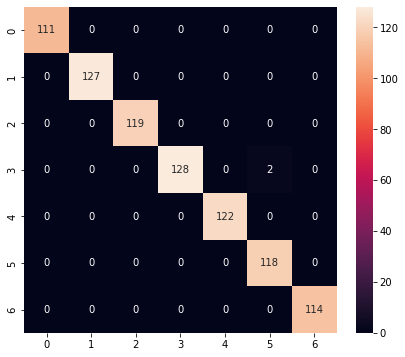

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       127
           2       1.00      1.00      1.00       119
           3       1.00      0.98      0.99       130
           4       1.00      1.00      1.00       122
           5       0.98      1.00      0.99       118
           6       1.00      1.00      1.00       114

    accuracy                           1.00       841
   macro avg       1.00      1.00      1.00       841
weighted avg       1.00      1.00      1.00       841



In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.savefig("confusion_matrix.svg")
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

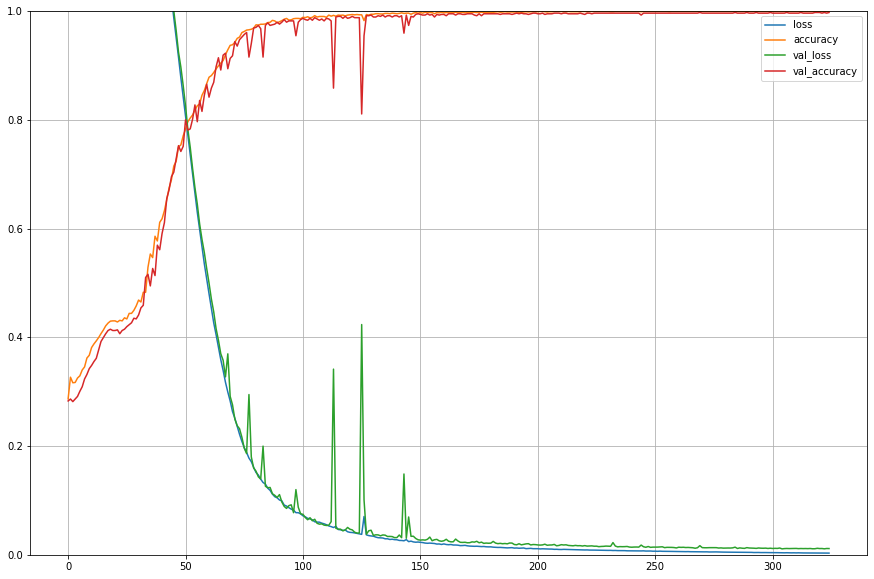

In [34]:
pd.DataFrame(best_model_history).plot(figsize=(15, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1) # 將縱座標的範圍設為[0,-1]
plt.savefig("best_param_training.svg")
plt.show()

# 將模型格式轉換為 tflite

In [35]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(tensorflow_saved_model) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open(tflite_save_path, 'wb') as f:
  f.write(tflite_model)

# 使用模型(tflite)推論

In [36]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [37]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [38]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [39]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [40]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.5755400e-05 5.8894439e-06 9.9976522e-01 1.1146325e-10 5.1871163e-21
 7.2369155e-10 2.0317319e-04]
2
